# Линейные модели

- [Максимизация правдоподобия](#1)
- [Логистическая регрессия с циклами](#2)
- [Логистическая регрессия с циклами с L1 регуляризацией](#3)
- [Логистическая регрессия с циклами с 3 классами и softmax](#4)
- [Метод опорных векторов](#5)
- [Нейронные сети с двумя слоями для классификации](#6)

In [2]:
import base64
import numpy as np

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
        print(encoded_string.decode("utf-8"))

<a name='1'></a>
## Максимизация правдоподобия

Максимизация правдоподобия (Maximum Likelihood Estimation, MLE) - это метод оценки параметров вероятностной модели. 

Вероятностная модель - это математическая модель, которая используется для описания вероятностных явлений и предсказания вероятностных событий. Она опирается на теорию вероятностей и статистику.

Вероятностная модель состоит из набора вероятностных переменных, которые представляют случайные величины, и набора вероятностных зависимостей или правил, которые определяют отношения между этими переменными. Эти зависимости могут быть выражены в виде вероятностных распределений, условных вероятностей или статистических моделей.

Цель вероятностной модели заключается в описании и предсказании вероятностных характеристик или поведения системы, основываясь на имеющихся данных и предположениях о вероятностных законах, которые управляют этой системой. Это может включать прогнозирование вероятности возникновения определенных событий, оценку параметров распределений, сравнение различных гипотез и другие вероятностные выводы.

Функция правдоподобия измеряет, насколько вероятно наблюдать некоторые конкретные данные при заданных параметрах модели.

Для примера рассмотрим связь между максимизацией правдоподобия распределения Бернулли и кросс-энтропией. Распределение Бернулли используется для моделирования бинарных данных, где каждое наблюдение может быть либо успехом (1) с вероятностью p, либо неудачей (0) с вероятностью (1-p).

Пусть у нас есть некоторый набор независимых и одинаково распределенных бинарных данных ${x_1, x_2, ..., x_n}$, где $x_i$ - i-ое наблюдение. Мы хотим оценить параметр p распределения Бернулли, то есть вероятность успеха.

Функция правдоподобия для данной задачи будет выглядеть следующим образом:

$L(p) = p^k * (1-p)^{n-k}$,

где k - количество успехов в наборе данных, а n - общее количество наблюдений.

Максимизация правдоподобия состоит в поиске значения p, при котором функция правдоподобия L(p) достигает максимума. Обычно вместо максимизации самой функции правдоподобия удобнее максимизировать ее логарифм, так как это упрощает математические вычисления. Таким образом, мы ищем значение p, которое максимизирует логарифм функции правдоподобия (log-likelihood):

$log L(p) = k * log(p) + (n-k) * log(1-p).$

Теперь свяжем максимизацию правдоподобия с кросс-энтропией. 

В машинном обучении термин "кросс-энтропия" (cross-entropy) используется для измерения различия между двумя вероятностными распределениями. Он широко применяется в задачах классификации и обучении с учителем.

Предположим, что у нас есть модель, которая предсказывает вероятности разных классов для каждого входного примера, и у нас есть истинные метки классов для этих примеров. Кросс-энтропия используется для измерения того, насколько хорошо предсказанные вероятности соответствуют истинным меткам классов.

Формально, пусть у нас есть два распределения: предсказанное распределение вероятностей P и истинное распределение вероятностей Q. Кросс-энтропия между ними определяется следующим образом:

$H(P, Q) = -\sum_{i} Q(i) \log P(i)$

где Q(i) - вероятность i-го класса по истинным меткам, а P(i) - вероятность i-го класса по предсказанию модели.

Кросс-энтропия имеет несколько полезных свойств. Во-первых, она всегда неотрицательна. В идеальном случае, когда предсказанные и истинные распределения совпадают, кросс-энтропия будет равна нулю. Чем больше расхождение между распределениями, тем больше значение кросс-энтропии.

В нашем случае мы можем рассматривать распределение Бернулли с параметром p как "истинное" распределение данных и использовать другое распределение для моделирования данных.

Если мы рассмотрим распределение Бернулли с параметром p в качестве аппроксимации данных, то кросс-энтропия между распределением Бернулли с параметром q и аппроксимирующим распределением Бернулли с параметром p будет выглядеть следующим образом:
 
$H(q, p) = -q * log(p) - (1-q) * log(1-p).$

При достижении оптимального значения p, когда p = q, кросс-энтропия между истинным распределением и аппроксимирующим распределением будет минимальной. Таким образом, при максимизации правдоподобия для распределения Бернулли мы фактически минимизируем кросс-энтропию между истинным распределением и аппроксимирующим распределением Бернулли.

In [3]:
# Истинные метки классов (ground truth)
true_labels = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
true_labels = np.array([[0, 1, 0]])

# Предсказанные вероятности классов
predicted_probs = np.array([[0.2, 0.7, 0.1], [0.8, 0.1, 0.1], [0.3, 0.4, 0.3]])
# predicted_probs = np.array([[0.3, 0.4 0.3]])

# Вычисление кросс-энтропии
epsilon = 1e-12  # Добавляем эпсилон, чтобы избежать деления на ноль
cross_entropy = -np.sum(true_labels * np.log(predicted_probs + epsilon)) / true_labels.shape[0]

print("Кросс-энтропия:", cross_entropy)

Кросс-энтропия: 3.5755507687930046


<a name='2'></a>
## Логистическая регрессия с циклами

In [4]:
import math

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    n_samples, n_features = X.shape
    weights = [0] * n_features
    bias = 0
    
    for _ in range(num_iterations):
        # Инициализация градиентов
        dw = [0] * n_features
        db = 0
        
        # Проход по каждому образцу
        for i in range(n_samples):
            # Предсказание и активация
            z = predict(X[i], weights, bias)
            y_pred = sigmoid(z)
            
            # Обновление градиентов
            """
            Градиент вычисляется как произведение разности предсказанного значения и 
            истинного значения (y_pred - y[i]) на соответствующую компоненту признака (X[i][j]). 
            Сигмоида уже применена при вычислении y_pred = sigmoid(z), где z - это линейная комбинация 
            весов и признаков (predict(X[i], weights, bias)). Функция сигмоиды применяется для 
            ограничения значения y_pred в диапазоне от 0 до 1, чтобы получить вероятность 
            принадлежности к классу.
            Сигмоида используется для вычисления предсказания и применяется к 
            результату линейной комбинации в predict, а градиент вычисляется непосредственно 
            на основе предсказанной вероятности и истинного значения в строке 
            dw[j] += (y_pred - y[i]) * X[i][j].
            """
            for j in range(n_features):
                dw[j] += (y_pred - y[i]) * X[i][j]
            db += y_pred - y[i]
        
        # Обновление весов и смещения
        for j in range(n_features):
            weights[j] -= (learning_rate * dw[j]) / n_samples
        bias -= (learning_rate * db) / n_samples
    
    return weights, bias


def predict(X, weights, bias):
    z = bias
    
    for i in range(len(X)):
        z += weights[i] * X[i]
    
    return z


def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [5]:

# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([0, 1, 1])

# Обучение модели
weights, bias = logistic_regression(X, y)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12])
z = predict(x_test, weights, bias)
y_pred = sigmoid(z)
print("Предсказанная вероятность:", y_pred)

Веса: [1.2106226761233236, 0.31292955330530614, -0.5847635695127095]
Смещение: -0.8976931228180162
Предсказанная вероятность: 0.9995163164518308


<a name='3'></a>
## Логистическая регрессия с циклами с L1 регуляризацией

In [6]:
import math

def logistic_regression(X, y, learning_rate=0.01, regularization=0.01, num_iterations=1000):
    n_samples, n_features = X.shape
    weights = [0] * n_features
    bias = 0
    
    for _ in range(num_iterations):
        dw = [0] * n_features
        db = 0
        
        for i in range(n_samples):
            z = predict(X[i], weights, bias)
            y_pred = sigmoid(z)
            
            dw += (y_pred - y[i]) * X[i]
            db += y_pred - y[i]
        """!!! Обратить внимание на то, как добавляется регуляризация"""    
        # Пояснение, почему регуляризация добавляется к градиенту
        # https://datascience.stackexchange.com/questions/111993/why-would-we-add-regularization-loss-to-the-gradient-itself-in-an-svm
        # Берется производная по весам (поэтому np.sign(weights))
        dw = (dw / n_samples) + (regularization * np.sign(weights))
        db = db / n_samples
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias


def predict(X, weights, bias):
    z = bias
    
    for i in range(len(X)):
        z += weights[i] * X[i]
    
    return z


def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [7]:
# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([0, 1, 1])

# Обучение модели
weights, bias = logistic_regression(X, y, learning_rate=0.01, regularization=0.01, num_iterations=1000)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12])
z = predict(x_test, weights, bias)
y_pred = sigmoid(z)
print("Предсказанная вероятность:", y_pred)

Веса: [ 1.15221068  0.24170643 -0.49179782]
Смещение: -0.9105042512659696
Предсказанная вероятность: 0.9993697726202189


<a name='4'></a>
## Логистическая регрессия с циклами с 3 классами и softmax

In [75]:
import math

def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum(axis=0)

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    return softmax(z)

def softmax_regression(X, y, learning_rate=0.01, num_iterations=1000):
    n_samples, n_features = X.shape
    n_classes = len(set(y))
    
    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)
    
    for _ in range(num_iterations):
        # Инициализация матрицы градиентов
        dw = np.zeros((n_features, n_classes))
        db = np.zeros(n_classes)
        
        # Проход по каждому образцу
        for i in range(n_samples):
            # Предсказание
            z = np.dot(X[i], weights) + bias
            y_pred = softmax(z)
            
            # Обновление градиентов
            for j in range(n_features):
                for k in range(n_classes):
                    """
                    Выражение (y[i] == k) вычисляет, равен ли класс y[i] значению k или нет. 
                    Когда y[i] равен k, выражение (y[i] == k) вычисляется как True, что эквивалентно 1 
                    в числовых вычислениях. Поэтому (y_pred[k] - (y[i] == k)) становится y_pred[k] - 1 для 
                    класса k, который соответствует истинной метке.

                    Когда y[i] не равен k, выражение (y[i] == k) вычисляется как False, что эквивалентно 0. 
                    В этом случае (y_pred[k] - (y[i] == k)) упрощается до y_pred[k]. 
                    Это означает, что вклад градиента для классов, отличных от истинной метки, 
                    определяется значением y_pred[k].
                    В данном коде кросс-энтропия не вычисляется явно, но она подразумевается при использовании 
                    функции softmax в предсказаниях и при обновлении градиентов в цикле обучения 
                    softmax-регрессии.
                    """
                    
                    dw[j][k] += (y_pred[k] - (y[i] == k)) * X[i][j]
                db += y_pred - (y[i] == np.arange(n_classes))
        
        # Обновление весов и смещения
        weights -= (learning_rate * dw) / n_samples
        bias -= (learning_rate * db) / n_samples
    
    return weights, bias

In [76]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([0, 1, 2])  # Replace class labels with appropriate values for three classes

weights, bias = softmax_regression(X, y)

print("Веса:", weights)
print("Смещение:", bias)

x_test = np.array([10, 11, 12])
probabilities = predict(x_test, weights, bias)
print("Предсказанная вероятность для каждого класса:", probabilities)

Веса: [[-1.02754329  0.04984373  0.97769955]
 [-0.3091001   0.05235397  0.25674612]
 [ 0.40934309  0.05486421 -0.46420731]]
Смещение: [ 2.15532957  0.00753072 -2.16286029]
Предсказанная вероятность для каждого класса: [9.94101997e-06 4.19816989e-02 9.58008360e-01]


<a name='5'></a>
## Метод опорных векторов

In [8]:
class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Количество признаков в X
        number_of_features = X.shape[1]

        # Количество образцов в X
        number_of_samples = X.shape[0]

        c = self.C

        # Создание идентификаторов от 0 до number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Перемешивание образцов случайным образом
        np.random.shuffle(ids)

        # Создание массива нулей
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Логика градиентного спуска
        for i in range(epochs):
            # Вычисление функции потерь Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Добавление всех значений функции потерь в список
            losses.append(l)

            # Начало с 0 и до количества образцов с шагом batch_size
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Вычисление градиентов

                            # Относительно w 
                            gradw += c * Y[x] * X[x]
                            # Относительно b
                            gradb += c * Y[x]

                # Обновление весов и смещения
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b, losses


    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [11]:
svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

In [12]:
prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

Loss: 0.09911267387984823
Prediction: [-1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
Accuracy: 1.0
w, b: [array([[0.44477983, 0.15109913]]), 0.05700000000000004]


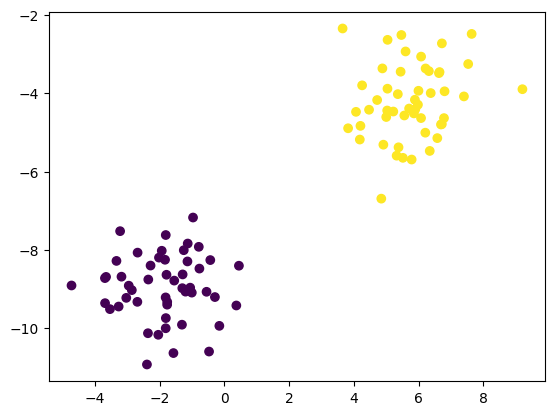

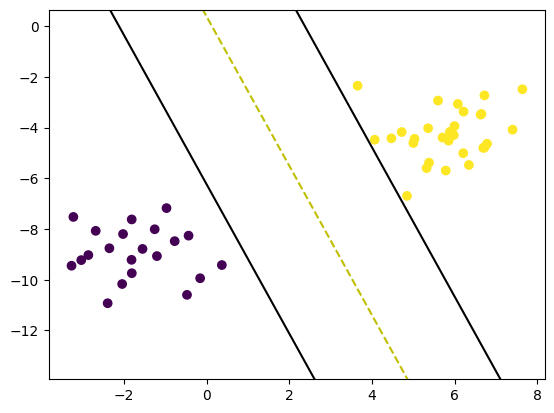

In [13]:
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()

<a name='6'></a>
# Нейронные сети с двумя слоями для классификации

Источник: https://github.com/Rabbia-Hassan/Mathematics-for-Machine-Learning-and-Data-Science-Specialization-by-DeepLearning.AI/tree/master

**Нейронная сеть**

Нейронная сеть - это математическая модель, инспирированная работой нервной системы живых организмов. Она состоит из сети взаимосвязанных и взаимодействующих нейронов, которые обрабатывают и передают информацию. Нейроны объединены в слои, где каждый нейрон в одном слое связан с нейронами в следующем слое.

Нейрон в нейронной сети принимает входные данные, вычисляет взвешенную сумму входов, применяет функцию активации к этой сумме и передает результат в следующий слой нейронов. Функция активации обычно служит для введения нелинейности в модель и позволяет нейронной сети обучаться сложным отображениям данных.

Математически нейрон можно представить следующим образом:

$
y = f(\sum_{i=1}^{n} w_i \cdot x_i + b)
$

где:
- \(y\) - выход нейрона
- \(f\) - функция активации
- \(x_i\) - входные данные
- \(w_i\) - веса, связанные с каждым входом
- \(b\) - смещение (bias)

Нейронные сети могут иметь различные архитектуры, включая полносвязные (все нейроны в одном слое связаны с нейронами в следующем слое), сверточные (используемые в задачах обработки изображений), рекуррентные (содержащие циклические связи) и другие.

Обучение нейронных сетей включает в себя определение оптимальных весов и смещений, чтобы минимизировать ошибку между предсказанными и фактическими значениями. Это достигается с использованием методов оптимизации, таких как стохастический градиентный спуск и обратное распространение ошибки.

Перцептрон представляет собой простейшую форму искусственного нейрона, который принимает входные значения, умножает их на соответствующие веса, складывает их и добавляет смещение. Затем результат подается через функцию активации, которая определяет, будет ли выходное значение 1 или 0.

Обычно в качестве функции активации используется пороговая функция. Она принимает выходную сумму и возвращает 1, если она положительна, и 0 в противном случае:

$y = \begin{cases} 
1, & \text{если} \quad \sum_{i=1}^{n} w_i x_i + b > 0 \\
0, & \text{в противном случае}
\end{cases}$


Здесь:
- \(y\) - выход перцептрона (может быть 1 или 0)
- \(x_i\) - входные значения (функции или признаки)
- \(w_i\) - веса, соответствующие каждому входу \(x_i\)
- \(b\) - смещение (bias) или пороговое значение

Это базовая концепция перцептрона, и он является основным строительным блоком многих более сложных нейронных сетей.

**Правило дифференцирования сложной функции**

Правило дифференцирования сложной функции, также известное как правило цепи (или правило функции в функции), является одним из основных инструментов дифференциального исчисления. Оно позволяет найти производную композиции двух функций.

Правило дифференцирования сложной функции можно записать в следующем виде:

$
\frac{{d}}{{dx}}\left(f(g(x))\right) = \frac{{df}}{{dg}} \cdot \frac{{dg}}{{dx}}
$

где:
- $f(g(x))$ - сложная функция, состоящая из функций f и g.
- $\frac{{df}}{{dg}}$ - производная функции f по переменной g.
- $\frac{{dg}}{{dx}}$ - производная функции g по переменной x).

Давайте рассмотрим функцию $f(x) = (3x + 2)^2$. Для вычисления ее производной, мы можем представить ее как композицию двух функций: $g(x) = 3x + 2$ (внутренняя функция) и $h(x) = x^2$ (внешняя функция).

Шаг 1: Вычисление производной внешней функции $h(x)$.
Производная функции $h(x) = x^2$ может быть вычислена с помощью степенного правила дифференцирования. Производная функции $x^n$, где n - константа, равна $n * x^{n-1}$. В нашем случае n = 2, поэтому:
$h'(x) = 2x$.

Шаг 2: Вычисление производной внутренней функции g(x).
Производная функции $g(x) = 3x + 2$ может быть вычислена с помощью правила линейности дифференцирования. Правило линейности гласит, что производная суммы (или разности) функций равна сумме (или разности) производных этих функций. В нашем случае:
$g'(x) = 3$.

Шаг 3: Применение правила цепочки (chain rule).
Правило цепочки утверждает, что производная композиции двух функций $f(g(x))$ равна произведению производной внешней функции $f'(g(x))$ и производной внутренней функции $g'(x)$. Применяя правило цепочки к нашему примеру, получим:
$(f(g(x)))' = f'(g(x)) * g'(x)$.

Применяя правило цепочки к нашей функции $f(x) = (3x + 2)^2$, получаем:
$f'(x) = 2(3x + 2) * 3$.

Таким образом, производная функции $(3x + 2)^2$ равна 6(3x + 2).

Обратите внимание, что в этом примере использовалась элементарная функция, но правило дифференцирования сложной функции применим для более сложных функций, включая тригонометрические, экспоненциальные, логарифмические и т.д.

**Алгоритм обратного распространения ошибки (backpropagation)** является ключевым алгоритмом в обучении нейронных сетей. Он позволяет вычислить градиенты функции потерь по параметрам сети, которые затем используются для обновления весов и смещений сети в процессе градиентного спуска.

Обратное распространение ошибки позволяет эффективно распространять градиенты от выходного слоя к входному слою сети, используя правило дифференцирования сложной функции. Это позволяет оптимизировать параметры сети, улучшая ее способность к предсказанию и минимизации функции потерь.

https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=3s

**Матричное дифференцирование**

Матричное дифференцирование относится к процессу нахождения производных матриц и векторов по отдельным элементам или переменным. Оно обобщает и расширяет обычное дифференцирование для скалярных функций на случай матриц и векторов.

Определение матричного дифференцирования может быть сформулировано следующим образом:

Пусть дана матрица или вектор-функция F, состоящая из элементов Fᵢⱼ, где i обозначает номер строки, а j - номер столбца. Тогда матричное дифференцирование заключается в вычислении производных отдельных элементов Fᵢⱼ по переменным или элементам матрицы.

Таким образом, процесс матричного дифференцирования позволяет находить частные производные матрицы или вектора-функции по элементам или переменным, а также выражать их в виде матриц или векторов.

**Затухание градиента**

Затухание градиента, как проблема в обучении нейронных сетей, чаще всего проявляется в более глубоких слоях сети (те, которые ближе ко входу и дальше от функции потерь), особенно при использовании активационных функций, таких как сигмоида или тангенс гиперболический.

Затухание градиента возникает, когда градиенты, передаваемые обратно от выхода сети к ее входу во время обратного распространения ошибки, становятся очень маленькими. В результате этого обновления весов в более глубоких слоях (те, которые ближе ко входу и дальше от функции потерь) становится незначительным, и эти слои не эффективно обучаются.

Одной из причин затухания градиента является использование активационных функций, которые могут приводить к насыщению градиентов в малых или больших значениях, таких как сигмоида или тангенс гиперболический. Когда градиенты насыщаются, они становятся очень маленькими, и ошибка не может эффективно распространяться обратно через сеть.

В более низких слоях (те, которые ближе к функции потерь) затухание градиента может быть менее заметным, поскольку градиенты могут быть еще относительно большими. Однако, в более глубоких слоях, особенно в сетях с большим количеством слоев, затухание градиента может значительно сказываться на обучении.

Для решения проблемы затухания градиента часто используются различные методы, такие как нормализация градиентов (например, градиентный клиппинг), изменение архитектуры сети (например, использование skip-connections или активационных функций, не вызывающих насыщения градиентов, например, ReLU), а также оптимизационные методы, способные более эффективно работать с затухающими градиентами (например, адаптивные оптимизаторы, такие как Adam или RMSprop).

**Построение сети:**

1. **Инициализация параметров сети**: Сначала мы должны инициализировать параметры нашей нейронной сети, такие как веса и смещения (biases). Обычно инициализация происходит случайными значениями, чтобы избежать симметрии при обучении.

2. **Прямое распространение (forward propagation)**: В этом шаге мы пропускаем входные данные через нейронную сеть для получения прогноза. Каждый слой вычисляет активацию, используя входные данные и параметры слоя. Затем результат передается в следующий слой до достижения последнего слоя.

3. **Вычисление функции потерь**: После прямого распространения мы сравниваем полученный прогноз с фактическими метками и вычисляем функцию потерь, которая измеряет, насколько наши прогнозы отличаются от истинных значений.

4. **Обратное распространение (backward propagation)**: В этом шаге мы вычисляем градиенты функции потерь по отношению к параметрам сети. Это позволяет нам определить, какие изменения в параметрах сети приведут к улучшению прогноза. Градиенты вычисляются с помощью метода обратного распространения ошибки.

5. **Обновление параметров**: Используя вычисленные градиенты, мы обновляем параметры сети, чтобы минимизировать функцию потерь. Это обычно делается с использованием градиентного спуска или его вариантов.

6. **Повторение**: Шаги 2-5 повторяются несколько раз (называемых эпохами), чтобы нейронная сеть могла постепенно улучшать свои прогнозы и сокращать ошибку.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.datasets import make_blobs

np.random.seed(3)


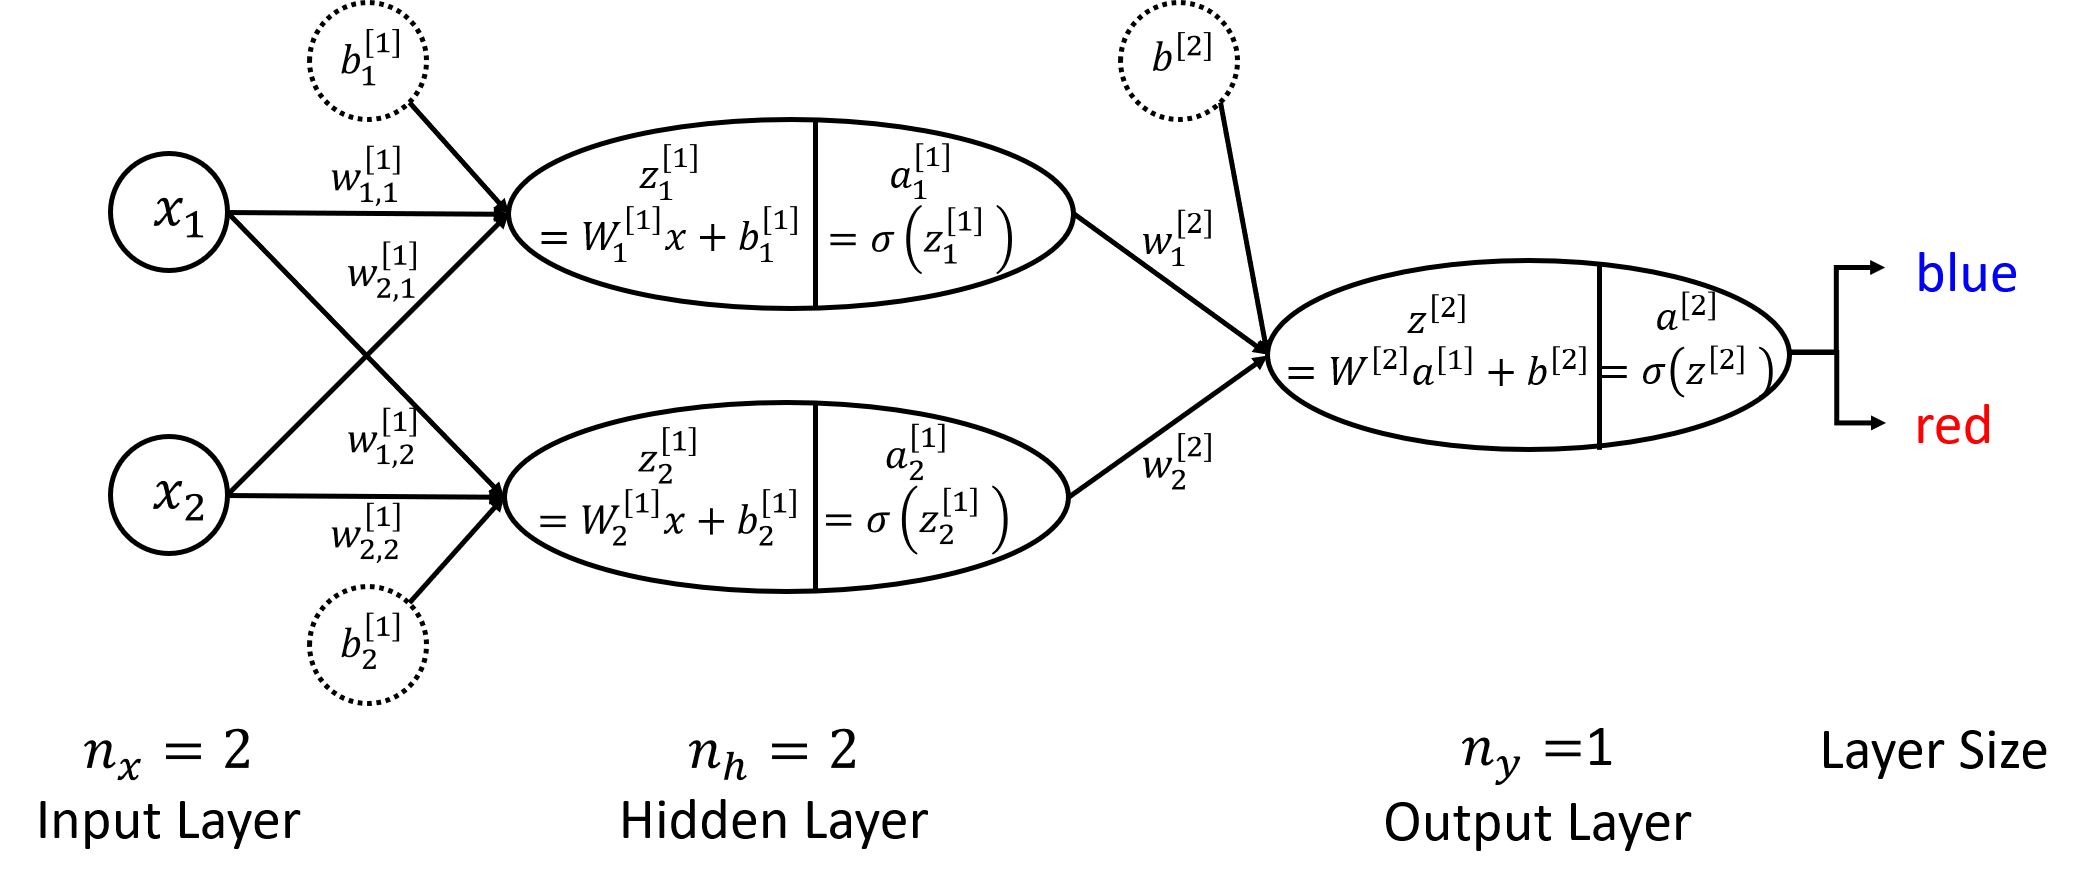

In [20]:
from IPython.display import display, HTML

image_tag = '<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAACCUAAAN7CAYAAAB4MbJcAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFxEAABcRAcom8z8AAP+lSURBVHhe7N0L3Fxleff71vOB14Jga1Fqarp7QK2RRqyINa0oW2sxb6GkHqpRK5hqNB7BVGiw4pYKRMuuRlGz1UJAirHYiIoQFG2xCklphXoIUfCANRVPRfQV1r7+w7rC/dzPPWvWmlkzsw6/7+fz/xCeZ56ZWed1r/ta9/o5AEBjrbZstGy1bLfssOxrie226Hd6jV67wQIAAAAA00JbBQAAAAAAAGiJZZZ1lpWD/1tIF/myKHp9SBf+4tfogl9MFw11EVCfFb8HAAAAAMRoqwAAAAAAAAAttcSy2aI7hvzinC7CxXQXUXgBT4kv0um94tfovWOpi4YrLAAAAADgaKsAAAAAAAAAHZC6Y+hmS0x3JMWviy/OpS706aJeTBcS49fpbwEAAADA0VYBAAAAAAAAWkQX5XTRLXVBTcOWxhfe4mewpi70xUOn6m6k+DUa/jSmZ7mGr9GdTzF/L929xJ1JAAAAQHfRVgEAAAAAAABaTBfJwuFOU0OUpoY7jS+u6cKfP8NVv9OFuNRFQ/1Mv1f02vg1qYuBqTuU4u+kaYi/EwAAAID20vk9bRUAAAAAAACgxVIX1VLDnfqwqPqd7kTSRbbURby66AKgLhr6XU/6/1h8h5LChT4AAACgG2irAAAAAAAAAB0R3nnkSQ1TqouC8TCosxJ/ri78xd9ZFwUBAAAAdAdtFQAAAAAAAKBFdKFOiaXuQNpqaTJdiIy/c+oOJd3BpAuZ07xTCgAAAMBkaKsAAAAAAAAALaY7d/ScUw1nmhruVPwOJN3Bo4to87rLqCpd3NNFSX3/mKYhHDY19axXAAAAAPNDW4W2CgAAAAAAAFpOzy2Nn2eqZ6zG9LrUnUltkbq7SNMZTreiedGWi5gAAABAl9FWWRjaKgAAAAAAAGgl3XETX+zSHUhdHyJU06fpjKddQ6QCAAAAmD/aKgtDWwUAAAAAAACt5cOdhun68KC60BffddX0Z88CAAAAfUNb5Y7QVgEAAAAAAECr6aKXX+zSHTm6A6cvw4JqWn26U0O+at7oWa8AAAAAZo+2Cm0VAAAAAAAAtIguag27w0YXs7Zb2vws1nENu5ini52aJ7oQqHkHAAAAYDpoq6TRVgEAAAAAAEBr+F02ygb9IKEvdxyVtdni86xovgEAAAAYH22V6mirAAAAAAAAoFH0zNXwgpXCMJ/FwgujYbgLCQAAAKgPbZXqaKsAAAAAAACgUcJnsMbR77CY7sKK7zxSdli4QwsAAACoB22V6mirAAAAAAAAoJH07NX4opXuSOKiVbHwri0u8gEAAAD1o60yHtoqAAAAAAAAaJzwYp8uYKEcPZt1t4U7tQAAAIDpoK0yHtoqAAAAAAAAmJthd8mssPCc0eqGXeTTvNSFQAAAAADl0FapF20VAAAAAAAAzJwuPt1s0d1GmB6fz7qba7V+AAAAAKAQbZXZoK0CAAAAAACAqdHdRX7xSdH/o36648jnsWelBQAAAEAabZXZoK0CAAAAAACAqdEwqOFFPg93xtRLF/Tieaxo3vMsVwAAAGAx2iqzQVsFAAAAAAAAU7XRkroApZ+jXpst4TzWRT4NkQoAAABgMdoqs0NbBQAAAAAAAFMVX+zbatFdSaif5q3m8W4Lw6ECAAAAxWirzA5tFQAAAAAAAEyVns3qF6C4yDc9mre6C4l5DAAAAJRDW2U2aKsAAAAAAABg6nTxSRf8MB9c/AMAAADSaKvMF20VAAAAAAAAVLIs/y+aQ8tkh0V3JgEAAAB9RVuleWirAAAAAAAAoJIllpstuqikf7eZnnPqz5aNs85Sl+2W1Gcok9IdR3pOrpaJvycXYgEAANBHXWqrdAFtFQAAAAAAAIwl7mCvs/N+1sKiBP1bF8g8dV7E1HuF7607hPxzJ6ULrv5eHv0MAAAA6JsutVW6gLYKAAAAAAAAKhs2skBbL/aF06NigVnZYPHPnZTmvb9XmNUWAAAAoC+61lbpAtoqAAAAAAAAqCx1p8tui4blbKM6ihI07Svu+GdpdRYliJaBv5+GRtUQqQxXCwAAgD7pWltFNE06v4+j6aqL2jKpz1DqKOigrQIAAAAAAIBKdPEofPSAoo79tpqkKEEXN/X3fpGtirqLEnQhUe+l4WpnOeIDAAAA0BRda6uIF1r4eX6YOsXv7fNP7ZZJ0VYBAAAAAADAWHQxSRf8tg7+r73GLUrQhbX4Tqwq6i5KEC7wAQAAAN1pq0hYlDBL3lapoyhBaKsAAAAAAACgt6oWJagYQRc3/W88Goa0imkUJQAAAADolnGLEjRqhNo3au+oDVP1ERbeVqmrKAEAAAAAAADorbJFCbqIp2ef+rNVdXFOz1f1v21qUYK+NxcSAQAAgHYqW5Tgj5ZTAbXaJt7WCKP30GvK8L+ZZluCtgoAAAAAAAD20oUrdchXvbumDaoUJejingoRwvngf9u0ogTdDeVFFPqM1RYAAACga7rcVpEyRQneVvH2hf5G7RYfKUGPsvDfKWUKE/y10ygaoK0CAAAAAACARcLHFeiCVpnHHLRF2aIESV3o9L9tUlFC+N6eLjxPFwAAAIh1ua0iZYsSfB7o9al2i4oA/DVl2i7+2rqLEmirAAAAAAAAYJH4rhtPmbtr2qBKUUKK/22TihLCaQqTujgJAAAAtFXX2ypStShBoxCkhK9RRrV9/HV1FyXQVgEAAAAAAMAiqYtGuvDXlYtGXSxKkN0Wf3+PhnAFAAAAuqLrbRUpU5QgasuMas+EBRzDihecv67uogShrQIAAAAAAIAF4uePKhr6syu6WpTgw7Pqe2k4VE0bdx8BAACgS5rUVlG7Qt9H0fm3igiUSb9P2aKEMsJigCX6QQF/3TSKEmirAAAAAAAAYBFdYNOFI7+zZtRdNW3S1aIEXdRbnf8XAAAA6KqmtFW8KMHP8T362STqKkrQfPHvpPccxV87jaIE2ioAAAAAAAAo1KWCBOlqUQIAAADQN01oq6iz3c/zFbU3JlFXUYL+vsp38tdOoygBAAAAAAAAaCTdRaMLchpyVAUAnrIX1YahKAEAAABAXcL2hTLqMQmj1FGUsM7i36fs4yT89RQlAAAAAAAAoFd0gS81JOokw372qShB86lrI10AAAAATRIWAJR5TMIokxYlaOQGL+YuW5AgPg2zKkqgrQIAAAAAANBDuqNHHfZNfM6nRkvwi2STXujrelGCLuzpszSf/GLkONMJAAAANEWT2yphEXWVIoBhJilKUFsgLEioMr98GqZZlEBbBQAAAAAAoOfCO3x0AUwXsZpy50pYlDDphb6uFyWkRpbQsgUAAADaqi1tFbU1JjVuUcIkBQni0zDNogTaKgAAAAAAAD231RJfIJrmBakqwu806YW+rhclaLhW/xyPli0AAADQVk1tq6jjP/xOGtFhUuMUJahdM0lBgvg0THO+0lYBAAAAAADoufAOH08dd/pMShfYwu806ZCtkxQlTPJdZlWUEF8YVaoWUAAAAABN0tS2Sti2UDFBHaoWJdRRkCA+HdMsSqCtAgAAAAAA0HPxxSGljjt9JhUO1VrHhb4qRQm6aKbodfo7XRj0v1X0/xomVfNp1MW/WRUliD5DF/c0vzREahPuIgMAAADG5efRYZrQVgnP8VOPmfN2hNoMZYsFqhQl6D29YEPn/WU/I8WnY9ptB30GbRUAAAAAAIAe0sUrDaWpC0K6+KULW0oThEO1pi70VVWlKCG8yFgmRRfUwveaNk3XJBckAQAAgKZoS1tF7QynIgQvLghT1F5wVYoS/PP1N8PO//VzFQGMaktV+Y6ToK0CAAAAAACAxvE7f5TwQt+4qhQl6O4rXVAsm6K7tWZZlAAAAABg+vyxCYq3BdT57z9LZVSbpmxRQjiinN5TbZtUNBqBXjOq2MDfa9pFCQAAAAAAAECj6MKeXxzTBb/wjhr9W4UAumjmw36WGcK1SlFCnShKAAAAALpDbQk/v1chgXgBgP6r36vNolEe/HWK2jVFyhQl+OgH4fuOir5HEX8dRQkAAAAAAADolbCAILwop2IEv1gXR78rQlECAAAAgEmFIxVodAT//1Tnfzx6QlGbpUxRQvjZZTNqhAZ/HUUJAAAAAAAA6JWwI9+fgaoLcLorSNEFu/gOIf1/0YgJfShK0PRrPimab7qg6fMPAAAAwOS2Wvz8Xufb+q/Ov1PCNkjR66RMUYLaMXrPKhk1qpx/t2kXJdBWAQAAAAAA6CldUPP4oxDCRyXMi1/cU3QhTReuVHSgn4cX1XyYVE/RRT69T/i6KhfqqtDdT+F7h99x2sKhZD26uAkAAAC0TVPbKrst4fm2vt8wameEry3q+C9TlDANZb5bHWirAAAAAAAA9JRf+Aozy1EEUnSh0b+LChHUya//6i6a+CJk/EzVoguCeh9dQExl1HNWq9AF09RnKNMWX/RUZvG5AAAAQN2a2FaJO9bVFikqlKAo4U60VQAAAAAAAHpKF4HiC0N1jhowDhUP+HfRRT5FxQbDLvaFoyrotX0WFnQwTwAAANBmTWyraCS08PuM6siPixj6XJRAWwUAAAAAAKCnmnihT49WCL+PvmPR3UfxIxz6jAt9AAAA6IomtlU0ept/F51nF7VTJCy4VlTUMIwXJei/+rswddH3jd/bvxtFCQAAAAAAAJgKXQSKLwyNurA2bRoVIfw+ox6tEL++73Sh1qNlOe/lCQAAAIyjiW2VcJS2okfHubjguqioQu+taY6j4oy6aOSG1Gco0y5KENoqAAAAAAAAPaSLT+FFMmXeF4bCO6J0l9AoYVFCnRfsAAAAAMxP09oq+uzwuxSNeuDCtoqmBwAAAAAAAOgddeLr4pj+qwIAZZ4X+uJnro4aJUGqFjEAAAAAaL6mtVXCRx0oRaMeuLCtUmZkBQAAAAAAAABTpiKEKhf64ruV9IxXAAAAAKhb+CgGFRuMopEUwrZKmZEVAAAAAAAAAEzZZotftCsz6kE8skLfL/SpiEPzQHdxKWXu3gIAAAAwWvgohu36wQhV2zZdR1sFAAAAAAAAjRAOb1pm1IMNFn+9hnYtO5yrXtfFi2BxkYbCBVAAAABgcmFbRQUHRdTWUPvEX1/msXRdR1sFAAAAAAAAcxc/iqHMqAdVn9Gqz1Cxgy4Qlrm7qW3i59wqXZxOAAAAYJbiDvVRbY9wVIVRBQx9QVsFAAAAAACgp3wITT0fVaMO6ILZvB6BoM8NL1Dpwl+R+PW6yDWMihF0d1LVIoa20TSG80ThIigAAADaqEltlfg8u6gzXUXQ/jqNBFB2NLeuo60CAAAAAADQU+HjDzxlHpswDfF3GfV4BV0ILPOdVaygi4HheytdLErQBdt4Oue1PAEAAIBJNKmtos7z+LvEj2RQ+yV8ndogo9o0fUJbBQAAAAAAoKfi0QaUeXXWh0OcKkUX8MILWhr9IHX3kYoR/D1VwKCLmuFndLEoQfNBy1QXSDW9mu553U0GAAAATKJJbRUfcU2PgQtHX9O/dc6tAgT9zl+j4gRGSFiItgoAAAAAAEBP6cKQX1Dz6CLaPIQX95T4ziOngoTwgt+wxzboApd+r9f7BcHwOaZdLEoAAAAAuqJJbRV1oCteOK22hu7y18/UjvHiBHW2j3oMHQAAAAAAANAr8YU+XeSbx3NPdeEu/B7+XfzOGX0fFRTowl/q98PEoy1QlAAAAAC0Q1PaKgAAAAAAAAAmpLt5NJqACgPmdYHPH8egC436PvGoCWH0mnGHQ6UoAQAAAGiPJrRVAAAAAAAAAHSALjJqFIRwZAMVEOgCpAoQFP1ej3SIRz+oostFCZo2BQAAAACahLYKAAAAAAAAeqPLRQmaHp82jTShQg6eZwsAAABg3mirAAAAAAAAoDe6XJSQeuTFSgsAAAAAzBNtFQAAAAAAAAzoGa3qtNdzW3dYunjnSleLErSswgt8ys0WnrsLAACALuhDW6WraKsAAAAAAABgYLVFF4bCC0XrLF3T1aIELatw2XVt+gAAANBffWmrdBVtFQAAAAAAAAzoQl98oUgX/rqmy49v0LTpgp/uHNP06S4yAAAAoO360lbpMtoqAAAAAAAAGAydGV/oU5ZYuqTLRQkhLc+uLTsAAAD0U1/aKn1BWwUAAAAAAKDHtlv8Ap/uPNL/qxO/S/pSlAAAAAB0SR/aKgAAAAAAAEDnaVhUXdzTsJq6e6WLKEoAAAAA2qcPbRUAAAAAAAAAHRA+j1bPM227lRYVV2i6AAAAAKApaKsAAAAAAACgF3QXlbLMootiuy1elKBstGj0hLbebaWLfD4tmjZND89nBQAAADBvtFUAAAAAAABQmjrt23rxKHz2bJm06bm0KrRITYOKLwAAAIA+aHNbpctoqwAAAAAAAKAUXeDTIw508Uh3ubSRpkEXvsqmTSMmbLbEF/l0BxLP2AUAAEDXdaGt0mW0VQAAAAAAAFBIdxr5Bb4w3IHULHo2a/w4inUWAAAAoKtoq7QDbRUAAAAAAACMFF9AUrgDqZl0cU/LizuPAAAA0Ae0VdqDtgoAAAAAAACG0p0t8YU+3ZHEhaTm0hC2AAAAQNfRVmkf2ioAAAAAAABI8juQbrboDhcu8gEAAABoAtoqAAAAAAAAQAestGy0cIGvOXTBVcsEAAAA6DPaKs1DWwUAAAAAAABoOV1w1Z1gfkeYhq0FAAAAgHmjrQIAAAAAAIBa6YKT7oLBbG216CJfGD07FwAAAMAdaKvMB20VAAAAAAAA1GaFxZ/fysW+2dGdRvFFPoXhUQEAAIA70FaZD9oqAAAAAAAAqIXuONJFpfhC0zILZiOe/xoWVcsFAAAA6DPaKvNHWwUAAAAAAAAT011H4UUmLjbNR7gcVuoHAAAAQM/RVmkG2ioAAAAAAACYWOruow0WLvTNlua3hkgFAAAAcAfaKs1AWwUAAAAAAAAT22HRBT7ddcTdL9Ol5+ByERUAAAAoh7bK7NBWAQAAAAAAwNTowtN2y5LB/2FadJFPF1R3W3gWLgAAADAabZXZoK0CAAAAAACAudEFKYbqnJxf5PPoTi89nxUAAADAeGir1IO2CgAAAAAAAOZGF/l0QUoXprjYN75wPsbhYh8AAABQHW2VetBWAQAAAAAAwNykLk7pDhqMZ6MlnJeKfgYAAACgGtoq9aKtAgAAAAAAgJnT81qH3S3Ds1zHd7nF5+N/WfR8XAAAAADl0Vapl9okGhEhbKu8zUJbBQAAAAAAAFO33RJe4FO4+6i8+CJe6u4jzWMAAAAA1dBWmUzYVtltiefl0ywAAAAAAADATIQX+xi+sxxd4Nts0d1bfqdW0d1cWy0AAAAAqqGtUl2qrZIqnqbAAwAAAAAAADOli1bDLvKttOh5rriD5kV4p9EOi9Pvwgt9YbiICgAAAFRHW6W8YW2VDZawbaJQOA0AAAAAAICZSz1PVBe1/O5/7qS5Yx6lRkMIH9GgZ7XGv/estgAAAACohrbKaEVtFRVvxD9X8QIAAAAAAAAwV7qopTtrwgtXuqDlQ4D2lS54hvPEo2IEl7ro59HvAAAAAIyPtkrasLbK0xI/UwEDAAAAAAAAMFcaJjV14apPw6Om7siS8Nm2miepERBSz231hAUMAAAAAKqhrVK9rRI+1sHT9yIOAAAAAAAAzFHqziNFzyLtCxUOaB6kCg40f3SBT78vupCXuliq9O2CKQAAAFAX2irjtVXCYgUPj70AAAAAAADA3IV3++siVupuHF3869IdNrrAp+nWhTxNt/6bmm5Nc+rnsdTFv6L3BQAAADAabZVqbZXUSG59KuQAAAAAAABAg+nCl4b6TN3Zrztz/ILWVksXLvilRjfQzyaRupNL0c8BAAAAjIe2Svm2ykpL/LeaLwAAAAAAAEBj6c6btj+XdNhdRfE0KZM8bkGfM6wwQXd1AQAAAKgPbZXF9H7x32mkBQAAAAAAAKCxNNRnfFGrLR3sumin769CgdQFPN0xFE/XJEUJoouAPsxqHAoTAAAAgPrQVklLtUe6MIIEAAAAAAAAOip157+GBI3popkulOnCmoZXnbf4e6eGO/U7kHTRbp0ldZfSOHSxMPzsMHrGKwAAAIDJ0VZJS82XJkw3AAAAAAAAMJQugvmwqPpvfEEsNTrALJ5bqs9VAUDqjqGyw7jqomVdxQghXfSLP9+j594CAAAAmBxtlcVUCB2/v+YTAAAAAAAA0Hi6kJW6mKWfxRe9dBdSTHfs6AKgfqeO+aIhRHXxzRPTe+i9/OJi6qJiEy7EUZgAAAAAzAZtlTvp+8fvn/oeAAAAAAAAQGtoKNT4olc8PKgu2MWvST3KIL5rKDWUaTwcqS74xeKCAL1mHhfiUhdBPQyhCgAL3cOyv0UdQY+wHGY50nKM5XmWl1r+0vIGy2mWMyxvtbzN8k7Leyzvt2yxXGDRfv+fLB+1fMLySctnLJ+1XG25xnKt5UsWHX9utHzLssfyPcuPLD+x3JZH/9bP9Du9Rq/V3+hv9R56L72n3lufoc/SZ+qz9R30XfSd9N30HfVd9Z313TUNmhZNk6ZN06hp1TRr2jUPNC80TzRvNI80rzTPAADD9bGtEr+/fwYAAAAAAADQWvGFvjIX3pTUHUrxhb7UxbnUnUWpO5n0XvpuKgxI3cU0K7pYGX9fRfMpNZwrALTJfSwPsvym5dGWP7A83fJsyxrLayx/bXmL5d2WD1gutnza8m+W6y3fsdxqSe0ryeho3mkeal5qnmreah5rXmuea95rGWhZaJlo2WgZaVlpmWnZaRlqWQJA1/SxrZIqslDm2SYCAAAAAAAAJqbOdV1Q04W11MW51IgBqUcY6CJh+Bq9X0wXCMPXKKn3KhpyddY0T+LvrGh6m/Q9AeAulgdafttyhOWZFu3DT7WcbflHy79Ydll+aEnt20h7o2WqZatlrGWtZa5lr3VA64LWCa0bWke0rgBAG/SxrRIXUCgURAMAAAAAAKDTUqMFrLTE4gt9upgW09/57/V6XQxMvVfT6HuG0+bRNHLXEoBp0j7m1y2HW/7Y8iLLyZazLOdbtH/6gkV326f2U4QMi9YZrTtah7QuaZ3SuqV1TOua1jmtexznADRZF9sqqWlS8QUAAAAAAADQaboYp7uEdPeQLpKl7g7yC336r6JnssbUsaG7fNrWwaHvGz9j1pOaTgAo40DLYy1/ajnB8jbLNstVlhstP7Gk9juEzDpaF7VOat3UOqp1Veus1l2tw1qXAWBeutZWSY3YoOkCAAAAAAAA0HG6OJkaSlXRXVQAEHuI5fcsf2Z5nUXD6X/c8kXLrZbU/qSVufvd757d//73zx7ykIdkD3/4w7PHPvax2ZOf/OTs6KOPzlavXp2tXbs2W79+ffaGN7whe9Ob3pSdfvrp2Vvf+tbs7/7u77J3vOMd2Xve857sfe97X3buuedmF1xwQbZ169bswx/+cPbRj340+8QnPpFdfvnl2Wc+85nss5/9bHbVVVdl11xzTXbttddmX/rSl7Ldu3dnN954Y/atb30r+853vpN973vfy370ox9lt956a3bbbbcNon/rZ/qdXqPX6m/0t3oPvZfeU++tz9Bn6TP12foO+i76Tvpu+o76rqn5oGnTNGpaNc2ads0DzQvNE80bzSPNK82z1Hu0OFqntW5rHde6rnVe6762AW0LAIBywhEbPLQ3AAAAAAAAgJ7QXVfxBUJP6hm3ALrr7pZfszzR8nzLKZb/z6JOg+stt1lS+4rG5B73uEd24IEHZr/xG7+RLV++PPv93//97Kijjsqe9axnZS960YuyV7/61dnrX//6bOPGjdm73vWu7Pzzz88+8pGPZFdccUW2c+fObNeuXdl//dd/ZT/+8Y+zPkrN06o07zQPNS937NiRfepTn8q2bduWnXfeednZZ5+dnXnmmdkpp5ySvepVr8qOP/74wbLRMtKy0jLTstMy1LJMfZ+GRduEtg1tI9pWtM1o29E2pG1J2xQA4I5i6HgfqtEdAAAAAAAAAPTECkt8kdDDs16BbrmvZbnl2ZZTLedYPm3RMPapfcDcc8ABB2QHH3xwtmLFiuzYY4/NXvziFw86td/+9rdnF1544aCg4Itf/GJ28803593iGFdq/s+TlqmWrZaxlrWWuZa91gGtC1ontG5oHUl994ZE25a2MW1r2ua07Wkb1LYIAH3ij5sIk3osBQAAAAAAAICOKipM0PNsAbTL/pbDLX9uOcOiZ+brju7UNj7T7LPPPtlDH/rQ7DGPeUz2R3/0R9kLXvCC7LWvfe1g9IJzzjknu+SSSwajFnzzm9/Mfvazn+Xd05iF1PJqC60rWme07mgd0rqkdUrrltYxrWta57TuaR1MTescom1S26a2UW2r2ma17QJAF2lUmXg/SDsDAAAAAAAA6BmNihBfKPSoaAFA8zzYcoRlreXvLJdZvmlJbcdTz7777ps98pGPHAzHv3bt2uz000/PLrjgguzKK6/Mrr/++uxHP/pR3oWMJkot067Suqh1Uuum1lGtq1pnte5qHda6nJofM4q2YW3L2qa1bWsb17YOAG220RLv7zZYAAAAAAAAAPTMZkt8sdCzzAJgPvR8+qdZXm15t+WfLalhkKeaBzzgAYPn/h999NHZK17xiuytb31r9qEPfSjbsWNH9t3vfjfv7kVbpZZ5n2md1rqtdVzrutZ5rfvaBrQtpObXlKNtXtv+eyzaF2ifoH0DALTBSku8X9tqAQAAAAAAANBDwwoT1BlCYQIwXb9seaplveVcy9WWH1tS22TtedCDHpQddthh2TOe8YzsxBNPHDzD/yMf+Uj2hS98gVEOeiC1TmA4bRPaNrSNaFvRNqNtR9uQtqXU/JxStI/QvkL7DO07tA/RvgQAmmRfS7z/UvsCAAAAAAAAQE+lnvmq7LbogiKAyS21HGN5g+WfLF+3pLa7WrN06dLsaU97WvaqV70qe9e73jV4/v6XvvSl7Cc/+Une1Yq+Sq0vGJ+2KW1b2sa0rWmb07anbTA1r6cQ7VO0b/lry9EW7XMAYJ5S+yraFgAAAAAAAEBP6eLgDkvqwqF+DqCagy1/ZjnDcqnlvy2p7auW3PWud80e9rCHZcccc0z2ute9LjvnnHOyq666Krvlllvy7lJgsdS6hOnQtnj11VcPts2TTjppsK1qm9W2m1oONUb7Hu2DtC/SPkn7JgCYlVT7YoUFAAAAAAAAQE8VFSZoJAUAaQ+0HGXR3ckftXzXktqOJs5973vf7Hd+53eyZz/72dmpp56aXXjhhdm1116bd3sC1aTWMcyetuEPfvCDg21a2/by5csH23pq+dQU7aM+ZtE+S/su7cMAYBo2WuJ90DoLAAAAAAAAgB5bYtGzXuOLh8pWC9B397Acbnm5ZYvlK5bU9jJR9t9//+zwww/P/vzP/zw744wzBs+wv/766/MuTKAeqXUPzbF79+7Btq99wAtf+MLBPkH7htRyqyHal2mfpn2b9nHa1wHApDZY4v0NbQoAAAAAAAAAP7fMEl889OhuJ6BPftlyjEXr/r9aUtvF2LnLXe4yGPngBS94QXbWWWdll112Wfatb30r75IEpiu1TqL5tI/QvkL7DO07tA/RviS1PCeM9nna92kfqH0hAFS10hLvW1QADQAAAAAAAACDZ73GFxA9qy1AV/1fFq3jZ1uutaS2gbGyzz77ZI9//OOztWvXZu9+97uzq666KrvtttvybkZg9lLrKdpJ+xLtU7Rv0T5Goypon5NaxhNE+0TtG7WP1L4SAEbR4+FS+xMAAAAAAAAAGEjd2eTR74AueJTlJRYNW36DJbW+V8797ne/7IgjjshOOOGEbMuWLdl1112Xdx0CzZFad9Et2vdoH/Sa17xmsE/Svim13MeM9pnad2ofqn0pAKTstsT7D43MBgAAAAAAAAAD6yzxRUSPRlMA2kZ39x5nUUfaTZbUul05hxxySHb88ccP7lK+5ppr8u5AoNlS6zK6T/so7au0z9K+K7UejBntU7Vv1T6WkRQAuO2WeH+hNgYAAAAAAAAA7LXZEl9IVPQ8WO5yQtPpOejPtLzT8mVLal2ulCVLlmR/8id/kr35zW/OLr/88uyWW27Ju/qAdkmt3+gf7cO0L9M+Tfs27eNS68YY0T5X+95nWLQvBtBPGyzx/mGjBQAAAAAAAAAWSN3hpKgwYYkFaIq7W55mOdNytSW13lbKox71qOwlL3nJYAj0G264Ie/GA9ovtb4Don2d9nna92kfmFpXxoj2yWdYtI/WvhpAP6QeCbfVAgAAAAAAAACL7LDEFxQVPScWmCcNE65nmn/Y8lNLaj0tlbvc5S7Z4x//+OzEE0/MPvzhD2ff/e538y46oHtS2wCQon2h9onaN2ofqX1lav2pEO2rtc/WvptHPQDdtq8l3geosBkAAAAAAAAAFtEFxWGFCRpJAZilJ1lOt/y7JbVOlsq97nWv7ClPeUr2hje8Idu+fXv205/+NO+CA7ovtU0AZWhfqX2m9p3ah2pfmlqfKkT7cu3TtW8H0D0qQoi3e0ZbAwAAAAAAAJCkwoTURUWFwgRMk55H/kLLP1h+aEmtg6Vy+OGHZyeddFJ22WWX5d1rQD+ltg9gXNqnat+qfWxq3aoQ7eO1r9c+X/t+AO2XehScHusAAAAAAAAAAEnLLPFFRc9GC1CXX7O83JK6kF06y5Yty17+8pdnF110UfbDH/4w7z4DkNpegDpoX6t9rva92gen1rUK0TFAxwIdEwC0k9oI8ba9wQIAAAAAAAAAQ62wxBcWPastwLh+2/I6y2ctqfVrZA488MDsec97XnbOOedk3/zmN/MuMgCx1PaDZti8eXO2YsWKZHbs2JG/anIrV65Mfsbq1avzV9RD+2Ltk7Vv1j46te6VjI4NOkboWAGgPTQqQrw9b7UAAAAAAAAAQCEKE1CXx1reaPkPS2p9GpnDDjssO+WUU7Irr7wy7wLrHnUSLlmyJJmbb745f9Vkdu/enXx/ZcOGDfmr0BWpbQnNsHHjxr3LRNue/t9TZ1GCih/C9/ZRDbTNT5P21dpna9/t0zlGdMzQsUPHEADNtsQSb8N6JBwAAAAAAADQO7qDJxV1vtdFF+RSn6Hod22zzhJfYPTUOd/QPY+wnGK51pJafwqz//77Z8985jOz9773vdlNN92Ud3N1m+5o1rSr03D79u0LUqf4vffdd9/B59Z95zTmL9ymPGgGFQj4MlGx0KxoO9dnTrsoIaR9uPbl2qdr3+7TXTE6luiYomMLgObZ15LadvVzAAAAAAAAoFd2W3RxTHft6N+eHZa6qKM+fG/FL8qpg7+NNlt8GsJoPi6zAE6FN6+2jPVohoc97GHZiSeemH3yk5/Mu7L6JSxKmCV1TupzKUronnD78qAZ+lSUENM+Xvt67fN9HlSMjjE61rSx2BPosrDd46GIGQAAAAAAAL3jF8rUyT4r4V1DbS1KED0T1qcjjAoT6BTotwMsL7JcakmtI4V59KMfnf31X/91tnPnzry7qr8oSkDdwm3Ng2aYtCjhiiuuyI488shs6dKl+U/KaUJRQkj7fh0DdCzw+VExOvboGKRjEYD52miJt9E2t38AAAAAAACAsVCUMJntFp+WMJqvDM3aP0+3XGBJrROFWbFiRXbGGWdkX/7yl/NuKcikRQlbtmwZdFCuWbMm/0k5FCV0V7jdedAM4xYl7Nq1a7CN+9+qMKGKphUlhHRM0LFBxwifvorRMUnHJgDzscESb5cqbAYAAAAAAAB6ZdKiBHW862JblWFIu1SUoGnRoy58esLU+QgMNNfBljdavmZJrQdDo46zTZs2Zd/4xjfy7ifExi1K8DumfV6fdtpp+W/KoSihu3ydCINmqFqUsGfPnsG2HS5LpUtFCSEdK3TMCPdtFaJj1KmW37IAmJ2Vlnh7VPsLAAAAAAAA6JVxixK8GEGPKtDfVyku6FJRgmh6fD7G0UgK6J67WVZbPmFJLfehOeyww7Izzzwzu/HGG/NuJhSpWpSgO6ZXrVq1aL5TlAAXrxsKmqFKUYK26f3222/wWm3zYUd9V4sSQjqG6FiiY4pPd4Xo2KVjmI5lAKYrbPd41H4CAAAAAAAtcx/LMssqy0mWv7d81PIZyzUWdRTusfwkj/6tn+l3eo1eq7852aL30HvpPYG+GKcoQaMixKMD6OJ2WV0rSpAlFi/QiMMQrd3xaMvbLD+wpJZ1Mo94xCOy17/+9dm1116bdyehrLJFCbpj2odvV0el/q3HNvgyoCgBzteJMGiGskUJGglFr1HxgQqRRPsA/9s+FCWEdGzRMUbHGp8HJaNjmY5pOrYBmJ5U8bKuOwAAAAAAgAZbbnml5cOWr1rixn1d0XvrM/RZ+kygq6oUJaSKETx9L0oQzZ9wnoTp0nT20Z9aKo2KoM6tV7/61dlnP/vZvNsI4yhblOBDuK9fv37QOSnbtm3buzwoSoDzdSIMmqHKSAkqTIj53/atKCGkY46OPb4PqxAd43SsA1A/jZwWb3O0DQAAAAAAaJhft6y1/IPlO5a4MT+r6LP1HfRd9J2ArihblKDf63UqStBFNBUWaAQA30YoSrhDUWFClXmE+fsly19aUne3Dc2xxx6bXXTRRXn3ECZVZaSEnTt35v93B7+bWqEoAc7XiTBohipFCSn+t30uSgjpWKRjks+XktExT8c+HQMB1GOjJd7W9Bg8AAAAAAAwZ/ezHGe5zBI33psSfTd9R31XoM3KFiWstHgxggsvsFGUcCdNk09fHBUtoNkOs7zHklp+yajD/PTTT89uuummvCsIdSlblJBCUQJSfJ0Ig2agKGE6dGzSMUr7UZ9HJaNjoY6JACajdlS8ffF4NwAAAAAA5ujplnMtt1viRntTo++q76zvDrRRlcc3xChKGM5HlkiFZ8g20x9bUsPrJnOf+9wnO+6447JPfepTebcPpoGiBNTN14kwaAaKEqZPxywdu3QM8/lVIjo26hgJYDxh28dzswUAAAAAAMyYOjOvtsQN9bL5imWbRR2kL7IcadFdPY+w/KrlAMs98+jfSyz6nV6j1+pv9Ld6D71X6jPKRNPwXAvQJhQlTM+wwgRdhKQwoTm07l5lSS2rRVm+fHn29re/Pbv11lvzLh5ME0UJqJuvE2HQDBQlzI6OYZs2bRoc03y+lYiOlVXO9wDcSef/8Tal6xIAAAAAAGAGVAxwnSVunBflB5YPW15pWW65h6Vuek+9tz5Dn6XPTH2XYbnWomkD2oCihOkadue9LkxqPmA+ft7yUsuXLKnlsyirVq3KPv7xj+fdOZgVihJQN18nwqAZKEqYj0suuWRwjPP5VyI6duoYqmMpgHJ2WOJtice6AQAAAAAwZS+0eEdomWgEgvWWx1nmRaMq6DtUGdFB06hpBZqMooTp0rSmLkIq+jlm636Wv7TcZEktkwX5xV/8xWz9+vXZrl278q4bzBpFCaibrxNh0AwUJcyXjnU65unY5/NyRHQs1TFVx1YAxcJ2k6fr7SAAAAAAAObmUMsllrgxnso3LGda9DdNo++k76bvmPrucTTNj7EATURRwvQVFSZoJAVMn0bAeZ2l1Mg3v/u7v5u9+93vzrtpME8UJaBuvk6EQTNQlNAcOgbqWOjzdER0bNUxdhoj2AFdobZSvO1stQAAAAAAgBrdy3K6JW6Ep/IRy1GWttB31XdOTUsczQPNC6BJKEqYDT0zNvUsWYXChOl6haXUyAhPfvKTs4suuijvkkETUJSAuvk6EQbNQFFC8+iYqGOjz9sR0bFWx1wAi+lRDfE2o7YBAAAAAACoyTGWGyxxAzzOBy1PsLSVvrumITVtYTQvNE+ApqAoYXaWWXy642heol4vslxvSc3vBTnmmGOyyy+/PO+CQZNQlIC6+ToRBs1AUUJz6RipY6XP4xHRsVfHYAB3Cts/YfRzAAAAAAAwoTdZUg3vMOdYuvRoA02Lpik1rWE0b4AmoChhtlJ3SXmqzEMM9xzLf1hS83hBnve852VXX3113uWCJqIoAXXzdSIMmmGSooQ9e/bs/VuKEqZHx0wdO31ej4iOxTomA7iDt7vCqGgZAAAAAACM6aGWSyxxgzvMVZanWLpK06ZpTE27R/NI8wqYJ4oSZm+lxac/jn6H8WjEGj0KIzVfF+TFL35x9uUvfznvYkGTTVKUsG3btr3LnKIEOF8nwqAZJilKCIuQli5dmv+0HIoSqtMxVMdSn+cjomNzm0fEA+qi9la8ffSxLQQAAAAAQC2OtQx7brryM8uJlr7QtGqaU/NC0bzSPAPmhaKE+dB0+zyIo9EUUN6DLGdbUvNyQXR353XXXZd3qaANJilKUCGCL/s1a9bkPy2HooTu8nUiDJphnKKEXbt2DQqQli9fvmCZrl+/flCoUAZFCePTMbXCyAk6VuuYDfTVBku8XYzTBgMAAAAAoPdeZYkb2WE+YOnjyACaZk17ap54NO+AeZikKCG826dKcQFFCXdI3S2lqFiJoVzLOcHyY0tqPu7NqlWrsquuuirvQkGbjFOUsHPnzmzLli3Zfvvtt2A90M/0uzIoSuiucJ3woBmqFCXoEQ3hMhyVogIFihImp2OsjrXxfE9Ex2wdu4E+So2WtsMCAAAAAAAqONUSN7DDvMbSd5oHqXnj0TwEZm3cogQVFoRD5Vf5e4oS7jTscQMqTFhiQdrRln+3pObd3hx11FHZpz/96bzLBG1UpSghXv6jUoSihO6K1wMFzTDJ4xsmQVFCfXTM1bHXl2NBdAzXsRzok7AN5NE5PwAAAAAAKOltlrhx7fmK5YkW3EHzQvMkNa8UzUtglqoUJegRDSoi0GMbdFdPvP5utWhYUr2u6HEOFCUslJqXipYNFvpFy/ssqfm1N495zGOyiy++OO8iQZtN8viGSVCU0F3hvsKDZqAooTt0DNax2JdnQXRM/yUL0BepR11SiAwAAAAAQAlbLHGj2nOe5RcsWEjzRPMmNc8UzVNgVsoWJaiQQBfRyqaoQ52ihIU0P4YVJmgkBdxBhS57LKn5NMj973//7Kyzzsq7RDBrp512WnK5lIkerZBCUQLqFq53HkxG26+G7g8fmbJ8+fJs/fr12a5duwav0aNT9Hv9bBiKErpHx2Qdm325DomO7c+zAH2QGiWN9hAAAAAAACMUFSS8xYJimkepeadQmIBZGffxDZOgKGExL/rw+RKm74UJD7F8wJKaN3vzspe9LLv55pvzbhDMQ9VnvHvUUakOyxSKElC3cN3zYDxXXHFFtnTp0uQ89Wj7VsGSFyxQlNA/OjbrGO3LtiA61uuYD3SZRpyL132NNAcAAAAAAIYoemTDyRaU81eW1DxUeJRDNy2zqAAgzqhhO1da/LX6d4o6tsP3HPV6oSihObRu+HyJowuYfbTG8iNLap4M8tSnPjX73Oc+l3d9YJ7Cu6R117TfIR3TXdXhMty2bVv+m8UoSkDdwnXPg+ri7VhFSeG2rEKjVKFS0fYeFiXs2LFj0JntqVP4vgpFCbOhY7WO2b6Mh0THfB37ga5Suyxe7/UIPAAAAAAAkHCqJW5Ie9ZaUM1LLal5qWheo1tUfKACgHhZq0O6iC5W+WuHXbhSZ7/utAnfV9GjAYahKKFZVlh83sTR4wv64v6W8y2p+TDIAQcckG3evDnv6sC8qQDBl40KEoZRh2S4HIc9tsF5UYI6C9VJGaYu6pSM35uihO4K1z8PqokLEjZt2pT/ZqE9e/YseJ2inw0TFiXE2bp1a/6qyfn2HYeihNnQsVvH8NQyCKJzAJ0LAF0TtoM8Gi0NAAAAAABEXmWJG9Get1swHs271DxVNM/RPXFhgjqji3jxgDJqOP+4MKFoSFCKEpqn74UJR1rC9X1RnvOc52Tf/va38+4NNIEXG2i0hGGdjv5MeV+ORcO4OxUF7LvvvsmomKAOep/U+ysUJXSPr39hUJ6243De6dEMRcLX6lEPo+ixDanUtb2L3iv1GQpmQ8dwHcvD9SMRnQvonADomtT6rvYRAAAAAADIHWtJNaAV3e2PyWiUidS8VTTv0S3x0J1Fnc3xHTW6SFtEHf3+Wt15U3SRyzt/9V8VJnjqfFxA/MiKcNQHihLSwmUYZ1QBS5u9zpKa5kEOOuig7Lzzzsu7NNAk6pjUMhp2x3RckLBmzZr8N8Bs+ToYBuWFj2RYvnx5/tPhwvnMdo+Yjuk6tofrSSI6NwC6RKPYxet5l8/vAQAAAACo5KEWdW7GjWflryyox8mW1DzWvNcyQHfoMQ7hMi7qnI8LGEYN8amCAn9t0SgJos/V6+OM+rsqVJSQ+gyFC3DDqYAjXO4eLf9Rj/tomwMt/2hJTe8gxx9/fPaDH/wg78ZAm2jkBHVe+rIs05EJTEu4X/GgnCuuuGLBfNP/jxK+ftTjWtBPOrYfd9xxC9aVRHSOoHMFoAvUBorXcQq1AQAAAADIXWKJG87KWyyol+Zpal5rGaA74tEPiooAwpEFPEX87ht1Xqv4Ae2VWva+bLtSmHCE5VuW1HRm97///bMPfOADedcF2iguSCh6pjwwbeH+xYNyVq1atXeelXkUQ/yoB/0/MIyO9Trmh+tMFJ0r6JwBaLv4UXuKzvkBAAAAAOi9N1niRrNyngXToXmbmudaFugOdSz7stVd8SkqKtDrwtcqwx7JoI5qf43uwkH7bbeEy96jR260/fmzz7Okpm0QDRPOM77bTcO1+/LU4xvolMS8hfsYD0ZTMVE4z/TIllH0OBd/vbZ/YBQd88NHhAyJzh2ANotHwVPU1gMAAAAAoNeOscQNZuUrll+wYDo0bzWPU/NeywTdoE5lX67D7o7xO2n03/D5o8PukvfX68IWoyR0gwoPUs+eVfTzttKjf1LTNMhJJ52Ud1GgrdavX793eVKQgKYI9zMejLZt27YF86zMoxvCkRX0b6AsnQOE61siPD4QbRaPmOcBAAAAAKC37mW5wZJqMD/RgunSPE7Ney0TLRu0X3gHvP4d0wUrHyVBBQbh61dYYv56/b7ocRBoHy3bsIglTGrdabp3WVLTkh144IHZRRddlHdLoK307PhwufIseTRFuF56MJpGRqgyz3bt2rXg9WVGVgBCOhfQOUG4HkXRuQTQVqnz+q48mg0AAAAAgMpOt8QNZeU1FsyG5nVqGWjZoP30yAZfpqk73n3UA38Mg0ZT8Nev0w8i4SgJ6sRGt/ijPHwdCNOW59Bqvfy4JTUN2R/8wR9k11xzTd4dgbbSHdThctUQ7kBThOumB6OFQ+ovXbo0/+lwcRFDmZEVgJjOCXRuEK5LUXROwTkv2ihs13lS7TsAAAAAADrvMZa4kax8wILZ0jxPLYtDLWg3FRv48lRnc8g7oBV/DEP4+ngkhLDDmgta3aURMnwdiNP05b6/5Z8tqe+erV69Ou+CQJvpEQ16VIMv1zVr1uS/AZoh3O94MFpYlKB/F4lHSVCq0nto/6G/1b/RbzpHiNepIDq30DkG0CZeTB7GC9EBAAAAAOiVSyxxI/lnlodaMFua55r38fLQMkK7hRej4qIEH0UhLD4IixLii1b++jYO5Y9qigoTVlua6AGWKy2p7zx4djTab8+ePQsKEup6hrzusFYnaJm7s4FRwn2PB6NVKUpYvnz5gvk76vUh7Uc0ykK4LwFE5wrhehVF5xg61wDaYqUlXo/bMvIZAAAAAAC1eaElbiArJ1owH5r3qWWiZYX2ii9G+fCz3umsQoVwSFrdCe+vDS9aha/Xv8vSe+s7KNOg91cn+bTev880X31diFNlHZiFX7L8qyX1XbOzzz47725Am6kjMeyI1L/1s5QtW7YMXjNqFIXwTmmlSscmMIyvT2EwWliUUFQgpG1WBQXr16/f+3r9uwztG8JiBA/gdM4Qrx9BdK6hcw6gDdROitfhuEgdAAAAAIDO222JG8hXWTBfWgbxctGyQnsNK0rQaAf6/3g4/vD1PiKC/maHRT+LH+lQRB3X/ncaZaFu4fszFOl0+OgYqSyzNMEvWz5vWfQd7373u2dvfOMb824GtJ1GRfBlW1SQIOrQ1Os2bdqU/2Qhv1Pa389DUQLqEK9XCkYLixKU1CMVvIhIo5uE2/Cwbd1t27Zt735B+4+wGEkBQqeeeurgHCJcR4LonEPnHkAb+KP3wvhj+wAAAAAA6LwXWeKGsfIUC+ZLyyC1bLTM0E666BQuS3Uk+2gIKjrwIgXnIyIoXpDij4BQAUD8+pSwWMBTZ1FC6v0pSpieYYUJusg578KEe1uSBQn3vOc9s0suuSTvXkDbhR2Iusu56Pnv4d3T6riMhcO2q9Ah7AilKAF18PUpDEZTYUE4z1Q84Nv6zp07926rPipCuO2G27qKjvQ7/Y3/v7Z5FSWErwtHXgFiOofQuYSvI1F07qFzEKDpvBA9DCPMAQAAAAB641pL3DA+x4Jm0LKIl891FrRTPGynLkL5HTPq3I+Fr/dHNei//u8i6qBWcYD/fZg6igb0/sM6yClKmK7UBU1F60WZQpVp+aBl0fe6z33uk1166aV5twLazh/FoKhj0TsaY+q8DAsSlJg6JPVzdVh6Z6c6LP31FCWgDr4+hcFo2iZT8y6MCpRcWJTgP9c2nhopJVWgFP49kKJzCZ1T+HoSRecgQNOl2mZVRr4DAAAAAKC1nmuJG8XKYyxoBi2L1DLS8+XRTl6EoPijU4Z14sdFDP76URevNPqCFy/o33qfrRZ/n0mLBqb9/iim+R2PTuHRz+fhrZZF32efffbJtm/fnncnoO3CgoSq0V3QKanOSf8bihJQh3A99KCcom0+LEiQ+BEMnnhEhGEoSkAZOqfQuUW4jgV5iwVosvhRforaUAAAAAAAdN7VlrhRzF0mzZO6+1jLDu3khQUedewX3d2u34evL/PYBo1ioLvpw2eUhhfBJi0a0HtplITwe6hQpq73x2hFhQla9rP0Ssui76Fhlj/5yU/m3QjognjkgyqJOzCL+N9QlIA6hOuhB+Vt27ZtwaMV9JiVVJGBRjnR7/x1+huNjqCfl0FRAsrSuUXBoxx0TgI0VfwoP0VtPQAAAAAAOu3plrhBrDzBgmbRMkktKy1DtE889P6oUS/CjmddtFLBwTjqLEpIoShh9nRhMy5a8cyqMOFYS+rzswsvvDDvPgCq8XWIogTUIdwvedA8FCWgCp1jhNt0lD+xAE2kouLUOjuq4BwAAAAAgFY71xI3hj9iQTNp2cTLS8sQ7aMRBnwZlhmuMyxi0KMSxkVRQjepSMXne5xpL4eDLMmiiI0bN+bdBkB1vh5RlIA6hPsmD5qHogRUpXONcLsOonMTnaMATRSPmqessAAAAAAA0En3s9xuiRvDR1nQTFo28fLSMtSyRLuoE1kFAkr4eIVh/PWTXqyiKKG7tG74vI8zaiSOSaQeLZO94hWvyLsLgPH4ukRRAuoQ7p88aB6KEjAOnXOE23YQHkmIplI7KV5fJyk8BwAAAACg0Y6zxA3hb1jQbFpG8XLTsgTKoCih28LlG0e/q9tay6LPOuaYY/JuAmB8vj5RlIA6hPsoD5qHogSMS+ce4fYdROcqQNNssMTrapnR8wAAAAAAaKXLLHFD+EwLmk3LKF5uWpZAGRQldJ/usvJlEKfOYWEfZrnNsuAzDjrooOzmm2/OuwiA8fk6RVEC6hDupzxoHooSMC6de+gcJNzG8+hcRecsQJOkCon1SAcAAAAAADrn1y1xI1g51IJm0zJKLTstU2AUihL6YbPFl0MYPV9ZjwKpwycsiz7jgx/8YN49AEzG1ymKElCHcD/lQfNQlIBJ6Bwk3MaD6JwFaJJ9LfF6qvN0AAAAAAA6JzXk9tUWtIOWVbz8GJoUZVCU0B8aAtaXRRhd8FximcSfWRa999q1a/NuAWByvl5RlIA6hPsqD5qHogRMSuci4XYeROcuQJNoZIR4Pa2reBgAAAAAgMb4B0vcAF5vQTtoWcXLT8sUGIWihH7ZYfHlEWbS4WG/YFnwng9/+MOz22+/Pe8SACbn6xZFCahDuL/yoHmWL1/O8sFEdC6ic5JwW8+jcxegSbZb4vVUj2EDAAAAAKBTvmOJG8CHWdAOj7PEy0/LFBiFooR+0dCwwwoTdCF0HC+xLHq/j33sY3l3ADC5PXv27F23KEpAHcL9lQfNEy6fXbt25T8FqtE5SbguBdE5DNAUaivF6+gGCwAAAAAAnbHcEjd+f2BpOw1HPsmQ5Oq8U9pCyyxejlq2QBGKEvpH+zU9ssGXS5iqhQl3tXzdsuB9Vq5cmXcDAPW44oor9q5fS5cuzX8KjC/cZ3nQDCpC0ja/atWqBctHBUn6uX4PVKVzk3B9yqNzGJ3LAE0Qtss8evwaAAAAAACd8UpL3Pj9sKWN1Nmmjs+4w61KZ+gKi+4kDt+jDRcDtMzCaVa0bIEiYdHAZv1gBL1ed+yUHUqUooRm0vNpfbnESS0nFXhpvxj7S8ui97jyyivzLgBgMrozetu2bQuGcFfWr18/6JwExhWuTx7M12mnnZZcLsOi1wNl6dwktR5ZdC4DNIGuZcTrp65JAAAAAADQGV3pzFYn27C7f5UyHaLqaE29RxuKErpUXILZUYGBry+pTueYtgW99nuW/6UfjOCvV8Z9PACmQwVYvmziqJjEad+626Kfx6PP/Kdlwd8+97nPzS//A+PTHdHxulUUChRQVWo9AtBtOkdJbPs6lwGaInUtYpLRHwEAAAAAaJSvWuKGb9uG/R9VkOApatCrICH1N0obnuWYegyHli0QUmezovVdRQjxOqOfaX3318U0moK/9sH6QcT/Tu+Ren8VKRS9P2ZrVGGCfh/uW8MRMp5kCV8/yHXXXZdf+geA5krtvwB0m85RUtu+Rec0QBOk2k86HwcAAAAAoPXuY4kbvco9LG2hYQ79Ll414lWgoOID3ZUdT9ewIefV+Ra/Noye79h0Wmap765lDDjfVsomLuT5oEU/v95yL/0gUqY4KIy2X8xXUUFWvDzDUWPCApVBjjrqqPyyPwA0W7z/UgB0n85VEtt/mUeYAbOg0R3j9XPYNQwAAAAAAFol9Vzxr1jaxIeHV+dZ2IGaeiZj2KHm4lEWVMygn3mHm37Xlo5TLTufDo+mBajL5yxar1LbEtprUYHBkGh/KPe1/NSy4Pfnn39+fskfAJot3n8pALpP5yqJ7V/nNDq3AeYtdbME7S4AAAAAQCesssSN3m2WtlCxgHempUYzSHW0hQUG+nc4RKLuTPDf67+6KNCGURKcll04rYqWMVCH37Ronfqx5df0A3SKF3iNioaQPS76WfaABzwgv9wPAM0X78MUAP2gc5bEPkDnNsC8pR6t5kXBAAAAAAC02smWuNGrjvm2GfacxdSdBuHIAeHwiCpgCAsW2ig13ONJFmBSelTDFZb/YzlGP0DnaP8XjhozLBss74t+lq1bty6/1A8AzRfvwxQA/aBzlsQ+QOc2wLzpfDy1frb9OgUAAAAAAD/395a4wfsiS1ekGvX+TMbwOeoaLaELDX0tu3BaFS1jYFIPt3zLcsTg/9A12v+VHSlBhQtfin6WXXrppfmlfgBovngfpqB5duzYka1cuTLbuHFj/hOMsn379mzZsmWDeYc0nbMk9gE6twGaYLclXj95JCMAAAAAoPU+aokbvEdauiRu1Gs0gSUWvyNYv9f/d4GWXTitipYxUAeNloBuUTGC9n/bLfG+o1L+53/+J7/Uj7ZbsmRJMqtXr85fMTl1MKY+Q6EjrfmKlp86ROuijtXUZ6xYsSJ/xfhS+zE0i9azfffdd7BsVJiAcjZv3rx3nWYUozSds/g8inKgBZi31CMo/cYKAAAAAABa6zOWuMF7mKVL4kcaaFQE74BTYcKwRz+0kZZdOK2KljEApKyy3GaJ9xuVcuihh+aX+dEFvlxVhKAO5jB12b1794L33bBhw97PrfNzMB3qLPbltXXr1gXLUsu2LipQCd9bxQj6TBUmTMq/fxg0w8033zzY//hyUce6fjYrWqe1rqWi9bAumsbUZ9RRgBFuoyrumeX8awudu/g8CvLHFmDe9Ki0eN3UiGYAAAAAALTaNZa4wfsIS5estsTT6NHvukTLLp5GLWMASNFQsPE+o3Je+tKX5pf40QW+XFUoMCvq6PPPrbPTD9MRdnjWWYQwindUU5TQXeo8V6e8L5NZ7odcONKAPl/ru6fOkVz0OeF7q3hAn6nRIeoQ7lcpTFhM5y4+f4K82QLM20pLvG7qxgoAAAAAAFot9bzCrjzKwGl64mlUNIJC1/yqJZ5OLWMASEkVJfyfxM8KQ1FCt/hypSgBw6gD1ZcXRQmoUzxCwjyERQnzWL/rKkqQuDABd1q7du3eeRPkPAuaSees6qxPRY8jq0vq/RV9/qxoeuJ1UyM8AgAAAADQansscYP3AEuXpBr1utOgzosXKXr/aX9GTMsuntbbLbqIMSwqWigTzbMy0aMxykRDUJaJnqlZJioyGRUNhVk2em7nqGikjTJJXdhKRY8SKRNdFCsTFeSUia+rRUE3aT2J9xmeHyZ+lswll1ySX+JHF/hyHacoYc+ePdlpp52W7bffftmWLVvyn45GUUK7TFqUcMUVV2RHHnlktnTp0vwn5VCU0G3hejWvggTpUlGChNOjx0PgDjp38fkS5BMWNJPaZ76c4naq2kd1UXs2fG//TP18ltRO98/2qN0GAAAAAEBr/cQSN3bvaekaXUQIp1EXGKZFHbjqYPaLGLPs0NWyC6eTkHkkLnxJJbzYVxQvdhmVVOFLnFTRy7CkCl9SSRW/xIkLXoqSKn6Jkyp8SSUueklFr0stwzBft3wn+tmCXH311fklfnSBL9eqRQkqQlAns/+9Op7LoiihXcYtSti1a1e2Zs2avX+rwoQqKEroLm336ozXctDyneejBiYtStC06BEUVYsLplWUIOEjMbT9Ihucu/g8CfKfFjSTzpN9Oc2yfa12gT5T7Y1ZUtvFp9ejdgAAAAAAAK2VKkq4h6Vr1HkYTqM6RadBd2nogkX4WRQlEEK6kC9broh+NsjXvva1/BI/usCXa9miBBUfLF++fME6oVCU0F1VixJ8BA3/Gw9FCRAVIOjRAr4c5r0PGLcoQdOhER7C4ooqplmUoO/m06Ts2LEj/01/3XDDDQvmSRA6fpupb0UJKmz26fVoHgAAAAAA0Fqpxzfsb+kS3QmsIoR4OjVseV1UjJC6m0GZpdTjGwghpM7cFv/sf/7nf/JL/OgCX66jihJ27tw56FTWazVCgu6A12Mb/O8pSuiuKkUJ/jgPvXbVqlV71xmFogSI9jW+DHRH/7xVLUqIixE8TSpKEB7jsJDOXXx+JKJ2HZqlbFGCrmU81fIay0ctn7OEy/YrlrdZDreUMa+iBI1oFn5vRd8FAAAAAIDW0vDocWO3S88qVOFBqiBBqeMuGF0Q0V0Mwz5DmSUtu9R3IISQqeXHP/5xfokfXeDLdVRRgjqU1dm8adOm/CdZtn79+r1/T1FCd5UtStA6oNdoXdGjG0SjJvjfUpQArT/ema//NuEO/rJFCSpG0Lag9VHfXR39iv9t04oSRN/Jv9/WrVvzn/bTiKIERe07FZ6jGcoWJagQwV/3XcufWpwKEcIihfB3w8yrKEHT6N/TM63RHgEAAAAAmIlrLHFj9xGWLlBD3h+loAZ8XIAxyZ0GqWIEfVaqOGGWtOziz4+jZf4Qi6ZBUSFDmajAo0x08W5U4ufaFyV8Rn5R/Hn7RdHFrLLR8h0VPRakTLSulYnuyioTrWtlonW+TLTejkpqXSJkkK9//ev5JX50gS/XMiMlqIM5FA7RT1FCd1UZKSG1HvjfUpQAX6ZKE0ZJkLJFCSqg0GtUiODFFOFjEppYlBBO2zQ/pw306CmfFyOidgHmT8vBl4nasMN4UYIKEh6pH0QeavH3UVKvCamNptepbTVr4ff0FE07AAAAAACN9hlL3NA9zNIFfgFBUee2OpHD6VRH6zh0ISDspFUnsTrjRb8LP0OZJS27+PNTmcdFFfSHtoNRSRW+pBIXvQxLqvglTlzwUpRU4UsqqeKXOGGxy6jEhS+ppApfUgkLXoZF+4LUPqJS1DmN7vDlOqooIYWihH6oUpSQ4n9LUUK/eae+pynbfpXHN8SjDTS9KEHfLxwtQdPaV1dfffXe+VAiOl/SeSnmR+fJvjzUlhjGixL0+IZhzrP4exW9TnS+rNfNo/2cOk9XmwYAAAAAgFYKhzf0HGlpO3UE+vSoE0/U0RhOpzLuxSVdIFDUGRqLP2OWtOzizx+WeVxYAdAsurCZ2j9Uyic+8Yn8Ej+6wJcrRQkYhqIE1GHdunV7571GG2iKKkUJsaYXJUg43+vYltrqkksu2TsfKkQFqZiPskUJZagQwd+ryUUJuo7h39Oj6xwAAAAAALTS31vihu6LLG0WFiTo4oFftNB/w+lUxm3U672GXQyJP2OWtOziz9+W+JlHozwA6K/XWVL7hkpZu3ZtfokfXeDLlaIEDENRAialznt1vvu8b9Id+10vSgi/o9LXfe5LX/rSBfMhz4UWtR9Tv/N4wTtmq86ihFMt/l5NLkoIp9mj7wMAAAAAQCudZIkbum2+0KLREPzRCvpvPJJBPK3DGvW6C2bcURTiz5il1N0UJ1s0H+KfeyhMAPpLj3lI7ReK8u34Z7qwj+7w5UpRAoahKAGTCtchdcKro7wpul6UIPpu/j31uX00pCjhzRZJdQaHUQd1asQ8TE+dRQlfsfh7PVU/KDDPooTUSI/jPoISAAAAAIC5W2WJG7q6s77pVDDgz013GobcCxKU1PCa6oAPpzXVqA+HMx/nYlP4/sospUZF0DKWomHaKUwA+mmcxzeEz+Ed5NBDD80v8aMLfLlSlIBhKErApPS4Bp/vK1euzH/aDH0oStD+3b9n04pCZkXnLj4PghxtcWoH7rakXudhKP3ZqasoQUUI/j56lOUo8yxK0HT6dw0zaVEGAAAAAABzkbqDXncONJ0KDvz7anQAJSxIGDbaQ2okgbB4QcUO/j7jDo0Yv/8shXd9eMLCCgoTAIS0z9MF9f/HktovpPKYxM+y//mf/8kv86PtfJlSlNB+u3bt2jtf41RZPjGKEjCJHTt2LJjvTXp0g/ShKCH8nkrTlsG06ZwlnP4gB1pC6vz1TulhURuKTuLpq6MoYX/Ldy16D/33oZZR5lmUIKnCGEbpAAAAAAC00n0scSNXuYelyYqGHC+6MKQOuNTf6CKH4gUJavyPe7Ejfu9Z0TKLP1vRMg5RmAAgpv3dqLsBFb8g+yXLgt9deuml+aV+xMKO+mHZs2dP/urhli5duvf1es8iq1atWvD+cYo6g/01FCV0x5YtW/bOX88kKErAJML1RxlnHZqmPhQliL6ff9emjVYxbTpn8WkPonObYVTAmfobj9qQamNheuooSvicRX+vgoRH6gclzLsoIVUUwwgdAAAAAIDW+qolbugutzSZOs/j76zoYsGoixR6TepvPbqoNMndB/H7zYqWWfzZWrYpFCYAcNpnjroL0KMLwvI+y4LfrVu3Lr/Uj5RNmzYtmF+eNWvWlCpIiDuVRxUl6D2HFUPouxTx11GU0C0qAPB5XLUYIEZRAiahDnCf58uWLct/2hx9KUrQcdu/66w+synCaQ+ic5siah+OakcOG60Pk5u0KOFtFv1tlYIEmXdRQjjdHtYzAAAAAEBrfdgSN3RfaWkqXYQIH9XgKTt0ZuqRFR5dbNBoCpOI33NWtMziz9ayHYbCBABVChIU3z8eZ1nwuwc84AH5pX4MowKEcJ5p5IOywlESlFFFCW758uUL/k7FDaP4aylKqEdYDDDJIxMmtd9+++39HmXXn2EoSsC41GmvDnCf51qmTdOXooRwOhU9VqMvdM4STnsenduUkXocYJg62pNYbJKihHELEmTeRQkrLT7dHtrqAAAAAIDWqtqZPW+6yKOGuC4MKLpQoCEMq1ycUGGCHgGh4coVvV/V9xgmnpezMk5xSVFhAndgAN1WVJCQKvwKL8be1/JTy4LXnH/++fnlfqTEox3oEQtlpIbeL9upHHaIl/08f/04RQnr16/f+/cUJdyhCUUJGjnDv0Md32OSooTwu1CU0D/htq6oY7xp+lKUoGnz76pou+4DnauE051H5zQ6tymrqA3lWW1BfcYtSjjVor8ZpyBB5l2UoGn16fboPB0AAAAAgFZKDfv/AwvGE8/LWdEyiz+7zGM4dMEs/jsPhQlAN40qSNB+IR4uVv8fUmFX+PvsqKOOyi/5I0UdweH8KltYEI+SUPZv447oXbt25b8p5q8fpygh7IAvMyqDoyhhuuJ1b1KTFCWE36XKaCFCUUL7heuOsnXr1vw3zdGXooTwuyp6rEYf6FwlnO48OqepSudSKmxPvZ9nnPdF2jhFCX9q0evHLUiQeRclSKpYmNE4AAAAAACt9R1L3NB9nAXVxfNxFg6zxJ+rZVqWRomI/95DYQLQLWUKElx4ATi++PkkS/i3g1x33XX5ZX/ExilK8FESNPR+WJxQ5W/Lvt7531QpStC06TP8bxV9323btpUqhqAoYbrCZVN1dIKUcYoStB5ofYgfKaLRNcrOF4oS2k8d3+E8r9rpPwuTFCXoEQj+t1WLC2ZdlCDalsb9vm2kcxSf3ig6pxlXXMQZR53ZGqUPk6lalHC4Ra+dpCBBmlCUkCp+YSQOAAAAAEBr/YMlbuiut6C6eD7OgpZV/LlaplUUFSbEd0gDaKcqBQlO2/+wC7H/aVnwPs997nPzS/+IxSMXlCkU8EIEvTbs3K7ytypo0GeX5Z8xqighLrIYlaLOcIoSpqvqujNKlaKE8LPLpGgeUZTQfmEneB3LcRrGLUrQyAO+jnqqPBJhHkUJcZGIpqHLdI4STm8enctMSkUHeiRg6v09amthfFWKEh5qUTGCXqvREoY5z6LXFWlCUYJuEvBp99A+BwAAAAC01lpL3NC92oLq4vk4C1pW8edqmVYVXuyJw4U0oN3GKUhwenZyyl9aFr3flVdemV/+RyycT6M6h8ORDlRUUGWkhPBvN23alP+0HP+7cR7fMC6KEqbLP1/RaAWTmuTxDZOgKKH9wvm9bNmy/KfNUqUoYd26dYPpUCFBOG1xtM7qdUWPq5hHUYK+f/g9u7b/DencJJzWIDqXqcuiR1tF0R3vZe7yx2JVihI+atHrXjP4vzQfSUGvLdKEooSVFp92j74XAAAAAACt9OuWuKGrHGpBNfE8nDYto/gzFS3TcVCYAHTPJAUJRe5q+bplwXv25bnU4wjnU9HIAeJFCGvWrBn8f/i3RUUJYQGD/luVf0bTixJ27tyZrVq1au/faVr1s2E0XzQvNXKEXq/HCMzCvIsSNE/885Vw1Aw9UiGcJ5qHZYpYKErAOMJHGyhank1UpShBRQbaV5aN5sEw8yhKCLdlpcrIDm0TjwqRR+cwOpepU9Hoc4rOu9TJjGrKFiVoZIRwfo9KG4oS9Ai1+HtrPQIAAAAAoLUus8SN3TMtqCaeh9OmZRR/ppblJFJDRHp4fiXQLtMqSHAvsSx674997GN5NwBC4TwqKkoIRzpQx7GEf1tUlKDf+evGuSve/1YdaLNStSghnD9hhj2qQvPQCzU8o4pC6jLvogQVGfjnh4UYw+ah4oUww1CU0A8ayr8oVYXbuaK79CeV+l5lM8y4j2+Y1DyKElRU4dOqzHK/P0s6JwmnM4jOYaZBj3NQJ3bqMz1qb6G8skUJX7GE83lU2lCUoOmNv7dSNB8AAAAAAGi04yxxQ/cbFlQTz8Np0zKKP1PLclJFw49SmAC0w7QLEtwXLAve/+EPf3h2++23590B0xF2vk8rdXdcl31v70APO4fDvx1WlKAOeb/rfdzv7p/R1KIE70zXKAmaXhUc+DQr8Z3+eo064/33nqLCjjrNuyghHE1i/fr1g5+V2XaKvitFCd2iu/e1THUnuT+KYNTjCJSiRxGkhJ39Sh37mLjQoUqGjerTp6KEeP51caQjnYvonCSczjw6d5m2okJvRR3dugseo5UpSvBHMlRJG4oSZLcl/u7DHq8GAAAAAEDj3c9yuyVu7B5lQTm6Kyaef9O8g0HLJv48LUMtyzpQmAC016wKEuTPLIs+Z+3atXmXwHR0tSghNUqChH87rEM9nCfjdoD736uDTJ2Vnjo75/Re4XuHnYCjihJUdBDPO3W2+9/Hv/NOeRUmaH76/J1VgcC8ixLCESI0coZPv+aHj6Shwg0VwPjrlKLREsKiBHVMh8uyTuH7Kk0rSkjdfV93pknbmooQUvOiTKruE8L1RtF2P6n4PbVuaD1JJS600N+m9KkoQdPn06p0sShB5yLhNAbRucssqONY512p7+ChXTVa2ZES6taUooRUgQuPVgQAAAAAtNq5lrix+xELRtPFkVQnvn42LVo28edpGdaJwgSgfWZZkOA+YVn0eR/84AfzboH6tbEoIeygHvbeqVESxP9OSRUlhKMkqCN+XH6XdJwVK1bkr5icOgNTn6GMKkpIUWd/OH+cP7pAHfCaP/Mwz6IEFWH4Z/vnax1JFRxo/oSvDR/1EFOnbWrZKVXvni8S3rUfpilFCXr8QOp96sw0OolV7KD3jT9L81bzPCxUiDv2PeM8ekF/F35eHetKOB36TsMKOeLihaLvHxYlqBhmWkUi4fsqPn+0HGZFn+vTqmjZd4nOQcLpC6JzllnSedl2S+q7eKbZZhxX6nu+xlLkkZbw9cNohILwdYoevTBM34sSwun36LsBAAAAANBaT7fEjV3lCRbcSRdCdGeC7lhQdJGp6A4Y/U4XDfRaXVBQJqVlkvosLcO6UZgAtMc8ChLkYZbbLAs+86CDDhp0euAOo4oSws71cJQE8Z8rqaKEsEgj/ts+COfPzp07B9G/1Qmvf8/LPIsSwlE3NB9UaFBUsBJ+V6XLwukcd3rbWJSgTnYVdYSfoY5oddqH+2p/TZ2fP42iBP+eo4oM1NHvnzuqoCIsSoij39UlLP4IM8+ihDoKfppC06ZzkHD68uhcRecs86D2Y+o7eTREv0bea4r9LW+zhN/xVEuRP7WEry+iAofwtd+16DNT+l6UsNLi0+/ReT0AAAAAAK12tSVu8H7Qgjvp2Z/xPKqaSZ8fqmUSv6eW3bQUFSbwPEugGeZVkODWWhZ99jHHHJN3EWBUUYL/PnUnu/+dEhclqAjBR0koGna/y8J5q8cSqAPe/103/5xppo4ChvCxFopG4SgaMYKihGrUQa1O+2lmw4YN+adNTp20cUHCsNEFwoKLcUYvSdH0hJ896fuqwELvo0781DSIXhMWJKgQYNhrQ3qsQSpl/rYsvVfqM5RZ8nnj87IrdO4RTlsQnavMk4oOVHyQ+m6eOgrY6/JQS/jdNMJBERUthK/X3xcJX6sCiGH6XpSgafbp91CUAAAAAABoPXVaxQ1e5TEW3EEXBXS3wiSZ5GKKlkVqGT3XMk1Fw45SmADM17wLElyqYCp7xStekXcT9FtRUULRKAniv1PiogQVIujnKkyY12MK5i3sgPcCjdSIEnXwz5lm6ihK8MKMsu9JUUK3xUUBRQUPGsXAX6e/q0P8+SoYmIQ67/U9h73PuAUJfRPOo64UJeicw6cpSpMK7YsKvhV1gk9axF4XjWDg32tUUcLnLOF0HG4ZJi540KMfhgmLEny0Qk+d80mfE763loM+c95FCZIqZmnSyBoAAAAAAIzlOkvc4D3HgmbQsoiXz7WWWaAwAWiephQkyEEWfeai76LhwfuuqCjBfzdspAP/OyXsbFcBQ+rnfaMREcJ5FM/fOoWfM61MWpSg4pTw/crMj3D9VEFDl4XzxtNlYZGBMuoRBvHr6+jMX7FixYL3nLQooYi+bzgqhDrbZz0CQVuERQlK2+lcI5yeIDo30TlKkwy7GcCj76xi9nlTIYJ/p6KihLjIQCkqSniqxV83qthB7cywWCBMnR3zcVGCpwmjV6Ta4XokCAAAAAAArfYiS9zgVZ5iwXxpGaSWjZbZrFCYADRHkwoS3J9YUt8nu/DCC/Nug37S8/x9XoSdxKNGSRD/vbJly5b8p3eOkjBqaP6uC4szlJ07d+a/ma+wo7+O0Q/KCtcppcxjLLQO+eu1rnZZOG88XaZRAnw61Vk/qshAj1YI500dBQSzKkrQtIWjMqjTXUUWSOtSUYLOMcJpiXKspYnUoe534w+LOsXnKSxK0KgJw7zGEn5v5XjLMOGjHoqKF3AHrQfhvFWaUCwBAAAAAMDEUsMDXmXBfGkZxMtFy2rWigoTGEYSmI0mFiS4V1oWfa973vOe2Sc/+cm8+6B/NJKBz4uwKME7roeNkiD+d4p3bocd8WGhQh+pCCGcR2U64WdhXkUJ4bqmx1mMEhd1bNq0Kf9NN4XT6ukqdf6H01n02AYXFyXo/yc1i6IEChKq60pRgs4tdI4RTksQnZM0XarDOYwKF+bVxoqLDYb5ikVFC2Gxgf52GH8sxKhREnAHjZrh89WjdgAAAAAAAK33Qkvc6FVOtGA+NO9Ty0TLah6G3dWjzlAKE/plVkOqaojS1GcofdPkggT3Fsui77fPPvvU0sEVdrpOK2HhQB1SRQnhHe1Fd/f7axTv3PaRF3SHe59phAg9biCcR015lMW8ihLCzy0qdnEqavHXK00ZaWJawmn1dJWKEHwa1QFd5lEMmzdvXjBv6ujYn0VRgh5LEX4Gjw0aLSxK0L/bSOcUOrcIl32Qt1raQufMOodLTYdnHsP1lylK+FOLfvc2S/j6YUUJ/nqFURLK0bm/zzOP1hcAAAAAADrhEkvc8P2ZRc+LxGxpnmvex8tDy2hedGGEwgRI+EzczZawWKDOR3rERQm+/vXtglwbChLcBy2Lvud97nOf7NJLL827E8bTlaIE7zwe9Vn+d4o6t8Nihll2djeRP8Ii7Iive9mNK/xOs1xOGh3BP7fMqAfho0VU4NF1Pq1hqlJHvTrBpxkVB0wqHDlA/y4jLGRQdu/enf9mfOH3UOooTgupACF8f80/jBbOMz3ao210LqFzinA6gugcpG2KzvE8s747PiwgUFLXAjRKgv8ufP2wURD89YySUE2qaGWJBQAAAACA1jvUEjd6lQ9YMFua56ll8RjLPFGYAAmLEma5zFWY4OtaX7SpIEHubfm8ZdH31TDLl1xySd6tUF0XihKqFBb46/y13tld9TtqmH7vxNe/204d7poWdaqHj3Ao88iCWZhHUUL8KItRnxs/uqHso0D0Oo3SUWYkhqYJp9dTlTq9U+9TZ8oWERRRR7O/X9mO+nBUg7runl+9evXe91TqLEpQ8UZ4x78+q8yIEGh3UYLOIQoe2aBzD52DtJUKcVPT5ZllO0sjGYSfHY9sEI6SIOHrU0UHYdECNztUk2p311kADgAAAADAXJ1uiRu+StHzIVGveMhMj5ZNE1CYAIoSZqNtBQnuly3JwoS73/3u2amnnpp3L3RfXJRQpbDA/04J36fsMPt6xIH+LryDvu28qEPTpOkTnzalCY8gmEdRghdqeHzeDBOOklDmUSBhUYyi9apt/LuHqaotRQlhZ32ZkRfUmV/3d5B4ftXxSAjRYyDCaVy2bNnEBQn6e31fvW/dIzo0iUbACJeJ5l1bvPGNbxycQ4TfP4jOOXTu0XY6p95tSU2jZ4Nl2kYVJYSjJEj4ev0utL/FX3+qfoBKvO0TZh6P9AAAAAAAYCruZbnBEjd+lSdaMF2ax6l5r2WiZdMUFCb026RFCVp//HEMVfSpKKGtBQnulyz/akl9/+zss8/Ouxm6Le4s9pTprE79Xdk71HVHe1iM4GkzFRz4NIXzL+wsL/PYgmmbR1GCj4ThKaJ1I3xt0XfUiAphAYOnr0UJ6rhWh/i0M6mww75MIUD8GIQ6HiEh8SMh9DmTUqd62YKEMvNTf6vvFb5nl4sSND98OhWNkNEGOmcIv3cUnWvonKNLUh3RYXT+PO0h/MPPe6p+kPPieR8lQVScEL4+5K9XYYIKFFBN2ObyzPpxHgAAAAAATNUxlrjxq+hiwi9YMB2at34nSRwtk6YZVZjA8y67a9yiBK0zusNL64evJ1X0pSih7QUJ7gGWKy2p6chOOumkvLuhu9ThG093mVESJP47ZdTjF7Zt2za4812vXb58eaXO6qbxgg5NU1iQEHeIr1+/fu/0aZpDmn79ftTIAXWaR1GCL3OP5lmKvk9YrDKsuEDzy9cdvV7/Dj+jr0UJbaGOep/GUUUJ6pQPX6/h/Id18lel4gZ/X2XSooT4u6qQYFjRgRcvKMOo+CB8P08dhSFNFRcl6LEXTadzhfA7R9E5hs41uijVGR1m2ueD4Wf5iIkqPvhunrjAIHy9C4sVwsIGlKdHNYTzVul6OwgAAAAA0ENvssQNYOU8C6ZD8zY1z7UsmqqoMEHDj+r36J5xihJ0US1eVyhKWKwrBQlOF63/2ZKanlZ0iEwiVZRQtqM6/rtRHcHqSFYHsjqPw89QR72/R5vEBRWK7tqPqQM+fI13yGt+6f/1PrM066IEFar453m0zMPCBBV1xPOzaL74vAsLOsL5TFFCs4WPTRhVCBCPklDXIxZE7xW+t0ZOGJcKEvRYCX8vFRsUfVcdW/S61KMowmIE/ddf6+lyUUJcKKJ1pcniZRNF5xZdv/O+qJ3l0bnxNISF8l6UoNERwv8P+WuVR+oH5qMW/X/V6wcqZvDP8kdE9JXWgXDeemhjAwAAAAA65xJLqhH8FgvqpXmamtdaBk2nERHUWZr6/hQmdFOVooSwGEHrQ/isXIoSFupaQYLTdH3ckpqu7A/+4A+ya665Ju+C6Ja4KKHsKAkS/p2KDcrc7Z/qBA87ydskvvtfHe3D5kFYeBFm1gUJMuuihLBYQEUE4UgIqej3YcFCiuazChlC4bpMUUKzhXfDq9N9GHXOh48tqLuDWoUE/t5KqkCgrLBzelRBQtjxniqE0GgQeg8VZPioEHqMgf9Nl4sS4iKUuh7VUTedE+jcIPyuUXRO0af2hUYZS80Hj86z6350nhcUKCpCODz/t4oVUj5n8dfrtcfn/06NqjCMXqfP0t/4e2Fh28mj9hUAAAAAAJ2iOxOGdTafbEE9/sqSmsea9225O6SoMEEXyihM6JayRQn6nV6ji2nrLFoPFP/bqsUFXS5K0HzpYkFC6F2W1PRlBx54YHbRRRfl3RHdERclVOmkDv9ukk7gthYleOe6/jvqEQzqQA+nU/8e1fE+LbMuStiyZcuggEP/Fc0nPfoi/B4+T/TzMsUtKRQltEs4qkBcbKCOeP0sLkjwDvq6xEUJ6vgfR9yRru+qxzPEUTFBPF2p4gW9Lp7WvhQlqEjDp3PY/Jk3nQvonCD8nlF0LtFHOqdOdU6H0bl2XcKiBI104EUHwx7DEL7+Ty1eWFD2sQ3h34TBz/3cZks8X+pc1gAAAAAANMaxlrgR7FlrwWReaknNW0Xzvk0oTOiPKiMleDFCyP+WooQ79KEgwQ0rwhpEz45GvcLOaUzfrIsSZoWihPaJh75Xx7tGTgg77fX/0+yY1qgE/ln63Ko0moP//ThRsUIZfSlKCItVqsyfWdE5QPj9EtE5RJ8VnS96tlvqaHNpxIL4vVV4MEzqMYRlHtugogV/VIQKH/yxDR6kR8rQegAAAAAAQCe9yhI3hD1vt2A8mnepeaponreROqiLChPQDVWKElL8bylK6FdBgnueJTW9g6hTt2kdJW1GUQLqQFFCO/noAep0V4GAokIE/Sw1YkDd4sKIqp+n1+u7jpPUoxuG6UtRQlgkon83hY754bFqSHTugDuo4Dc1jzw6f5x0eP+4KEGjGBSN4Be/XoUGox7boN/rffVaPfLBhY+CwM/93EpLOG8V2tUAAAAAgE471RI3hj262x/VaJSJ1LxUNK/bzIfsT4ULKN1AUUI9+liQ4I6wfMuSmvbs/ve/f/aBD3wg767AJChKQB0oSsA44scFaOSDJupLUUK4LDRqQhPoWK9jfvjdouhcQecMWEjn32pXpeaZR3fYj0uPUwjfS0UHReKihLDIoEjqdeGjIHBHeyGct0pX2kIAAABorNufb/m+nX7a+ady+w2WQ/JfTtntp9/5uYPP/nT+CwA9Ew+nGKbvw2lWcbIlNQ8VzeMuKCpM0LCiaDeKEibX54IEd6DlHy2peTDIcccdl/3gBz/Iuy4wDooSUAeKEjAOPRoinOcbN27Mf9MsfShK0HSFy6LKSBLToGP78ccfv+A7JaJzBJ0rYDg/Nx4WFS7oEXtVqVjA30MjF4yixzD460cVMIxCUcJiahv4PPGMs1wBAACAkuLCgEFxwNH5L6dMRQjxZwPoqy0W7QRSeYsFxTSPUvNO0bztEgoTuouihMlQkLDQ6yypeTHIQQcdlJ133nl5NwaqoigBdaAoAePQ4xfCed6Uu/NjfShKUEFIuCxUMDIvOqbr2B5+n0R0boBy9KiG1DwM06ZzS4oSFlPbOVyeih7jAQAAAEwJRQkAmqOoMOE8yy9YsJDmieZNap4pXStIcEUXyShMaC+KEsZHQULakZbdltR8GeQ5z3lO9u1vfzvv0kBZFCWgDhQlYFxhh/++++6b/7RZ+lCUoIKQcDmoYGTWdAzXsdy/x5DoXEDnBKhG55epjuswOo9uA4oSFkuNiDHJ4zkAAACAEShKANAsRY9y+IrliRbcQfNC8yQ1r5SuPLJhGAoTuoeihPFQkFDs/pbzLan5M8gBBxyQbd68Oe/eQBkUJaAOFCVgXPEd+rt3785/0xx9KEpYsmTJ3mmcx4gVOnbrGO7fYUh0DqBzAYxPHdWpeevR4xzGOXefJYoSFltpCZejojYFAAAAMCUUJQBonlMt2iEMy6TPk+wCzYPUvPFoHvYBhQndQlFCdRQklLfG8iNLal4N8tSnPjX73Oc+l3d1oAhFCagDRQkYV/wIBxUpNE3XixI0TeEymOWjG3Ss1jE7/PxEdMzXsR/10Ll54ehTliYP/U9RwmJqR4TLT2lrkTYAAABagaIEAM30Kot2CsPyActDLX2jada0p+aJR/OuTyhM6A6KEqqhIKG6h1hG7UOzl73sZXMZgrpNli9fvnd+AePatm3b3vWIogRUNe+79EfpelFCOFrFrB7doM/QMdo/tyA61uuYj/pttqTmuUftL52jNg1FCWnhsvM0cfkBKO9+lgdbHmZ5rEWPL/oTywssL7f8leWNljdbdC3k/7W8w/Juy/ssegzsBZYPWbZZPma5zHKF5V8sn7fstHzB8iXL9ZYbLTdZ9li+b7nF8lOL9in6r/5fP9fv9Tq9Xn+nv9f76P30vnp/fY4+T5+rz9f30PfR99L30/fU99X31vfXdGh6NF2aPk2npvfJlt+1HGzR/NB8AQDMHUUJAJrrWIs61rRzSOVnlhMtfaFp1TSn5oWieaV51kcUJnQDRQnlUZAwmedZdEEkNf8Guf/975+dddZZeTcIYuG82rVrV/5ToBoVIvh6tGbNmvyn7RFuBx7Mjobu9/muTvGm6XpRQjh9sygK0TFZx2b/zCHRsZ1zoOnTiAip+e/RuageDdAkFCWk6dEb4bJT1LYGMHvqNP8Vy8Mth1n+b4uu8f255ZWWUyy6dqFOeXXSq9Nenfjq1Fcnvzr94+2ZLI7mk+aX5pvmn+ajihnfZTnTokcWvcKi+a75r+Wg5aHlouVDcQMATISiBADNppEBLrFoBzEsV1meYukqTZumMTXtHs2jPo4cESoqTFDDDc1HUUI5FCTU45csutMiNR/35jGPeUx28cUX510i/bZnz57BcPurVq1aMI/0KAf9XL8Hyti5c2e2ZcuWbL/99luwLuln+l1bhN/dg9mJH+GgIoUmWbZs2d7vtn379vyn3TDLRzfoGKxjcfh5Q6Jj+i9aMBs6V091aIdpUhuMooQ0bweFafJjOIC2uZdlieUxlqdbjrOcbHmb5ULLZyy7LIWPGSSNi5aXlpuWn5ajlqeWq5avlrOWt5a7lj8A1EnXg1t+3ZeiBADt8CaLdhJFOceiE7+u0LRomlLTGkbzBncoumuHwoTmm6QoQQ0+/9suFyVQkFA/nfj+uyU1T/fmqKOOyj796U/nXST9Et7NXiZtHIYfs5FaX4rSdG38zl2zevXqvfNed+43gYolwlEcmvTd6rJhw4a906bii2nQMVfH3nA+DomO4TO6iIWEVKd2GBUu6Dx93ihKSNMdweHyUtTWADDcXSy/bHmURTcRqQ2ukU3fYtEjBjRa57WW71ri7Yv0L1oPtD5ovdD6ofVE64vWG60/Wo+0Pmm9AoBRdlu0b9E5dkuvAVOUAKA9jrHcYNHOoigftDzB0lb67pqG1LSF0bzQPMFCFCa017hFCeqoj5d7lWFH21KUQEHCdJ1g+bElNX/3RqMEXHXVVXmXCYA+S+0jMFu7d+9eMP/1//OgkRDUOb9kyZLBoyTC7xRGv9fr1q1bl/9l+6joQtPh07Rx48b8N/XQMTYekWdIdMzWsRvzp/NunYumlpNn3uepn7P4d8Gd9JiNcDkpbSjUBqZJ7e5DLOogebVFd8FfbNlpuckSbzOE1BWtX1rPtL5pvdP6p/VQ66PWSwDwogRPC4sTKEoA0C4a+sp2XAt2vsPyEctRlrbQd9V3Tk1LHM0DhgEbrqgwQXeDoJmqFCXoApo66FVtPuwiqE7U9Bql6Lm2bShKoCBhNh5kOduSms8L8rznPS+77rrr8i4UAH2U2jdg9lauXLl3/mvkhHlQMYRGDyibpj1qogo9qsHnt4oTVKRQBx1TdWz19x4RHat1zEZz6FxV5+Wp5eXZbJmX8Hv0/bGHIS23cN546PxCl/28RfuBIywvtPw/lvMs/2r5jiW1TbQm++yzT/agBz0o+63f+q3B44+e9KQnZUcfffTgGPuyl70sO+mkk7JTTz01+5u/+ZtBYeFZZ52Vbdq0KXv3u9+dvfe9783OPffc7IILLhgc7//pn/4p+9jHPpZdeuml2ac+9ansX/7lX7LPfe5zg8etfeELX8i++MUvZtdff3124403ZjfddNPgcX7f//73s1tuuSX76U9/Oji+67/6f/1cv9fr9Hr9nf5e76P30/vq/fU5+jx9rj5f30PfR99L30/fU99X31vfX9Oh6dF0afo0nZpeTbemX/PhwAMPHMyX1PxqWbR+aj3V+qr1Vuuv1mOtz1qvAXRfXJTgaVFxQpmihNsPspx8RxHB7d8PXneD5WLLmI8b60pRwu3Pt7wjPT2DeWa/y3R8AFAjPdrgEot2HKPyDcuZlkMtTaPvpO+m75j67nE0zU2cjiZKDUXpGfPAhSmrUpSg13rBQZm0uSiBgoTZ04g1oy6sD/LiF784+/KXvzy44AKgX1L7BMxeOFqCRimY12gJfaGRHnx+1zFKgo6hOpb6e46Ijs1tHhGvD4qKwxVdMK36mLZx7W853KLOm/A76FEO+rl+j/TF7VktI2BatH0/2nKsRUPlv8Oi62lfsdxuidf5uefe97539uAHPzg7+OCDs9/93d/NnvzkJ2fHHHNM9oIXvCB7+ctfnv3VX/1VdsYZZ2Rnn312dv7552cXX3xx9pnPfCb793//9+xrX/vaoEjwtttuy4+uSNH80XzS/NJ80/zTfNT8fOc735mdfvrp2cknnzwY0er5z3/+YP5rOWh5aLlo+Wg5pZZfA6L1Wuu31nOt71rvtf5rO+B4B3THsKIETwuKE0YVJQyKEYJChGG5/T/svxU73scpShgUAMSFEQflvyzp9kPu+Lu972HvN87oEIPvErzPqAyml+IEoGaqCh21Mw5ztWW95TDLvDzOou+g75L6jqloGjWtqKboGacUJjRPlaKEOjW5KIGChPl6jsVOcpPzf0F0R8bVV1+dX+4A0AepfQHmQyMk+DKY12gJfaAiBJ/PK1asmGiUBB0zK4yMoGOxjsloB53Hj2qjT7Mt9hpL6jOHRa/vs1Rbg7Yy2uAeFg1rr+PDaZYLLFdZ9Az/eJ2eS+5617sORi045JBDsqc+9amD495rX/va7K1vfWt23nnnZZdffvlgpKC6Rh3CbGh5ablp+Wk5anlquWr5ajlreWu5a/mn1os5RduFtg9tJ9petN1o+9F2BCBN57Sp7akNaXBxwrCihMHoCBcv/l1RBp37Fc5bxypKKDGywyh6/aL30EjoFdx+3uL3KJtxR5YAUORFlmsttpGVzg8sH7a80rLcMo0TMb2n3lufoc/SZ6a+y7BcZ9G0YXxFhQl06N5xkqKLhmE0z0YJ/27Y8J4arSJ8X0V/t8SSQlHCQhQkNIf2w9dbUstiQXQ3hS5OAOi+1D4A86GLw3qUgC+HHTt25L9BXTSPNRKF5q/+u3379vw31egYqWOlL6sR0bGXtlB76XENqeXqUbuAxwTMX2qEwTLtQWCWft3yx5aTLR+wVL3+V2se8IAHZA9/+MOzI444InvWs56VvfKVr8ze/OY3Z+973/uyj3/849m//du/Zd/+9rfzIx/6TOuB1getF1o/hq1PqZ/PMNqetF1p+9J2pu0NQLuLEjwNLE5IdvJrBACNfBD9vEwGoxiUHA2grUUJRQUJmm+DRzYoBSNMUJgATMtzLVVGIIijoa62WdQI1wWwIy0aVeERFnWkHmC5Zx79+1ct+p1eo9fqb/S3eg+9V+ozykTTQIdjfYouiPV9PusEK54/Ghq3SHxSNqyAQBcZdcALX6ussKRQlHAnChKa6RWWmyyp5bIgGubxoosuyi9FAOii1LaP+VEnuS8HFSigXhrK2Oev/l2Vjok6Nvp7jIiOtTrmov3C8/tUdF5b9Jg1TJ/mf7xcRrUHgWl5kOXJFh0D3mPR8/NvscTr6NRyj3vcI/uN3/iN7ClPeUr2F3/xF4NigwsvvDD7/Oc/n914443Z//k//yc/sgHVpdY50Xql9UvrmdY3rXda/7Qean3Uepn62ylG2522P22H2h61XWr7BPqkC0UJHl37bkgxcLKTP+pMH4yAYK/TYw/cYDSFISMpqGO+jDYWJQybX4PHXCQeI6ECjaHzKZifAOr2dMu5lkY+K25I9F31nfXdUT8KE4bTSYkuCPr80IgGReKLi8OKDFz43qrQHIaihDtQkNBsGgHndZZSI9/o+ZPvfve7BxcaAHRLapvHfIUd5zzGoT6TPLZBx0AdC/3vR0THVh1jGUq4W3RerzZAapl7dD6O+VDbI14eTWkXobt+waJHmx5vOctymeW/LPG6OJU88IEPzB772McORjl43etel73nPe8ZFDd+7Wtfy49ewHSk1seytH5qPdX6qvVW66/WY63PqfedUrSdanvVdqvtV9uxtmegi7pQlKBCU90w2JCCBEl1socZ3PGf6Gx3w0YNKDMSQNuKElRgsOjvNDJCieKC5Pe26QcwbfezHGfRCZNteI2Mvpu+o74rpovChOF0kuLzYtRFqLjDfNRBX0UOZV4bFiXoO4SPfajzDipNa/je+iz/zHmjIKE9tM/+S0upkRN+8Rd/MVu/fn22a9eu/JICgLZLbeuYP3Wa+/LYvHlz/lOMS4/C8Mc2LFu2rFRBgo51Oubp2OfLYkR0LNUxlfZQt3kh8LAUPeYN0+XtoTAsC9TlgRbdfPNGix5rqjZ4vL7Vmnvf+97ZwQcfnP3hH/5htnbt2uzMM8/MPvShDw2G0f/hD3+YH62A2Uutr3XQeq31W+u51net91r/tR1oe0h9bs3Rdq3tW9u5tndt90DbtbkooYHFCK6oKEEFB2WkRgIoM1pC24oS4u87GCGhwmgHyfnEaAnADOmZWGst/2D5jsU2wrlEn63voO/Cc7pmj8KEtPgiYZH4IoKeQzqMLmb563Sxq+hkSL/TqAup1HlRTCeVqc9Q5omChHb6ectLLV+ypJbdoqxatSq75JJL8ssHANoqtX2jGShMqEdYkKBHYuzevTv/TZqel6xjnM/7EtGxU8dQHUvRDzoPT3WAhylxlxNqFhaoe2h7YFyHWnS96+8tpdtI4+QhD3nIoOP1hBNOyN773vdmn/rUp7Kvf/3r+VEJaJ7UejwL2i60fWg70fai7UbbT+r71Bht/9oPaH+g/QLQNqmihKIRgGdhVGFfg4sR3LCiBHWgl6WO9eR7jOhwb1NRQmoayxQyhJIjLZyc/xLAHCy3vNKiSs6vWmyjnEr03voMfZY+E/NXVJgw747peVFhQTgfhp28pJ45WjTcavj6ouKFvqMgoRu0nK6ypJbjoixfvjzbtGlTduutt+aXCgC0SWq7RnOsXLly73LR4wdQjYYHDkdIGFaQoGPY29/+9sExzed3iehYyblNfxWd93rUXsPspEaxoO2GMjS88jGWN1s+ZbnVEq9LE+eAAw4YFBy++MUvHhxzrrjiikqPEgKaIrV+z5O2I21P2q60fWk70/aW+p41RPsH7Se0v9B+o2B4dqAR2lSU0IJiBJfs5NcjCSruE5KjAIzocG9VUULqc8fYb95+Q/QePMIBaJD7WHSwWWXRDkzVnB+1fMZyjUU7/T2Wn+TRv/Uz/U6v0Wv1NydZ9B56L70nmil1N4inj4UJujAczgOtvyl+ATG8kKh/D+OvGzVKQp9RkNA9f2wp2scsyH3uc5/suOOOG9y5AKA9UtszmmXDhg17l42KFFCORpcI51uq40fHLB27dAzz15aIjo06RgKiC6ep9cSj8+BhbRLUK1V4XtTGQz/dzaLnx7/Ccr5l1N2alXOve91rUOS2evXq7PTTT88uvvji7MYbb8yPPED7pdb7JtJ2p+1P26G2R22X2j5T33/CaD+i/Yn2K9q/aD8DNEUbihJaVIzgkp3tz89/WYEKEBa9z4jHP7SqKCF+dEOJx1OkLHqf7+e/AADMAYUJd4ovRKUuAPrJmE6AwiIGzceU8OSNO23SKEjotsMs77Gklm8yuhtVDf+bbropvxwAoKlS2zCaR48g0L5VBQooR6Mk6HEN8aMvdGzSMUrzM7X+F0THQh0TgZjaC6M6NmlHTF/4yD2P2iLot4danmF5i+VfLLdZ4vVk7Pzmb/5mdswxxwyOz//wD/+Q/ed//md+tAG6K7UttIm2U22v2m61/Wo7Tk3TBNF+Rvsb7Xe0/9F+CJiXJhcltLAYwdXRyS/Jjv4RowC0qShh0etHFFwMo7+L3wsAME8UJtwhPtFKTbs/9kIXBsPX64QoxV+v3zNKwmIUJPTHL1n+0jLqovuCHHvssdlFF12UN/8BNE1qu0VzMcxzNeH80rFIx6TUOl8QHfN07NMxEBil6PF6ii4Aq+Mc06F2SWq+04brl4Mtayy6a/nrltQ6MVYe9ahHZS960YsGxW6f//zneXwdeiu1fbSdtmdt19q+tZ1re09N5wTR/kj7Je2ftJ8CZqWJRQk6Z25pMYKrrSjhoMT7jBgFoC1FCdkRidffYLHvXznR4xsUAMC8DStM6NOQofGFqLhDXBcBNT8UvTa8myZ1F42/PvVeuGMeUpDQT39q+YQlteyT0d2qr371q7PPfvazebMfQBOktlegK3TM0bFHx6DUul4QHeN0rAOq0vlvap3y6BxZo7thOlLFs318rGGf6A5kDZf8XsvXLPHyHysPfOADs6c//enZG9/4xuzSSy/NfvSjH+VHFgCpbaaLtN1r+9d+QPsD7RdS0z5mtL/Sfkv7L0ZSwDQ1sSihA+oqSpD4fZQi6qSv8nqZR1FC6vV1BgDQBDqp0E45ji5+9aUwIZxuVV2GvAPdh0+NixjiCk1//bBHO/QZBQmQR1veZvmBJbUuJPOIRzwie/3rX59de+21eXMfwLyktlGgzXRs0TFGx5rU+l0QHct0TNOxDZiECpuHtcs8Gy2on+ZrPK/jNiHa7UDLMy3vtHzREi/vsXLooYdma9euzf7+7/8++/KXv5wfUQCkpLahvtD+QfsJ7S+030jNizGj/Zn2a9q/aT8H1IWihKmgKCF/D4oSAKDn1FHc98IETadPc/jsVt2RpJ/Fj2EIXx8Op+qv71NBR1kUJCB2N4uWe6XRE5TDDjssO/PMM7Mbb7wxb+YDmKXUdgm0jY4hOpbomJJap0dExy4dw3QsA+qktkhqnfOo3UY7o16pea52C9rt9yxvsPyrJV6+lXPQQQcNniP/5je/OfvUpz6V/eQnP8mPJgDKSG1XfaX9h/Yj2p9ov6L9S2r+jJHPWrTf0/4PmARFCVNBUUL+HnMqSij6XADArPW9MCGcdj2jSsJ5EneYh0N8+rwJXx8WNqTotSpg0F05GlFBf6f31MUv/SwsdKiDPk/ToM/Sv2dNn0lBAor8luVUS+XhU4888shs06ZN2Te+8Y28iQ9g2lLbItAGOlbomKFjR2o9HhEdo95o4Zm+mDa1L1KPFAjDnfz18cLyMGqjoF0ebNGQ5udZ/tsSL9PSudvd7pY97nGPy17xildk559/fvbVr341P4oAGFdqW8OdtJ/R/kb7He1/tB9KzbMK0X5wi0X7Re0fgSooSpgKihLy96hYlEAxAQB0VdipHqfrhQnqrPdp9btidKFP/596DEP4en++q99ho3k4rONf81Dvr/mp1+q/ei8VQoTvqYwqbChLz0MNl+usixIoSEBVT7dcYEmtM4VZsWJFdsYZZzB8KjBlqe0PaCodE3Rs0DEite6WiI5JOjYBs1R0Du1R+2HW5/ZdpHmYmr9ovidYVCz2eUtqGZbKz//8z2e///u/n23YsCG7/PLLs9tuuy0/ggCoS2rbw3DaD2l/pP2S9k/aT6XmYYV8zqL9pfabwCgUJUwFRQn5e1QtSnhH/ksAQAfpgkwfCxPC54jq4p5GKtD0KurUj4UXCFW8oNcUvd55oYOi+RyPiKC/9d8rXvAwDr1XXOigzPLCZdHFVM0rChJQ5ADLiyyXWlLrUGEe/ehHZ3/913+d7dy5M2/WA6hLapsDmkT7fh0DdCxIra8lomOPjkE6FgHzFLYfUhnV/kA5qZEpulyU31Y/b/kjiy5Of8MSL7PSeexjH5u99rWvzT72sY9lt956a370ADAtqe0Q5Wk/pf2V9lvaf6XmZ4V806L9qPan2q8CMYoSpqKuooTbD0q8z3/kvxyi1UUJ9t0BAF02qjCh7kcLNEH4HFFdkNLIBfq3ihVSwiIG/dvn17DXO7+oqPk47CKXf7aiDv2qtHz0PfQZHn8/ZVZFCRQkoE5ar19t0TMSU+tUYR72sIdlJ554YvbJT34yb9IDmERqOwPmTft47eu1z0+toyWiY4yONV0810W7qd0wrH3mqWuUtb5KFXOr7Yb5+wXLsyx6LMOPLPFyKpVHPvKRg2HR//Ef/zH7/ve/nx85AMxKarvE+LQf0/5M+zXt31Lzt2S0X9X+9dkW7W8BoShhKmorShij4741RQljFFwAALqgqDBBnfaz6tieFXWQV5nOsIjBo/k1ar7oLiYVHRR1yIfPNNV3qEKf74UIuojm3ycsTJjFstNnUJCAaXmE5RTLtZbUOlaY/fffP3vmM5+Zvfe9781uuummvEkPoIrUtgXMmvbh2pdrn659e2q9LBEdS3RM0bEFaLqwMDoVtUcoqhlPat5S6DE/v2z5C8tHLPFyKZX/9b/+V3b00Udn73jHO7Lrr78+P3IAmJfUdor6aD+n/Z32e9r/peZ3yWi/q/2v9sPoL4oSpqK2ooTU+xR09MvcihKen3iPUd/1hsTfHJT/EgDQYbqgFXZmh+laYUJYCOAp6jiPixg0n4aNfFBV+F3GOeHTxbP4YqSWl7/ntJcbBQmYpcda9FxEVc2m1rmROeyww7JTTjklu/LKK/PmPIBRUtsSMAvaV2ufrX13aj0sGR0zdOzQMQRom/hxb6lwvl1dqj04zqh1GN9+lj+3XGyJl0WpPOpRj8pOOOGE7NJLL82PGgCaIrXNYnq0H9T+UPvF1LwvGe2PtV/W/hn9QlHCVCQ7+cd4NEGy035EscBYRQknL/4b/awsFRLc/v3Ee4wqSjgv8TeMYAYAPVFUmFBmZIC2iE+2Rl2Aii9a1Xlg9Ec8KKMeB1HWrIoSKEjAPP225XWWsR7xoBx44IHZ8573vOycc87JvvnNb+bNeQCx1PYDTIP2xdona9+sfXRq3SsZHRt0jNCxAmg7nXOnHjcQpq52RF9onsbzUO0XTNe9LHo0wwct8fwfmbvd7W7Z//7f/zs7++yzs6997Wv5kQNAE6W2YcyG9o/aT2p/qf1malmUiPbT2l9rv43uoyhhKlJFCYo64ctKPg7h+/kvC4xVlJD6LBUrlTAoSPiPxX8/eI9RRQnrEn8zRvEGAKCt+lCYEF6E0rSOGvY0PDmr8w4afQ/NU/8edY2+MIuiBL0vBQloil+zvNwy6oJ9YZYtW5a9/OUvzy666KLshz/8Yd6kB5DaXoA6aF+rfa72vdoHp9a1CtExQMcCHROALko9Ui6M2hV1tSf6INXmHdUuxHh0N9+5lp9Y4nleGD2u57nPfW52wQUXZLfeemt+9ADQdKntGbOn/ab2n9qPjvn4M+23tf+uOIQ7WoaihKkYVpSglC1MSHX0l/nbsYoSDlr8N4Mckb9giKKCBGVUUYIkR1ioMEoDAKDtdDJSVJjQBepU95RR9fVlhBcW6xx9YdpFCXpPChLQVHoW4gst/2D5oSW1npbK4Ycfnp100knZZZddljfpgX5KbR/AuLRP1b5V+9jUulUh2sdrX699Ps/BRV+onRae66fCcKfleHF4GD0uA/V4tEUjePyXJZ7PhfnVX/3V7KUvfWn28Y9/PD9yAGib1LaN+dN+VftX7WdTy2hEtD/Xfl37d3QLRQlTUVSUoKi4QB36w6QeazD4u0PyFxQYpyhBUn+ngoNh3zNVkBAXGJQqShgyr6o+xkHz5vZ3WCqMRgEAaIrUCYmHE5PJqePe52fdw61OsyiBggS0zZMsOgH+d0tqvS2Ve93rXtlTnvKU7A1veEO2ffv27Kc//WnerAe6L7VNAGVoX6l9pvad2odqX5panypE+3Lt07VvB/pssyW1jXg0csg0ipO7RG2weL6paBzjO8DyUkvlx6v9+q//erZ+/frsyiuvzI8gANostZ2jWbS/1X5X+9/U8hoR7ee1v9d+H+1HUcJUxB3tydEAbrCss+SFBoNO/udbxnwUghu7KCHxKAVl7/fMixMGnf/2XRYVIKjQIvrs0t952DTb+2meDKORHDSqgh41Ef4dAKCNigoTdKEL49EdOD4ShS6G1X3BcFpFCRQkoO3+L8tLLB+2/NSSWpdL5S53uUv2+Mc/PjvxxBOzD3/4w9l3v/vdvGkPdE9qGwBStC/UPlH7Ru0jta9MrT8Von219tnad2sfDuBOunMotd14dH7Onf/DhUXinjof1dcnf2TRHWnx/CzMr/zKrwwe3/PpT386P4oA6IrUNo/m0n5Y+2Ptl1PLbkS0/9dxAO1FUcJULCpKUOf6kE7/MlGnfVnjFiVI6m/LxEcnGLsoQYUOicKNMIN5GCT1Gg8AoK0oTKiX5qcXJOgOp2ncwTSNogQKEtA1d7c8zXKG5WpLat2ulEc96lHZS17ykmzLli3ZDTfckDfvgfZLre+AaF+nfZ72fdoHptaVMaJ98pkW7aO1rwYwnNoWqccQhKl7VLauUMFGPK/UrkE5D7b8leVrlng+Ds0DHvCAbM2aNdknPvGJ/EgCoItS2z/aQftn7ae1v04tx4LoeKDjgo4PaBeKEqYiVZQw+PnRlhGd73GKHqGQkuqwLyv1SIZRCR+XEH922aIEGRQmVPzsVHxeAwDaKnXBxkNhQnmzKEiQuosSKEhAH+h55M+wvNPyZUtqfa+UJUuWZH/yJ3+SvfnNb84uv/zy7JZbbsmb+UC7pNZv9I/2YdqXaZ+mfZv2cal1Y4xon6t97zMt2hcDqC71KIIwurC8xII7qY2TmlfTaqN1xRMt51hS8y6Zu971rtlznvOcwUg6APohtS9A+2i/rf239uOpZVoQHSd0vEA7UJQwFYPHMATFB2Hn/KDzfcSd/p7b35H/UQXDCiLKGhQmlPh+mr740QoqUCj6fRn6/lULN5RB8YZGkwMAdACFCZOZVUGC1FmUQEEC+krDhB9n2WK5yZLaBirnkEMOyY4//vjs3e9+d3bNNdfkTX2g2VLrMrpP+yjtq7TP0r4rtR6MGe1TtW/VPpZHMgD1CR8RNyycuy8Utps8PPJisXta1lg+Z4nn19DoMT5vf/vbsx/84Af5kQVAX6T2CZjMjh07so0bNyaze/fu/FWTS73/m970pkFxgvbrqWVbEB03dPzQcQTNRVHC3AxGTbjYcoPNdpvvg451deR/2nKy5ZD8hXMy+H7nWaLRCwbfb52lwugN4xgUdrwj/7yoSGHvfNLv9V3mPK8AANNAYcJ4dFeSX/CadkGC1FWUQEECcKdHWfRMc3WkWWMhuV1Uzv3ud7/siCOOyF7zmtcMhkC/7rrr8ksBQHOk1l10i/Y92gedcMIJg32S9k2p5T5mtM/UvlP7UO1LAUyPzt/VLkttix61R3AHzYt4/nB31Z1+y/IWyw8s8XxK5sEPfvDgvPbf/u3f8iMMgD5K7R8wmc2bN++dlytXrlyQrVu35q+a3Lp16xa897777jv4TI2SJjt37hzs57W/9+9TIjqO6Hii4wqah6IEAADQWBQmVBNeGNQJ3bAiAc1XDbtax7CqdRQlUJAAFNPdvdoOzrZca0ltK2Nln332yQ4//PBs7dq1g7uUr7rqquy2224bXAAA5iG1nqKdtC/RPkX7Fu1jdLeT9jmpZTxBtE/UvlH7SEZCAOZDHeup7dOjdokuQPfdBks8b9QG6rvHWc61xPNmaPRYnzo7xQC0W2o/gcmERQl1jowwyurVqwef6UUJIe33tf/371UyOr7oOIPmoCgBAAA0GoUJ5fmFLhUKDCsQCAsX4qIEnRjqd8pK/aCESYsSKEgAqtNz0I+xqLjoXy2p7Wfs3OUud8l+53d+J3vBC16QnXXWWdlll12Wfetb38ovBQDTlVon0XzaR2hfoX2G9h3ah2hfklqeE0b7PO37tA/UvhBAM6gdEbYLUun7qABqX8XzRPOsr/7I8lFLPE+S0V2yJ598cvbVr341P/JgXtRpuGLFikXRXc512b59e/IzFHWWAqHUPgOTaWJRgtNxQMeDiqMn6Hij4w7mj6IEAADQeEWFCbowjTvmkT/XVRe3vLggjk70fN7FRQR6HpL/7o36wQgqGPDXK1ULCChIAOpxD8vhlpdbNGz5Vyyp7Wqi7L///oNRFV74whdmZ5xxRvaRj3xkphco0A+pdQ/Ncf311w+2fe0D/vzP/3ywT9C+IbXcaoj2Zdqnad+mfZz2dQCaLfWIgjBFo7l1naY7nh9q8/TNcy2li2qf+MQnZuecc05+FEITLFu2bLBs9F91XHrqHL3i5ptvXvDeiq8TGzZsyF8F3MHXjTCYTLjNFbX59+zZk23bti077bTTsiOPPDJbvnz5guWwdOnSbM2aNdkVV1yR/0WxMkUJIR0fdJwIP3NEdPzRcQjzQ1ECAABohaJhQSlMuKPgIDVvihLTyAn+u7P0g4ju7tGFxri4IYx+rkIDvU6FEsNQkABM1wMtR1n+2vIxy3ctqe1t4tz3vvcdXHx49rOfnZ166qnZBz/4wezaa6/NLxMA1aTWMcyetuELL7xwsE1r29bIB9rWU8unpmgfpTuYtM/Svkv7MADtFBcux9G5ftlR2brGi8jD1PFIvTZYYylVOHvPe95z0In1uc99Lj8qoUm8KEGjFsySrx8UJSDm60YYTKZsUYIKEfx1++23X7Zly5b8N9mgECEsUgh/N0zVogSn44WOGzp++OeNiI5HOi5h9ihKAAAArUFhwnDq4A9HRBgVvT4WjkiROjnXxcPUew3LsCFaKUgA5uNgy59ZzrBcavlvS2o7rCV3vetds4c97GHZMccck5100kmDuxiuvvrq7JZbbskvHQCLpdYlTIe2xauuumqwbb7uda8bbKvaZrXtppZDjdG+R/sg7Yu0T9K+CUC36ILzsCJmTx/bb2ojxfOh64+1eKHli5Z4uhflIQ95SPY3f/M32Q9+8IP8SIUmKluUsGvXrkEn5Pr16wcdl7pjOlze6qzU7/S6MvzvKEpALFyvPJhM1aIEFSTs3Lkz/+mdtH37+yip14TGLUpwOn7oOKLjSfi5BdHxSccpzA5FCQAAoFWKChM2WDC+Z1s0H39oebB+MAUUJADNstRytEV3J/+T5euW1PZZa3RR8mlPe1r2qle9KnvXu96VXXLJJdmXvvSl7Cc/+Ul+OQF9lVpfMD5tU9q2tI1pW9M2p20v7hiYYrRP0b7lDZZjLNrnAOgPFR6k9g0eXYTuy0gBkpofXW3DPs/yBUs8vYvyqEc9anCMQjuULUoIl7EKEMLh21WsoE5M/W5YZ2bM34uiBMR83QiDyVQtStDjG4ZZtWrV3vcqep1MWpQQ0nFFxxf/7BHR8UrHLUwfRQkAAKB1dOEmPoHxdP1Ok2m6wqJ5+JLB/9WPggSgHX7Z8lTLesu5lqstP7aktt3a86AHPSg77LDDsmc84xnZiSeemL397W8fPMP+C1/4QvajH/0ov8SArkqtExhO24S2DW0j2la0zWjb0TakbSk1P6cU7SO0r9A+Q/sO7UO0LwEAjcaWemxBmL604TTyXDztqRHs2kwj4PybJZ7ORdFzwPXYL7RL1aIEFSToufMxFSb4a1SYMIq/lqIExHzdCIPJlC1KKEOFCP5esyxKcDrO6Hjj32FEdPzScQzTQ1ECAABopaK7bihMqE53SWveTetOHQoSgPb7NcvTLK+2vMfyz5ZRnQy15wEPeMDg4ubRRx+dveIVr8je+ta3Zh/60IeyHTt2ZN/97nfzSw9oq9Qy7zOt01q3tY5rXdc6r3Vf24C2hdT8mnK0zWvbf7dF+wLtE7RvAIAiRW0Bz2ZL12k+xNOt/WoX/N8WHR/i6VuUY489Nrv88svzIx3apmpRQjhCQsxHSxj1OvHXUZSAmK8bYTCZOosS9JgWf695FCU4HXd0/PHvMiI6num4hvpRlAAAAFqrqDCBTu5qXmf58zv+WTsKEoBu0+NejrCstfyd5TLLNy2pbX7q2XfffbNHPvKR2VFHHZWtXbs2O/3007MLLrggu/LKK7Prr7+e0RYaLrVMu0rrotZJrZtaR7Wuap3Vuqt1WOtyan7MKNqGtS1rm9a2rW18Wo92AtAfRY/iU9Q20MXqLktNd5sfYfFwy/mW1HQtiIrq/vmf/zk/CqKtyhYllOFDvysUJWBcvm6EwWTqLEoIHxu3bdu2/Kdp0yxKcDoO6Xjk32lEdHzTcQ71oSgBAAC0mu6oiU9mPHR2zx8FCUB/7W853KKCpzMs2yzXW1L7g5lmn332yR760Idmj3nMY7I/+qM/yl7wghdkr33ta7ONGzdm55xzzuD5+3q27Te/+c3sZz/7WX75ArOQWl5toXVF64zWHa1DWpe0Tmnd0jqmdU3rnNY9rYOpaZ1DtE1q29Q2qm1V26y2XQCYFl2M3m1J7ZM80xq9rQl04T2eXj3iom1+wXK6JZ6WRXn605+efepTn8qPlmi7OosSNPKTrycUJWBcvm6EwWTqKkpQEYK/j4qQRplFUYLTcUnHJ/9+I6LjnY57mBxFCQAAoPUoTGgmChIApNzXstzybMuplnMsn7bcaEntL+aeAw44IDv44IMHF1815OOLX/zi7JRTThk8w//CCy8cXET94he/mN188835JQ6MKzX/50nLVMtWy1jLWstcy17rgNYFrRNaN7SOpL57Q6JtS9uYtjVtc9r2tA1qWwSAeSlqwym6QN3mEQSGSY3217bHD77M8t+WeDoW5KlPfWp22WWX5UdUdEVdRQm7du1asL7s2bMn/02av46iBMTC9ciDydRRlKBt2h/Rov9qmx9llkUJTsepP/zDP9w7vQXRcU/HP0yGogQAANAJFCY0CwUJAMZxd4ueT/9Ey/Mtp1j+P8t2i+7ovs2S2q80Jve4xz2yAw88MPuN3/iNwd1fv//7vz8Yjv9Zz3pWdvzxx2evetWrBp3aZ555Znb22Wdn55133uAOEt2psWPHjsHFmv/6r//KfvzjH+eXSfolNU+r0rzTPNS81KgFKij4yEc+kp1//vnZu971rsHoBa9//euzV7/61dmLXvSiwbLRMtKy0jLTstMy1LJMfZ+GRduEtg1tI9pWtM1o29E2pG1J2xQANJXaBKl9m0fthpWWLtEoEPF0qt3UBk+w/Isl/v4L8nu/93vZxz/+8fyojK6pqyihynPmxV9LUQJivm6EwWTqKErwkVBUkKA2WRnzKEpwOm7p+OXTXRAdB3U8xHgoSgAAAJ1RVJjQtYtZTUZBAoBpeojl9yx/Znmd5WzLxy1ftNxqSe17Wpm73/3u2f3vf//sIQ95SPbwhz88e+xjH5s9+clPHjwDUxds1q5dO7ig+4Y3vCF705velJ1++unZW9/61uzv/u7vsne84x3Ze97znux973tfdu6552YXXHBBtnXr1uzDH/5w9tGPfjT7xCc+kV1++eXZZz7zmeyzn/1sdtVVV2XXXHNNdu2112Zf+tKXBhefbrzxxuxb3/pW9p3vfCf73ve+l/3oRz/Kbr311uy2224bRP/Wz/Q7vUav1d/ob/Ueei+9p95bn6HP0mfqs/Ud9F30nfTd9B31XVPzQdOmadS0apo17ZoHmheaJ5o3mkeaV5pnqfdocbROa93WOq51Xeu81n1tA9oWAKDtNBpC6pEGYTS6QFeoXRpPn9pITXZPS2qEhwXR44nUkYVuq6MoQQWjvt6o47IMfz1FCYj5uhEGk5m0KGHNmjWDv61SkCDzLEpwmnYdz3z6C6Ljoo6PqIaiBAAA0ClFhQltfFZn21CQAGDeDrQ81vKnlhMsb7PomflXWTSM/U8sqX0UIbOO1kWtk1o3tY5qXdU6q3VX67DWZQDoi9QIAmF0wVoXsttO7aXU9OnnTbTKstuS+s6DqCBQIxChHyYtStBIVj6kuwoSRj22wfn6RlECYr5uhMFkJilKGLcgQZpQlOB0XCtR8K7jo46TKI+iBAAA0Dkawjg+wfFQmDA9FCQAaAvtr37dcrjljy0vspxsOctyvkXHkS9YvmNJ7dMIGRatM1p3tA5pXdI6pXVL65jWNa1zWvea2vkEAPOkC9WFHeCWdZa2S01j0wouNBrPFkv8PRfkuOOOG4yShP6YpChBBQg+pHuVggTxdY6iBMR83QiDyYxblOCPZRmnIEGaVJQgOr7pOOfzoiA6XjKKXTkUJQAAgE6iMGG2KEgA0FV3sTzQ8tuWIyzPtKhD5FSLhtP/R4ueK7nL8kNLaj9I2hstUy1bLWMtay1zLXutA1oXtE5o3dA6onUFADCZonaFR229NktNX5OKLfSYoO9b4u+4N4973OMGQ/Cjf8YtSpikIEF83aMoATFfN8JgMuMUJWzZsmXw+nELEqRpRQlOxzsd93yeDImOmzp+ohhFCQAAoLMoTJgNChIA4E73sTzI8puWR1v+wPJ0y7Mtayyvsfy15S2Wd1s+YLnY8mnLv1mut+hu+1stqf0qGR3NO81DzUvNU81bzWPNa81zzXstAy0LLRMtGy0jLSstMy07LUMtSwDAfKiTPrWP96id0dY2XepRFXoM4bzp2dgqvou/297c9a53zd785jfn3TToo3GLEiYpSBBfBylKQMzXjTCYTNWiBHXa67WTFCRIU4sSnI5/Og76vBmSd1p0PEUaRQkAAKDThhUm6CJW04bIbCMKEgBgeu5h2d+yxPIIy2GWIy3HWJ5neanlLy1vsJxmOcPyVsvbLLoY8h7L+y0aTvICi/bX/2T5qOUTlk9aPmP5rOVqyzWWay1fsmho6Rst37LssXzP8iPLTyy35dG/9TP9Tq/Ra/U3+lu9h95L76n31mfos/SZ+mx9B30XfSd9N31HfVd9Z313TYOmRdOkadM0alo1zZp2zQPNC80TzRvNI80rzTMAQDeovaYL1am2hkcd/G2z0hJPx7xHf3iS5T8t8ffam6OPPjr78pe/nHfNoK/GKUrwZ8yPW5Agvh5SlICYrxth+kqjFaxatWpQHODzQtudHquwa9euwWtUNKDf62fDVClK0Pv65+nzh/HvVaTpRQmi46COhz5/hkTHUx1XsRhFCQAAoPOGXciiMGEyFCQAAAAAmLaNllSbw6P2norT2kLtqHga1H6al9db4u+zNw960IOy97///Xl3DPqualHCaaedNnj9JAUJ4usjRQmI+boRpm80UsHSpUuT88KjggBtj15AUFdRwpFHHjl4nd57GB9JQa8t0oaiBKfjoo6PPp+GRMdXLERRAgAA6Dxd9KEwoV4UJAAAAACYldToAnHa1AZRmyn+/rMurHigRY83ir/H3vzZn/1Z9r3vfS/vggGqFSVs27Zt8Fp1ghYN6a7f6y7qIr5OUpSAmK8bYfpEoxOE066Of217TtueFw6ECV8TK1uUEH/2qHSpKEF0fNRxMp7OKDrO6niLO1CUAAAAeoHChPpQkAAAAABg1tQOGfZ4Po9GVWiD1HTMsh31BIsetxR/h0Huec97Zu985zvzbhe0lY9SME6GDcNetihBoyL4Hdm6S3oY/45Fd1mLfy+KEhDzdSNMX8RFAZs2bcp/s5C2x/B1StHIJWWLEkaNzhCna0UJTsdLHTfj6Q2i462Ou6AoAQAA9AiFCZOjIAEAAADAPG2wpNojHrX5mt62Sz2SQtM1C8db4s/emyOOOCK77rrr8q4WtFnq7ugyKRrZoGxRwpo1axa9b1EoSsC4wvXI0wfaRsNpLrsNKSomKFKmKMEfyVAlXS1KEB03dfyMpzmKjr99R1ECAADoFQoTxkdBAgAAAIAmULtt6J3+edZZmir1OAq1taYtVQyxN6ecckrevYIu8JEKFD0eYdeuXflvForvti4a1r1MUYI+J3y/MqEoAeMK1yNPH4RFR8uXL89/Olw4f1Q0VKTsSAl1a3NRgtNx1OfdkLRlRKdpoSgBAAD0zqjChFk/y7MNKEgAAAAA0CRqo2y2pNooHj0mQa9rGrU54++qdtW03NvyEUv8mYM88IEPzC6++OK8SwVdEBYGqCBhGBUghOvCsMc2uDJFCf5IhiqhKAHjCtcjT9fFoxQUPSLFha8ftZ1TlDAZHU91XPV5mIiOxzou9xFFCQAAoJd0YWrYnTX6eRMvXM0LBQkAAAAAmkojIqTaKh61WVZYmkRtrNR3nUY79Jctn7GkPi97whOeMNNOJ8yGFxtotIRhz47X8O/haArr16/PfzNc2cc31M2/I0UJiPm6EabrVGjk0zrqUQwSP+ph2ONZHEUJk9N80/HV52MiOi7r+Nw3FCUAAIDe0t0pukAVnwwpFCbcgYIEAAAAAE2ni9zDRsPzNG3I5FSRfN3FE79p+YIl/pxBjj/++Lz7BF3joxVs2rQp/8lCcUHCqOHcHUUJaBpfN8J0mYqMwmkdNcqIaD/gr9d2PwpFCfXRcdbnZSI6Pus43ScUJQAAgF4rKkzQSVGfCxMoSAAAAADQJio8SLVfPGrjNeVxfanvqlEf6vK7lq9b4s8YZOPGjXmXCfpGnZp6Br2vC2WeR+8oSkDT+LoRpsviR66UeXRDOLJC0eNcXFiUoG1e27tn+/bt+asmt3LlygXvrWIEfWaXihJEx1ufn4noOP0YS19QlAAAAHpPJ0QUJixEQQIAAACANtJoA8Pad54mtGc2WOLvpTZYHY60/NASv392t7vdLfvQhz6Ud5Wgj+KChGGPd0ihKAFN4+tGmC7zUVDKTuuuXbsWvL7MyAoaHUGFCanUOXLC1q1bk5+hn3eNjrs6/obLIoiO1zpu9wFFCQAAAGZUYUKfUJAAAAAAoM3UptluSbVpPJst87TSEn8ntbcm9XjLjy3xe2f7779/rXe5on30mAZfHzSM+6hny8e8KEH/vfnmmxekLvH7Kv6dKUpAzNeNMF125JFH7p3OpUuX5j8dLi5iKDOyAqZDx18dh8PlEUTHbR2/u46iBAAAgFzqxMjTlxMkChIAAAAAdIUeh5Bq23jUzlM7cB7U9kp9p0k8yvIdy6L3VefVjh078q4R9NH69ev3rg/jFCSIFyXE2XffffNXTE4dd6nPUChKQCy1nnRZWJSgfxeJR0lQMF9XX3119tCHPnTRcsmj4/e8zklmhaIEAACAQFFhgu606TIKEgAAAAB0jdp4uy2pdo5HxQvzkPpe43ZI/Jrlekv8ftkhhxySXX/99XmXCPpoy5YtC9YJ/f+4UiMZKHVKvb8HCIXrtafLqhQlhI9qKfN6zIaOxzouh8smiI7jOp53FUUJAAAAET2DND5B8nS1MIGCBAAAAABdpsc1pNo7HrX11C6apdQjJsYpkHig5RpL/F7ZoYcemv33f/933hWCPtJw7eE6sWnTpvw3QPuF67any8KihKLHN+hRLRoRJRwhRf9GM+i4rOOzL5soOp7ruN5FFCUAAAAk9KkwgYIEAAAAAH0w6nEOav+stMzKRkv8HTZYqvq0JX6f7OCDD86+/vWv510g6CM9okEdk75OqKMS6JJwn+fpsrAoQdEjGmLazvU7FSSddtppe19LQVKz6Pis47Qvnyg6rncRRQkAAABD9KEwgYIEAAAAAH2iC+K6AJ5qA3lULDALKoCIP1vtsyreYYnfI/uVX/mV7D//8z/zrg/00Z49exYUJKxatSr/DdAd4X7P02UqLAinVY9o8MIEFSF50YKPihAWMahIwWn/oN/pbzA/Ok7reO3LKIqO711DUQIAAECBLhcmUJAAAAAAoK9SoxSE0UXyJZZpUpss/ly1xcp6qSX++0FH9Oc///m8ywN9pA7H8Hny+rd+lrJly5bBaxhFAW3k63iYLlMBQmqaw4TbcliU4D9XcYIe/aCfMXrC/Ol4HRaQRdFxvksoSgAAABihi4UJFCQAAAAA6Du19dT+SbWLPNNuG6U+v0wxxBMt8d8Ncvnll+ddHegrjYrg60NRQYLQOYk28/U8TNd5IVEqcXGRP8ohjrb7cOQEzJeO26nllEfH+66gKAEAAKCELhUmUJAAAAAAAHcoah95NlumJfUoCT3WocgvWb5qif8ue+c735l3caCvwk5I3X2beua80xDv/lo6KNFGvv6G6YNt27YtGA1FhUipbVgFSXGRkgqQigqVMB86fvtyiqLjvY77XUBRAgAAQElFhQmzeubopChIAAAAAIDF1llS7STPbosuptct9RiJDZYiWyzx32QvfelL864N9FV4B7UKEoY9L16FCmFBggK0UbgOsy6j7V72spcl12mLjvtdQFECAABABUUXqppemEBBAgAAAAAMp4vlKj5ItZk8owoGqlI7LP4MtduGeYYlfn32xCc+Me/SQF8VDek+Krp7Gmij1PoMtJmO56n12qLjf9tRlAAAAFBRGwsTKEgAAAAAgHL0uIZU28mjC+hLLHVIjcinNlrKfS03WBa8/oEPfGD2ta99Le/OQF/FIx9USfwceqAtUusz0GY6nuu4nli3dfzXeUCbUZQAAAAwhqLChLrvnJkUBQkAAAAAUE1qBIMwakuttExK7bXU++vnsf/Xsui1f//3f593ZQBAv6T2iUDb6bieWrctZ1najKIEAACAMan4ID6R8qhooQkoSAAAAACA8Wg0BF0sT7WnPHWMlpd6ZIRGUAg92RK/Jjv22GPzLgwA6J/UfhHoAh3fU+u35UmWtqIoAQAAYAK6ABWfTHnmXZhAQQIAAAAATK6oIF3RBXVdaB9X6nERcXvy45YFr7n3ve+d7d69O+++AID+ifeLCtAFOr7rOJ9Yx3U+0FYUJQAAAEyoqDBhXh3/FCQAAAAAQH10IT01okGYcQvTU0UPas+55CgJf/u3f5t3XQBAP6X2jUBX6DifWsctOi9oI4oSAAAAapC6s8Uz6wIAChIAAAAAoH5FbS1PWExQ1kpL/D4qgHAXWxb8/tGPfnTeZQEA/RXvGxWgSw499NDUeq7zgjaiKAEAAKAmTShMoCABAAAAAKZLIyKk2lwetb1WWMpSOy71HvJES/y77Nxzz827KwCgv1L7R6BLdLxPrecWnR+0DUUJAAAANZpnYQIFCQAAAAAwG2Ue56DHMoyidpyozRb/vT7jU9HPskMOOSTvqgCAfov3jwrQNTruJ9b1f7K0DUUJAAAANSsqTNCwnNNAQQIAAAAAzN5GS6od5tHF9iWWFP3cL8Zvt6T+flHe//73590UANBvqX0k0DU67qfWdctDLG1CUQIAAMAUFD1ntMownmVQkAAAAAAA86Pi81R7zBO3y1SM8CyLj7Tw7fy/I/OIRzwi76IAAKT2k0AX6fifWN9faWkTihIAAACmpOhOl7oKEyhIAAAAAID5U9tMF9ZTbTOPRlUQFSWkfj8yr3/96/PuCQBAaj8JdJGO/4n1/UpLm1CUAAAAMEXTLEygIAEAAAAAmmWDJdVG8+ji+zrLD4Oflc61116bd08AAFL7SaCLdPxPre+Wh1vagqIEAACAKZtGYQIFCQAAAADQTLro7o9mqC2HHXZY3jUBAJDUvhLoKp0HJNb5UyxtQVECAADADAwrTFABgU7IqqAgAQAAAACaTe22zZZUu22sbNy4Me+WAABIal+J9tHxLZXNmzfnr5jc7t27k5+h7NixI39Vs+m7Jtb5j1vagqIEAACAGSh6vmiVwgQKEgAAAACgPfSohlT7rXJ4dENzrVy5MluxYsWirF69On/F5LZv3578DGXr1q35q+Yn9b2UDRs25K+YnDooU5+htKVTsenWrVuXnL9KXbSsUu+vVO2ETu0rMTntb2ZpyZIlg2Wn/2p/6qlzH6r1LnxvxdcZdfZPYlb7nyGPcND14LagKAEAAGBGJi1MoCABAAAAANpHbb1hbcFS2W+//fIuCTSRd6h5p6qnzmIB3eUbvnd4x+ykHWp18O+ijr7we05zHqjgwT+3CYUZXaB1WPNz2bJlC+a1Upebb7550Xvvu+++g89VUUQVvvzDYDxaLtqmtOw1H7W9zYrvQ7X/mBVNr68zk+5D/ftr/Z32fNP5gH/vIAdb2oCiBAAAgBkatzCBggQAAAAAaCe154Y90q9UnvSkJ+XdEWgi75Cq867eUdTx5etHk4oSqnYqT0J3J/vnUpRQDy9K0H9niaKE+dLICL4fU7T8ZzlaQpuLEvQ+2vf7eyl1jhAT0/lA+Fl5nmNpA4oSAAAAZqxqYQIFCQAAAADQXhstqfZc6axfvz7vjkATlS1K2LlzZ7Zp06ZszZo12ZFHHrnojlf9TL/fs2dP/hfDUZRAUcI0lC1K2LVrV7Zly5bBvknr7dKlS/cuC2X58uWD3+l1ZVCUMD/hiCNaDnWOilFW2aKEOvehdY6UINof+SgTyrQKe1772tfu/Ywgn7VsaEFS50MUJQAAAExZ2cIEChIAAAAAoL1WWlLtuUo54YQT8u4INFGZooQrrrhiwTJdtWrV3g5bdaCddtppe3+nDt1RnWpdKkrw6VcHozq6y6IooX5lixJ8vitaX7V+Oy1D7yzWf9WRPApFCfOh+e3zTR3qs3xkQ6hMUULd+9C6ixJcOGqC5mnddD7g79+hrLAAAABgikYVJvy2hYIEAAAAAGinJRa13VJtukq5/PLL8+4INFHVogTd5Zuin/tr1OFWpCtFCerADu+yDzu3R6EooX5VixKGdf5qufprVJgwCkUJs6f9hs8zdZ6rk35eqhYl1LEPnVZRgoSFCXWPmKDzAX/vDoWiBAAAgBlQYcJuS+qE7H8SP1MoSAAAAACAdlCbT6MlrLNo2OLtlsqFCtdcc03eHYEmqlKUoA7aYXfw6o7ycLkXaXtRguaHOrT97zwUJcxX1aKEouXloyWMep1QlDBb27dv3zvP9V9tS/NUpSihrn3oNIsSJHyUQ9X1uojOB/x9OxSKEgAAAGakyt0zFCQAAAAAQDeoWEHtu5HFCl//+tfz7gg0UZmihLLC5V6krUUJ6jTUc9/1Wo2QoDubq3RehyhKqF/ZooQyfDmXWa4UJcyOOuPDDvMm7D/KFCWU5dOlFJl2UUK4j1bqKvzQ+UD4vh0JRQkAAAAzVKYwgYIEAAAAAOi+n1gWtAdvueWWvDsCTVRXUYLu/g2Xe5G2FiWoo1pFCJs2bcp/kmXr16/f+/cUJcxXnUUJ4UgYFCU0x4YNG/bOK+275vnYBldXUUKVfei0ixIkfIyDCkHqoPMBf88OhaIEAACAGXu85aeW1MnZzyx/YQEAAAAAdNuPLQvahLfeemveHYEmqqsoIXwOvzp0i7R5pIR46PXTTjtt799TlDBfdRUl7Nq1a++yUYYNt+8oSpgNdcT7vFY2b96c/2a+6ipKqLIPnUVRQvgZSh37qSFFCbdY2kIjQ8Xfn6IEAACAGdJzRrda4pOyMDssAAAAAID2UxtwmUWPcNhg2WxRmy85gt43v/nNvDsCTVRXUUKVO8vbWpSQQlFCdXrshU97GI1EMYm6ihLC0S+0fEehKGE2mjhKgtRVlFBlHzqLogSpe7SEIY9v+LqlLShKAAAAmKMyBQkeChMAAAAAoD3U3tPF9nWWjRZdjB9afDAs//7v/553R/SDOpNS8yHMtm3b8lcPF3bcjuqs1eMEwvdPZZg6ihLCjnl16I5CUQIjJWg0Aq3XPg+UMgUAReooSgi331F3qzuKEmbD91WKChSaoo6ihKr70FkVJWzfvn3v5yjad0/immuuWfB+ea6xtAVFCQAAAHOiC1S6IyY+GSuKTt4AAAAAAM2mIoRUm65yPvnJT+bdEf2hjs399ttv0bxQJ6c6Y0eJh48vcwe5hv5OfaaKG4qGn5+0KEEFFuFnlUFRAkUJEhfwVJl/KZMWJWi7821I2+qoxzY4ihKmT9tIOJ/UWd4UkxYljLMPnVVRgoTFIJOOqHP55Zfvfa8gn7S0BUUJAAAAc1BUkKC7Zt4U/SwMhQkAAAAA0HwaFSHVpivKN+OfnXDCCXl3RL+Ezwf3lClIkHh4+7LD2ofDzitlOrgmKUrYuXPn3k7csp1pQlHCfIsSwmKASR+ZMIl4hI9JTVKUoAIEHz6/SkGCUJQwfZq3Po/qeIxAnSYpShh3HzrLooRw3mtdn4TOB/y9gmgE3ragKAEAAGDGRhUkrLaITspSr1EoTAAAAACAZltiSbXnhkXtwS3Rz7LXvva1eXdEv8SjHajjqYz475SyHcdhB/nSpUtLdayOW5QwbmeaUJRAUYKERTR1fI9xixImKUgQihKmr8679es2blHCJPvQWRYlxKNUTPIIh7hwLs9ZlragKAEAAGCGRj2ywQsSHIUJAAAAANBeKy2p9lwqeuTDc6KfZU960pPy7oj+CedD2U5XdU6Ff1flb71jVdFIDWWMU5QQDnNftTNNKEqgKEH02f49NB8nNW5RwiQFCUJRwnSF24qyefPm/DfNME5RwqT70FkWJYSfNenn6XwgfK88Om9oC4oSAAAAZqRqQYKjMAEAAAAA2kntvFRbLo5GSdDICgcHPxuk7AgBXRTOhzKdv+EoCWGBQdW/rdLRXLUoIbyrfJzONKEogaIE8e+gVJl3w4xTlOBFQOMWJAhFCdOlfUQ4jya5U38aqhYl1LEPnWVRgvg0VpnOFC/EiKLzhragKAEAAGAGxi1IcBQmAAAAAEB7jGoDxtlgcSpQWPD7a6+9Nu+S6JeqhQXeQarXhp3dVf5WqdLBW7UoQd9Frx+3M00oSqAoIfwOSh2qFiX4spukIEEoSpgudYI3eR5VLUqoYx8666IE37YUre/j0HmAv0cQnS+0CUUJAAAAUzZpQYKjMAEAAAAAmk9tt92WVNstFXUqqN3oLrEseE0TOp7nwTuflFGdv+FIB9u2bVtQZFDlb1etWpX/tJwqRQn+PPCiTlw9J12v2bRpU/6TxShKoCghnG9an+pQpShB25heqzu3tc4Oo9+P2qYoSlhI+wY9Pkb7C61fYXFWUYbtM8K79JctW5b/dDzhPrlqtJ9NqVKUUNc+dNZFCVq3/fOUcUar0PcM3yOPzhfahKIEAACAKaqrIMEVFSbo+aMAAAAAgPlQ+0/tskUjHYxIOEqCnGJZ8JrDDjss75bol7gDrIgXISxdunTw/+Hfjuo4Vqepv3ZYx9kwZYsSvCNbnbTDOtP0c/8uRR30dRQl6P01zzS//L30b/3MP1vfR51/ozq9/e/HKUrwTkalaJpjfS9KCNdZzcOQOrTDjmy9tsx6XbYoQeuFDyNftMy8cEL/LUJRwh00L8PlWjXDikN8/iplCk6KhJ9XJUVFBGWLEny7q2MfOuuihA0bNuz9PGX79u35b8rTeUD4Hnl0vtAmFCUAAABMSd0FCW6dJfV+CoUJAAAAADB7yyw7LKl2mkftw/g1GlEhHCVBHm4JXzNIHx/hULYoIRzpQB2yUrYoIexgjjt3yyhblBB2/pdJUYfaJEUJmlfxfE1F88I7tqdZlBB+F192ZfS9KMGLAhSNWiBeROI/D6PXF41oIGWLEsJRSMpklkUJ0840lreWW9V5mkpKuK9Qyj5mJsVHIPBouQ4rDginR+teUVFM2aKEOvehsy5K0D4q/G5VP3PIoxsUnS+0CUUJAAAAUzCtggRXVJgQ32UDAAAAAJgetc+KRkfQ77wNuMQS/k5/m3KlJXxd9vrXvz7vnhhPONz7tFJ3h13ceT6Md4D5KAkS/m3R9/LXFd19W6RMUYI62/27lM00ihLUqRh2Zmt+6bv5dKvjMBy5wDOqWMNfV6VTWdMXr5P6PupgL3NXf5+LEuLOYS0/JVy2qYz6rmWKEsICoLKhKGE4LbdUIYnu9te26duCL9uiRxKkhNuJMk7hkAv3Y0XfI9yH6HuPKoYpU5RQ9z501kUJGhkh/G4aOaEKHf/Dv8+j84S2oSgBAACgZtMuSHAqPki9v0JhAgAAAABMl9p+Wy2pNplHF+BViBBSm1C/S42S4F5pWfBej3jEI/LuifF0tSgh7CRVx5UL/3bY9wo7l0d1nA5Tpighno4yqbsoIS5IUCHHsCKMuJPU78Qfxl83qsMznN9lUrQ+9bkoIeyg1bIKO7a1HntHtr5nXKhQVPBRpihhnP0IRQlpqYIE/X+qEz/s6C9ahrFJO8ND/h2K5kFcPDBq3yFlihLq3ofOuihh0hErdPwP/z7PqyxtQ1ECAABAjWZVkOCKChOG3XEDAAAAAJiMLqKrqCDVFlM0OoLaZMOKDlTMUNQ+fIhl0fu+//3vz7soqmtjUUL8nVNSoyRI2Ik17Hv5a/S3wzroRylTlFC3qkUJmjZNo//NqOUUzjtlVCeov26Su7Cr6nNRQjg0vjqK9f/D7kgPO7OVok7iMkUJ01BnUUKbxMtGy3EYLbcyr4tt3rx5wWfo/8fl+4VhIx/EBQlhkViRMkUJdZt1UUL4eVWnVcf98G+D6DyhbShKAAAAqMmsCxLcRkvq8xQKEwAAAACgPmr3FbXBlB2WZZZJ/ZNlwXsfcsgheTdFP4wqSlBnu98JHneAhR3rqY7jsGO5bOdZShuKEsL5qPk1qsggnHdxsUeKv5aihNmIC0z032EdxeF3VYpGLaAoYXbi5TJqPYpfX1adRQlF4pFYVHBRFkUJxXTcD/82j84P2oiiBAAAgBrMqyDBFV0Um/ZnAwAAAEAfqNBABQepdpdHbbNhoyNU9UTLos8499xz866K7htVlOC/T3Wchx3rqQ4/Hza9TKd7kaYXJYSFG0pRp7QL512Zu7L9tW0uSojXtWlkVMdzGVqe8fsWPd+fooRmCrexMoVC8XLU/5eh/UP4d9MoStB3D/cxVUZyEIoShtPxPvy7IDo/aCOKEgAAACY074IE14TvAAAAAABdpFHo9EiGVHtL0e9WWup2sWXBZx166KF5d0X3FRUlFI2SIEVFCeEw42U794ZpelGCOqz9tUqZ59GHHYxFHd7OX0tRQnHqKEoIh/Ev854UJTSPtsHwOxctE9fUogTth73AS9G/9bMqKEoY7tGPfvSCv8uj84K2oigBAABgAk0pSHAUJgAAAABAfdTm22pJtbE8usi+xDINT7Ys+sy//du/zbssuq2oKMF/N2ykg6KiBB/+vo5O4rBDTR1PnjqF76tUKUoIOwzLTK+GYffXK8MeCxDy16owI/yedQrfV+lrUYKGxQ/fc1TndNyZraKGYbwoYdmyZYvmd13i91X6VpQwTqFQXIxStihh2o9vmLQgQf5/9v4FfJarrvP9YeQmIvAfBINBiDwMDooSOA4RUBIFQ5Cj7DGAMP7FHRgDyiRsBOQyE9wgIHLbePAM15mAgAQUNhG5RpIIYQAT3DgGCQhskwAiKhmicjd1vu9fem3WXr/V1dXd1bfq9+t5Pk+yf91dXfeqrvWtVWkfynrAOpjSZ6HXBRdccNSwSRrvdS1K4DiffyYL5wWbyqIESZKkGa1bQUJiYYIkSZIkzY8L5Ycjtd9WhN4R6EFh0d4dOeq7v/3bv32nYXroysa7ZFIvCciLEvLuxPNeEro0uE+SGtTK8Pe+0Ohe+w7S1qDGfMrf2+WO7HyeM4+7yL8jDw1/fSnv+M7TR1HCNPKG/j4KDaaRr9c0Ak+Sr++kbZ3PG2rL9CUvJimzLUUJP//zP39kfLssQ5RFM12LEsp9R58N8OxX03DZV8y6P2UcKZYo0+d2zfGy9h1kGcfSvJCMTCq44P0c5/PPjML5wCazKEGSJGkG61qQkLSN2yK6FJUkSZKkoeD33oFI7fdUyqHI8ZFl+KnIrnF4yEMeMmq+GK7yLu9kUi8JyBtv88b41EvCtM89b1Pe+Z3Sp9rwU8Yp51+Xhsw0f0jXBvfaOKX0qTb8lGVaZVFC+l7S5dEaZcPxJLV5S/pUG37KNPJ5saz0sbzH7Zva5J8hXXskWFRRQlkk0UeB15CVxTiTCnA4vufvz7LJvSTAogRJkqQprXtBQtLWxagnfJIkSZK0G4UGFBzUfkelULDA78JlenFk17i89rWvHTVhTFY2Ii0ifTfQ1ooS8l4S2hplaw1/eS8AXbpM33TlMp80zeX87tpgum1WVZRQLp8u63BeZMId+kOSz4tlpY/lnQ+vyzZW9njSVoxVKhvD9+/fP3pldmXvG+N6q9G3TFOUwHE9f2+W341sOosSJEmSprApBQlJ7WQvxZM+SZIkSfoWHsXAIxlqv58Ir62q57nviFwROWqcjjnmmObyyy8fNWW0G0pRQpoOChPa7hYuixLyYoZtaWwvl/kkeQM2Yf5rt1UVJUz7aA3uXk/vJ29729tGrwxDPm3LSt9FCV22sbIIYJr9F71P5J+d9NiAScp9cpfeOtQ0F1xwwVHzjcdG1HA857iev3cUjv+cB2w6ixIkSZI62rSChMTCBEmSJEkaj996bT3NEX5XHRdZpYdFdo3bfe5zn1FzRruygXoRWXRRwjSFBWVRQpr+ScUMQ1Iu8zZPfepTj3rvpPdvs1UVJdDTwTTfmz+6YZq76zdFmrY8myDfN3XpZSAvFmL/NW0vL+mzZM+ePaO/To8il7T/JW2PwEnrnr0oXIvHZqT5RnisRg3H8/x9WTj+D4FFCZIkSR1sakFCYmGCJEmSJO3G76FJvSPQg8K6eH1k13g+9rGPHTVpDEtZlDBNYUHe8EeDe2pM26Y7e8uihHGNmelO7Pz9P/IjPzJ6VaVVFSXkDcKs023KXhKG2DicT1/KJsiLRSYtx3Ib5t/TOv744498/rjjjhv9dTrsb/PiiLaCBPYz6X2sh2p2HpuR5gk5fPjw6JVvOfPMM496TxaO+0NhUYIkSdIEm16QkIwrTOAiG89NlSRJkqRtwe+8A5Hab6SUQ5F1+6303ZG/iewa35e//OWjpo3hKBtWU7o0zOVFCSlDvFu8TdmgWWuYzgsS8sZ27spX3SqKEvKGXtK2DdCATFHJssdx2fL5kbIJ8vWnrcAqbZspsxYK7du378gwbn7zm4/+2l25Pk0aj/y9uhY9VKR5UlsGHL/T60U43nPcHwqLEiRJkloMpSABTAsX1WrTYWGCJEmSpG3Bb59xv41SKFjgN9Q6uk+kNs7NhRdeOGriGI5yGrv0koBaUcIQ7xZvUxZ1MO9oEAWN3OmRDamRMS9iKBu9uTN62+bfOKsoSujaQM22kd+J33V72UT5/EjZFPmjOFiWeY8CrF/564T1bNbl2OUu/Tb5+sS4jhsPpiHf7w61GGYW9FCR5stJJ500+uu1OG6n1yrheD8kFiVIkiSNMaSChMTCBEmSJEnbjEcxTHpcw57Iujszsmv8aYC85JJLRk0dw1BOY9sd4rmyKGFbG8jyLtdryRsZ86KE9HeKF9K8tPeEa62iKCFvGE5heaVHcrCsKFzIlzf7gyF3n5/Pi5RNwfIq91G1sAy77vPGueqqq44a5oEDB0avTFZb77pm0qMptkU5/ykSSThes4zz17NwnB8aixIkSZIqhliQkFiYIEmSJGnb8DvoYKT2OyiFi+W8b1O8LLJrOm5729s2l1122ajJY/Pl0zbNXd9lg1/qIWDb0Cg9rtGrvOu5vBs/hc+/9KUvHb1LqyhKYFnxffy3vIu+Ft7TdVvZVLXp3jRscyyrfBvl/1mv2Ob6WoY8MiANf+/evaO/TpbWu1lizyrXOnjw4FHzhX+D4zTH6/y1LBzfh8iiBEmSpMKQCxISCxMkSZIkbQsueE/qHYEeFDbRRZFd0/QDP/ADzWc+85mdho9Nl0/XNHcM50UJy2o4XlcUJuQN2TQ0jmsw5O7m1EDKXff8O92Nr2utqiiB70qN1IwDd7HnPSPw//xtWwpw0nTnUR2FCGkeUaCg5ckfn5HmPcdnjtPp70U4rg+VRQmSJEmZbShISCxMkCRJkjRk/OY5EKn95knhN9Em//Y5JvK/I7um7e53v3vzj//4jzsNIJL6s4qiBO2W7+9SVFferX/48OHRK1q044477sh837dv385xmeNzvjyycDznuD5UFiVIkiSNbFNBQjKpMOG4iCRJkiRtGi5yj/utk0LBAr+JNt0dIp+O7JrGu93tbs2nP/3pUdOIJA1HbZ+n8fLG8QMHDoz+qkU6dOjQUesnPdRwXM7/loXjOMfzIbMoQZIkKWxjQULCtB+O1Kabvw/hIp0kSZKk7cGjGCY9rmFPZEjo7eHvI7um9/a3v33z53/+56MmEkkahtr+TuNxl36aTz7CYTnyRzd8//d//1GPWynC8fuukaGzKEGSJG29bS5ISOgRYdxFOwsTJEmSJG0CfrccjNR+16RwQXyov29+PPKVyK7pvsUtbtFccMEFo2YSSdp8tX2dxrvqqquOmlc80kGLw/ym+CPN75vc5CZHzf8sHLc5fm8DixIkSdJWsyDhW9oKE+j21MIESZIkSeuKi9qTekegB4Whu1/knyK75sH1rne95i1vecuouUSSNlttP6d2eW8Jxx9//OivWoS8l4TrXve6R/6/CMdrjtvbwqIESZK0tSxI2I0uPy1MkCRJkrQp+I1yIFL7DZPCRXB+62yLEyKfidTmhc8SlzQItf2b2nH3/nHHHXdkftlbwmIcPnz4qF4SxoTj9I9GtolFCZIkaStZkDDepMIESZIkSVoHXMjmcXO13y6E3zX7I9tYXP3vIx+N1OZL86hHPWrUdCJJm6m2b9NkPMonzS8azmlAV7/27Nlz1HpZCcdnjtPbxqIESZK0dSxImIzChNq8IRYmSJIkSVql1DvCpMc17Ilss1tH3h+pzZ/mxBNPtDFK0saq7dfUzd69e4/MMx/j0K/8ERljwnGZ4/M2sihBkiRtFQsSumsrTOAkUpIkSZKW7bjIwUjtd0oKv1e2sXeEmm+PvD1Sm0/NMccc07zjHe8YNaVI0uao7dPUXX43/0knnTT6q+bxC7/wC0etj5VwPOa4vK0sSpAkSVvDgoTpcWJYm1fEwgRJkiRJy0TPB5N6R9gX0W70LFGbZzt5+tOfPmpSkaTNUNuXaTr5Xf30mHDo0KHRK5rGVVddtTP/8nWxEo7D286iBEmStBUsSJidhQmSJEmSVik9rqH2mySF3yb0oqDxHhWpzbud3Pe+920+9rGPjZpYJGm91fZjmt6BAweOmoc82oFGdnXz8Ic/vLne9a531DyshOOvLEqQJElbwIKE+VmYIEmSJGkV+C1yOFL7LUJS7wg+rqGbEyNj5+cNb3jD5uUvf/moqUWS1ldtH6bZUISQ95pwwQUXjF5RG46X173udY9aB4twvOW4q2tZlCBJkgbNgoT+WJggSZIkaVlS7whtj2s4FOGRDprOMZF3RGrzdCe/+Iu/2Pyf//N/Rs0ukrR+avsuzc+ChMk4PnKcrK2DWTjOcrzVt1iUIEmSBsuChP5ZmCBJkiRp0Y6PHIzUfnek8Lq9I8znGZHavN3Jscce27zmNa8ZNcFI0nqp7bekReO4yPGxtv5l4fiq3SxKkCRJg2RBwuJYmCBJkiRpUfit1tY7Qnpcg/rxU5HLIrV5vZNTTz21+eu//utRc4wkrYfa/kpaFI6DHA9r610WjqccV1VnUYIkSRocCxIWjy5Sa/OW0MWqJGk6N4ncOnLHyP8V4Yf5z0T+U+RRkSdEnh55duR5Efa1L468NPLKyKsir4u8IfKmyLmRt0feHTk/8r7IByIXRz4SuTTCBZNPRS6PfDbyd5EvRq6OfDnyjQj7df7Lv/k7r/M+3s/n+DzDYXgMl+HzPXwf38v3Mx6MD+PF+DGejC/jzfgzHUwP08X0MZ1ML9PN9DMfmB/MF+YP84n5JUkalkm/4wgXs4+LqF83jLw8UpvnO/m2b/u25nnPe96oaUaSVq+2r5IWgeMfx8HaOpflFRGOpxrPogRJkjQoFiQsD3cn1eYxsTBB0ja4RYSGkR+K3DNyv8iDIqdFzoz818hzIv9v5PcidDP9J5EPRT4W+UzkS5FrIrV9qWkP8435d2XkryLMV+Yv85n5zXxn/rMcWB4sF5YPy4nlxXJj+bEcJUmrxQXpw5Ha/p6k3hF8XMNi/WKEY2ttGezkXve6V/O+971v1EwjSatT20dJfeJ4x3Gvtq5l4bjJ8VOTWZQgSZIGw4KE5WsrTNgfkaRN8h2R74vcPfJ/Rx4ReXLkhZHXRrjrn94A6CUg9SJghhGWJ8uV5ctyZnmz3Fn+rAesD6wXrB+sJ5KkfvAbjoLmtsc1HIrQU5uW43aR10dqy+JITj/99ObKK68cNdtI0vLV9k1SHzi+cZyrrWNFOF5y3FQ3FiVIkqRBsCBhdSg+qM1zYmGCpFX6N5FjIj8cuW+ERwFQTMUjAnh0AI8U4FEDPILgnyK1/ZgxtbC+sN6w/rAesT6xXrF+sZ6xvrHesf6xHkqSdjs+Qu82tf1sCr/x7B1hNX4+0tZ7RXP961+/ecYznjFqwpGk5artl6R5cVzj+FZbv7JwfOQ4qelYlCBJkjaeBQmr11aYQAONJPXt+pE7RGj8fWTkGZFXR/iR+9HI30dq+yRjVhHWR9ZL1k/WU9ZX1lvWX9Zj1mdJ2ib8RmvrHYHX/B23ejwbm54sasvoSG5/+9s3Z5999qg5R5KWo7Y/kmbFcYzjWW29KsJxkeOjpmdRgnp3zXWu8/xYkTgo7CT+fc7oJUmSemdBwvpou1hlYYKkad04cqfIKZFHRbgL/XWRiyKfidT2NRubG9/4xs13f/d3N3e4wx2au971rs29733v5gEPeEDzsIc9bKfbyMc//vHN/v37m2c/+9nNc5/73OaFL3xh8+IXv7h5yUte0rziFa9oXvWqVzWvfe1rm3POOad505ve1Jx77rnN2972tubd7353c/755zfvfe97mw984APNxRdf3Bw6dKi59NJLm8suu6z55Cc/2Vx++eXNZz/72ebv/u7vmi9+8YvN1Vdf3Xz5y19uvvGNb+xcnOG//Ju/8zrv4/18js8zHIbHcBk+38P38b18P+PB+DBejB/jyfgy3ow/08H01ObLQx/60J35wPxgvjB/mE/Mr9r7Nzys16zfrOes76z3rP9sB2wPkjQEk36/ES5YHxfR+jgxQu9AteV1JByvOfZL0jLU9kPStDhucfyqrU9FOA5yPNTsLEpQ7665znUuihXpSFECGb0kSVKvLEhYP22FCS4PSbmbReje/mci/yXyvMgbIx+KfD5S24+sVW52s5s1t7vd7Zo73/nOzT3ucY/m5JNPbk499dRm7969zRlnnNE89alPbX7rt36r+d3f/d3m1a9+dfPmN7+5Oe+885oPfvCDzUc/+tHmiiuuaK666qrmm9/85uhyyHarzeM2zDfmH/OR+cl8Zf4yn5nfzHfmP8uB5cFyYfmwnFheLDeWH8ux9t1rGLYLtg+2E7YXthu2H7YjtidJWndcdG57HAC9I1DM7OMa1tdjI/8YqS2/I6GgkOJESVqk2v5H6orj1E//9E9X16MiHPc4/ml+FiWodxYlSJKWwYKEyXhG654x6fNCHyeP+bDfE6ktE+JykbbLd0fYRzw68qIIz43+88jEi9mryA1ucIPmNre5TXO3u92tOeWUU5qHP/zhzROe8ISdngm4s//tb397c8kll+z0EPCVr3xldClDfaktk2VhebJcWb4sZ5Y3y53lz3rA+sB6wfrBelIb1zUI2xXbF9sZ2xvbHdsf26EkrRK/PShebntcw6EIvyW0/iiEe36kthyPygMf+MCd3pMkaRFq+x1pEo5LHJ9q608lHO8sAO+PRQnqnUUJkqRFsyChG+ZDmifckZSnz3lE40c+7LaLjcTlIw3P7SJ0M8/djS+L/GnkC5HaPmCpucUtbtHc6U53ak488cTmwQ9+cPOYxzymefrTn77z2AAeJ/C+972v+fjHP75zx71Wq7b81hXrC+sN6w/rEesT6xXrF+sZ6xvrHetfbbpWELZHtku2T7ZTtle2W0laNAqlaxeg8/Dbzt4RNs+dI2+I1JbpUaGnov/1v/7X6CgqSf2o7W+kcTgOcTyqrTeVcHzjOKd+WZSg3lmUIElaJAsSusuLErgYuCzpEQ5fG/23FpeTtJm+P/LAyJMjr47QlfzVkdp2vvAce+yxzT3vec/mYQ97WPPkJz95p2GYu9w/8pGPNJ/73Od8LMKGqS3jIWA9ZH1kvWT9ZD1lfWW9Zf1lPa5N+5LC9st2zPbMds1dymznktQHzvnbCpZ5zd8Fm49Ct/8VqS3jo/KQhzykufDCC0dHSEmaT20/I5U47nD8qa0vlXA847imxbAoQb2zKEGStCgWJExn1UUJXGRsW152zyqtpxtE7hL5+cj+CHcI/EXk65HatryQXPe6122OO+64nTvO6T7/rLPOal75ylc25513XvOJT3yi+drXvja6xKChqK0H24L1mfWa9Zv1nPWd9Z71n+2A7aE2fxYYtne2e7Z/9gPsD9gvsH+QpEkm/W4jXJQ+LqLh+MUIx47a8j4q97nPfZo3v/nNo6OgJM2mtn+REo4zHG9q60klHL84jmmxLEpQ7yxKkCQtggUJ0+ujKIETQxojppEXJYDHO6TxKOOJp7Rad4w8JPJbkbdEPh6pbau95/rXv35zhzvcobnvfe/bPPKRj2ye8YxnNK9+9at37mI4fPhwc80114wuJWhb1NYTXYvtge2C7YPthO2F7Ybth+2I7ak2/xYU9hPsL54dYf/BfkSSEs7veaRbbf9B+I3AY2R8XMNwnRb5aKS2/I/KXe96151iPEmaRW2/InFc4fhSWz8q4XjFcUvLYVGCemdRgiSpbxYkzGaeogTen4oJUnFBV2VRAmonnSmefErLwV3O7BdeFLkw8n8itW2yt9zwhjds7nKXuzQPfehDd563/7rXva656KKLmiuvvHJ0uUD6lto6pO7Yrti+2M7Y3tju2P7YDmvztuewP2G/wjnAL0XY30jaLvxmYx/Ab4DafoIcinjuvz1+OdKp4PV2t7td89znPre5+uqrR0c1SZqstj/RduL4wXGE40ltvaiE4xPHKS2XRQnqnUUJkqQ+WZAwu1mKEmoXE/soSoCFCdJy/JvICZFfibwswvPivxapbXu95KY3vWlzwgknNHv37m2e85znNOeee+5OV/TSNGrrlvrB9sh2+du//ds72ynbK9ttbZ73GPY77H/YD7E/Yr/E/knS8PBbg4KD2r4ghd909o6wnTgGfDJSWy+OCoV0v/Irv9JcfPHFoyOYJI1X249ou3C84LgxRSE2xyOOS1oNixLUO4sSJEl9sSBhPtMUJbTd2dRXUQIsTJD69+8i/ylCDwjvj3wjUtvG5s6tbnWrnWfcP+pRj2pe9KIXNe9617uaK664YnQ5QJpPbZ3TYrH9sh3/zu/8TvPoRz96Z/tmO68ti57C/on9FPurX4iw/5K02XgUQ+03RAqv+btNoCedP4vU1pNd4Tng9P4jSePU9h3aDhwfOE7U1oEx4fjDcUirZVGCemdRgiSpDxYkzK9rUcJxkfTcV04OeS8nhOmzfRYlYFxhAu/v2qODtK3+beSUyFmRt0Y+H6ltT3Pltre9bXO/+92veexjH9u89KUvbf70T/+0+cIXvjD6+S8tRm1d1GqwvbPds/3v27dvZ3/AfqG2jHoI+zH2Z+zX2L+xn5O0/ib9XiOc9/NbQ8r9TOSdkdo6syu3uc1tmqc97WnN3/zN34yOUpJ0rdo+Q8PFcYDjAceF2rIfE443HHe0HtaxKGGwbQzXXOc63xt5fuSKmNE7jfXx/5dGXsZro7e14n2RfZFzIpem4YyG9aXIRZGnRe42+sjcYliPiNS+L33XUePO3/P3kdFLkiR1YkFCP7oWJeBgpHxP+mzfRQks33Hdu1qYIB3tjpHTIq+M/FWktt3MnJvd7GY7d0ZTfPCqV72q+dCHPuSzfLUytXVU64X9A/sJ9hfsN9h/sB+pLbs5w/6O/R77P/aDktYLF49TUXMtnNPTgwLn/dI494r8fqS2DlXz4Ac/uDl48ODoqCRp29X2Exoe9vvs/2vLuyUcXzjOaL2sY1EC48B16o1rb7jm2sb7L8UE7DTEx//z6MQd8e/7xr+PatTPE689bfTWseI9FDQcGf6kxHspJOhU7FATnz01cqSAYlwYp8iR8Y//tyhBkjQzCxL6M01RQk36bN9FCbAwQaq7a+S/RM6JXBmpbSMz5ZhjjmlOOeWU5ilPeUrzhje8ofn4xz8++okvrYfaeqvNwP6E/Qr7F/Yz7G9qy3OOsD9kv3hGhP2kpNXgHH7cI99SOMf3XF7TuFOEx/pcHamtU7vCXbK//uu/3nzkIx8ZHYkkbaPa/kHD8Bd/8Rc7+/kpe0XgOMLxhOOK1tO6FiWkbFRxwjXXuc7zY6SPNMTTOD/6O70btBYT8NmdgVSMPj+2oKEto++972hQncXn9pXDmpT4DNcILEqQJM3MgoR+rXNRAixMkK5znR+PPDlC1+VfjNS2h6lz7LHHNnv27Gme8YxnNH/0R3/UXHnllaOf9tL6qq3L2lzsd9j/sB9if8R+qbaMZwz7S/ab7D/Zj0paPM7Nx527p/A7gHN8aRY3jPxK5OJIbf2q5sd//Mebl7zkJfb2JW2h2j5Bm4v9OPtz9uu1ZdsSjhscPziOaL2te1FCykYUJ1wzvihhYkEBn90ZSCH+3lqQwHek1F4n8dpUhQnx/keUw+ia+CyPo7AoQZI0NQsS+rfuRQmwMEHbhmesPT7yx5F/idTW/alyoxvdqLn3ve/dPOEJT9i5U/nw4cOjn/TSZqmt3xoW9k/sp9hfsd9i/1Vb7jOE/Sn7VfavvT3LUtIRPIqBc/Pa9kd4bU9E6st9Iq+L1Na3ar7t276tefjDH9689a1vHR11JA1dbV+gzcN+m/03+/HaMm0JxwmOF9ocm1KUkLLWxQnXVIoSKn+7IrIvwqMReNwDj1jg8QenjgZzlPj7rgb++BvDeMToLUfh75FdRQx8ZvSWVvG+u0V29erA3yI8PuLI7/v4/53xL99by+gjkiRVWZCwGJtQlAALEzRk/y5yeuT1kc9Hauv5VPnBH/zB5rTTTtu5g+CSSy4Z/YyXNl9tfdfwsR9jf8Z+jf1bbT2YIexv2e+y/2U/LGk2nKcfjNS2sxQuLh8XkRbhNpHfiFweqa1/1dzylrdsfuVXfqX5kz/5k9HRRtIQ1bZ/bQb2z+yn2V/XlmNLOB5wXOD4oM1TK0rgXJNryatKOT61rGVxAo32MXJHGuLj31cU/6YXge8dvX2ieO/T8s+PhkERQ+sweD3yjspnxz4iImH4lc+19rQQr1Oc0Pp4itFbJUnaxYKExdmUogRMKkzwQqc2xb+NPCzyssgnIrV1unO4U4C7iXlO+x//8R83V1111egnvDQ8tW1A24f9HPs79nvs/2a4Y6oW9sfsl9k/s5+WNBl3rR2O1LYpwjk6PShwHi8tw89EeHZwbX0cm9ve9rbN4x73uOaiiy4aHWkkDUVtm9f6Yj/M/pj9cm3ZTQj7f44D2my1ooRNyloVJ9DoHyN1VGN8Srw2bUEChQVHNfQzjNHLE40+XxZFtPaWEK/fLX9/9rlqLw65eN99431jCxNGb5Mk6SgWJCzWJhUlgPWBz6TvzcMFUS94al3RldhTIhdGautv59z0pjdt7n//+zfPfOYzmwsvvLD5xje+Mfr5Lg1fbZuQ2A+yP2S/yP6R/WRtXZky7K/Zb/uoB2k3zrkn3TXGBVl7M9OqfFfkzMiHIrX1c2zueMc7Nk996lObD37wg6OjjKRNVtvOtV7Y37LfZf9bW14Twn6e/T37fQ3DphclpKxFccI1Y4oSaKynwX/0tk7i/fsqw5lYHJCL9+/qaSHS1uNBtWeG0csTMex4f7UwYfQWSZKOsCBh8TatKAH0iGBhgtbdjSP/MfLSSNsdhBNDV4UPfvCDmxe96EXNxRdfPPrZLm2n2jai1Th06FBzwQUXVNMXekSoDZ8cPnx49K469pfsN9l/ztDlaxn24+zP2a+zf5e2Gb8ZxvVelsK5vufkWhf/IcI6+YVIbX0dm+/7vu9rzjzzzObd73736OgiadPUtm2tHvtV9q/sZ2vLaELYn7NfZ/+u4RlKUQLTsfIC3WvGFyVMfGxCKT5zUTGMzr0kJPGZXT0ftI1L+Z2j909bCPGIchhk9LIkSTssSFiOTSxKQFthAhdJvQiqVbhj5HGRd0Zq62an3OhGN9q50/e5z32uRQhSobbNaDWOP/74nfl/85vf/Kgcd9xxo3fMj8KHcvhpue/fv3/0rm7Yn7JfZf/KfjYNZ8awn2d/z35f2iY8imHcOTjhtT0RaV1xEfv3I1+L1NbhsbnFLW7R/NIv/VLzB3/wB81Xv/rV0dFF0rqrbc9aPvab7D/Zj7I/rS2XCWG/zf57qsZIbaRNL0pYi2KEhAb/GKmjGuPjb1MXE6AyHB5/OLXKcN4xemmXyntbH/cwTnxuV3HD6CVJkixIWKJNLUoA42thglaN9fCsyMWR2rrYKT/2Yz/WnHXWWc35558/+skuqaa2/Wg1UlHCSSedNPrLcqTlPm1RQon9Lftd9r9pmDOG/T/HgbW58CQtAOfVByO1bSCFC7AUDkub4EaRX4i8OVJbn1tzvetdr/mP//E/Nq94xSuayy+/fHRkkbSOatuwloP9I/tJ9pfsN2vLokPYT7O/Zr+t7UCBK4Ww65TaullmrYoRkmvqRQmPGL3cWXzm1MpwmDdTi89dUQznotFLRxnznWMLGNrwHeWwRi9JkracBQnLtclFCZhUmCAtwj0jz4l8NFJb9yaGZyWeccYZzbnnnttcffXVo5/skiapbU9ajU0vSsixH2Z/zH55xmfZpnBc4PjAcUIaipMibY+i4lx8pguS0pr4/0X+c4SL3LV1fGLuete7Nk960pOa97znPaMji6R1UdtmtTjsB9kfsl+szfuOYX/Mfpn9s7QOautpyloWIyTX1IsSpu5xJD7ztMpwLqWxf4Z8qRjOuKKEXY9diL9N/dgJ8B3lsEYvSZK2mAUJy7fpRQlgvNN4lLEwQX25b+T/ibRdlG/NySef3LzgBS9oLr300tHP9WGjwZJu3Mv02YB58ODB6neQs88+e/QuDUlt29JqzFuUcNVVV+1spxdccMHoL92k5d5nUUKJ/TT7a/bb6ftmCMcLjhscP6RNxG+zdM4+Lpxrr+1FWGkGt478auTtkdo6PzHf+Z3f2Zx66qnNy172subTn/706MgiaVVq26n6w36O/R37PfZ/tfndMex32f+yH5bWTW2dXetihIRG/BjZIw3xJP42S1HCruH0FQoGRl9zlDHj/rTRy1PhO8phjV6SJG0pCxJWY56iBLrTypfRNN219lmUgLbCBE4SpVncI/LCCM8rq61brbnd7W7XnH766c2b3vSm5p//+Z9HP9m3B4UBzAcaLikeSJm2AbLN4cOHjxo2SfP/wIEDo3dpSNLyzaPVmKcogf1A+vy0xQVpuS+yKCHH/pv9OPtz9uvp+6cMxxGOJxxXpE3AuTUFB7X1OYXzeX7DSUN1s8j/P3JO5J8jte1gYu5yl7s0v/Zrv7bTI8+XvvSl0dFF0rLUtkvNjv0Y+zP2a+zfavO3Y9ivsn/l0Qzsb6V1lq+7G1GMkIxp2N/kooSpxx18Rzms0UuSpC1kQcLqTFOUwOu8n+5ZWV7lYxO4I5CLk7zO+9qG13dRAuhaNh+fPBYmqKs7R54emenRDCeccELzrGc9q/nwhz88+sm+vVJRwp49e0Z/WTzuvE7LwqKEYUrLN49WY5aihLwYIWXdixJK7N/Zz7O/z6djinB84TjD8UZaR5zLl+f5eXiN4mRpm1w38jORl0U+F6ltG51yj3vco3nKU57SvOtd72q++tWvjo4ukhalth2qO/ZT7K/Yb7H/qs3PKfLZCPtR9qfsV6VNwfq7UcUISV8N+7Xh9JEY7pcijxh9zVH6GnfE5yxKkCTtsCBhtaYpSpjUfWuZtmfLLqIoARYmaBa3izwh8sFIbd1pzU/8xE/sNIB/6lOfGv1sF/ooSqDIYBoWJQxfWr55tBrTFCUcOnSo2bt3765lRzatKCHHfp99DceBfJqmCMcdjj8ch6RV43fZwUhtXU3hfHqa3tGkoTox8uzIxZHattIp173udXeOIRzTLrzwwuZf//VfR0cYSX2pbXsaj/0Q+yP2S+yf2E/V5uEUuSTC/pL9prSpNq4YIemrYb/PAoGu+vzO+JxFCZIkCxLWwDRFCX1aVFECLExQV3QT+I5IbV1pzQMe8ICd5yb+7d/+7einu0rzFCVQXLBv377m5je/+VTFBRYlDF9avnm0Gl2LErigybactmcKFNgvpOW3yUUJOY4HHBc4PqRxnDIcjzguSavA+fOk3hHaCo6lbXabCHf4vT7yj5HaNtQp17ve9Zp73eteO92iv+ENb2j+5m/+ZnSUkTSr2ramb2E/w/6G/Q77H/ZDtXk2RdgP8lgG9ovsHyWtUF8N+2OGU+3hoC9jvvNpo5enEp+zKEGSttw2FyRwQY9G+Txdpnd/JL2f+VdDV6r5cFPGGWJRAixM0Dj/IfI7kakvGJ566qnNa17zGp8F29EsRQkUFdBoSeNlmu8WJSiXlm8erUbXooSzzz57p5cEts+E7TMtv6EUJeQ4TnC84LiRxneKcHziOMXxSlo0flOk8/JxORTZ2LvDpBW4d+SZkQ9FatvUVPne7/3e5kEPelDzvOc9r3nve9/bfO1rXxsdbSR1UduuthX7D/Yj7E/Yr7B/qc2fGfJnEfZ77P8krZExDft9FSU8f/TyQsTwn9bXd8bnLEqQpC227T0kUJRwOJJP86SGcrpJzd8/7sIgjfG1blf5e81QixJgYYKSm0UeE/lApLY+jM3JJ5/cvPzlLz+qMU3dTFuUUHvWPLEoQbl83UjRakzz+IbS0IsScuyXOI5wPEnjPkU4bnH84jgm9Y1zfwoOauteCufs44qhu6ComvP9Wvr87cFvq9p3eM6vVfueyH+KvDzy8UhtO5s6d7/73Zszzjijee1rX9v89V//9eiII6mmtg1tC/YP7CfYX7DfqM2LGcP+jP0a+zf2c5LW1JhiglmKEh5RGc7LRi8vBONZ+U56GJxafM6iBEk7bhzhYsTPR86KvDbyzsj7I/87wsWFf4h8bRT+n7/xGu/hvXyGblsYBsNimFpf216QkDAf8unmgmAbekDI3z+uyCDhIlx6L/8/7mLikIsSYGHCdvuJyKsj/xqprQPV3OMe92he8IIXNJdffvnop7xm0bUoIS9GoHEzPbYhLQ+LEpRLyzePVsOihOlxXOH4wnEmTUfHfDPC8YzjmtQHiqTz3wtleI3fH/OiKCENk+Fxbp4yT7FDKR8uScUWk35jSct2+whdHbNPvzySto+5cswxxzQPfOADm2c/+9nNe97znuaf//mfR0ceSbVtZojY7tn+2Q+wP2C/UJv2GcP+iv0W+y/2Y5I2xDX9FSXcrTKcS0cvL8SY77xi9PJUGNdyWKOXJA3cj0QeH3lr5G8ibPyLCMPmO/guvlPrwYKEo+V3Jk1qnM8v6HWZV3lPDHx2nLwogWVDsUBKn0UK5SMr0rQvuigBZUFHHsZFw/OfIx+M1JZ5NXe+8513GrguvfTS0U96zatrUQLduqdnzaceKVgWadlYlKBcWr55tBoWJcyH4w3TwPEnTVPHcHx7ZESaBb/Har2q5aFwt6+Cgfw3TJ9FCJOkabQoQevuByK/EnlD5DORtL3Mnbve9a7Nox/96J3HKF1yySXNV7/61dERSNoute1j07E9s12zfbOds73XpnOOsD9iv8T+if2UpA11TU9FCaAgoDKsu41eXogY/pfm/c54/75yGGT0sqSBuWPkjMgfRv4+wsa+ivDdjAPjwjhp+SxI2C2fH5Ma58vHPdDIPw7zOh8uj34Yh8KDvFggD3cZ9aUsSkhpK5joE9+fz788jIc2H9X6z458IVJbzrty/etfvznttNN27iZQ/7oWJVBIkIoREosSNE5avnm0GhYl9IfjEMcjjktp+jqE4x3HPe9WU1ec2/PboLY+EV5r+40xi1mLEngvv1NSzwdtv2dqLErQpmKf/rDIiyI8wmeqHt8m5d//+3+/8xx5jqF/+Id/2Fx22WWjI5E0XLVtYZOwnbK9st2y/bId16ZpjrCfYX/Dfof9j+eW0oBc029RwjmVYT1/9PJCjPnOzo+NYFrLz6eM3iJpAG4aOT1yfoSNex3DuDGOjKsWz4KEOhrD8/kw7kIdF+Ty95G2xvy8ZwDmu67VVpiwrOII9e++ESr4a8u1mnvd617NS17ykuaf/umfRj/ztQhdixJqLErQOGn55tFqWJTQP45LHJ84TqXp7BiOgxwPpRp+Y5S/O8rQO8IiHuU2TVECxQe8n0KCWvEERdpdiyYsStBQXC9yr8ivRdjXlzcrzJ0b3ehGzY/8yI/s9F72/Oc/v3nHO97RXHnllaMjk7T5auv9OmK7Y/tjO2R7ZLtk+6yN/5xhP8L+hP0K+xf2M5IGiqKB2PCPNMQTGupHL08lPnvfclijLOy3aIzrI8rvi799KTKxtwTGi/eWn08ZvU3SBntg5Pcjsa0fOdFZ9zCujDPjrsWwIGG8/CIdGXehLr0vvwDBhbZx8vm9iIuLm6yc53l4TZvjFyN/Fqkty1255S1v2TzucY9rPvzhD49+8mvRLErQIqTlm0erYVHCYnG84rjF8StNc4dwXOT4KCU09E9qxKRgYVLBwKzyc++27yh7kONzjDvF1mVhMQUUk1iUoCH73siDIs+LvDfy1Ui+jfSS7/qu79o5xj/mMY/ZKZh73/vet6t3M2kT1NbvVWI7Yntiu2L7Yjtje6uNZw9h/8B+gv0F+w32H5K2yDU9FiUgPntRZXg0/E9VmMA4RM6JPG30p7HiPbXHRlwaGbtPi9eqj2zIM3qrpA1Eo/KfR9iQZ8knI2+LcDHk0ZH7Re4Z+aHI90W+K3LDUfh/um7kNd7De/kMn2UYDKv2HV3CNPxSRP2xIKFd3qMBqRUQMA+5MJe6U03vHVeUkN7Pe+wloa6tMKHvLmvVv1+NfCxSW367cuKJJzavec1rRj//tUwWJWgR0vLNo9WwKGF5OI5xPEvT3iEcJzleanvxm4Bz3lqPAym8xu+RRepalEChQds4UaCQhkMmPc7BogRtm7tHeFzpayOfiOTbS6+53e1u1zzgAQ9onvSkJzWvfvWrm/e+973NZz7zmdERS1o/tfV4Gdgu2D7YTthe2G7Yfmrj02PY/tkPsD9gvyBpy13Tf1HC3SLV3gfi7zxqYWxxAt8beX7k0uwzF41eHiveUy0wiL/TY8K+yJHihPj/R0RqhRO7/jb6iKQNQjFA54ahUa6OvDXy+MiPRG4Q6RvDZNh8B9/Fd9bGZVz+KsK0aT4WJExWXlzj36V0IY95mb+fO55q0vu5oGcvCeO1dWFrYcL6+Y7IkyKfidSW2a7wbO73v//9o8sBWgWLErQIafnm0WpYlLB8HNc4vqV50CEcNzl+chzV9qDBPjXKjwtFAG1FAn2ZtiiB949DgUEaVtv7YFGCtt0xEXoEfXaE62K9P/ahzLd/+7c3P/ADP7DT8HrGGWc0L3zhC5u3vOUtzV/8xV/42DytVG197QPrNes36znrO+s96z/bAdtD7Xt7Dts12zfbOds7270kHeWanosSQMN/Ocw88TrFAhdlOVKEUIbXR4NtFe97R+3zXRKffVnk1PLvo0FL2gC/HJnmBw09EDw1wnOqVoVeFRiHaXp0YBqZVk3PgoRumE9t84XXKS5IBQZcYEzv5W+l9H5en3ShTu2FCa6j64Ef1c+KdCouoxH8mc98ZvP5z39+dJlAq2RRghYhLd88Wg2LElaH4xzHu7Sf7RCOoxxPvVg9fBQxp98DtfDaMgtwuxYl8DuH3ztt78nP3fn/NhYlSLvdLMJ1uUdFXhw5P/KFSNquFppjjjmmucc97tH8wi/8QvPf/tt/a/7n//yfzQUXXNBcfvnlo6ObtBi19bEr1k/WU9ZX1lvWX9Zj1ufacBcUtlO2V7Zbtl+2Y7ZnSZromgUUJYBhRKo9JkwTxm80yFbxvu+N7OrtYFLiMzu/feK/FiVIG4hun86LsMFOymcjL4ysY1dRjBPjxjjWxr0M03xCRN1wIcmChG6YV/m8KS8Qpot46aJb+f5Sej8FNW0X9PQtrqvrifWXav9vRmrL5qj85E/+ZPP6179+dNlA68KiBC1CWr55tBoWJawHjn8cB9N8mRCOqxxfPU8cHpZpW8EtoTeCSY896FvXooQu8t4fJhVWWJQgdXds5OTIr0X+Z+TPIl+OpO1t4bnBDW7QfP/3f39z//vfv/nVX/3V5nnPe17zpje9qbnkkkuaK6+8svnGN74xOupJ06utc2C9Yv1iPWN9Y71j/WM9ZH1kvax9doFhu2P7Yztke2S7ZPuUpJldc+3jDI4UD8T/XxG52+jlucRwKBTgkQ07w54m8bl3RKYujojP7CqyqCXeRwHDkUdJxL957MQV+eujlyStoRtFqFiK7XVi3h752cimYFwZ59q0lGEeMC80HheabOSdTn4nU967ARcMeY3kFw/z+Zlf2Evv5+/O5+m4zq6P60f+a6RTzwg0dr/nPe/ZuaCg9WNRghYhLd88Wg2LEtYLx0P2t2n+TAjH2f8W4birzUfvCG09GabeEVZRjNJXUQKfzadx0mPqLEqQ5nfHyM9FnhZ5Y4RHnaZtcOm55S1v2dz5zndu7nvf++7crf74xz9+pxH5937v95p3v/vdO93o/93f/d3oqKhtxnrA+sB6wfoxbn2q/X2JYXtiu2L7Yjtje5OkjXTNtcUJ+yLn0NgfO7kjxQEk/kYhBI9xeH6EIonvHX10JvF5CgwY1lHfFf/mexiHuXuCkLQ6D4pcEYntujVvjpwY2VSMO9NQm7Y8zAvmiXazIGE2+bNR825I07zMCxWQFzHkF+PShTf+Ow2WW58XKRkOF0YZJtNDmAb+ts5cd1fvcZG/jdSWwVF5+MMf3lx88cWjSw5aVxYlaBHS8s2j1ZinKCFvPJ/28+lzFiXUcXzkOJnm04Rw3OX4q83EeTfn2vnvgzI05O+JrEpfRQn8tkjDyX8zjWNRgrQYN4hwd+XDI78d+YPIhyNfjKRtdKX5tm/7tubYY49t7na3uzU//dM/3Zx22mnNU57ylOZ3fud3mnPOOae58MILm4997GM7vxu0OVheLDeWH8uR5clyZfmynFneLHeWf229WFHYLtg+2E7YXthu2H7YjiRJklR4TqR2UpXndZEhPdqAaWGaatOah3mjb+ECk426s6Eb1TSfUkEBFw75d+0xDHkRQ2roT+/nguSku4aS8iLmPF25MiwuFDJuaXi1i6NMzzoXJ7Stw6u8mDt0PBPxU5HafD8qj3nMY5rLLrtsdFlC686iBC1CWr55tBrTFCUcPHiwOfvss3e2y/S5PHv37t3Z7nkP722TPmNRQjuOlxw38/ncEo7DHI+1OTjnTw3v48LvjHkKAfrQR1EC05p+W/B7o8twLEqQlu8Wkf8QeUjkyZGXRXgc6icj10TSvmBt8u3f/u3NbW5zm+YHfuAHmh/90R9tTj755OZBD3pQ84hHPKLZt29f87SnPa15/vOf37z85S9v3vCGNzTveMc7mve///3NX/7lXzaXX375zm+Pf/3Xfx0deVXD/GE+Mb+Yb8w/5iPz8xWveEXzghe8oPmN3/iN5nGPe1zzyEc+cmf+sxxYHiwXlg/Lqbb81iCs16zfrOes76z3rP9sB2wPkiRJ6uD2EU6oaidcKVR63j8yVEwb01ib9hTmEfNq23FRyIKE2VEYkOYVF8+Yn6nwoDbv8iKG1MNBukjHvyfh/Qy37OJ1nqKE/M4lxiWNF/hvPo2ka+HEKrRd3F333h42zSmRD0Vq8/qoPPGJT2w++9nPji5raFNYlKBFSMs3j1ZjmqKEcplNSpv0HosSuuH4yXE0n78t4bjM8VnrjXP5WgFwSjofXwfzFiXwGyX9bulakACLEqT1ct0I1894tvMvR34rck6E5+f/fSTtJzYyN7nJTZrv+Z7vae50pzs1J5xwQvNTP/VTzamnnrpzF/9jH/vY5qyzzmqe9axnNc997nN3fqO8+MUvbl760pc2/+N//I/m1a9+dfP7v//7zR/8wR/sFGb+8R//cfOud71r57FM733ve5sPfOADO70gfeQjH2k++tGPNh//+MebT3/6082VV17ZfP7zn2/+4R/+ofnSl77UfPnLX26+/vWv7xz7+S//5u+8zvt4P5/j8wyH4TFchs/38H18L9/PeDA+jBfjx3gyvow34890MD1MF9PHdDK9TDfTz3yg1wLmS21+bVhYP1lPWV9Zb1l/WY9Zn1mvJUmSNAcqOtsucHwzQuXntmBamebavCDMK+bZtuKikAUJ88kb7Llolhr4KT6oyd/Pe9MFN/47CY3qqeChTF9FCeN6FMi/l3VmneWFH2UsTJjfHSKvjdTm71HhDk/uqNBmmqcogbum03pgUYJyafnm0WrM8/iGeaTlblHCdDieTtFzAsdpjtdaL5N+exHOY+c5r+/bPEUJvD/9huC/00yXRQnSZmF7p1t7ngH9xMh/j7wj8pHI5yNpP2JM32H9Yj1jfWO9Y/1jPWR9nPa4JUmSpCk8IVI7QUt5Y2QbewZgmpn22jxJYd5tm0kXxSxI6Ca/UEeRS8q43gTy96e7htren6SGdv5LEUHeDSqZ5+JlulurrTCC96Tv2oSLgxYmLMZvRGrz9KjQIM3zIrXZZilKoKjgggsuaG5+85sfWR/4/0nduScWJQxfWr551B3bCNsGhQQUFbCdErZTHp2Q3kOXxfzt0KFDO3+rsShhM3F8zQu/JoTjttYD559lT2d5OBfnHH/dGlBmLUrgvel8fNqCBFiUIA3Lv4ncOnLXCD2bcn2Bm4heFHl9hP3FX0V4hn/a55jtDesB6wPrBetH7T2sT6xXkiRJWoFnRWonaSm/Htl2zIPavElhHm4LCxL6Q88C5fzj4t04eeN+ChcgJ0nFCPnFQC7SpWEs+o6qfDo35eKghQn9+YXIX0dq8/JIHvKQhzSXXHLJqNlEm65rUQINoBQe5IUIbWG441iUMHz5upCibtgm8u2MbYmCApL+xuv5vw8fPjz69G4WJWw2jrccd9P8bAnHb47jWg3O3ekpLS8mLsO59bjeylZtlqIE3pcXFczyO8WiBGl73SjCfuOEyAMjp0eeFuEu+DdF3h/5VOSfI2n/ZNY/LC+WG8uP5cjyZLmyfFnOLG+WO8u/9BeVSJIkaUU4kaud8JFPRu4T0bWYF8yT2rwizMuhsyChXzRu5/OPO6DaLtiVRQxcpJzVMosS8kc8tPWosG7GFSZ06Z1C17nObSOTeprZadC68MILR80kGoppihJoLO2adDd3jUUJw5eWbx61Y7vI74ynmIAeSXL0iJC22ZS2AiBYlDAMHH9PPPHEI/O1JRzPOa5reTjXTI3r48Lvsq6N/aswbVFCXpDA76JZf6NYlCCpi5tGOLbdOXLPyCkRHtH6nyO/FmEf9sLIKyMcB98V+UDko5ErI1+KpH2cGR/mE/OL+cb8Yz7+QeR/RLim9fTI4yPMd+Y/y4HlwXJh+bCcJEmSNADjurEi50RuFtHRmCfMm9o8I8zTobIgoX/M03weTroDn4uT6b2TChgmWWZRQt64v653ctUwf/P5lMfChHaPjrTefXLsscc2r3zlK0fNIlolGi25I3qWjNO1KKFPFiUMX1q+edSObTDNKwoJ2E5qaOTP5+ukbTcVJdC7Ao97yNMXiiXKYafxsyihX694xSt2jstp/o4Jx3WO71o8fle19Y7Aa5vw22vaooT0W5Ppm+f3iUUJkpaJRvPbRH4g8qORkyMPjjwy8rgIj0N6duR5ERrhfzfysgiN8r8X4ToijfRvibwtQqP9+ZH3RWjEvyTykQiN+p+IfDpCI//nI/8QodH/y5GvR9j38V/+zd95nffxfj7H5xkOw2O4DJ/v4fv4Xr6f8WB8GC/Gj/FkfBlvxp/pYHqYLqaP6WR67xe5R+QHI8wPiwkkSZJ0RFtBAs9lUzvmUW3ekSEWJliQsBjMVxrpSZdHAuTvn7eQYFlFCawb6XtYhzaNhQnT+f7IH0Vq8+tInvSkJzVf+cpXRk0hWrW80XLajHvmvEUJWoS0fPNoPLaDNJ8oHhhXkICDBw8eNV8nNfrzOj0wlOmzKIHCp9p3EMZX/eK4zPE5Xw/GhOP8HSPq36TfXIRi30UXFPdlmqKE1LMa59dtv4uY/knFBhYlSJIkSZK0Jtoe2cAzudQNVcG1eUiG9CiHSRfHLEjYTMsoSqDBPt3lxfdNuhi5rixM6IaLyd+M1ObTTk499dTmL//yL0fNH1oXebftNFxSSEDDIo2Oecrihba7ri1K0CKk5ZtHdTTosz2n+dT26BPwej5fy0c8aHtwnOZ4na8PlXC857iv/tAQT09otflNOOdknm/S+XTXogR+i6TfDNyFy7/LcL6dhmdRgiRJkiRJG+BZkXRhoMwZEU3nzEhtXhLm9aazIGG4Fl2UwLqTLqxuckFCwvhbmFB368i5kdq82cltbnOb5pxzzhk1d2id0NNBWk4UGYx7JAN/z4sX+P8uj2/gefO8L6XtTu1pMax82Pm0WJQwTGn55lEdvQmkecT2OEnZq4LEcZvjd1ovxoTjP+cBmh3nmDTEp0b5WjgH3aRHoCVdixLyR711Ce9vY1GCJEmSJEkr9oRI+YM+5SURzYZ5V5unhHm+qbhwZEHCcC2yKCFvwOe/iyh6WAULE3b72cjnIrV5spPTTz+9+dKXvjRq4tC6SQ2RNEKOexQDjf8UF6Rl2vbeJC9gyNOlcbSrsrv5PBYlDFNtWWs3ttm8lwR6OpkkL2Jge5fA8ZvjeFo3xoTzAM4HND3OHVMD+rjwe6ytQX+ddSlKYB7k09slzJM2FiVIkiRJkrRCD4mUP+ZTuNtf86GXidq8Jcz7TWNBwvAtqiiBdSfd7TSkgoRkUmHC0Ka3zW9GavNhJ3e4wx2at7zlLaNmDa2r1BA5rtGSxs38sQ00dPosd61KWg/zaLe81wNCTyKT5IVEPL5FynE857ier1eVcF6g7vg91dY7Aq9t+m+uLkUJ/J1eIKbJpEJgixIkSZIkSVqR20fGXfD4jYj68bRIbR4z71kGm8KChO2wiKIE1p38IuBQG+iZznH7VB5ZMe6i61CwXN8ZqU3/Ts4888zm61//+qgpQ+uMHg94dvy4xyrkd0+TSc+llxYpXxdTtFteSMRjWSZh+8/nqYVHquG4zvE9X1cq4fxgmwo0ZzHptxahwHfW+XhSJV2Glb9/HIoB8veRtgKBro9v6JtFCZIkSZIkrch5kXQxIM+LIuoX87Q2r1kGm2DSRTILEoaj76IE1p10AZCG+aFfkGb6trEw4QGRf4zUpru59a1v3Zx77rmj5gttuvJua++e1qrl62OKdst7PaCwaJLyUShdelbQ9uI4z/E+X2eKcJ7A+YJ2oxGf88TafCOcW+6LzHMeWRv+gUib8hEK4+RFBimM87jzfosSJEmSJEnaIs+JpAsBec6JaDGYt7V5zrJYZxYkbJe+ixK42MmwuDA57o4pvocuV4fSYN9WmMD8HVphwqMjtWndyc/+7M82n/vc50ZNFtp0FiRoHeXrZIqORkFBPn+6bLsnnXTSkfd36VlB4njPcT9f1yrhvEHX4pyQc+Vx542Ec0eKFvqQzstTaKRvw++8/P1t57BlAQPTNO79FiVIkiRJkrQlHhRJFwHyfDJys4gWg3nLPK7Ne5bJOuIikQUJ2yW/i2pSUcJ3RbioSH6MPxTShUwuSlJ0ME66MNlHEcS64MLsNhQmPCtSm8ad/OZv/uaomUJDwOMcbn7zmx9ZvjRYjnu8g7RM+X4nRUdj+83nz6RHrpTvn6YAif0Cn6eIaf/+/Tvh++xpYXtw/M/Xn0o4f9h2nCvmxcC18Dusz3NGhpUPf1JRQvk7cFyBcZK/l/P7cfKiBH4j5I996HN68+ESHn/Bd1qUIEmSJEnSEtwockUkXQTIc5+IFot5XJv3LBOWzTqxIGH7sMzzhvS2QgLcOZLeW15czofFhT+6nK0lvzusz4uQ66C8YyzPEC6G/l6kNm07XYS/853vHDVNaAgOHTp0VEECd01bkKB1ke9/UnS0aYoS2LbzXhIIj3Jow2coPmDfkO8ryuzZs8d9x5bgPCB/ZEglnEdsK35HjSteJby2qN9aeSHEpPPR8pEPNOyPQ3Fx/t62YmN+AzCNtbR9x7QY/9p3WJQgSZIkSdISPD+SXyxI+fWIloN5XVsGLJt1YUHCduBiIYUHLE/uWMovUhIu2vF3Xud95cXF/OIj60suvwOqa4ZoiIUJt4qkO8125ZRTTmk+/elPj5okNATc3Zw3LPH/3vGsdZLvg1J0tGmKEiguKAsLJm3zFBuk91KYQBFDKj7gu/lbep19iLbDpz71qZ3zgrTsK+F8gvOKbTHpNxZhnrQ16M8rP4fjXH+c2jksxQTj8FshvW9SDwySJEmSJGngTojkFxVS3hjRcjHPa8vi7pFVsyBhe7Asa8t4XMrCg7tG0mtlYVN5Z9Wk8P6haitM4MLwJjkmcnGkNi3N6aefPmqG0FCUdypr7B0AAJjhSURBVEzTUEkD4zwYJg2cFjaoL/l+KEVHY3vL5w+PVqhh+2Y7LwsTSvSekktFCXymtm2z3adhkUmPj9CwcH6QL/8inFdwfjF09ADQdn5MgQCN/ovuOYxeyvLvHKdWYNxWlEAhQnpfn70dSJIkSZKkDXReJL+oQL4ZuX1Ey8U8Z96Xy4NltEoWJGwflvk0yd03ktaNH+UPmdpnJ2XIuDibb0t5NqUw4daRD0dq07Dz/GgNC42I+d3PNDZO6sK9huHQAEpxQ97ImcJ3zDJcKSnXKaKjlUUB9FxQSgUJe/fuPapnBf6Wo2CBv+eFCWlfwWvj5PuTtvdpmDhPSMu/Es4vOM8YIs5x88eV1ULvWRSxLkNZbFA7B+dvjC/Jixj4/5r0ft5jLwmSJEmSJG25X46kiwl5nhzRajDva8uEZbUKXEyyIEHTeF6EdeO/7/xLk2xyYcKxkfLxHkfyqle9atTkoCHZt2/fUct53J3V3BVNUUHt7mgaIVMhAv+lMIHhcJc0DZ/58L1zWrPK16MU7VZucxQGsN0Stne2UYoVKGBgm87fSwECf0/7BbZl/j2NfJ/C/2v7cL6Q1oFKOM/gfGNIKDQYe/40Cg39tcKARSl7Sqt9dypcoMAgf/+4goP0fgoTllVcIUmSJEmS1lStq0juSNFq1e46XkU39hYkaFr0jPBPES60fhd/UCebWJjwvZGPRHaN83d8x3c073nPe0ZNDRoSCgfyZd3WgJgaOmtFC+k58jR21npDKBs+a4UN0iT5OpSi3di+avMqJS80KHtWyMP+YNqCBOQ9JYwrctLwcd7A+UO+TmXhfIPzjiHgUQdtvSPw2ip+Y+2J5ONRFhHwuzBdO+C8NX9/7Vw1f/+4nhQkSZIkSdKWeHQkXUjIc/+IVotlUFs2LLNlsSBBs2Cd4XEjN9n5l6axSYUJ3xmpFiR853d+Z3PhhReOmhg0JPRYkHo3IG0FCam7d95XKzpIRQltwzjuuOOOfJcNlZpFWn/yqC7fZlP4N9teWWiQHtNQvm8WDDt9L/+1AGm7cf7AeUS+fmXhvIPzj03Fbyt6FKhNWwrne8dFVoEihHxcOC/N5b0kID9vrRXP570kMO2SJEmSJGmL/VUkXUhIeV1E64FlUS6fj0WWwYIEzYpihOtd+7+awaYUJvxRZNc43vSmN23e+973jpoWNCR00Z43WNILwrg7ovl73hNC7X0UKlDkMG4Y8Dnzmldaf/KoXdo2KVJo2z55vcv7JskLHCw+EjiP4Hwi326zcP6xiTi/q/VQmELDPT0orLLxnu/Oxyn/vcdrjCNJPShQPJGPfy69n9eYLkmSJEmStMV+KZIuIuQ5IaL1wLKoLaNFFwRYkCCtVlthwrhn9i7T70Z2jRuNzxdddNGoSUFDUhYk8P80RPL3PPyNRsVUkED4/1nlRQk0fkrTSutPHq0Ptuu0XNp6TdH24XwiP+4U4TxkU/C7ikcX1KYjhUeelY9KWJV8vPJigjQN+WMYyiIG/p2k91NQm/+9De9jPpCun5EkSZIkSRvgzyP5RQTy5ojWC8ukXE4su0XhApAFCdLqlc/1zbPK5/L+emTXON3kJjdp3v/+94+aEjQ0PE++tty7ZNaGRu68zh/fYJfumkW+LqZoPeTFTm09r2h7cV7B+UW5DY/C+ci6o3GdgoPa+KdwTrdODfCpdwPC4xdAsWzqJaEc1/z96bVUXMtr/P84vJ/CBwoX8uGk0LNEGgdJkiRJkrShHhgpf/STEyNaLyyT2rJiGfbNggRpvXChtrYtklUUJjwsUhuX5txzzx01IWiIaDykB4RZwmdnwWfT+uUd1JpVvp9K0erlBQkUPVmQoHE4vyi34Sycl6wrzuFqDe0pvEYB6rrJiyjSuSZFA/y7ViCQP5Ii9XCQhtFWUMBr+fzhO5hnzBNeS39Pr0mSJEmSpA31+5H8hz55e0TriWVTLi+WYZ8sSJDWU1thwjLvHuO5wVdHdo3Hi1/84lHTgdSPvMGSxz/YYKlZlfsrotWyIEHT4jyj3I5H4byE85N1wm8qHrVVG98UGtnXbbyTVIBAmI50HkqhAdNWyt9PrwipoGDc+5P0eAdSO59l/qTXib9FJUmSJEnaQDeNXBPJf+STn41oPbFsyuXFMmRZ9sGCBGm9lXeM5VlWYcK5kV3f/8QnPnHUZCD1gwZKChFYv3h8g49t0DzKfRbR6liQoFlxvlFuy6NwfrIuaJTPew4oQ88ANPKvs7xYgIKD1JvBuMcw5AUY/D/vJ22PbUD6Hj4zTv77tO19kiRJkiRpTZ0eST/uUz4b0XpjGZXLjWU5LwsSpM3QVpiw6Avcj43s+t6HPvSho6YCqR80UO7Zs2dn/bIgQX0o91tEq8H2zHbNMrAgQbPgvKPcnkfhPGWV+D2VN+bXQs8BPN5g3dXON9NjHGpq092lYJZ5waMa2nqMyMfFRzhIkiRJkrSBzo/kFw3ICyNabyyjcrmxLOdhQYK0WdoueC+qMOGHI7u+j4alq6++etRMIM0vL0jgTmruqJbmVe67iJaP7ZtCBOZ/2yNZKFxw29c4nHekwpZKOF9ZBRrXKTiojVMK529tjzJYJ/z+y8edXg/axr0sYqB4oK9pzR9hxm9WSZIkSZK0Qe4YyS8apNw9ovXGMqotO5bpLCxIkDZTW2HCIrbbWiFbc+65546aCKT5WZCgRSn3XUTLt2/fvp15T4NyWw8JFC7wHmkczj/KbXqUeYu1Z0GjeXq8QS28Rm8Am4Txzadh0rllXsTA9PbZG0T+aIhNm4+SJEmSJG29MyLph33Kn0e0GVhW5fJjmU7LggRpsy1r+/2lyK7voHFJ6osFCVqkcv9FtFwXXHDBkXm/d+/e5uyzz66G13gPPSlIbVKRSyWctywDv6XyBvNa6DGg7dEE6ypNG2l7bENCEUJ6f5+FAydF8nnZV+8LkiRJkiRpSf4wkl8sIU+NaDOwrMrlxzKdhgUJ0jAsYzv+WOSoYf/wD//wqElA6kdqXLIgQYtQ7sOIlis9tqFreL80CecjlfWH85ZFo7F8Uu8Ii3qk1rbg92p6JAbzcxOLOyRJkiRJ2np/HykvnNwzos1wr0i5/FimXVmQIA3LIrfnMyO7hnveeeeNmgOk+R04cGBnvaIg4eDBg6O/7kZPCkSaVrkPI1oeCo1qy6At9JggTcL5SG39iXD+sgj8jmp7hBahIb3PxxdsI+Zz6oViEx9/IUmSJEmSwo9EygsnV0e0WVhm5XJk2U5iQYI0TG3b9awXcq8f+VzkqOH93M/93KgpQJrf4cOHd4oRWLcoTqjh0Q506857vHtas8j3YSlaLrbjaSN1wXlJZRvn/IXzmD5RaJDu3B8XChb4vaXZ5b9XLUiQJEmSJGmDPT5SXjx5a2QT0W0mF4byrjOnuRDE+3h/PozDkU24s4VllqY5hWXbxoIEadh41m5t2ybsL2voCndcd7hnRXYN68/+7M9GzQDS/Oj5oLaejYt3T2sWtXVJ0jBwXlLbxiOcx/SFRzHkvznL2HjeDwsSJEmSJEkakFkas9fNpMZ1igwmofCAAoTa57sWNazStMUlFiRI22GawoS0Hxz3zONPRI4axmmnnTZqApDmN0uX7vv27Rt9Wuquti5JGg7OTyrbOecx8+I3VHqMwLhw7rUJvx83gQUJkiRJkiQNyN9EygspXbr9XxddLgyRtkZ2GuLG3enSpaBhHdQew8GyrbEgQdouXQoT8sIs9oelkyPlZ5vLLrtsdPlfmh9FCfv3758qBw8eHH1a6q62P5M0HJyf1LbzyE9FZsU507jfjITXxhV2anr0YJjmqwUJkiRJkiRtuBtHyosp5AaRTZEuVpD9ES4W8d98esi44gIa6HmtfH8Kw98ELLPa+LOMcxYkSNuprTCh1gVx+QiHV0Xy15sHPvCBo0v/krRZyv0ZkTQsnKdUtnXOZ6bF76f8N2ct/J7chEf+bQrOTZmvFiRIkiRJkjQQXDgpL6h8MrIpaEBP413elVLrPaH2nPT8fVz0oKAhXQQhm3QRhGWXxjslvzhmQYK03doKE8rk+9SbRL4eOeo9b3zjG0eX/SVps5T7M6LVu+qqq5qzzz579C91ccEFFzSHDx8e/Us5zlMq2zrnM5zXdEXBe1sBO6Fggd9Z6kfeI0Xb71N+t/M+SZIkSZK0AX4+Ul5UeVtkU6QeEWhoL+UFCynlRY28+IALGnkDPsMmm3SBiWWXTy9hGcOCBEnsByZdWE+hgCF5VOSo1291q1uNLvlL0uYp92lEq0Xj+vHHH7+zLPh/dXPSSSftzDMeZ6PdOF/Jt/NROK+ZhHOm1OhdGwbhNe/i71d+rspvV/5dSypcsChBkiRJkqQN8bRIeXFlUx5XkFBIwIWJEn8rp40LS0l+Bwb/HUJ3m7VuRc+KMC8sSJAE9gddCxNS7zK/FznqtX379o0u90vS5in3aUSrc+DAgebmN7/5znKgkX2Zd/4fOnRopwiilr7QA0Rt+GTeaWXepXWYog6+S9/C+UqaP1k4r2nDuVKt1708FG/WfoNqPummg645HJEkSZIkSRvgtZHyh/2jI0PBRYp82ri4BC4gpdeGdIcLyy6fXvLGiAUJknLs82r7gzLpEQ6fiBz12vnnnz+63C9Jm6fcpxGtBnf4p2VAA/KyG9VTTwMURZTpC4UH5bDzaZ4XhRVpmMcdd9zOv3UtzlfSvM7Cec04eeF6LbxWPjZQ/Wmb97VQaCtJkiRJkjbAOyPlD/v7RYai7DmAixzI73wZ0kUlll0+veQzlb+lWJAgbRcKsiZdbM/DvvJ7ir/t5Mtf/vLocr+GgkYsGrNq4U7cvtAAV/sO4h2+648G5NqyI33e3V4bPtm7d+/oHfOp7de0fGVBwiqkogT+u0x9T3demMB/l9nbxDrjfCXN6yKc3+Q4R6r1OpeH3hFSL1LqH8uA3+bTxN+zkiRJkiRtiPdHyost94wMRe1u4LxLyE17VMUkLLt8WtviBRxp+3ws8vVIbZ8wLg8v/3b3u999dKlfQ0KDVlrGNBQePHjwSPq865Zh5cOmQS59r41o6y9fXvlyJH0WlZTDpiCB7+yr4ThNQx4tV/7YAYpNVlWUNJSiBPA4iDRcthldi/OWNF+ynBpJKNgse9jLQzEnvyF9XIMkSZIkSdKM/nekvOjyQ5Gh4MJROX0pQ3wOKMuuNq1lLEiQtg9FWt+I1PYJbXl7+bczzzxzdJlfQ5IXJdAIvCxnn332ke+1KGH9paIE7sReJp6Vz/dalDAMNJ7njxtYZS8p8xYlMO7sM5mmaaT1rs+iBOT71GUXWqwrzlvSPMnyvEjqHaGtByleG8qj/iRJkiRJklamdkfI0LqkrE0jfxvinS7fFymntYwFCdL24rm7tf1CW3Y9AsaihGHqqyhh2sZFixI2Sx9FCbM0QFuUMBws/7Q8ybSN+X2bpyiBcU/TMm1xQZr+vosSkKaJ9Pn4nU01pijhXZH8kX61DLGIXZIkSZIkaSX+IVJefPmuyJDULjbRReeicOGKwo5VFHew7MppzfMvEe72yUOBRtfQoDkpXLzrEpZLl5w9RbjTaVLoerVras8tLUORR5dwh1WXsG52zfEdktbFSWG97RJtNra92r6hLbt6VzjvvPNGl/k1JPMWJdA4t2fPnp3PT1NcYFHCZpmnKCHdUc6d8dM2AFuUMBxpHSKLaJCf1ixFCXkxQgqPvZlG+twi5gHbWho+2+q271s5b0nzI0tb71H8RuI8X5IkSZIkST35WqS8CHPDyJDQuFxOI42wfaCRlsZhvoMGeS5gld9FaFynYXrRWHa17zdm2ckLX9pSK36ppSx+GZey+KWWsvClLbXil1pqBTC15EUvbSmLX8alLH4Zl1T0wjyqLa+pQuO1hmfWogQav2hUS12xE4sShmvWooSyEZcClmlYlDAMrAdpfrMOzdJrRt+mKUpgP5kXVeRZp6IE7N2798h3TLu9DU1+fOsQzhX7+q0oSZIkSZKkkVpRwg0iQ0KDXDmNFBLMg8/TwEijajns1Nha/p1wkWuRLEowxiw8V1xxxegyv4Zk2qKEWjFCyjQNjRYlbJZpixLyHjTyWJSwnVIBAJm2EX9RuhYlML6s94RHIrDPzNftdStKyHtLIIzvtuK8JZ8XY8LvNwo+7RlMkiRJkiRpAWqPb7hFZCi4qFS7M5g7kefBndv58GoXsfh/vid/H1lkYcKkxzcYY8y0uab827/8y7+MLvNrSLoWJdDQRSEBXfDTOEdDHo1x+TpiUcJwdS1KyItWCP+fN0hblLB92K+kec06Mc1+YpG6FiWwr6L3gXw/RXFCmqZ1K0pA2l4J29C24rwlzYcx4fciPUpJkiRJkiRpQcrGdTKk7irpfr2cPsLf55HPNwoS2i5i1Xpq4G+LwLIrv8sYY3rNV7/61dFlfg3JNEUJvIcGvPzOWxoZ0+ctShiurkUJLFfeQ6NtWh/yrvstStg+qfGf0Li/LroWJdSse1FC2l+nbGtvCROKEvhdaO8IkiRJkiRJC/a/I+WFmR+KDAE9F6RponeCfBopJJhHXpTQpdeFsviDZ9AvAssu/x7y0QgX2saFQoauOb5DeLRFl6Rn3E9KeiZ+l6Tn7LclPbO/S3hEx6SwLLuEC55dwrraJdzR1SWse13CNtEl5fplhpt/rfxtJ5/5zGdGl/k1JF2LElBr2KLnhPR5ixKGq2tRAsr1xKKE7ZXvXwjrwroYclECKABJ37VOxSDLNObxDZzn8PtBkiRJkiRJS/D+SHmB5p6RTccFptSASoMwjdvldNLIPisae1MjLQ37k9B4nX83jcqLwLLLv4ewjKVlK4tfxqUsfBmXWgFMLbUCmDJl4Utb8qKXttQKYGqpFb/UUha/jEtZ/DIuqeilS2HJrsc1lPnIRz4yusyvIZmmKKHGooTtME1RQsmihO2VN4yv22MEhl6UkO9jyTbuZ8uimFEo3JYkSZIkSdKSvDNSXqC5X2ST0TCZGt64Azw1fpbTSQPhstDImH/3oooSWHb59xCWsSSBgqpyHzF1/uRP/mR0mV9DYlGCurAoQdNif8D6kubztI33izb0ooTyEQ6M87Y577zzjpoHo/xJRJIkSZIkSUvy2kh5gebRkU1F8QGFCEwHhQnc6Zykv6dw1/CycEfzMr6bZZd/D2EZSxJ6KUo488wzR5f5NSQWJagLixI0LfYn+XxmX7NOhl6UgLynilm23U3HeUua/iznRCRJkiRJkrQkZ0XKCzQ0oG8iChJo7B83HXRhnk8nRQs1qRv4PuXjReg5YRHK4gfytIg0Se0xB6TPbYFttPYdhEc0aLGY/1+IlPuISfm78m8WJQyTRQnqwqIETYtlnebxuj26AdtQlLDtj3AYU5TwvIgkSZIkSZKW5Ocj5QWat0XWHc9wp2E/NWSWBQk8HoG/5cpHKBAaQ3N8hs/yGt/RB8Yxf447/1+OW19Ydul7UljG0iR5DyP8fwp31veF7S0fNknr6TIfp7LN/jqS5nnX/HH5t7vf/e6jy/waEosS1IVFCZpG+egG7thfN9tQlLDtj3DgvCWf/lFOjUiSJEmSJGlJuAu6vEDzycg6o0E/NfJTQEDxQN4lOQ2dtUZ//pbek1I+RiH1psDw+7pDvOwlYZGNryy7/LtI370+aJhSgQDbwLLk26RFCcvBI21+PJLme5c8ovK35stf/vLoUr+GwqKEYaEAgEZWQoM+YRmRaZZPyaIETSNf5oTtfd1sQ1EC8n30tNvfJuN8JU13ke+JSJIkSZIkaUluHKldpLlBZF3VCilSKCYoez/I5Xdmp/DIAxrq8uKBvnpJoKG1/K5FYZnl35XCMpYmsShhu7Afre0Py6SeXT6R/W0n559//uhyv9rQuE+DU1u6NBDT2JXeP6nhnkayfPhlxjUKWpQwLMxL1pt8uZB5u89nHWI4FiWoi7zRnqzjNr4tRQn0UpG+c5btd1NxvpKmOwvnNZIkSZIkSVqyv4mUF2p+JLKuyob+FBrPKC5oQ1FA7bN5+iocoNEv9ehAKHqo9eDQF5ZZPh2EZSt1MW9RAus222ZbUVDJooTVYd6XvbjUknqT+b3IUa8tqxFl09G4XzYKp/D3Lo1YDCP/3KSCAYaZvz8PDbsWJWwXlkWav2TebdeiBE2D5Zzm77o2hG9LUUJ5bGCfvw3SPqsI5zWSJEmSJElasrdGygs1j4+sq1pDGo3/XXo3oCEuf9RDOYy+GkbLggS+c5EFCWCZ5dNDWLZSF7MWJaRihPT5abYhixJWo2tBAtkfwaMiR712q1vdanS5X5PQKFwWJtA417UBPjWYpXQpGCgbogl3ybYVC1iUMEzM0zR/ySzLNmdRgqaR7xfm7aVjUbalKIFtP30nYdy3Aecr+XSPwnmNJEmSJEmSlmzTGrNpNKUBlEZ/GvtpXKMIoCsa5PJh8N9ph9Gm7BZ9GQUJ2LTiEq2XtM5OU5RArwhlkc80jz6xKGE1WMb5MmtL2i/eJPL1yFGvv/GNbxxd8tck5Z2aXRtky+exk66NyqkRl9AwOKlQwKKE/tHISR760IeO/rJ85To07zy2KEFd5fsUQmHUOpqnKCHvCWLaz6fPLasooSxWm3Yb3EScp+TTPArnM5zXSJIkSZIkaclq3f5fHdH0jousoiABLLN8GZJ1fgyH1ss0RQm1YoQUixLWG/M5X14pFGiVvSfwt9yrIvnrzQMf+MDRZX9NUt6h2rURKjWW5elaMJAXCXT5zDxFCTR25d83TcP3kIsS0nQxb1Ylv5O7jzvV5ylKyJe1RQnDN+t+b9mmKUpgmliP2a7ywq8U1mt6TOA9k/aj6TPLnC/5uPaxP1h3nKfk0zwK5zOSJEmSJElakb+PlBds7hVRd6ssSLhnJF92hGUqddW1KIHu/Hkf76eBm3U8b8y2KGF9tRUk7IkgLV/Ccs39VCT/3E4uu+yy0aV/tSkb57p0813rJYF0KRjIv69r4+8sRQkUI/C51FCdQuNe1wIDixIWK7+Tu4/Gz1mKElhPWJ/zwhXCsu/KooTNkxfEkK77lWWbpighn54uaes1Jr1nmUUJ+TY4S2HRJuH8JE1rkZMjkiRJkiRJWpE/jJQXbJ4aUTerLEgAyypfdoRlKnXVtSiBhu1UjJAciKT1zqKE9cRyofggze885bynJwz+ngoVcp+IHPX50047bXT5X23Kbsy7FCWkxmT+S+NR+myXhr3UyEZoDO5imqIEGpPzcWoL72ubXosSFitvhOyjUXiaogQKCaZZT1gHx7EoYfPwuIZ8/nbdFy3bNEUJfUrzZZlFCfmxgbQVTWw6zk/yaR2F8xhJkiRJkiSt0BmR8qLNn0c0GQ2reVf2yy5IAMsqX3aEZSp11bUoocaihPV2fGRcQQLLrobCBIqtSmdFdg3nz/7sz0ZNABpn2qKE/P005OUNu5MalvMeFqZ5hvs0RQkUD3AXdNe0Dc+ihMUp17s+5u80RQks29r6MC5t42dRQr9SLydsm8x79kks27ZM24Cd99JB+lj/GN/auHXJuO/fpqKEslCEdWCIOC/JpzML5zGSJEmSJElaoTtGahdu7h7ReDSq5l3Xr6IggWWUL7MUlqnUlUUJwzRLQUKb60c+FzlqWD/3cz83agbQODSG5fNsUiNUajhKj17IPzupYCA1sE2687w0TVFCn2YtSqD4IjWmdrkDO72fdHl/H9J0raoogeWYxqF8fnx6pMI08xCsuwyvS1FCnyxKmB/LnOU9TQ8WKeX600XeSwfp4678stBhmozbr21TUULaflOWtS9cNs5L8ukchfMXzmMkSZIkSZK0YudHyos3L4xovLwxlkbd2p3FJRpty+7v58EyypcZYVlK07AoYXiYv2m5lmE5z7oPOjOya5jnnXfeqClANTTG5fOrrREqLw5IDUb5Z9sKBvJG6Em9MZQ2pSiBeVne7UtobK3h/WVDXCr2WLT0fasqSsjnU77OsV6lRv48XRqe07zcxqKELr0JzJs+ehMopW1g2kKEPNP0upKURQl9yIfJusB+i3lWhmWVfzfTP842FSWU82XcfnOTcT6ST2MWzl8kSZIkSZK0Bk6PlBdvPhtRHc9bT/OJO5Hp7nwSihbSXctdChi6YBml8UhhWUrTsChhWJi3F0TS/M3TR48uH4scNdwf/uEfHjUHLAcNUYsODVt9KYsS2hr4UkNy3kCWf7atYCA1rtH4yHdOg2nu8h19m7YoId0pXWtgrX2+VsAwbcHGrNL3raooIa0PJC1TGiHT32rzcFLBBg2o6bPLtA5FCfM06ndN39se+4Fa7wLMR7YDClTSNsL0lfvBlFn2h/n39bENMB5peKyH4/ZxzMN8WTF9bfvDfL/JcPP0hflXDjuflmXJt38yxKIEzkfyaRyF8xZJkiRJkiStiZtGromUF3F+NqKj0aCXd4nepUGVz+SPeuijKIFlk4aXwjJkWUrTsChhOMp9TZ6+HjHzS5Fdw19mw0qtobnv9H03fT5sxr+GhqvUmJYaJ8uChnGNlvw9vWeWRve8wY+GKsYlZdoChzb5cEneSMa/26T3sq4xTrw/fZaUDWz5sGl4LOftoqXvXkVRQrne8O80P1j/0rzmv2WvCW3LITWmMi95X54+lcO2KGF6LPPU4J7Cv9nWc/m6Mm7fNIv8e/vYBtL6y7AY5xqmLV9OrDfj3pswXKa7lr4wDrXhEwqzliUvAiPLKtBalrzYowjnLZIkSZIkSVojvx8pL+K8PaKj5Y2whAKFScnfT/rAsimHyzKUpmVRwnCwDNN8zcN+qK8eWlB75E9z7rnnjpoGFouGnNr395m+ixLyhjLGvyY1qOQNr3mDIRnXaJkaH9sa7NrkRQll+iw4aVt2bQ3bTBPTWC6XfHj5a9wBzjwnqdGPv9EIN8v8mUUar1UUJTCt6ftpmE0NurVGyLyghfDecVoa/XY1ds+jNnySbxvzqA17EqZv0WnbBqZV9pDAshu37rOOpvf1MQ7lfot1cF6su4znuEZ8xjufDv6/z/k5BOW23ue+fdU4/8inLYuPtZMkSZIkSVpDD4zULuacGNG18kcwzBo+Py+WSW3YLENpWhYlDMP+SJqnedjndHnEzDR+OLLru2gEuvrqq0dNBItDwwqNKYtM33ev5kUJtYIHGs/Se/LCg7Jxr1aUkDc0LfOu21UoGxnzO3+Zf2CepcbJtgb2RUvjxbgsWypCIDQIM29Yr2vKdazvgpx1lE9vypDky5+MW/ZJKmoifdw9z3aaf38fRQltWIf5jvR9rO8UeehoZVHCuAK5TcN5R16QUoTzFUmSJEmSJK2hP4+UF3PeHNG1xjX6TRMagOfFMimHy7KTZmFRwuZjHqb5mYeChD2RRXhsZNd3PvShDx01EyiXN5jUGn1pCOS1svGuS1FCalDs6y7yTVLOHxpD0x3ikxpiFy2N0yqKEsq75FmvmFfjTCqaGZp83qQMBcs5X56sf23LHuN6HJnVMosSmLZ8fWfaa/tJDbcogfOOfLqycJ4iSZIkSZKkNUWjYu2izgkRXXu3MY1/82SahtsalkVtGfm8VM3KooTNxnwf14PLvPubSc6N7PreJz7xiaOmAiX5Xbxlo1/eS0LZ00HZ6F42tuWNTHTZv43ygo9UoME8ntQQOy3uvE7fs8j0Md75PGHdmrRu5I3Y21DckqY1z1CUvSR02S/kRQmsC/NaZlFCPu5k6L3FzGOIRQmcb+TTlIXzE0mSJEmSJK25j0XKCzuvi2g9sCzK5fNXEWlWFiVsruMj4woSWDaLxiNtro7s+v4Xv/jFoyYDoa0oIfWSULujua0ogdfScPu4u3lTlY2SXe4Mn8WmFCWU49ml4XHa92+6fHpThiLvNaBrMUD+GbafeZX7rUUVJUz7mIptVxYlbPr84jwjn54snJdwfiJJkiRJkqQ19+hI7QLP/SNaLZZBbdmwzKRZzVOUwGfSejhNcYFFCfNbdUFC8rBIbRyac889d9R0oPyZ7XkBAY1343pJQNm4lxcl8P70923tJQGpqCNlUc+SZ7gsx65J43OjG92o+vq4zCtfL7rMj/Ku9m1o2M2nN2UStsVFZ14MI58mto0u8p41+iggKMdjEUUJFiRMr9w3bPI84/win5YinJdIkiRJkiRpQ6RGyjwfjmi1WAblcmFZSfOYtSiBwoILImldnKYh3KKE+XAHYG0/TViOzN9l+vXIrnG5yU1u0rz//e8fNSFsNxqb03zJixLaeklA2biXihL4u70kXKu8+7c2H1chjU8fd55PI+85oktjMAUt6f0kL3wZqnx6UybJH3GxqMw778teMroMr9zH9FEYUw6z722AdbZ85Mi6bPfrbChFCZxXcH6RT0sWzkckSZIkSZK0QX45UrvQ8+SIVoN5X1smLCtpHtMUJfCIBooI9kcORcr1kWHwGu/bExnHooTZMe9q857w92UXJCS/G9k1TjQcXXTRRaOmhH7QsELD6yLDXbh9yrtHT0UENKKlhrVx31c27qUeEdJdwnx+UT0DbIryjul16TUijc+yixLyu967NDqW84+eE4Yun96USTahKKEsMOmyLMuinq69K0ySD5N51xf2d/myoPBm1oIEPsc8YxtgugnHl6FuA+W23teyXibOJ1q2Rc5DJEmSJEmStIHOi5QXe74ZuX1Ey8U8Z96Xy4NlJM2ra1FCXkjQJTxaYByLEmbDfDsYyedzyioLEpI/iuwat5ve9KbNe9/73lGTwvwoGqh9T5/pu/eBfJzTsCf1koBaUQJ/Sw3P09zpyudobBtSg1vZQEloeFsHaXyWWZRQri9dGrnzgpmu3eyndWlT5fMoZRK2YebVIjNvQU1eYNC1EIDvzedDX0U9+XbZdVwmyfd9hP+fdj1kGOx7WddbGrd35gvvHZKyKIECjE3CeQTnE/k0ZOH8Q5IkSZIkSRvq7pHaRZ83RrRczPPasjghIs1r1sc3zMOihNmwjNJ8y8My5JEOq/adkY9Edo3jd37ndzYXXnjhqGlhPptYlEDxQD5sGrtSg1jb3aq8L32O0GCYihn4fFujGa/RSMn8So96yMN4bFqjVI7GSBolmQ95w2rfy25WaXyWWZRQ3vU+qcE2Xw/JuHUxrXe1hlz+zfq9SUUK+finDMG0RQnl8u/j0Q1Juc9p21d1wefzx+Aw3uMKKChWYj9QK1DKh8E4Ms/SuDG8fLyXue0uQ34cIkz7puD8gfOIfPyzcN7B+YckSZIkSZI22PMjtYs/Pq9zearPao+wbLSZjo8cqGTSXe48DiG99yT+UMEw8mFOej8sStgMLMc0z/LQIwXr1Lr43ki1MOE7vuM7mve85z2jJob50Ii06PSpLEqYprAgfY7QaJYaEduKGXitbGzkb+nRF+nvhH9vGuZLalyk4XHaxthlSOOzzIbNtF51nQ/l+8t1kX/njbS8h3WZec5nmbb8tU15lEga5zxDkO8vpl3+ZFwj/yzyxn9SrlvT4LN54RHT1tagnu8bSuk1hlErpMnnIdnkwq1Sue/vc3kvEucNnD/k456F8w3OOyRJkiRJkrThbhS5IlK7CHSfiBaLeVyb9ywTlo02E3e01+54n9SwnHfbz//X0Ni/P5IPl1wQGceihPXHPErzKw8FCRSrrJtjIzxOojbOzate9apRU8P2yBv/aBRLjbn8vU3ZQJYa5vh8WyNf3oBX+w4ao9LrZFMap5LUuJYKKsr5tA537adxWWZRQr7cKSZowzyjYTa9v7aeMB/T60xHbb5O853rIo1vnqHIC0XatoPy0ScUm/SpvCt/noKVclhthQK8lt5XK1xIRQlt+95J+89NlU8XWYf95CScL+TjXITzDM43JEmSJEmSNBAPitQuBH0ycrOIFoN5yzyuzXuWiTZfXmRA2nozQCoeIOOKEpKyMIF/j2NRwnobV5BA9kbW1a0jH47Uxrv5zd/8zVGTw3agYaucBzQIthUWoGxsT6ndAZxLjU/8d5z8TuZ1bnij4Sxv0EzzsizMyBtjy/nDfJg0z/qWxmWZRQl5I/Ok780beikmqK2LeVHCuMKV/D1k0jq9DvLxTRmKvNcQtvEalmW+vfC+vpdbuc+btccBttt8OG3bMdOVtoEu+9dx8m2j72KNVcqXOfNn3XGekMa3Es4vOM+QJEmSJEnSwDwnUrsgdE5Ei8G8rc1zloWGgTvc82Xb1sCcN+ITCgna5A3Z3E3P58dJRQn8N3/kQ1shw7TKR1bkPUVYlDAe6wjLL82rPJsw346JXBypjX9z+umnj5oehi+/ezelSyEAjWrl58Y1IOdonOM72+6EzRsN1/kRDqnAgsbI1EMCDWplI3neNXneIJ8aNZfduFgbl0WicCN9J2lrdMwbehm/cesJ6xnr0aRnz+ffuwmPcMjHN2VI8m2B/QXLj+2F/7Id5A33/LvvggTkxRGkrZhgHNa9NK5pfJm2WpjO/L3z9NqR9ygwazHFOkrTNO/8WQbOD/LxLcJ5BecXkiRJkiRJGqjzIrULQy+KqF/M09q8ZhloOHiMQ7582xqZywIGGqrb0PCf3jupuIDvzQsGUhZZlJBnUg8R24p5Nq4ggfm2KW4V4fEhteloTjnllOZTn/rUqBliuMqiBBrPujQE1ooSysb4WeVFCet8N3B+d29KraGwnMc0uqXGRf5/EQ2vbdJ4LKsoIS80SCl7yqD4gAbc9Drzpa1wpav8O/sY3qLl45syNKwPtW2HsP+hd4RFFpCU+65yXewiX1enzaz7NMY7FTfw301Yn7soi5aYt+vo05/+9M55QT6uRTif4LxCkiRJkiRJA3b7yLgGsqdF1I/fiNTmMfOeZaDhKHs/aCsCKB/1QNqkRmDWG4oftFlYZvnjOvJsUkFC7vcitenZaTh75zvfOWqSGKbyruEuvSSgj4a9cfLHN0y6E35VyumnkbDtjmsa2fP3k1UUJCB9/7KKElIBBvMo/X8+DnkDNe+hUbKP+ZKv28zrTZDGN89Q0RjNMqJoh/DvZW0PqXGfjHuUxCSM66yZBcUMaZxn6d1hXZXHoFph16pxHjCukGYUziMkSZIkSZK0JR4SqV0kImdENJ8zI7V5S5j3Gp58GfNIgxoaqCkuKIuCxj2SgTvsJw1T64vleiiSL+sUik3aHsWx7p4VqU3XTnh+9FDRuwGNcild776lYS3/XF+9JDCcNN8Z7rpiPqVpp6F90p3dzC8aFdP7aVSctXFyXmn+LqsogWllmvN1i79RfMD8oGCA1ymI6fMOeYadpnVdi1tKaXzzqH/5ukGBwrrLe1tZ595jZsG+IE0bWbdtleN/Pn6VcP4gSZIkSZKkLfOESO1iEXlJRLNh3tXmKWGea5jyu+HpDaGGHhR4nf/mjdUUH9Sk91PEMO49Wk8UHNR6xSAs+00uSEgeHalN305+9md/tvnc5z43aqbQItBIn3oUoMF8KN2TrxuKAcgTnvCE0V+GJ2/o3KRG3DTOedS/vNcBss77Ggp1Us8OffUisk7y3lOYznWZPo73HPfTuI0J5w2SJEmSJEnaUm13u3K3v6ZDLxO1eUm8M2jY8mft8/8lGqFTLwn0mJC//6RIKb2f1ze1m/9t1VaQQPHKkB7D8YDIP0Zq09rc+ta3bs4999xRk4X6RENUapyiYaqvnhe0fbjTelMbcfP9TYr6Vz4ygCKWdTT0ggTkj0XgGLAOOM5zvE/jVQnnCZwvSJIkSZIkacv990jtAhL5jYi6eVqkNg8J81jDxuMV0vLmTvhS6vUgFRjkjdb7+EMh7yVhCHfVb5N8Xcgz1B4vKLJ4Z6Q2zTs588wzm69//euj5gvNi4Y2GtyYtzTAbUpX+1o/m96Im+9nUtQ/1ou0nhDWlXWTr8s8bmKIBQlMY1oGhEe4rBLHdY7v+ThVwvnBkIoxJUmSJEmSNKfXR2oXksiLImrHPKrNO8K81fBRbJCWOY3POS7G8jeSLszm76cAIZfez2u1ggWtL5ZXWq55WJ57IkP2m5HatO/kDne4Q/OWt7xl1JShWVmQoL4M4a7yfB+TosVI+x3CerNOtqEgAfljVsgqH6PB8Zzjej4+lXBeIEmSJEmSJO3SVphwTuRmER2NecK8qc0zYkHC9kg9G5CyKCEVIOTFB3lRQuo9IUmv8YgHe0nYHNtckJD8bORzkdp82Mnpp5/efOlLXxo1a2haFiSoD0MoSEC+b0nRYpx99tlHzedVNojnGI/0SIMhFyQgPbKHHH/88aO/LhfHb47jaTzGhPMAzgckSZIkSZKksdoe5fDJyH0iuhbzgnlSm1fERzZsFxqd8+WfiglOivBvGqbzAoO8iIFHOST5+/n/SXgcAN9NgzjFDAx3b6SvYoba8Pm3xRJHY56zzNIyzbNtvV3cOnJupDYvdnKb29ymOeecc0ZNHOpq3759O/PPggTNY0h3lef7lRQtButJPp+5a3/VGCfWYcaHRvpx6zKFC6z3m4xpS9stWcWjGzhuc/xO4zAmHP85D5AkSZIkSZImelakdpEp5dcj2455UJs3KcxDbZdxRQn0dsC/y4bp/P28B3zmUIS/lb0n5ChW4PX0XlJrEG8bRps0/HyYfQ5/aCjcGFeQsM3ziHX+m5HafNnJqaee2vzlX/7lqLlDbVK33RYkaB40bNJ4y7rU1oi7KfL9SYoWJ3+EA70TrFoq1GJc2tZlChdW1bNAX9jvp3lPltlTBcdpjtf591fC8X7bijAlSZIkSZLUgydEahecUt4YuX1k2zDNTHttnqQw77R9jovk6wEN1Vyc5f8pHih7Fkg9IpDD/CGk3hNq78+lzxEKGviuhGKHvIE874Whq7bh0yNA/vrZkW1mQUK7O0b+KFKbP0fypCc9qfnKV74yav5Q6YILLjhyhyxdqI/DnbOb3vCmxUrdv7cVJPB3GnnX4U74SfL9SIoWh94G8nm9ykc45I30FEuwb6wlFVJs+r4xf3QD/78MHJc5PqfvbQnH+e+PSJIkSZIkSTN5SGRcYxvhjpgnR7YF09p21y/zinmm7UQRQb4+5MUBtccw5O/nfalxm0x6bEP6HAUDteKFvOCBUDAxjfQ5Chpqwy8LE9oKKIaM6aagJJ8XKRRrbOt8qXl05J8jtXm1k2OPPbZ5xSteMWoKUZLf2c5dwTW8JxUurMPdy1pPeW8b47qyZ11Kjbg06K67tP/Io8ViH5Pm9bh90jKkxzZ0De/fVBR/5I9uYH+/aK985St3jsv5PKyE4zrHd0mSJEmSJGlu9AxwXqR2ISrlw5H7R4aKaWMaa9Oewjzaxp4jdLRUhEBSY/W4u+VpsE7v7fL+XJfihXxcJhU5lNLw8x4SSvMMfwhYfunRHGUm9XSxrW4bmdTTTHPiiSc2F1544ahZRPR+UJtP42JPCaqh2CBv1OySTXhMSG28tVh5DwWsU6tQ9tjQJRTbbKr8OLDo4gqOvx0LPjiec1yXJEmSJEmSevWcSO2CVJ7XRU6IDAXTwjTVpjUP80ZCedc8DfdtjdN5wz7pszGbYaXh0mtD3/JpXcTw1xnLiF4k0vTnsSBhsl+I/HWkNv+O5CEPeUhzySWXjJpJttMsDcmbfDewFmfa4hZiUYLGSb23kFX1qMH+cdpsIsZ7Gb0kcLzluJu+pyUcvzmOS5IkSZIkSQvzoMgVkdoFqjxvjpwY2VSMO9NQm7Y8zAvmiZSUd87vi7TJCwcm9UwwrbxoYNrHN3Sx6OGvMx7NkKY9T9/LcOh+I1Kbj0eFu1s/9rGPjZpNtguNUTQmT5NNaEjW8rFe1NaXtmxCI25tn6HFo2E8ze9V9ZawLdgW07zes2fP6K/94fiaHtnSIRy3JUmSJEmSpKW4UeT5kdqFqjJvj/xsZFMwroxzbVrKMA+YF1Iub6zmTvpJ8iKGSQUM06DngjRcvqNv+fC7TOeQ7I+kac9DQcI2PsZiXneIvDZSm6dH5TGPeUxz+eWXj5pRJMmihFWigTzNcxrO1b/Dhw8f6SWB//LYir5wPOW4mpbhhHCc5ngtSZIkSZIkLR2PNjgvUrtwVeazkRdG7h5ZN4wT48Y41sa9DNO8jtOh9UCj9N5RuvQekN7f5+MPeHRAKnZYREM5w089PGxbzwAUjuT7gxTmw7Y9wqJvp0Q+FKnN36PyxCc+sfnsZz87alaRtM1q+wgtR/lYARrQ1a+8B4O+Cj84fnIcTcOdEI7LHJ8lSZIkSZKklfvlSPkc/bb8eeSpkXtGVuVeEcaBcamNYy1MI9MqrbsDkbTeUvDQt9QbxLY1xDMvmeY0b/MsYj5vq0dFPhWpzeejwh2el1122aiZRdI2qu0btDz5YxyOP/740V/VhwMHDhyZtyeddNLcj1PheDlFzwgchzkeS5IkSZIkSWvn0ZG/itQubI3L1ZG3Rh4f+ZHIDSJ9Y5gMm+/gu/jO2riMy8ciTJu0CfI7+ft8HESSD3+bGuLpDWJcQQJFIOrf4yJ/G6nN86Py8Ic/vLn44otHzS6Stkltn6Dlyu/m5/81Px7TkHqhOO644+bqhYLjI8fJtIwmhOMux19JkiRJkiRp7f1SZJoeCMp8MvK2CA19FAPcL0KvCj8UoTv874rccBT+//sivMZ7eC+f4bMMg2HVvqNLmAbvftYmyQsG9vOHnlmQsDsWJCzW9SP/LdKpmIznm7/nPe8ZNcNI2ga1fYGWLy9M4A5/zY4CBAoRmJcUJtAbxSw4HnJcTMtlQjjO/tcIx11JkiRJkiRpozww8vuRayK1i1/rGMaVcWbcpU2yzIIE/n9bUAg17vE0PMbi5hEtHvP52ZFvRmrL4qj85E/+ZPP6179+1Cwjachq+wCtRl6YsH///tFfNQ16SMgLEg4ePDh6pTuOfxwH07KYEI6rHF89n5EkSZIkSdLGu2nk9Mj5kdrFsHUI48Y4Mq7SpqFIIN3Jv+iChEUMf11xgf5QJE17Hv7uBfzlOybyrEinnhNo2HnmM5/ZfP7znx811Ugamtq2r9XZt2/fkeXAXfrqjh4R0iMbjj/++Kke2cBxjuNdKmjoEI6jHE85rkqSJEmSJEmDc8fIGZE/jPx9pHaRbBnhuxkHxoVxkjYVj1FIBQmLeJRAPvxtK0g4GMn3GykWJKzed0SeHPlMpLaMduW0005r3v/+94+abyQNRW1712rRuJ4ax2e5039bpXlGjxNXXXXV6K/tOK5xfMvX/wnhuPmkCMdRSZIkSZIkaWv8SOTxkbdG/iZSu3jWRxg238F38Z3SEBwf6VKQwPt4DMG0Fj38dcajGfJ9SAqPchjatG66X418LFJbXrty4oknNq95zWtGzTmSNl1tO9d6OHDgQOfGdV1bzMHjG7rgOMbxrLb+jwnHSY6XkiRJkiRJksKNIzRw/nzkaZHXRt4ZeX/kf0doEPyHyNdG4f/5G6/xHt7LZ86KMAyGxTCloeFO/QsiXGimAX0cGtApLKgVFdALAr0f8HiGUv7ograCBIY/6T2bhmlJF/HzMB/Zp2g9/WLkzyK1Zbcrt7zlLZvHPe5xzYc//OFRE4+kTVTbvqUh4njFcYvjV229HxOOixwfJUmSJEmSJEmaGsUE6YJzKiyopa2w4B0RXuNxJtflD5muw6coKL1nCJimNN15KEjYE9H6u2/kDZHacqzmXve6V/OSl7yk+ad/+qdR04+kTVHbpqWh4LjE8YnjVG1dbwnHQY6HkiRJkiRJkiTNJPV+ULsIPS61ooHU0wLJzTJ8el3YdOMKEsgQpm/b3D7y7MgXIrVluivXv/71d57N/Z73vGfUHCRp3dW2ZWnTcRzieMRxqbaOjwnHO457HP8kSZIkSZIkSZpLW+P5uNQa1VNPCZ/c+de39DX8TUIvCOMKMZgf2myPjHwwUlu+1dz5zndu9u/f31x66aWjJiJJ66i2/UqbiOMNxx2OP7X1uiUc3zjOSZIkSZIkSZLUq5vPkNLFES5mv3XnX0erfX5SNtXxkXEFCbXHXmhz/UTk1ZF/jdSWdzX3uMc9mhe84AXN5ZdfPmo6krQuatustCk4rnB84ThTW5db8s0IxzOOa5IkSZIkSZIkraV7Rv4p8qnIT/GHLcWjKg5Hahf8LUgYrptFHhP5QKS27Mfm5JNPbl7+8pc3V1111ahJSdIq1bZTaZ1x/OA4wvGktv5OCMctjl8cxyRJkiRJkiRJWlvXi5wX+UbkQfxhS9G7w6FI7aI/f9/k3h/U3X+I/E7kHyO1dWFsTj311OY1r3lN86UvfWnU1CRp2WrbprRuOE5wvOC4UVtnJ4TjE8cpjleSJEmSJEmSJG2EH4vwuIL77vxrO1FwcDBSu/hvQcL2+oXIOyK19aI1D3jAA5qXvexlzd/+7d+OmqAkLUNte5TWAccDjgscH2rraYdwPOK4JEmSJEmSJEnSRtrmRve2ggQe5cAjHbTdbhd5QuSDkdp60pqf+ImfaA4cONB86lOfGjVNSVqU2jYorQr7ffb/HAdq62aHcNzh+MNxSJIkSZIkSZIkbagDkVpDAL1HHB+RcneOPD3y0UhtvWnNCSec0DzrWc9qPvzhD4+arCT1qbbdScvE/p39PPv72vrYIRxfOM5wvJEkSZIkSZIkSRtuX6TWIEBBwp6I1OYekRdGrojU1qPW3O52t2tOP/305k1velPzz//8z6PmLEnzqG1r0iKx/2Y/zv6c/XptHewQjiMcTziuSJIkSZIkSZKkgbAgQX26b+T/ifDIj9p6NTEnn3xy84IXvKC59NJLR01dkqZV27akvrGfZn/Nfru2znUMxwuOGxw/JEmSJEmSJEnSwOyNUHxQaySgWEGaxz0jz4nM9IgHcsc73rE544wzmnPPPbe5+uqrR81gkiapbU/SvNgPsz9mv8z+ubaedQzHBY4PHCckSZIkSZIkSdJAHR8ZV5BwICL1ifXtrMjFkdo61yk/9mM/1px11lnN+eefP2oik1RT236kWbC/Zb/L/re2Xk0R9v8cBzgeSJIkSZIkSZKkgbMgQat0x8jjIu+M1NbBTrnRjW7U3P/+92+e+9znNhdffPGo+UwSatuM1AX7U/ar7F/Zz9bWpSnCfp79Pft9SZIkSZIkSZK0JW4eGfe8/7MjvC4ty40j/zHy0si49bJTbnnLWzYPfvCDmxe96EUWKWjr1bYRqYb9JftN9p/sR2vrzhRhP87+nP06+3dJkiRJkiRJkrRlKDi4IFJrSDgUsSBBq3a3yFMiF0Zq62nn3PSmN9250/eZz3xmc+GFFzbf+MY3Rk1w0vDVtgmJ/SD7Q/aL7B/ZT9bWlSnD/pr9NvtvSZIkSZIkSZK0xSg4OBipNShYkKB19G8jD4u8LPKJSG3d7Zxv+7Zva+5973s3T3nKU5o//uM/bq666qpRM500PLVtQNuH/Rz7O/Z77P/YD9bWjSnD/pj9Mvtn9tOSJEmSJEmSJEk7eDRDrXHhqsjxEWnd/bvI6ZHXRz4fqa3PU+UHf/AHm9NOO615yUte0lxyySWjZjxp89XWdw0f+zH2Z+zX2L/V1oMZwv6W/S77X/bDkiRJkiRJkiRJu+yP1BoaKEjYE5E2EV2FPz7yx5F/idTW8alyoxvdaOdu4ic84QnNG97whubw4cOjpj5ps9TWbw0L+yf2U+yv2G+x/6ot9xnC/pT9KvtXH8kgSZIkSZIkSZIm2hepNTpYkKCh+fHIkyNvjXwxUlvvp86xxx7b7Nmzp3nGM57R/NEf/VFz5ZVXjpoEpfVVW5e1udjvsP9hP8T+iP1SbRnPGPaX7DfZf7IflSRJkiRJkiRJ6mxvhOKDWiMEr0lDdtfIGZFzIldGatvBTDnmmGOaU045Zec57dyp/PGPf3zUdCith9p6q83A/oT9CvsX9jPsb2rLc46wP2S/+F8i7CclSZIkSZIkSZJmcnxkXEHCgYi0be4YOS3yyshfRWrbxsy52c1u1px44onNYx/72OZVr3pV86EPfai5+uqrR82M0nLV1lGtF/YP7CfYX7DfYP/BfqS27OYM+zv2e+z/2A9KkiRJkiRJkiTNzYIEabJ/GzklclaErss/H6ltM3Pltre9bXO/+92v2bdvX/PSl760+dM//dPmC1/4wqhZUlqM2rqo1WB7Z7tn+6f4gP0B+4XaMuoh7MfYn7FfY//Gfk6SJEmSJEmSJKlXx0UOR2qNFWdHbh6RVPfvIr8QeVHk/ZFvRGrb0ty51a1utXNn9KMf/ejmd37nd5p3vetdzRVXXDFqxpTmU1vntFhsv2zHL3rRi5pHPepRO9s323ltWfQU9k/sp9hf/acI+y9JkiRJkiRJkqSFouDgUKTWeMHfLUiQpvNvIidEfiXyssiHIl+L1LaxXnLTm960OeGEE5q9e/c2v/3bv92ce+65zSc+8YlRs6fUTW3dUj/YHtkun/Oc5+xsp2yvbLe1ed5j2O+w/2E/xP6I/RL7J0mSJEmSJEmSpKWh4OBgpNaYYUGC1K+7RH4pwuNQLoz8n0ht2+stN7zhDZu73OUuzUMf+tDm6U9/evO6172uueiii5orr7xy1FQqfUttHVJ3bFdsX2xnbG9sd2x/bIe1edtz2J+wX6EHhL0R9jeSJEmSJEmSJEkrx6MZao0bPMqBRzpIWqw7Rh4SeXbkLZGPR2rbZO+5/vWv39zhDndo7nvf+zaPfOQjm2c84xnNq1/96ubCCy9sDh8+3FxzzTWjplZti9p6omuxPbBdsH2wnbC9sN2w/bAdsT3V5t+Cwn6C/cVvRdh/sB+RJEmSJEmSJElaO9ytXWvsuCpyUkTSatwgwl3OPx/ZH3lD5C8iX4/UttmF5LrXvW5z3HHH7Tzj/uEPf3hz1llnNa985Sub8847b6cr+q997Wuj5loNRW092Basz6zXrN+s56zvrPes/2wHbA+1+bPAsL2z3bP9sx9gf8B+gf2DJEmSJEmSJEnaIHRxTOM8jzC4IDLukQX0HMBrvIf30kCwyfZFao0gFCTsiUhaT98fYRt9cuTVEZ4Xf3Wktj0vPMcee2xzz3ves3nYwx7WPPnJT25e8pKXNG9/+9ubj3zkI83nPve55pvf/OaoyVeboLaMh4D1kPWR9ZL1k/WU9ZX1lvWX9bg27UsK2y/bMdsz2/UDI2znkiRJkiRJkiRpgxwfoRG+1the6y2A9+coUijfQ3FCiQIHChb4rnIY62RcQQJhGiRtnttFTomwfb8s8qeRL0Rq2/lSc4tb3KK5053utHPH+YMf/ODmMY95zM7z9mkYftOb3tS8733vaz7+8Y83V1111agJWatSW37rivWF9Yb1h/WI9Yn1ivWL9Yz1jfWO9a82XSsI2yPbJdsn2ynbK9utJEmSJEmSJEnaUMdFzo7Qu0FqEKBgoESPB3mjASkLChhW+R6GXaoVOKzbYxAYH3pDKMeT0EgiaVi+O8J2/+jIiyLsB/888o+R2n5gpbnBDW7Q3OY2t2nudre7NaeccspO9/lPeMITmuc+97nNq171qp273C+55JLm8ssvb77yla+MmqfVl9oyWRaWJ8uV5ctyZnmz3Fn+rAesD6wXrB+sJ7VxXYOwXbF9sZ2xvbHdsf2xHUqSJEmSJEmSpIGp9W5AY3yJ3hPK95WFBLWiBAoQSjRClO/js+uCYotxBQm16ZE0bDeL/HDkZyL/JfK8yBsjdCX/+UhtX7FWudnNbtbc7na3a+585zs397jHPZqTTz65OfXUU5u9e/c2Z5xxRvPUpz61+a3f+q3md3/3d5tXv/rVzZvf/ObmvPPOaz74wQ82H/3oR5srrrhi5457HzNxrdo8bsN8Y/4xH5mfzFfmL/OZ+c18Z/6zHFgeLBeWD8uJ5cVyY/mxHGvfvYZhu2D7YDthe2G7YfthO2J7kiRJkiRJkiRJA0QBAQ3qtcZ/HrFQNihQrJCrFSWUj3mgMb98T+0xB4cj+XvopaGUhkVPC2XxwyIxf8rxS7EgQVLNjSN3itDN/KMiz468LnJR5DOR2v5kY3PjG9+4+e7v/u7mDne4Q3PXu961ufe979084AEPaB760Ic2v/zLv9w8/vGPb/bv3988+9nP3rmD/4UvfGHz4he/eOexAa94xSt27ux/7Wtf25xzzjk7jxM499xzm7e97W3Nu9/97ub8889v3vve9zYf+MAHmosvvrg5dOhQc+mllzaXXXZZ88lPfnKnh4DPfvazzd/93d81X/ziF5urr766+fKXv9x84xvf2Gn857/8m7/zOu/j/XyOzzMchsdwGT7fw/fxvXw/48H4MF6MH+PJ+DLejD/TwfTU5svDHvawnfnA/GC+MH+YT8yv2vs3PKzXrN+s56zvrPes/2wHbA+SJEmSJEmSJGmL0KCfP5qh9jiF2qMZykIAihR4bAGFCLxG0UCtwIG/8TrhveV7aoULtcb+cpyYhnKc+sY05vOq/P6yUEOSurh+5A6R+0YeGXlG5NURCsI+Gvn7SG2/Y8wqwvrIesn6yXrK+sp6y/rLesz6LEmSJEmSJEmStKNWAFB7NEN6hAOv0QhBQUCt4KAvFCtQ4JB6aCh7XECtt4JFFiUwD2qPlSAWJEhatH8TOSZC9/Y0/v6nCPtJ7kJ/ZeTcyAcin4r8U6S2rzKmFtYX1hvWH9Yj1ifWK9Yv1jPWN9Y71j/WQ0mSJEmSJEmSpKnU7vyvPVKBAoZVNbyX30uRQjnOFDAsSltBAsURiyzQkKRZfEfk+yJ3j/zfkUdEnhx5YeS1kXdHPhL5bOQbkdr+zWxmWJ4sV5Yvy5nlzXJn+bMesD6wXrB+sJ5IkiRJkiRJkiT1gqICUqr1lkAD/DqjaKIc51pvCtzlSdHFvEUDPD6i/D5CzxG1eSpJm+YWEfaVPxS5Z+R+kQdFToucGfmvkedE/t/I70U4TvxJ5EORv4pcGflS5JpIbX9p2sN8Y/59JvKxCPOV+ct8Zn4z35n/LAeWB8uF5cNyYnmx3Fh+LEdJkiRJkiRJkqSl4i5/GtVpQK89mgGptwR6G6DBf1MeRUAhAg02jH+Jacgf8cA8mAWFDWkYeZiXtUIISdp2N4ncOnLHyP8V4dE6PxPhUQCPijwh8vQIjwh4XoT984sjL43w6IBXRV4XeUPkTREeKfD2CHf9nx95X4RHDVwcoTeASyOXRXgEweURegn4u8gXI1dHvhxJvUHwX/7N33md9/F+PsfnGQ7DY7gMn+/h+/hevp/xYHwYL8aP8WR8GW/Gn+lgepgupo/pZHqZbqaf+cD8YL4wf5hPzC9JkiRJkiRJkqSNRMNH3jBP9kdKvG+T7/iv9YTAdObTTZgX0xRcWJAgSZIkSZIkSZIkSdIYtccO0KA+7+MM1h3Tx3SW006RQVf0GFEbxrTDkSRJkiRJkiRJkiRpsNKjGfLM+iiDTUFRQtlDBI956IpeI8YVJAx93kmSJEmSJEmSJEmS1BkN9KlBnYZ27vKf5hEGmyw9foHprj2egnlTPobBggRJkiRJkiRJkiRJkgo0wI/rDYCG9wsitYb5oasVHoDCDOYJxQbpcQz8rexhIeXsyLYUc0iSJEmSJEmSJEmSdETqEYDs5w8VNqgfjSKDvOjgOZFUpFCGR2A4/yRJkiRJkiRJkiRJW4dHCpSN6LWeAfQteRHHpFiQIEmSJEmSJEmSJEnaSjyaoNaQTnhNu1FgUPaSQL5c+dtVkW185IUkSZIkSZIkSZIkSTtoNC8b0+k9wbv72+U9TNAbwu1G/01/oyDBHickSZIkSZIkSZIkSVsvL0ygsV3d7I8cjuS9ShyMWJAgSZIkSZIkSZIkSdpK43pAOCmy79r/1RRqj7lI85KiBUmSJEmSJEmSJEmStgIN5dzFT88IWpw0n+l5Yi9/kCRJkiRJkiRJkiRpyLh7PzWUE/6t/tE7QprHKT7KQZIkSZIkSZIkSZI0WDyyIS9ISPEu/n5RfFDOY8K8rz3mQZIkSZIkSZIkSZKkjXcgUmss5+/q19mRfB5TkMDjHCRJkiRJkiRJkiRJGqyyMOFghB4U1D/mLfP4cMRHN0iSJEmSJEmSJEmStsJJkdRYbkHC4jBv6THBeSxJkiRJkiRJkiRJ2io0lFOcoNWwUEGSJEmSJEmSJEmStPGOH/130x0X2TsmfU4jhRq17yB9YXwPRehFQZIkSZIkSZIkSZKkjURD/lURGsD5/01GQz6PnCBMT579kb7si+TDZv6l7513HtI7woFIPsyhFI1IkiRJkiRJkiRJkrbMBZHU+E1ocN9UeVHCHv6wJPSQkL533qIEihzSsFL4myRJkiRJkiRJkiRJG4WG+7IBnGxqYcIQihKY92lYefp8NIQkSZIkSZIkSZIkSQtXuyv/cIRHCGyiPooSToqcHZlmHvRZlACWQRoej3HgcQ6b/mgNSZIkSZIkSZIkSdKWoaGbBvjUAE6W2cNA3+YpSuCzByPp89MUAfRdlEBhBMPi0RqMlyRJkiRJkiRJkiRJG4uGb4oTaJTfZLMUJdAjAj0R0CNB+ixZZVECLEaQJEmSJEmSJEmSJGmNTFOUMK4YIWWVj2+QJEmSJEmSJEmSJElrpmtRAgUHhyO8L39EQl6gsI5FCYzT/mv/V5IkSZIkSZIkSZKk9UNjPT0ETNPovimm6SmBxv3yPalQgaxTUcJJkbxXB75PkiRJkiRJkiRJkqS1czCSGtDPjqReAoZgmqKEmnUsSqB4Ig07hWUoSZIkSZIkSZIkSdJaoaE9f0RByiwN+OtoiEUJTEcadp4h9nQhSZIkSZIkSZIkSdpgtQZuihSG0sA9xKIE5OOVsi8iSZIkSZIkSZIkSdLa4HENZeP2gchQDLUogWXEsCkg4dENTKc9JUiSJEmSJEmSJEmS1g6N9TRyp8c4nBQZiqEWJTAufIeFCJIkSZIkSZIkSZKkjbHKggQKCCgcSKHRnUcS8PdZDbUoQZIkSZIkSZIkSZIkTeFQJDXk55mlmCCxKEGSJEmSJEmSJEmSJO2gAT8vBJi3UX+bihIYvyE9ekOSJEmSJEmSJEmStKFoKKeRfpqG9mU5GEkN+vSeMI+hFyVQhLA/wny6KsL3zfO4C0mSJEmSJEmSJEmS5rYvkhrNL4gciKzLXfaMTxo3xmseQy9KODuSvieFZStJkiRJkiRJkiRJ0srkvRGkcMf9OsgLAWYpJMgNvSgh/54Ulq0kSZIkSZIkSZIkSSuTN7anzFsA0Ie8iIDM26A/T1FCOS4UAHS1rKIECiXycSQ8xkGSJEmSJEmSJEmSpJUpG7LJIhvPu8ob8w/xhzlNU5TAe3n0AY+M4BESNO6nz6bQCwE9SpC2x10sqygBfAfjyvzicQ7r0uOFJEmSJEmSJEmSJGkLcXc9jeY0XtP4Tq8JZB3QqJ4a8ykOmNc0RQm8nuZFl7SN3zKLEpjGaR4tIUmSJEmSJEmSJEnSVqKxv2sRQRfTFCX0aZlFCZIkSZIkSZIkSZIkaQLu9k8N+WVjPo9KoGeC9EiFST0VJBYlSJIkSZIkSZIkSZKknaKB1JB/iD+M5MUIZXj8RBuLEiRJkiRJkiRJkiRJ0nX2R1JDfuoF4ewI/6b4YF+E9+SPeCAUAIyzDUUJDJ95Q5hvzKsuvUhIkiRJkiRJkiRJktS7g1lo9Kehn0cnrBrjkxcQpB4SaGzP0Qif3kf43Dh5UQK9L+TT3lbMMC3GMR8235W+d9FFCfk0puQ9TUiSJEmSJEmSJEmStDR5g3kKDdurlj+igYIE/juucIDeANJ7+dw4FFtQdFFLnz0nMKzad5BFF3yURRqE3iQkSZIkSZIkSZIkSVq68vEHZNF3809Su9u/7REEqWghZR16elgVpj2fF6StUEOSJEmSJEmSJEmSpIVZx6IEHn+Qjw+9ObQVGtADQf7+VY//KlmUIEmSJEmSJEmSJElaG/ljElJW3dPAwUg+PidF2liUcDSmP4VluerlKUmSJEmSJEmSJEnaUutYlJD33kCBwiRnR/LxlyRJkiRJkiRJkiRJa4ACAAoT+C+PSZj0qIRF4+7+vMBgT2SSvGcFxl+SJEmSJEmSJEmSJGkXihDyooQuj2LIe1ag1wRJkiRJkiRJkiRJkqRd9kdSgUGXXg+Oj6T3ky49KwwZRRzMg5NG6VLUIUmSJEmSJEmSJEnSVrggkgoMDvCHCfIiBh5DMe7RE/ydRvp9EYZLjwqEz/P3oSiLNIiPtJAkSZIkSZIkSZIkbT0KBygsSI3peyOTTHp0AwUHFCHkw+Uz+ecIDfc06G86pjefLkKhhyRJkiRJkiRJkiRJS5e6+6cHAXoNoGF/VY9AKBvUJ40Hr6f3UnRQKyrIe14oCw+Y9vx1hrHpKORI05NSK9aQJEmSJEmSJEmSJGnh8scfpHR5bMIiUBiRj0fbYxXoVYEig/RepqMmFR3QM0Lt0Q6z9M6wzsp5SFa1PCVJkiRJkiRJkiRJWy7vbSDlYGQV+N58PNqKErj7P72P4oRawQFokOf1tmKD/HvHFTdsCuYDy5TpZVooylhVzxeSJEmSJEmSJEmSpC1HI3ZqkE9Z1WMM6M0gH49acQTj27Ugoat8ePYqIEmSJEmSJEmSJElST8qiBAoS+mjon9bxkXw8UihM4I7/dOd/XrhALwB9jGfeU4K9CkiSJEmSJEmSJEmS1CMa+/dFKAxYdjFCQtFBKjQ4bvRv/j8VC6RQNMHf2x7tMA2+i2GmYa9q+iVJkiRJkiRJkiRJ0gJRIFArCqBYgiKERRRNDKmXBOZRX8UakiRJkiRJkiRJkiRpDvQOkQoSDvCHDZcXWPCYi7MjFHJIkiRJkiRJkiRJkqQloiAhPbZhCAUJoBAhFSWkbHrvD5IkSZIkSZIkSZKkgeDRCHT/vz9yKDLUu+z3RoZWkMCyKgsSmMa+H3chSZIkSZIkSZIkSdLU8ob6FHoTGJohFiQgfxRFCo9zkCRJkiRJkiRJkiRp5WisLxu1abwfEnoTGGJBQkIvFxQn0MsF00iPF5IkSZIkSZIkSZIkrRzd/OcFCSnHRYZg6AUJJZbnUJadJEmSJEmSJEmSJGkALoikYgQa8Pk3d99vOhroD0eYrrNH/65hWvdc+7+SJEmSJEmSJEmSJKlPPMKBQgQeATCu4X4THYxQkMBjDcZNVypc4D2SJEmSJEmSJEmSJEkT0fNB6v2BXhL2V8LjHChG4D0UZWwSpo+iCwpKJEmSJEmSJEmSJEnSkuSPbegaGvg3SeoFgjCtFFgcF5EkSZIkSZIkSZIkaSOcFNnEhu7jI1dNGXpT2BRMX15QkULvCZIkSZIkSZIkSZIkrTWKEdJjDTatB4FtQAFFWZBAbwn0ECFJkiRJkiRJkiRJ0lqiV4RUjJDHxwKsl72R8vEU+yKSJEmSJEmSJEmSJK21srGb2FvCeqIQgeVlLwmSJEmSJEmSJEmSpI3AXfhlUQK9J9jovb543IYkSZIkSZIkSZIkSRsh9ZZwVYS78S1IkCRJkiRJkiRJkiRJvdgTORCxGGF9UBzCMpEkSZIkSZIkSZIkSeoNxSH0WpF6r+ARG5IkSZIkSZIkSZIkDQqN49yxr+U6GKEgIc+hiCRJkiRJkiRJkiRJg3BS5HCEBnELE5aHXhHKggTioxwkSZIkSZIkSZIkSRuP3hFoAC8bxY+PaDnK+c8jHFgukiRJkiRJkiRJkiRtNHpIyBvEbRhfjXw57OEPkiRJkiRJkiRJkiQNQa2nhP0RixKWi/nN4xwkSZIkSZIkSZIkSRqUQxGKEeghwTv1F2tfxIIPSZIkSZIkSZIkSdLWoJH8gshxO//SolCQQPHH4cjx/EGSJEmSJEmSJEmSpG1G47mPFZhfKkhIoVeKkyKSJEmSJEmSJEmSJG0lChJoPKcR3cKE2eXzsYyFCZIkSZIkSZIkSZKkrVNrSOduf83mQCSfl4S/SZIkSZIkSZIkSZK0VY6LjLuzn9c0m7wwgf+/eUSSJEmSJEmSJEmSpK1zQSQvRiD2lNDduIIDihEORixIkCRJkiRJkiRJkiRttbwwwUcNdEOxwdkRepoY16uEBQmSJEmSJEmSJEmSJAUa2McVJOyJHH/t/yowLw5HUiHHoYgkSZIkSZIkSZIkSWpRu7OfBnh6A/CxDtdiHqX5kYfeJiRJkiRJkiRJkiRJUkc0wNMLQNn4Pu5xBduC4ox8nqScFJEkSZIkSZIkSZIkSR3wSIey4Z1eArbpUQ613iNAcUY+T/ZGJEmSJEmSJEmSJElSB7VeEsj+yLag5wPmQa3gID3Ggde3vecISZIkSZIkSZIkSZJmciCSChLoHaDWcwCFCkNqmKcYgemm6IDp5r+16Waax/WkIEmSJEmSJEmSJEmSOqCR/nCk9tgGehFIRQsHI0MoTqg9toK/SZIkSZIkSZIkSZKkJaGXAIoVygb8TSpMGNcDQjlNpFaUIUmSJEmSJEmSJEmSFoDHNpQN9zziYRNQYMD4Hxr9f4leH8rpsihBkiRJkiRJkiRJkqQloUE/b7gneyIlGvhp1KcIgEdBrFo53rVHM6TeEq6K7IvUelSQJEmSJEmSJEmSJEkLRIN9eoQD/y0b7/k3Dft5EQBFCovG99KzQa13g66PnKDAwmIESZIkSZIkSZIkSZJWjOIEUuJvZQEAPSaU6L2AYgVe2xupFQkkFAqklBgGw0qFELUCiAORcpxq4y5JkiRJkiRJkiRJktYYj20oCwDKRzhQXFC+h8KBUtnDQe2xC+WjGShOKPH95XuW0XuDJEmSJEmSJEmSJEnqUVmU0KVIgNR6UyiLErr2glDrdYFhMW70kOAjGiRJkiRJkiRJkiRJ2lDHR2j8pwigVkhQe8QDj3AopUcypDC8EsUM+XtIbVhtj4eQJEmSJEmSJEmSJEkDwWMYykKCPZFSWZRAbwclPpde5/0ULtSGJUmSJEmSJEmSJEmStgSFA/RoQE8HFCnUejJIRQn8lxyKlHgUAz0z+EgGSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSVqom0eOj5w0ynERSZIk9c/zLkmSJGmz/VjknZEmy0MjkiRJkka4EM4F8P2RQ5GrIvkJdJ7DkbMjeyKSJEmazjTnXbx2MLI3IkmSJGn93CLyrEjtfP7XI5IkSdLW44L4gUjbxfC2cCGdu/okSZLUzvMuSZIkaVjoHeGTkdr5O7EoQZI2w+0jj4qcEyn36xdH+Duv875p0WsOxwPy0/xBkrbJvggXtvMda0q6I4/3cFce4QJ67b0pXGSXJEnSbpxLTTrvoteE/LyrrXDB8y5JkiRptdp6R8hjUYK0XOV2SUOy1IYiA9aTfL2ZFN5/l0gX/z1Sft5jg6StUu4EU7gITpfC44wrTuDCuc8+liRJ2m1cgQGPw/K8S5IkSdos3OXa1jtCHhuepOWqbYfSOPRg8MVIbb3pEj4/Se1z74xI0tao7Qi5Q68L7uarfZ4L65IkSTparSiBgoMuOL8qP0s875IkSZKWi94R2u6mpZGp/JtFCdJyldsgkWooKKitL9OEgoZJap+zKEHSVil3ghQadMUdfeXnCRfcJUmSdLSyKIHzrrYeEnK873Ak/zxhmF2HIUmSJGl+PFO8PC8nNC792CjlaxYlSMtVboNEKvHIhloPCfyNR4CUj2Zg/87fa5+ZpNazjo8VkbRVyp3g8ZFpjOtOeNrhSJIkDV1ZlHBSZBrjzrumHY4kSZKk2ZXn4zQ08SiHxKIEafXKbZBIpf8eKdcTCs8oVpiE/XpenDAJx4a8MIHvKYseJGnQ0g6QTNNLQrInkg8jZV9EkiRJ35IXJVzAH6bkeZckSZK0euk8nMaoWrGBRQnS6pXbIJFyPIqntp5MUyhA8QK95PgYBknqgDvrUo7jD1OiR4TajtuL45IkSUfLz7tm6VWKc7Xaedf+iCRJklaLR2pRRMo1Mc7POOfrgs/xXj5Hun5Oq0N329xdS4NWjUUJ0uqV2yCRcvRwU64jPk5BktbYuIvjeyOSJEnqDxesa+ddFiVIkiStDudoPGarfFQXOTsyTtvniDf8bC6LEqTVK7dBIuXYL5friPtqSVpj43pKoDJckiRJ/bEYVJIkab1wXexQpHaOllI7V6M3hHHFCHm8vraZLEqQVq/cBomUsyhB6hknuNw5RVXuwdH/d5F/jkzT5Zi2y7hnG8/yKAhJkjZR6m6V8yXOtzh36tJInH8uP+fyGKpxWF9q512zPApCkiRJ8+EcLC8soDihVmjAb4QcPSDkrx8u/p2H4Q1d+l20Dunrt5hFCdLqldsgWaS7RNjO3xn5ZCT/Xv7N33n99pFNwiMOnhVh/PNpIvyN15j2RWBe8aicL0by73xUpA8WJeyWr8f5fCcXR1gerBPSUTiB4oQ3X2FSOEEeh5OvtupeLpZLORpPyvWkbR2TJGlI2s6dLoiMM+mci+OrVKqdd3ERW5IkScuVFyRwPpb3aFAWGeTna3lBAtdu8+JSCpvzz6Xw22HIxt3wtIrwOI0+WJQgrV65DZJFeGikLEKYFBp2bxEZh0bfvEGY/2e/MquyoKDL/ohxmGa6+I5pixPKooC8sbucB2X6KIQov58wHYtSThPzt61Ihffn4zZt+K629SzH/CzXk7Yw7vny0hbjRHVS91+14gJOiid9jliYoFytmtuGFEnSNuhy7lT2mJCeG1t7bxm7alWpVsjieZckSdLypd8BnJ+Vd9eX5/vp5p1UkMBnx/WsVjvf43NDZlGCpEUot0HSJxpxuXO89j1dQoPxuAZpegIo339OZBaMZzksiiLa8Hr5ma6hSKOrccUStX1omXmKNJJxjf6LamyvFUG0TUft/dOmy3ximdU+2yWT1iUNHCe06aSY/1JxW+sxgddyFBrkr/EZ7u7LP5NnyN0Kc6K/Lll3tR8NFCnQ4CJJ0pBxnE7HPs6dOJeqnTtxTpVwfMzPyzhmtp1zledrQ1Se+6wy66523sU64nmXJEnS8nFTGOfztWukZVEC5/ypZwXS9qi3Ws9Ym3CuOg+LEiQtQrkNkr5QTNB2Fz/FCjS4k7beBnhfDXe3197f9a73HI9XKIfT1ujeVpCQT1fb9HctTKgVJUyatyl9FCUwP2vfxd/66ImhtI5FCW0FCay7XdZjCxO2FCeonNiyEpRVunnRAckvcqcTZf7GMPILm5ww559LGfLJcG16V5F8Ga0j1pNaI4p3dUqShi6/UMgFxvzcqexBKD3CIS9IqJ1zcVEz/1xK3p3rEKVz13XIuquddw39ArUkSdImyguRCb8fUg8Ik87feD3/LGkrYhgCfvMwj9YhfV3XtChBWr1yGyR9qTXk0nA7rjGehvZxDczjPkPPCF3f26ZsTKbBfZzaOPJ+em6oFUTQcF8bT9L2WIKkVpRQ/o1/U0TBfpXp5/sYp1kKNGpqRRspTHefavO3rWhgXE8O06Rt+LVjFWGe1JbfLOuxBipvIOYkN7/IDU6q8hWEC+ZIJ7pcEB530lVW9xKGN1TltK4q616UUPuR1Fc1sSRJ64pzrPy4V55zlYWgqSgh/b0sHM2VBQ1k6MV+FiV0UzvvYp2SJEnS+inP69M5b5fzt9p5nzcAbR6LEqTVK7dB0hcaYNMwafRva/jNTfNYhlqD9LieFcap7YvG3dVee8wD39eluKDWUE0xwSRlAUJZQLGMO/DH9ZaQwjh2Xb6TTFuUMI3adDA/x+H9tYKVLuNTW6/6LBTRhuCiOCe35cVxlCe0VOxyQstJcVtBAqjGzT9Lhtz4XE7rqrLORQmpy7l8fGvFMJIkDVG6k6d23CvviuKcKZ2HjeveNakVglqUsLysK9YZz7skSZI2A+do+XlbCr8Fupy/lb8nSNtvCK2nWoONRQnScpXbIOkLDfU0wnJH+bTKhuC28ao1lncpEkhqj2IY91iCskCA757mu2o9Jkz6fPmdeZb5SIBaQUaZPooTFlmUUJv/bY/pqI1L2/tLtQIbe0vQEeVde/w7Xdyc1AVYrShhyN2GcfF/HUI3zuuIH1Cpy7mUSY0skiRti/IYSUEC51xk0rF9G4sSyvOfVWYdcd5VPraBdWnoj/WQJEnaVOMey9b1WmrZywK/L7R5LEqQVq/cBsk6qDUGjysUqD1aYJpHCpRFDePunKd4IH8fmXafVWvYnzSu44oSpu0Rog80yNeKQMowztM03ucWVZRQ61WD8WxTFsdMen9NOb/G9fqhLVR7Bi3p0uOB3YYpV1Zsd2lkkSRpW6SizzKcT01SFpESi/62W7lOsH55Hi5JkrS+atdR0yPdJqn1sjDk3mqHzKIEafXKbZCsg9od5uMapmsN/W1d8udqDdXj9kO1xvJZuuKftqF7XFFCX70HTIv5TUFEbZzKMO7TjuciihJqj22Y1MtF7Rg1S6FFrScOaUftAnnXbsO8QK6kvIPTC+OSJH0Ld6/nx8kUCvq6KItIOVfT9iovaHveJUmStP5qj1/oeg7H+2b9rNZLrcHHogRpucptkKyD2v6hrWG61kg+rmeFXK3BeFxDdVkcMGtPBeVwaBxvUytKmOWRGH2jcKRLrwmE8e1awLGIooTacp7UQ0VfRSi14XRZNzVw4y6Qd727veyG2G7DtlPtwviQH+MhSdK0andFcbzs2tV+WUTatZhBw1NblzzvkiRJWn/l4xc4x+9yUxj2R/LPEm8M20wWJUirV26DZB1MW5RQ61mhS8N92ajeVmiQv4/Q0D2Lae+crxUlzNI4vgiMB/vtLsUJzNsu4913UUJtXWKeTlLO9669b5QeGsmHQ+aZHg1E7aJm14vctW7D6DlB24WL4GVDiRfGJUk6Wu2uKC4sdlErIu362RznboSLlwwzRZuD5VWed3E+L0mSpPVWO6ef5jpq2XOaN4ZtrlpDkUUJ0nKV2yBZNHoioBt8tnca6Gn8LVPr+aCtIZfG7vL9kxqRa49uoAG5ZtwjImrjPinl4xtIGz4zzftXgflPYUht2vJ0KUzosyiB76qNU5eeCspCC/5dLssumXZd1paw2zDNo3ZhfJZGEkmShq68K4p0vbOpVkQ6zV1RtQugKT4GYnPUzrt8jrAkSdJmqJ3Td72OWrsxbFvOA/ndw7XGdUjXnoUnsShBWr1yGySLkBqtaw20XTOpIfecSPkZCg/GqfVYMK7BvLa/6jNtaNie5v2rNumxDpN6sOizKIHvKofV9ThTfq7PWJQguw3TzLwwLklSN5wf5cdLMs3jF8oiUo6/00gX8mrFqNOMh1aHZViet3veJUmStDlq5+Jdr6Nu841htWlfVfo6/7YoQVq9chskfWNbn3QHfZdMasit9XzQ9oiFsuGcooZxavurPtNm04oSQHFHrUgkhd4yxumrKKHWuwVFMV2Vn+0zs0yPBqR219w8F8jtNmx7ULjC8s6XvxfGJUmqq11Io0igq7Ixep5CgnJYPnJp/XneJUmStPlqN4Z1tc03hlmUIGkRym2Q9Kn2PP1Z06Uht9blfk1tvNp6VVhkUcKk/d4mFiUktd4oSFtvCX0VJcz72ITys32F5aktx0XocsXoemGai6PlXfLTPAdtU9EIsC5ZFZY9318u+649bEiStG1qFxG7dv1ZKyKdpqChVD6Ldp0vZnJ+UZ7/rCqr4nmXJEnS5uOcOz+fI9OcY5bn8Nt0Y5hFCZIWodwGSV/GNeRTKEBjNUUA4+6Yr322S4Nyrbt+ChBK5V3844oXklXurza5KAG14oC2Hgv6KEqoDWPSYyNK5ectJlBvuKBZrmB2G9aunOZVZdpum/tUrjf8EPLCuCRJ45UXETmOdz121p49O8+zTPM7tFZ5PtFFWQC7yqwKFz7z8fC8S5IkafPM03Ma537lZ7k2Ny2Gw3dyPsl5Nr8LujSyc62Yz5VZVo9rjDe/f9YhFIz3YZWNfJKuVW6DpC+1xnQao9u67k9mLUqoddlfPpaBRwuU72l7zANq4zNtI/esNr0oYVxvGePMW5TA+lV+nseHsNynUQ5jmkc/SK3sNmx65TSvKqtqRCgbRliHvDAuSdJ4tYuIFCl0Vd4lP885QNnrwip7AOhi24sSaudd23C+LUmSNDS166hdb+6qFTRMWxDA74DyOnDKpN8Ete9P8dx0NhYlSKtXboOkD7XigGkahmctSkDtzvz8e2uN5JOGXRufZd05v+lFCbUikLZpmLcooTa/2h7NMU45DCLNbd4L5H13G8b4cCI7zcnsLJ+ZVz7Nq8wqihL4AZM3DvD/fVUIS5I0VNxRkx/DyTTdfpYN8/MUEpQXFLk4WlrF+dU421yUUDvvYl2SJEnS5ikLjUnX8+15e07je1JBwrjz6y4FEvP0/qaj1Rr5LEqQlqvcBkkfag3Lj4p0Vds/dG2Y5nvKz+aPcCgf3UCxxCS1hvVl3Tm/6UUJKMe/bRrmKUqoLfuyp4yuJhW3SDOpVbl2vUBeK2iYpdswMCy+Nz8pntQt7bjPLAPfvS5ZJr6PeZzmN+nyg6XEBXaquZfVxZskSatWu4jY9RjKcbP8bK2QoKvyDq38Yib/X55fkWkKKPpWnvusMsvE95XnXaxH0/K8S5IkafU4tyvPsae5jtn18bucL5Y3nPHdqZiA8/p0blv2mtDlum75W2Ke3yXbzqIEafXKbZD0Yd673ecpSmgrIKi91vUxDBQvlJ9dRiP1phcl1B6n0DYNs647fM8XI/nn+Pesy4hHeuTDIrP0uCAdpTyRJF0vkNfu+JvlYmftgmvKuF4b+EytunjWogh1ww+XfH7P2kCRfgjx40eSpG3Q911RsxQFJvm4cGE04XvKC6V5VlmYsI3K8/RZ539a3vmyliRJ0nLVrqNOc35X+z3B9dFc/rshLxZI3831uPwzXMdN7yddzhfza4O8fx16VttUFiVIq1dug6QPtYb0ZRUloOwNgdBoXXt0A3/votZInffAsCibXpRQm+dM0zizFiXUlvk8y6c23qwD0lyWdYG8PElO8uICGqhTY3We2vjUxpvMc4Fe7Zi3+bxmeY1brm3yH2HL6tlCkqRVK+9CmqYwr+tdUV2Oy7wnLzzgnIq/pe/gNc7H+Hf+vvTaLMd+TY/zpXz+z3rexXqSD0OSJEmrUbuOOs3NXbVroZwzgvPEvFigLD4AvWeVvyF4Tz48Mum6cD4e/L/G4+7jfN7OG+54ldSv2rbWh9r2P01RwbxFDdzRXn6erv3LhutpHsEwbeN6Xza9KKE2/m0FaLMUJdSW97zLptbDwzw9L0g7yovNi+g2jMrccRdS0wk535teL6t0y27A8pN4TrLzf086cdZsWDZlbxbph880+AGUD8eiBEnSNqg9fmGaC3hl0SbnbyWO1QyT97Ypx4XzrHROx2fzcyn+P38v4fNavHKZz1J4y/LLLxp73iVJkrQ6+XlZyjTXMfOigzycN+bXdzm3r12DHacsnm4772S4+Xv9bdCu7Ea7j0zTKClpstp21odaw3LXnlBqPRKQabf/ch9Ue/wChQrTqO3Xph3GtFZZlMA85/tYJrM0xjNvynEnbb1TTFuUwHiVy4V/d+0Bo02t9wX+Js2kdoGcE9euakUJ5clo3u1sWVwATqg5cS4/l58Q5xdQ87v1+Ww6yebzszSSq5uymptlxo+pruEHEsuxLIKZ1HAiSdIQ1O6Kqp0XjZMX9JGyKCEVJKTX2y4kluOShp2fV+XK7/Z8a/HK3qk875IkSdp8ZeN/eU4/SVkQUMu4c/o2ZbFD2++U/LcE551qZ1GCtP7GbWfTpmwAvkukHO6khmIal8cVJBC+ZxpdemuZtqG91mBOpn1MAPOB8evyOIBVFiWU08v4smwnYb6Om/+TpnnaooTaOtNXoQjfWw6bdFluOeYH48SynHad04DULpBP021YedJK+Buo9M2LFtpOimt/z4edTtIZZrq4mr5Hi8fyKX849ZVpimAkSdpUXLArj4HT3PleFgaQVBzAf/PXJxU71MaFv407T6MhO3/vNHdzaXosh9ry7iMWJUiSJK1G7cawWc7NOPcvh0M4f5zm90WuLIhtKzbIz1PLG8y0m49vkNZfbVubJbXts9YzAX+rNTDTqF++vyxsmrYooVYYkWfWO9555ENteDQ48xiBcRgfGqbLu+8nWaeihBSWFQ3zTA/LJYXlyN/HFaXxuUmN8tMWJYz7rmnS9hiPcccypoXpHTc9FJ7U5se067EGpHZRepoTyvIxC+MySwFBeULMSXe6KG5BwnJ1Xc6zxKIESdI2qBX3jSsCqMmLNfPkd8Lz/12KS2t3aLWNS/l+ixIWqzwH7jOed0mSJK0O59xlZsG1W240oxiZ//LvWYcFPpufM6abw0r5earXZiUNRb7/mzclGl9r7yM06NLYTmqNyjTmlo3xszTmjisgIHzHLGhsntQQnqYtpfaelElqn18W5lH53bOGedall4VpixLK986aNm3rEeH1fHm3rR8WJWyxProNa7uDnuFxcjyL2gkx/6Uid54TbU2vvEOyz/gjRpI0dDTil8c/zmemUZ4XleE8qcudUbVxaStkKN8/7XhrerWi4b5iUYIkSZJqyuu7Nen6IL89LFSWNBSTGsynSQ130tfeOy405qZG23LcZmnMHff9fM88KEyY1FDdJUzjJLVltCz0AtDHdDKMtkd35NaxKIH5UHtMxLRhvfPxDVuKk0dOOPO0dc81ThpOvmJxcsqJ6rzdeNWG60nv8rFe5OtJn5m1aEWSpE1Bb0/l8W/SIxZqGE4q0szPjSjw63p+VN6FP6nL2PL9FhMu3iLPu2ZZ7yRJkjR85Q1J5TXd/HeB55SShoQ74dvu6u4aGp3H6fodNL7nDdd54zQ9K3Rt1M7RAFz7bhqY+8A4zjL/mF9de2ooG+m7FDL0jXGtFUdMSnrEwTR4BEY+Tyct+z4eFdS2/uYYN8anNoy28BmWowUJ6g0np2TeLsP+v/bu4Eh6JTsPKH2QAwo6MA5ooTUtGA9mq5XW3NCFsYEmcCcD5AIj5AFlgtQfOYjBXF4AmVmo7kb3ORE33vurASSQiaq8SGSh9vJtrv2Jm+0DAPxmr+RcGUDc51ZXP/cgFwMAgJ+v/lzcPu/PNUeemJbXM9HVE2wB5uVmbG5O//NH7G/q5v8zQeCdj7TvvuGem8t3yvZyczw37uskhfw7r+fvqYOVyRXfRfY9xzByrHfX8XeSn6HIJIMcazdJIa/nvMuTOkZ+sgK+hTpw7ikJAADr6k8DXOVWGXScWR4AAHieTELY5/37J5vux2dNUgZ4nu7GOQA7+1m4W3jUPwDAuv3PPyTPOpMnMezzsKvlAQCAZ8o47D73zxPTIpOSt2uI7TUAniPf6t9/vifu+ukGgB8hiXD9Jl9C8gsAsKZOMrjKq/LTDvvl80hXAADgZ9pPYM64bMZn/9df/p2/+dkGgOfJz0Vsn+1bvPOnIgAeZ/sdszwyeEt+E0mAAQCYlydObTlVIpMOzmTSwn55j2oFAICfa//E2ozB7q8fXAsAPM/ff8T2Ob7Fv34EAH+xJbxJfv/7R2wTFLYwKxcAYF59ClWenHAmk0P3y+fRrQAAwM9Ux2C3Jyd4YhrAM/3pI/af64l/+ggAPuxn4Ob/IzNx9x+a3cxcExUAAM7tJxmMPH1qn39lXQAA4Of6x4/YXwNs1wHGXQGeKU9FqJ/rf/gIgF8n387LkxA2eYTwNgN3/xvHSXz3H5r194+3SQtXjyAGAPit8pSDfT6VR7OeSZ62Xz4/p7WXv2eA8uppCwAAwDPUL4ZtT7EF4Hky+WD/mZ7w0w3Ar7U9QjiPAEtsExIySF5n4NZv9m2PD85/t/UkyQAAvTrAePUI1jopYf+khORcW/7lUa4AAPAz1InM21NsAXieP3/E/jM94acbgF8pkw62wex95LXuG3f7n3VIZGA8kxoMiAMAXKuPYr16wlR9UlUiuVeemCD/AgCAnyf5/Zb7y/UBnu3fPmL7TN/CTzcAv1K+YVc/EDPAnW/xdbqB8S3ycw71yQoAAPzV9oSqLbanTp1JjrVfZ4vkbL41BQAAP8f+C2HGWgGe718+YvtczwQFT0kAfq18O2/7QMzAdr51dzU4XicybAPikmQAgHPbUw62GLWfmLDlbN1TrQAAgGfaT0joflYXAAAeLxMRZhPdrLOyHgAAa+ReAADwXJlcnAkH+y+FJb/fT0I2IQEAAAAAAAAAmJKJBtvEgzxBLT+f+48f8X/+8poJCQAAAAAAAADAkkxC2CYfdJGJCiYkAAAAAAAAAADT8lSEbjLC//2I//ERAAAAAAAAAABL9pMSMhEhP9WQ1/7rRwAAAAAAAAAAvMxPNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAx/7lI/7fX+LfPuJPH/EZ/v4j/vUjtrLz///tIwAAAAAAAACAm/3xI/7nX+If8sIn2SYFbJFJCp8hExBq2Tl2AAAAAAAeqPsm2mcOdvMs//QR+xsE//wRAPCT/OEj3pEb5ab6Sh/654/Yr5f4rBv0tVyTEn6G//0RW73mCRjqFgAAAAB4qzpAnjAwyZF6riQA4Cd5V260/ymELUbUdRKfNTngq8o1KeF9urr9rHYFAHiK//IRmZicL+ckV9pPWt4iEz3zt+SpmdgMAACceNfAOz9TPVcSAPCTvCs3yoBl3e6Iuk7is24if1W5JiW8j0kJAADH8kTZPKksT5OqOdNVZOJCctZMaICv4im3AMC39a6Bd95jf0MjF0if/VMb+/NkCwD4Sd6VG61OSui+lfVZA0u1XJMSns+kBACAXr2ZuxrJ35NzwVfozkkAgG/BpIRn+eq2quUnAOAneVdutDopIQOa+4kJeUzsZz0edr+vCZMSns+kBACAv5UnGyTHrjnSqyF/5St05yIAwLfwroF33uOr26qWnwCAn+RdudHqpISvVPfXpITnMykBAOCvMiHh7KcaMjk4T1D440ckj9oi/87rV5MZnpbD7q9ZvuIJrT/BV9fhVvY+AAC+hXcNvPMeX91WtfwEAPwk78qNTEoYZ1LC+5iUAADwH86ekJDJCJl4MCL5VZfrb/GkG/t13+Xg8766Dmv5CQCAb+FdA++8x1e3VS0/AQA/ybtyI5MSxpmU8D4mJQAA/Ic86aDmRYl//ohMWJjVXUck8m35le19hbrvcvB5X12HtfwEAMC30CXMEs7v66vbqpafAICf5F25kUkJ40xKeB+TEgAA+pwokQkJr+iuJRJPyWWfut/fyVfXYS0/AQDwLXTJ8l3JUmYB/+kj6iB8Ho3254/IBcC7/P1HZMbzV5T9TvtjSfz0xPYPH5FjTDvm0Xn7cvPvvJ6/p72fJI/u687PRF7L33Ls75C6yntg/5uJKTPvVQDelxt1n/mfKXlZHkGbgdZ9n5r+IK91j6fd72six7Aifc+WE+77n+xHl5d1g8SvtMFX9rux5aX18cBb2Z+Zx3R1u9quo/b1v2//ROok51/Oj6d8gzC291PO39quOcYca47pXW2bdky97cvMv5/0eGgA+Erpq/f9dyK56R35SLft9NVPyHXqft9xHfTbfHUd1vITAADfwurAewa89oOKGWjcq38/igyezSbl+31OGfvBt2wr+7Iv4yhykTBbdr2wWLmRW+s8ddDJce2Xm40MkN6tK+cdMshbJyFcRQaFz9qznpP5/1cmp9RzYfR9M3NcKWP2Jkk9v/bvj1oHNd55QwbgKernaGLkM/5KNzg5on52px+ZvdGZfOXs83+LbHvfN9a/5xhmzOZl23HdNSnhq/vd6M6nLu44x0Z81qSEtH2OaeS82yLLXtVDrc+072w+v8n5tj8/Un5tv87scV3lqJ3950XK2r/nax3sI8sCAOeS73X96CtjRHtH2+8mAX83dZ+vcjP+s6+uw1p+AgDgW+gGtUaSpbrefjAzA2/7v11Fbp7PDNTtB+kS2/4m6Z8ZeE5k4G5m8LmuvzKIW/c/0enaZjbu9u4y0hb122YzUQdt93JDpi5/NCHkSneBmfP+zOz7Yh8zF65H74/uJkSNuy7AAZ6s63+3z9JXjPb/Vbc/M5/XK/3P1u/U12fynuR2s336lpd1fdZsG3x1v7ty/Fe5xB26up1p1xFXkyCv4mxi7f7pAFusTBKOLjc8a/uVNt3i1WuO7T3ffR7UAADOdZNm786Hutx/dQzqM9V9vuM66EjG77anae3LTL6VvPipY1T7Y0m8sw47tfzEOyXHzTGmHeu4fP6d1/P3o/Ha72p/XPXaZjtHRyY0r0hdZfv7crMfq9c9APBtpHPdd6qJkWSprpeOMVYHgLf1R2TZ/brZlyQKq4OfM9+wquvO7Pem7n+i07XNbNztnWUk4TprwyR8qbvE2eSTo4HstHG3/Gjb73UXsGeJ6Nn7Yn9cZ8c/eoOknl85j67qdounXvAB3Knrf/Paq+rnc2JEtz+jn9ejTyno4tXB2vRvdf3R6MqeaYOv7ndfuXl9x7l25t2TEpIP1e3vY6v7q/rPOdDptn+U+13p2ugoL7xq0/1xdX9P5HhHJybUddNuV3W7BQBwrhtTmpmUOiLbq2UkrtRcYuUmZL1++IontO73ITnQfswsedXodUrqY3bc7qfU4aqunHfIOX42PttFrtPO2jP1ub9GyP+/MlZZz4WRa63k62c5fY3Uwf78HlHPr/36tQ5qjF5PAMC3VDvBxEgHXddLZ10HgNMpJ0HZko389yxhGU0yamKQxLB21lvZ2yzMlJ1O/WgwMfs+oq6XfZnVJTadLQnaR10vx1mX2eJoMPcVtfzEXboLthxHXu+kbbvzN3G0TvftuqNlz9RzOOffkW4fs3wuirpEPO3e7WdiO5/PpM7266T8+lr+nfdD3nM5/u09dHZhAPBbdJ/bee1V9bM4MaLbn5GcKZ/zdb3EUX7W7V+NLDPiaJBx63826dfSHx7lhvsYbYOuvj6z382x13yzO+7sZ81fE+/uj3Pu1DJH23VENyEkrx2dsyv139XbSFvtZfm6jezHkdrOiZy3+3bdy+vddUfWGVHXy/bqcW/1msj5nfLubEsA+Im6HCBxd/6V7XXlXOXxdfmVvr3LWzpd3jwbR+o+bLl8cr+R3H8fyYGy3qi6/lPrcNW7y0hbHI2vj0Ta8yh3T05blz/L0c9kP+u2rsb/c11c1xmN0XsLcfT+6K7Valx9hgDAt9YlT1tHeOYq6UpHfJTQ5/UueRlNMrrEcB9XN+Ozb916I4OZdZ13Jradut5IW92plp+4yz7xywXKaJI1k7BmQLcum3NxRpcgHiWeXQKc8kbOte49NnK+1fOrXuzNJMkAv9FqbnRltf/v9mekj+wG+9IHnQ24dmXtY6QfOhroPet/sk9HN6a3GGmD79Dv1kieciT7291gP1vnVV0eM3Kco/Z5drY7UvfRtf9RPXSTXmYn43btnVy00+WaOc6z91Icndcj53Jdp76fj/YVADjX3XScHRcale3Wsq7yvLr8Sp7W5aedq9x/JI7UfUhZR7nvSCQXusq9NnXdp9bhqneWkdz+rA1zzqfuEt316BZH77m0cbf8aNvvddcMRxOK42xCQo5l5LhGx1zr+ZXz6KputzApAYBH65KnvHblLOkaGUjtBo0TI2rHvY+RAbokMl0CMZI41HWyL7O6/R9V1xtpqzvV8hN32ZKv2UHl6NrzSJfgjQ6Yx36wfYucz53a1il7pqxuIPtq/bP3x2hyDPCbdTlOPj9z8f9KdIOSI7r9yfbOdAMq6YNGBnPOBmNG8p6unxzNl7p1txjJeb5Tv5uyr9opuhveo/W1Ivv0zvK2b/SP5OR7qefR/equI5ILzqi5Y/a5k/dM/rZfdubGRXfdMbKv++VrzNYtAPBXR7n+O6xMTqzLr+RpXX7aSU6VZfdR10veUpfZ4mz8Ln/fbyd1UXOqbDt5zZZvJ286etpUYrSd6nrZl1l1/xOdd9bhqlp+4i7dtWKO4yg/Tdt277nE0Trd+2Yl/605+FG+H901UiLt010PrhzXXupsv062VV/Lv/N+yL5lm9t7aOSaHgC+ra4DvUqQ46jjHVl3UzvbxMjgbbdeYmQyxCadeV3/LDnZ1HWyL7O6/R9V15up7zvU8hPfQXc+Hk0U6GbKzpw73UVUpxtcn22vbtD9al+P3h8zA+gAv9lRjvOOGNHtz1W+9OpATpcnJUbyntpPJrqBnCNHExOu+tDv1u+O5LTR3fROvEs34LaSz75Drcuz3LwbrD7K/aqunY8Gubv3wmjbbrqJJ1f7Wpff4h0D1wDwm3S522zOOKrL46/yrtnlO90xjqrrrdZNtw/7uMppjq4JRq4r6jpPrcNVtfzEXfa5ccZDR/PiLh/ONWvns59y200iznXIyLF15WTdq4kD9fyq5Y9OwAGAx+kS5JFkqVtvtsPsEpKRAfMuMVzprLsB4NkBQont99CdS0fJYzcQfTSxoOoS46M26N4jK7NZa2J6dc5151di9EIB4LfrPr/fFSO6/bn6TK/LjwyMVN0kvqs+qBuUWcmVuhvOVznPd+p3ZyaARDeJZGYix4y72ugduno40uV+o9cD3bl99J6q7bsyyXNlwkxdPrHyPgYA/laXu2Ws5x26/PQq75pdvtMd46i63lXOcqTbhy1GcuXkPDUvT4zke3Wdp9bhqlp+4i7Ja5OTrkyU7drzSDdmP3N9lPOkrn805t+9T2c+E1bub5y9P1bucQDAY3Qd70iy1K03e9OzGxQdKbvruFcG6Fa+RViXl9h+D925dHY+rn67rktqj5Li2s4rg9hRt5PE/Ex3fvlWHcC4Lsd5V4yYzbm6PnF1YKNu5yrv6fZ19gZ9rOSI36nfnTXbxq/o6vaqXT9LVw9HkvvXZa/aalMHRPPvI/vlEqs5Vd3O0TfDNnX5xLtumADAb9Ld7HxX3tV9seUq75pdvvNKflrXu8rBj3T7kMgN3FG5jqjrj+R7dZ2n1uGqWn7iO+hy/aOx2G4S8cy5U9/nZ/l+vTZYOV9qeVe5/tH7Y/UaFgAeo0sIRpKlbr3ZJH5lwDleSQz3Vo69Li+x/R66c+nsfOxmsY4MMtck8yxZ3C+XWL0h1E2EONOdX75VBzCuyw/eFSO6/Tnr47rlZwZw9up2rvKerg8amfRXreSIdfmv7HdnzbbxK7q6vWrXz9LVw5lugvHVjfvuiVlHOWBXVyuTbGJ2sHO/bMIAJQDco/axie+Ud80u33klP63rXeXgR7p9WMnPu0kkV9cXdfmn1uGqWn7iO+jGYo/ee13OfjaxYK+bDHTUBt17dGUi8B3XkIl3fRYBwLfRDf6NJEvderMdZ9fxj5T9SmK415U/+60lie375UkESQhzrEnyUn81MlBb9+vsfOy+XXeV3HZJ7dHA9FHy3O37VdRB7MSZrDOzPAB/q8tx7uhvVz+fu/056+O6b5XM5mibup0cw5muP14xmyM+vd+dbeNXdHWbY3i3tFHyphxr8u19nW8xW/ddbnY12N29P46eetUNnOYc7/b9KuqAel47s192ZHkAYEztYxPfKe+aXb6Tdep2RtX1Vq+Dun3wlNvPUctPfAfd++HsvdddW15NSIlugsBRvt9dh62cp912zva1O79GviwHAI/XdZojyVK33mwS3yUjI2W/khju/eaLg1W1/MQ7JAHMQHCXgI7G1fk4++26Lqk9SlS7c+vOOHPX+wPgt1rNja6sfj7P5lxdOSODN526nau8py6fG7ErZnPEp/e7s238iq6urtp1VQb/MrjWTTYYjSvdt+fOBhLrviTXPNK1y10x+156VxsBwG9T+9jEd8q7ZpfvZJ26nVF1vdXroFf2Ya/Lx672qS7/1DpcVctPfAfd++HsvfcZT7mt7ZxrhRXdT42cHVt3fq1MhgCAx1lJ7qJbbzaJ75KRkbLvSmy78q8S1dnlO6/sf13vJya2aZdXBq+3uDofZ79dV5Pas6dqdOfWnXHmrvcHwG+1mhtdWf18ns257uwH6nau8p7Z5Y90/ehZGzy9351t41d0dbXaTmcyiNhNGJiNK92TD2aeZJX9PNK1y13xWe8lAOBv1T428a68q7tR+Rk5QNap2xlV11u9DnplH/a63NVTbs/V8hPv9sSn3Ea9Xsm/u32/itljyzp1eQD4FbrBtpFkqVtvNonvEsuRsu/quLvys+0zs8t3Xtn/ut5Ifd2plp+4U3fBthoj52OXfHa6/Tp7qkJ3bt0VV20usQV4TZfj3NHfrn4+d/tz1sfd2Q/U7VzlPbPLH5nNEZ/e78628Su6ulptpyPd06VW40o30eBooHrmqVfRtcsdkXzzLI+Mus7dbQQAv9XszcNXdLnEZ+TTr+Sndb2rXPjIK/uwt5K7zi7f+Q51uKqWn3iH5NFPfspt1GXvjLNju+v9AQCP0yXII8lSt95sEt8lliNlS2z/Gj8pse3aI5GB2ySVSTqPfgOsW3fkfBz9dl1Ngo8mL2xWz+07SGwBXtPlOHd8hq9+Pnf7c9bH3dkP1O1c5T2zyx+Z7Uef3u/OtvErurpabadOdyyJfKspeVfKPxoY7NYd0Q2EdjljnYx69S27z2yXqpZ7ZxsBwG/W5W7vyhu7MaersuryKznAK/lpXW+1bl7Zh72V3HV2+c53qMNVtfzE3dIuT3/KbeyXvTvOju2u9wcAPE432DaSLHXrzQ7SdYnlSNkS27/GT0psu3rJIPPRRIS9ri1HzseRb9d1jws7S4Cj25+R3z27w13vD4DfajU3urL6+Tybc3XlpL9bUbeTbZ+py19N4jvS9aNnbfD0fne2jV/R1dVVu45KzlQHAhPJm86+obTp6mFE93uz9WcZugHNs0e5Rrc/V084uEst9642AoDfrvvm9Vme+YouTzz76aioy6/kAK/kp3W91bp5ZR/2VnLX2eU736EOV9XyE3f6KU+5jbr8XXF1zt31/gCAx+kG20aSpW692cHTLrEcKfuujrsbnLwawK7LS2zv0U0OyIzbkQHs6M6l0fOx+3bdvtwuqb3adrc/K+fKCoktwGtWc6Mrq5/PszlXN9A62idWdTtXfVl3Q3pF14+etcHT+93ZNn7FO+uqmxxw9e2kva4eRnQTSJPf7dVHueZcvcozu/05Ow/vVMv9rPMZAH66rn9/Vz/b5cZXOV5dfmXfXslP63qruc8r+7C3krvOLt/5DnW4qpafuEvXHomc6097ym3sl0+snCsr7np/AMDjrA62deuNJBJ7XTIyUvZdHffKsdflJbb36Nriavb43mpiG90A+j65rUltJktcGRkcfxeJLcBrVvKDEaufz93+nPVxr/ape3U7V3lPd4wrT2mYzRGf3u/OtvErurq9atdRr7Z/Vw+jusk4+wHRelPg6qlXsTKB+S613LvaCAB+u65/H7l5Oav78k3iSl1+JQd4JT+t653l4Gde2Ye9ldx1dvnOd6jDVbX8xF26ennqU26jrmPsFgDerBv8G0mWuvVmB0+7ZGSk7Ls67iQadTtXx1CXX0lsu3JH1fV+SmL76vnUnUuj65/dyOj+NjoY3f22Wrb3bhJbgNd0fdId/e3q5/NsH9k94WdkQKbq+sCrvKd+Gz3RfYvlSjdYfNUGT+53X82DZnQ500o+23m1Lrp6GHU2gaD7W167ksHVut5nDVTWcu9qIwD47br+PbEykfbM6hOk6jorOcArOVldb/U66NW8cHOW4x2pyz+1DlfV8hN36CYHPPkpt1HXSXyGu94fAPA43eDfSLLUrTc7eNolIyNldx337LeWji5CrtRvWc3Opu7qLTGqrjdyQXOnWn7iDl2bzpxP3bk0s/7Rt+u6pHZk9m/cdWNmlsQW4DWrudGV1c/n2ZzraLBoVteP5RjOdIOvsxMiMrjUDTpdtcGT+93ZNn5FlzNdteuout3EjK4eZtQ8fTvv67kx837oJruM5oKvqGXe1UYAQN+/z+asV7oyRnLTus5KDvBKflrXW70OuiNHji4/vNqnuvxT63BVLT9xh64tnvyU27ia7PAud70/AOBxVpK76NabHTztkpGRsruOOzEz8Nzt/8gN/q7s0dnU2b+67haj6norifUravmJO2RSSd3uzPnUtcvM+t3M6yS8Namd+XZc196f0V5dXQAwbjU3urL6+bySc3WDoCPfDN90ZSau+rGjSZ8zAztdPSWu2uDJ/e5KG6/q8u+76qkb1BuVc6ROKphZP7p8Mnl63e7MZOZusssdnwdXapmfcS4DwG/R5QzJF+66GdnlpaPbr+ut5ACv5GR1vdW8544cObpjucqT6/JPrcNVtfzEHV69ZumuQ0bXz3unrruN0XZ/G833u1x/5rp51V3vDwB4nC6hGEmWXk1EoktGRsruOu4tRiYmdN8gHF23u3AZmczQXZDsY1RdLxc1n6mWn7jD6nkYXQKZmD0f64B1d0NnZgZw1G2ubGOWxBbgNa/0SWdWP5+7/bnq47p8ZRu0uXKWs4wM6HUDeK8MCm0x0gZP7XdX2nhVl3+PtOuIri5GjiMDid15k5hx9JSQ+trohOI4um6Y2caKWt5dbQQAHE+kHc1ZzySv6XLS0Scx1HXz7xldXpkYVdcbGfPsdHnhbP0etdOVn1KHq2r5iTus5vqb7jpkZv36xbFEzpHu+nX0yWbduqPv1Vd0dQkAv0KXaI0M+t4xeNolIyNldx33Ps4Gn5OUdIOeo4916vY5cTahoSY43cXJqO7Yz8q+Wy07kTqZjZocdgO+qaezJDIXemc3L1LOjO4GTo2UOePoQma2zVIP2b+RxFhiC/Ca1dzoyurn80rOlX6jrpO46kfO+tVEjuFKN7CTOOv7zm5KbzHSBk/td1faeFW2W8tK3ef12ah5UXLwbttnUtdnbT/r6jy62p9O18bJU2cnJqTOck6NTJSp5Y289wCAcUd576tjbF0ucjW+tdflHaM5x1EenhhV11vNQbrjSMzUb5cjj9zg/yl1uKqWn7hDN26a/HZU1y4z67/jKbfddXPer7Pjv7O6ugCAX6FL8FYHfWcSicjydRsjZR8ltvvIMklWtiQiSUYSlW5CQGJm37tvXCVyQbNPclN+3deU3w3YjuoSwGxzn9RnH1KP75iJW8tejexz1dVrXuvaJsdbl69tO3s+pt7269dYrc+jwfHtHD2S/emS6ysSW4DXrOZGV1Y/n1dzrqOB1vRL+/4nuVLXrybqPuffI45ypfRp+1wp+VmOr/bh+XftP0fb4In97mobr8h2a1mrUXOjblAvkTqqA/E572rb1/MgMavLs/eRv8/Kvnf7lqj5f5X6znHuz8uR99G+jNF1AIBxR3lLYubG+Sa5TZcXJkbz2OjG/UbGo85upidG1fWSA604qovESP0ejdGNrPtT6nBVLT9xh+6aZfTcPro2nb3mqTl5d905m+/X67/EyPnyiu79AQC/wmpC0a03m0h0g6IjZXcd91XieBZJVmesDuYmcUpS3a0/6uyiqYu7dWWsRnVWr0ky0+6JblA47V/Pi9nzMY5uZCRGLnw6ZwPZW2zHtkW3zBZXuvUBGLeaG11Z/XxezbkyMHo0OeAq0m+l36tl5xhGHA0ijkT2OevX+hptgyf2u6ttvOIs35qNHHvVHcsWybOO6nzLk+vrs3Le123sI+fHikxo6ba3RfZ/O7bEWU6Zv19ZWQcAmHM2mTE3JUfzhuTNR/nnbB9+lKudjUnlb/tlu30Zlf2t666Mh3Xb2cfZjePUe5dL5TphxE+pw1W17ETqZDbq+d/l6qmns/dJcvOjCQmJlDOjm3BSI2XOyD5028l+z0i5Oa/T/lf70J0jAPArdAOHI4O+dwyedp3+SNlHHXdNIEdiNsHYzJaVJC3JW3THPWMkAdviblcXFTPRObsg7CL1up13dd9mz8c4Kj/lvOLogmo2coxXJLYAr1nNja6sfj6/knMl95idmLDPWWrZI/3QJrlStrVf/yrSV24DOLW+Ztrgaf3uK228opa1Gkf1033b6CzSVttgZv3biqPyX/3GU9pk9pzuYuRcruvMvPcAgHFnN0wTyVPSd2eCYnKBLTJ+lHXPcoN9bjvjKH9PeVueHtmnmotmf7qxrVHdmGO2ub+pnn1InZzlVl2OXCPL5Bi2Oko+mH0/qtOZ/Pgn1OGqWvZqZJ+rrl7zWtc2Od66fG3bmTaN1Nt+/Rqr9Xk01p79z3EcvY9zzubv9bPg6ri69wcA/ArpzPcJQv4/CdmVLLPvbLPeNpg4Kh36fsA42xsp+6zjrsdzFKNlnUnSUZOpLpIQ7ZOX7ON+vRzPrKuLpkTq4W6jx3wVafcjo2Wk3vbn3H5Af+V8jLRTV3bq+w7Zx5X6S32lXkbs6yGxcn4B/GarudGV+vk8OmDyas6Vvi1l7cs+ivR3+5yllp1jmJG63Od6R5Ey6rb39ZW/r7RBtvGEfjeDVvWcW8ljRs1McD2LbOfIaBlZbn/O7fP81Rwm9bkvY4vRNj2TfR3Jw7vI+3B04HVfD4nZ9x4AMG61bz+L9OX7HGfGUS5zFcl7k393649KDlrXPYsjNZdJJBerr43GWd7Z+Ql1uKorYzWqs3rNNUzaPdFdg6X963mR7c06u758Jd+/um7N37fjOzrGLa6Oq9ZDAgD4pkY67iQhGfjbJwhJjvLaHQOSm1xgZPZsTUZSVi5qksi+SxKclLEfxE5kX5Ksv3Mw+91Sr1sb7o9vq9eVpHVUdzF6x82ovWwvbdQlsfn31oapgye3IwDfR/rO9C11sCX/fnfekP7sKGdJHrU6YDtKv/s1UpddnvwZ51w91xJ3nmdbrprzOsdXy0r5eT2TCXL+vfscBwBek3695okrkW3cMZkw+9Nt/yhS7jYGmby//n1G8rS6/lEc6fKjmD2uRPKtFU+vw1Vd3a9Gp3uKxFmkXrdx3LpvK+O7R+WnnFckX+/GhGcj+3GV+x+9PwCAb0jHzTsledyfW68mtQAAfJ4MJu9zuUQmugIAnMmNxNUnbWWd3NC8c9Ll6ESJ5Dn7m6DJhfbrZRx11sjN2UzCPHI2dpv96yaQ1sgxvPoloSfX4arRY76KTCQ+MlpG6m3/ntg/ZS7HvvJ+STt1Za9OXqlyzo2cnzWyTo7vakJC7OshsXJ+AQCf5CyxhVd0s6jvSmoBAHi/bgA4OR4AwKjcmMyNw4xBdjco81r+lm/Ev3rj/ExucD7xCa0jY7fJzzIZoB5XXrszd3tqHX53qdetDffHt9XrylMQRmX7+/pM3P0+zHlx9hmQ17MfObfeeQ4BAF9sJLGFFUmk67n1ziQaAIB71W9O5d8j31gCAOAexm55py7fBwB4C4kt75DZyfW8ykxYAACewVOvAAC+nrFb3kW+DwB8Kokt75DHbdXzKo9SAwDgGbqnXr3zkcoAAPxnxm55F0+5BQA+lcSWd+h+H8xvggEAPEP31CuPcgUA+HzGbnkHT7kFAD6dxJa7ZfJBPacktQAAz9E99cqjXAEAPp+xW97BU24BgE8nseVuGbCu55SkFgDgObqnXvnpBgCAz2fslnfwlFsA4NNJbLlbHu1bzylJLQDAM3RPvfLTDQAAX8PYLXfzlFsA4EvURzUl0YVX7C+WMoDtKQkAAM+R35fdf3Mq///HjwAA4POZlMDdPOUWAAAAAAAAgH9nUgJ385RbAAAAAAAAAP6dp9xyN0+5BQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG70d3/3/wGCKa0dwIDUYwAAAABJRU5ErkJggg==">'
display(HTML(image_tag))

Входной и выходной слои нейронной сети остаются такими же, как в модели одного перцептрона, но теперь между ними есть **скрытый слой**. Обучающие примеры $x^{(i)}=\begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\end{bmatrix}$ из входного слоя размера $n_x = 2$ сначала поступают в скрытый слой размера $n_h = 2$. Они одновременно подаются на первый перцептрон с весами $W_1^{[1]}=\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]}\end{bmatrix}$, смещением $b_1^{[1]}$; и на второй перцептрон с весами $W_2^{[1]}=\begin{bmatrix}w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$, смещением $b_2^{[1]}$. Целое число в квадратных скобках $^{[1]}$ обозначает номер слоя, поскольку теперь есть два слоя со своими параметрами и выходами, которые нужно различать.

\begin{align}
z_1^{[1](i)} &= w_{1,1}^{[1]} x_1^{(i)} + w_{2,1}^{[1]} x_2^{(i)} + b_1^{[1]} = W_1^{[1]}x^{(i)} + b_1^{[1]},\\
z_2^{[1](i)} &= w_{1,2}^{[1]} x_1^{(i)} + w_{2,2}^{[1]} x_2^{(i)} + b_2^{[1]} = W_2^{[1]}x^{(i)} + b_2^{[1]}.\tag{1}
\end{align}

Эти выражения для одного обучающего примера $x^{(i)}$ могут быть переписаны в матричной форме:

$$z^{[1](i)} = W^{[1]} x^{(i)} + b^{[1]},\tag{2}$$

где

&emsp; &emsp; $z^{[1](i)} = \begin{bmatrix}z_1^{[1](i)} \\ z_2^{[1](i)}\end{bmatrix}$ - вектор размером $\left(n_h \times 1\right) = \left(2 \times 1\right)$;

&emsp; &emsp; $W^{[1]} = \begin{bmatrix}W_1^{[1]} \\ W_2^{[1]}\end{bmatrix} = 
\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]} \\ w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$ - матрица размером $\left(n_h \times n_x\right) = \left(2 \times 2\right)$;

&emsp; &emsp; $b^{[1]} = \begin{bmatrix}b_1^{[1]} \\ b_2^{[1]}\end{bmatrix}$ - вектор размером $\left(n_h \times 1\right) = \left(2 \times 1\right)$.

Затем к вектору $z^{[1](i)}$ применяется функция активации скрытого слоя. В данной модели будет использована сигмоидная функция $\sigma\left(x\right) = \frac{1}{1 + e^{-x}}$. Необходимо помнить, что её производная равна $\frac{d\sigma}{dx} = \sigma\left(x\right)\left(1-\sigma\left(x\right)\right)$. Выход скрытого слоя представляет собой вектор размером $\left(n_h \times 1\right) = \left(2 \times 1\right)$:

$$a^{[1](i)} = \sigma\left(z^{[1](i)}\right) = 
\begin{bmatrix}\sigma\left(z_1^{[1](i)}\right) \\ \sigma\left(z_2^{[1](i)}\right)\end{bmatrix}.\tag{3}$$

Затем вывод скрытого слоя подается на выходной слой размером $n_y = 1$:

$$z^{[2](i)} = w_1^{[2]} a_1^{[1](i)} + w_2^{[2]} a_2^{[1](i)} + b^{[2]}= W^{[2]} a^{[1](i)} + b^{[2]},\tag{4}$$

&emsp; &emsp; $z^{[2](i)}$ и $b^{[2]}$ являются скалярами для данной модели, так как $\left(n_y \times 1\right) = \left(1 \times 1\right)$;

&emsp; &emsp; $W^{[2]} = \begin{bmatrix}w_1^{[2]} & w_2^{[2]}\end{bmatrix}$ является вектором размером $\left(n_y \times n_h\right) = \left(1 \times 2\right)$.

Наконец, в качестве функции активации выходного слоя также используется сигмоидная функция:

$$a^{[2](i)} = \sigma\left(z^{[2](i)}\right).\tag{5}$$

Математически двухслойная нейронная сеть для каждого обучающего примера $x^{(i)}$ может быть записана с использованием выражений $(2) - (5)$. Давайте перепишем их рядом для удобства:

\begin{align}
z^{[1](i)} &= W^{[1]} x^{(i)} + b^{[1]},\\
a^{[1](i)} &= \sigma\left(z^{[1](i)}\right),\\
z^{[2](i)} &= W^{[2]} a^{[1](i)} + b^{[2]},\\
a^{[2](i)} &= \sigma\left(z^{[2](i)}\right).\\
\tag{6}
\end{align}

Обратите внимание, что все параметры модели, которые нужно обучать, не имеют индекса $^{(i)}$ - они не зависят от входных данных.

Наконец, для примера $x^{(i)}$ можно сделать прогноз, взяв выходное значение $a^{[2](i)}$ и вычислив $\hat{y}$ следующим образом: $\hat{y} = \begin{cases} 1 & \mbox{если } a^{[2](i)} > 0.5, \\ 0 & \mbox{иначе}. \end{cases}$

Аналогично модели с одним перцептроном, $m$ обучающих примеров можно организовать в матрицу $X$ размерности ($2 \times m$), разместив $x^{(i)}$ в столбцах. Затем модель $(6)$ может быть переписана с использованием матричных умножений:

\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right),\\
\tag{7}
\end{align}

где $b^{[1]}$ рассылается (broadcasted) по матрице размером $\left(n_h \times m\right) = \left(2 \times m\right)$, а $b^{[2]}$ по вектору размером $\left(n_y \times m\right) = \left(1 \times m\right)$.

**Функционал ошибки**

Для оценки этой простой нейронной сети можно использовать тот же функционал ошибки, что и в случае с одним перцептроном - log loss. Изначально инициализированные веса были случайными значениями, и теперь вам нужно обучить модель, найдя такой набор параметров $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$, который минимизирует функционал ошибки.

Функционал ошибки можно записать следующим образом:

$$\mathcal{L}\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) =  \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{[2](i)}\right) - (1-y^{(i)})\log\left(1- a^{[2](i)}\right)  \large  \right), \small\tag{8}$$

где $y^{(i)} \in \{0,1\}$ - это исходные метки, а $a^{[2](i)}$ - это непрерывные значения вывода на этапе прямого распространения (элементы массива $A^{[2]}$).

Для минимизации этого функционала вы можете использовать градиентный спуск, обновляя параметры с помощью следующих выражений:

\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} },\\
\tag{9}
\end{align}

где $\alpha$ - это скорость обучения (learning rate).

Для выполнения обучения модели вам нужно вычислить $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial W^{[2]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[2]}}$.

Давайте начнем с конца нейронной сети. Вы можете переписать соответствующие выражения для $\frac{\partial \mathcal{L} }{ \partial W }$ и $\frac{\partial \mathcal{L} }{ \partial b }$ из одиночного персептрона нейронной сети:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= 
\frac{1}{m}\left(A-Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\left(A-Y\right)\mathbf{1},\\
\end{align}

где $\mathbf{1}$ - это просто вектор размерности ($m \times 1$) состоящий из единиц. Ваш персептрон находится во втором слое, поэтому $W$ будет заменено на $W^{[2]}$, $b$ на $b^{[2]}$, $A$ на $A^{[2]}$, $X$ на $A^{[1]}$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1}.\\
\tag{10}
\end{align}

Давайте найдем $\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = 
\begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$ если $$\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}}=\frac{1}{m}\sum_{i=1}^{m} \left( 
\left(a^{[2](i)} - y^{(i)}\right) 
w_1^{[2]} 
\left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right)\tag{11}$$

Если вы сделаете это точно для каждого из элементов $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, вы получите следующую матрицу:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$$
$$= \frac{1}{m}\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}\tag{12}$$

Заметим, что все термины и индексы последовательно взаимодействуют друг с другом, поэтому все это можно объединить в матричную форму. Матрица $\left(W^{[2]}\right)^T = \begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}$ размера $\left(n_h \times n_y\right) = \left(2 \times 1\right)$ может быть умножена на вектор $A^{[2]} - Y$ размера $\left(n_y \times m\right) = \left(1 \times m\right)$, что дает матрицу размера $\left(n_h \times m\right) = \left(2 \times m\right)$:

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)=
\begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}
\begin{bmatrix}\left(a^{[2](1)} - y^{(1)}\right) &  \cdots & \left(a^{[2](m)} - y^{(m)}\right)\end{bmatrix}
=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]} \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \end{bmatrix}$$.

Затем, умножив на матрицу $A^{[1]}$ того же размера $\left(n_h \times m\right) = \left(2 \times m\right)$, получим:

$$A^{[1]}
=\begin{bmatrix}
a_1^{[1](1)} & \cdots & a_1^{[1](m)} \\
a_2^{[1](1)} & \cdots & a_2^{[1](m)} \end{bmatrix},$$

и мы можем вычислить:

$$A^{[1]}\cdot\left(1-A^{[1]}\right)
=\begin{bmatrix}
a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right) & \cdots & a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right) \\
a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right) & \cdots & a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right) \end{bmatrix},$$

где "$\cdot$" обозначает **поэлементное** умножение.

С учетом поэлементного умножения,

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}.$$

Если вы выполняете умножение матрицы с помощью $X^T$ размера $\left(m \times n_x\right) = \left(m \times 2\right)$, вы получите матрицу нужного размера $\left(n_h \times n_x\right) = \left(2 \times 2\right)$:

$$\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T = 
\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} \\
\cdots & \cdots \\
x_1^{(m)} & x_2^{(m)}
\end{bmatrix}$$
$$=\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1 - a_1^{[1](i)}\right) \right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}$$

Это точно так же, как в выражении $(12)$! Далее, $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$ может быть записано в виде нескольких умножений:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T\tag{13},$$

где "$\cdot$" обозначает умножение элемента на элемент.

Вектор $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$ может быть найден очень похожим образом, но последние члены в правиле цепочки будут равны $1$, то есть $\frac{\partial z_1^{[1](i)}}{ \partial b_1^{[1]}} = 1$. Таким образом,

$$\frac{\partial \mathcal{L} }{ \partial b^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\tag{14}$$

где $\mathbf{1}$ - это ($m \times 1$) вектор из единиц.

Выражения $(10)$, $(13)$ и $(14)$ могут быть использованы для обновления параметров $(9)$ с помощью обратного распространения:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\\
\tag{15}
\end{align}

где $\mathbf{1}$ - это ($m \times 1$) вектор из единиц.

**Набор данных**

[]

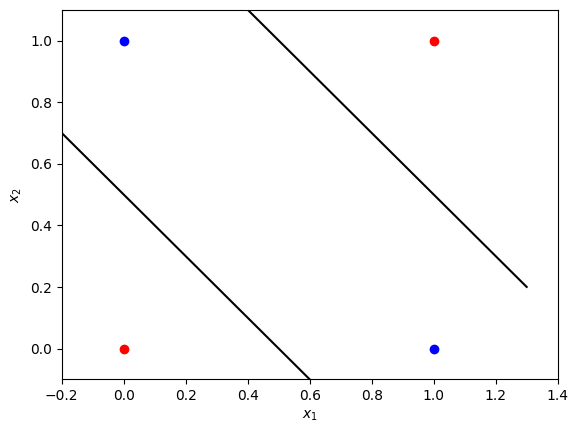

In [21]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# Example of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, -1 * x_line + 1.5, color="black")
ax.plot(x_line, -1 * x_line + 0.5, color="black")
plt.plot()

The shape of X is: (2, 2000)
The shape of Y is: (1, 2000)
I have m = 2000 training examples!


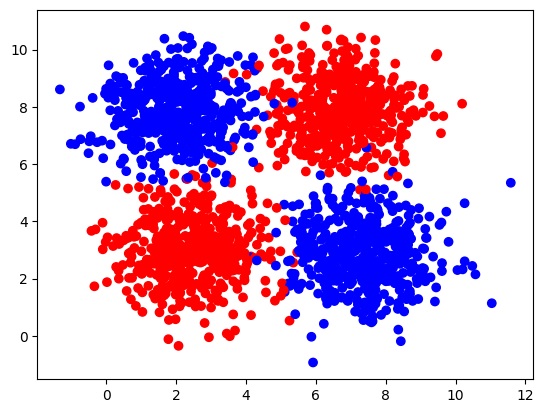

In [22]:
m = 2000
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (m))

**Проектирование сети**

In [23]:
def sigmoid(z):
    # функция активации
    return 1/(1 + np.exp(-z))

In [24]:
def layer_sizes(X, Y):
    """
    Функция вычисления размеров слоев
    
    Аргументы:
    X -- входной набор данных размера (размерность данных, количество примеров)
    Y - метки классов размера (размер вывода, количество примеров)
    
    Возвращается:
    n_x - размер входного слоя
    n_h - размер скрытого слоя
    n_y - размер выходного слоя
    """
    # Size of input layer.initialize_parameters
    n_x = X.shape[0]
    # Size of hidden layer.
    n_h = 2
    # Size of output layer.
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [25]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Функция инициализации параметров слоя
    Аргумент:
    n_x - размер входного слоя
    n_h - размер скрытого слоя
    n_y - размер выходного слоя
    
    Возвращается:
    params -- словарь python, содержащий параметры:
                    W1 - матрица весов формы (n_h, n_x)
                    b1 - вектор смещения формы (n_h, 1)
                    W2 - матрица весов формы (n_y, n_h)
                    b2 - вектор смещения формы (n_y, 1)
    """
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1=np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2=np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [26]:
def forward_propagation(X, parameters):
    """
    Прямое распространение
    Аргумент:
    X -- входные данные размера (n_x, m)
    параметры -- словарь python, содержащий параметры (вывод функции инициализации)
    
    Возвращается:
    A2 -- кэш вывода сигмоиды второго слоя -- словарь python, содержащий Z1, A1, Z2, A2 
    (это упрощает вычисления на этапе обратного распространения)
    """
    # Retrieve each parameter from the dictionary "parameters".
    W1 =  parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement forward propagation to calculate A2.

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [27]:
def compute_cost(A2, Y):
    """    
    Вычисление функционала ошибки
    
    Аргументы:
    A2 - Выходные данные нейронной сети размера (1, количество примеров)
    Y -- метки классов размера (1, количество примеров)
    
    Возвращается:
    стоимость - потеря журнала
    
    """
    m = Y.shape[1]

    logloss = - np.multiply(np.log(A2),Y) - np.multiply(np.log(1 - A2),1 - Y)
    cost = 1/m * np.sum(logloss)

    assert(isinstance(cost, float))
    
    return cost


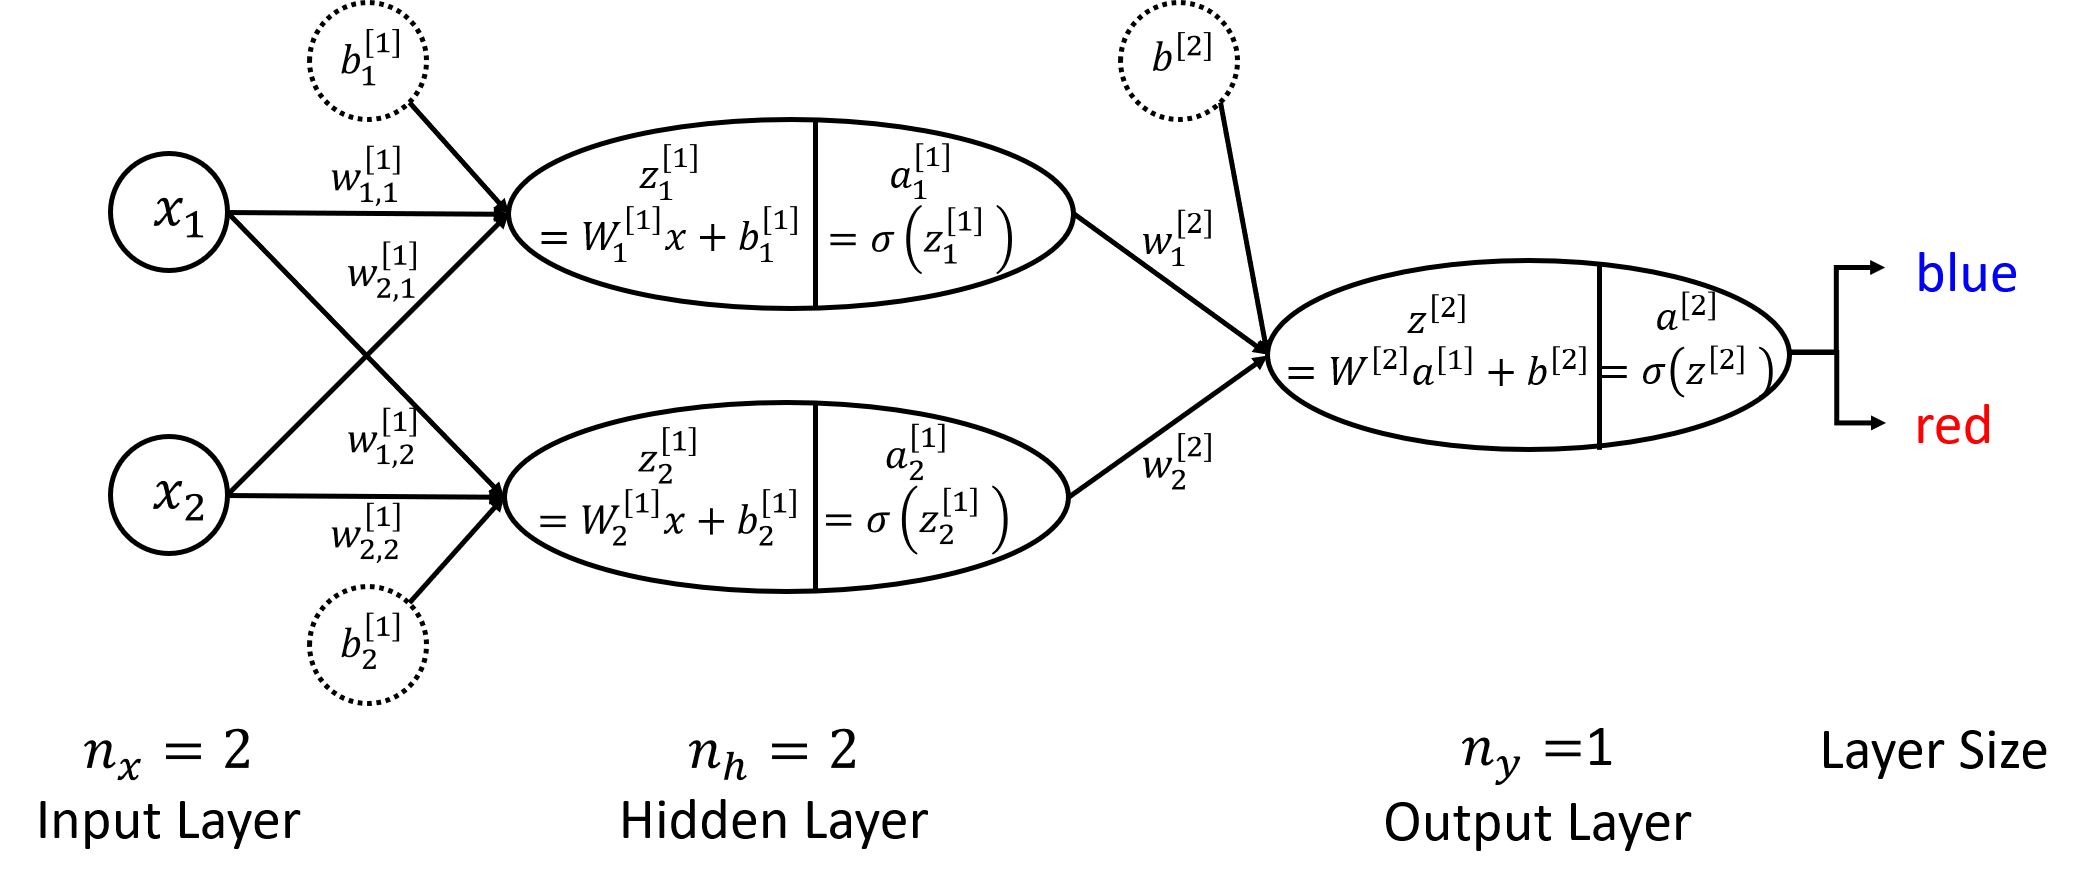

In [28]:
from IPython.display import display, HTML

image_tag = '<img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAACCUAAAN7CAYAAAB4MbJcAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFxEAABcRAcom8z8AAP+lSURBVHhe7N0L3Fxleff71vOB14Jga1Fqarp7QK2RRqyINa0oW2sxb6GkHqpRK5hqNB7BVGiw4pYKRMuuRlGz1UJAirHYiIoQFG2xCklphXoIUfCANRVPRfQV1r7+w7rC/dzPPWvWmlkzsw6/7+fz/xCeZ56ZWed1r/ta9/o5AEBjrbZstGy1bLfssOxrie226Hd6jV67wQIAAAAA00JbBQAAAAAAAGiJZZZ1lpWD/1tIF/myKHp9SBf+4tfogl9MFw11EVCfFb8HAAAAAMRoqwAAAAAAAAAttcSy2aI7hvzinC7CxXQXUXgBT4kv0um94tfovWOpi4YrLAAAAADgaKsAAAAAAAAAHZC6Y+hmS0x3JMWviy/OpS706aJeTBcS49fpbwEAAADA0VYBAAAAAAAAWkQX5XTRLXVBTcOWxhfe4mewpi70xUOn6m6k+DUa/jSmZ7mGr9GdTzF/L929xJ1JAAAAQHfRVgEAAAAAAABaTBfJwuFOU0OUpoY7jS+u6cKfP8NVv9OFuNRFQ/1Mv1f02vg1qYuBqTuU4u+kaYi/EwAAAID20vk9bRUAAAAAAACgxVIX1VLDnfqwqPqd7kTSRbbURby66AKgLhr6XU/6/1h8h5LChT4AAACgG2irAAAAAAAAAB0R3nnkSQ1TqouC8TCosxJ/ri78xd9ZFwUBAAAAdAdtFQAAAAAAAKBFdKFOiaXuQNpqaTJdiIy/c+oOJd3BpAuZ07xTCgAAAMBkaKsAAAAAAAAALaY7d/ScUw1nmhruVPwOJN3Bo4to87rLqCpd3NNFSX3/mKYhHDY19axXAAAAAPNDW4W2CgAAAAAAAFpOzy2Nn2eqZ6zG9LrUnUltkbq7SNMZTreiedGWi5gAAABAl9FWWRjaKgAAAAAAAGgl3XETX+zSHUhdHyJU06fpjKddQ6QCAAAAmD/aKgtDWwUAAAAAAACt5cOdhun68KC60BffddX0Z88CAAAAfUNb5Y7QVgEAAAAAAECr6aKXX+zSHTm6A6cvw4JqWn26U0O+at7oWa8AAAAAZo+2Cm0VAAAAAAAAtIguag27w0YXs7Zb2vws1nENu5ini52aJ7oQqHkHAAAAYDpoq6TRVgEAAAAAAEBr+F02ygb9IKEvdxyVtdni86xovgEAAAAYH22V6mirAAAAAAAAoFH0zNXwgpXCMJ/FwgujYbgLCQAAAKgPbZXqaKsAAAAAAACgUcJnsMbR77CY7sKK7zxSdli4QwsAAACoB22V6mirAAAAAAAAoJH07NX4opXuSOKiVbHwri0u8gEAAAD1o60yHtoqAAAAAAAAaJzwYp8uYKEcPZt1t4U7tQAAAIDpoK0yHtoqAAAAAAAAmJthd8mssPCc0eqGXeTTvNSFQAAAAADl0FapF20VAAAAAAAAzJwuPt1s0d1GmB6fz7qba7V+AAAAAKAQbZXZoK0CAAAAAACAqdHdRX7xSdH/o36648jnsWelBQAAAEAabZXZoK0CAAAAAACAqdEwqOFFPg93xtRLF/Tieaxo3vMsVwAAAGAx2iqzQVsFAAAAAAAAU7XRkroApZ+jXpst4TzWRT4NkQoAAABgMdoqs0NbBQAAAAAAAFMVX+zbatFdSaif5q3m8W4Lw6ECAAAAxWirzA5tFQAAAAAAAEyVns3qF6C4yDc9mre6C4l5DAAAAJRDW2U2aKsAAAAAAABg6nTxSRf8MB9c/AMAAADSaKvMF20VAAAAAAAAVLIs/y+aQ8tkh0V3JgEAAAB9RVuleWirAAAAAAAAoJIllpstuqikf7eZnnPqz5aNs85Sl+2W1Gcok9IdR3pOrpaJvycXYgEAANBHXWqrdAFtFQAAAAAAAIwl7mCvs/N+1sKiBP1bF8g8dV7E1HuF7607hPxzJ6ULrv5eHv0MAAAA6JsutVW6gLYKAAAAAAAAKhs2skBbL/aF06NigVnZYPHPnZTmvb9XmNUWAAAAoC+61lbpAtoqAAAAAAAAqCx1p8tui4blbKM6ihI07Svu+GdpdRYliJaBv5+GRtUQqQxXCwAAgD7pWltFNE06v4+j6aqL2jKpz1DqKOigrQIAAAAAAIBKdPEofPSAoo79tpqkKEEXN/X3fpGtirqLEnQhUe+l4WpnOeIDAAAA0BRda6uIF1r4eX6YOsXv7fNP7ZZJ0VYBAAAAAADAWHQxSRf8tg7+r73GLUrQhbX4Tqwq6i5KEC7wAQAAAN1pq0hYlDBL3lapoyhBaKsAAAAAAACgt6oWJagYQRc3/W88Goa0imkUJQAAAADolnGLEjRqhNo3au+oDVP1ERbeVqmrKAEAAAAAAADorbJFCbqIp2ef+rNVdXFOz1f1v21qUYK+NxcSAQAAgHYqW5Tgj5ZTAbXaJt7WCKP30GvK8L+ZZluCtgoAAAAAAAD20oUrdchXvbumDaoUJejingoRwvngf9u0ogTdDeVFFPqM1RYAAACga7rcVpEyRQneVvH2hf5G7RYfKUGPsvDfKWUKE/y10ygaoK0CAAAAAACARcLHFeiCVpnHHLRF2aIESV3o9L9tUlFC+N6eLjxPFwAAAIh1ua0iZYsSfB7o9al2i4oA/DVl2i7+2rqLEmirAAAAAAAAYJH4rhtPmbtr2qBKUUKK/22TihLCaQqTujgJAAAAtFXX2ypStShBoxCkhK9RRrV9/HV1FyXQVgEAAAAAAMAiqYtGuvDXlYtGXSxKkN0Wf3+PhnAFAAAAuqLrbRUpU5QgasuMas+EBRzDihecv67uogShrQIAAAAAAIAF4uePKhr6syu6WpTgw7Pqe2k4VE0bdx8BAACgS5rUVlG7Qt9H0fm3igiUSb9P2aKEMsJigCX6QQF/3TSKEmirAAAAAAAAYBFdYNOFI7+zZtRdNW3S1aIEXdRbnf8XAAAA6KqmtFW8KMHP8T362STqKkrQfPHvpPccxV87jaIE2ioAAAAAAAAo1KWCBOlqUQIAAADQN01oq6iz3c/zFbU3JlFXUYL+vsp38tdOoygBAAAAAAAAaCTdRaMLchpyVAUAnrIX1YahKAEAAABAXcL2hTLqMQmj1FGUsM7i36fs4yT89RQlAAAAAAAAoFd0gS81JOokw372qShB86lrI10AAAAATRIWAJR5TMIokxYlaOQGL+YuW5AgPg2zKkqgrQIAAAAAANBDuqNHHfZNfM6nRkvwi2STXujrelGCLuzpszSf/GLkONMJAAAANEWT2yphEXWVIoBhJilKUFsgLEioMr98GqZZlEBbBQAAAAAAoOfCO3x0AUwXsZpy50pYlDDphb6uFyWkRpbQsgUAAADaqi1tFbU1JjVuUcIkBQni0zDNogTaKgAAAAAAAD231RJfIJrmBakqwu806YW+rhclaLhW/xyPli0AAADQVk1tq6jjP/xOGtFhUuMUJahdM0lBgvg0THO+0lYBAAAAAADoufAOH08dd/pMShfYwu806ZCtkxQlTPJdZlWUEF8YVaoWUAAAAABN0tS2Sti2UDFBHaoWJdRRkCA+HdMsSqCtAgAAAAAA0HPxxSGljjt9JhUO1VrHhb4qRQm6aKbodfo7XRj0v1X0/xomVfNp1MW/WRUliD5DF/c0vzREahPuIgMAAADG5efRYZrQVgnP8VOPmfN2hNoMZYsFqhQl6D29YEPn/WU/I8WnY9ptB30GbRUAAAAAAIAe0sUrDaWpC0K6+KULW0oThEO1pi70VVWlKCG8yFgmRRfUwveaNk3XJBckAQAAgKZoS1tF7QynIgQvLghT1F5wVYoS/PP1N8PO//VzFQGMaktV+Y6ToK0CAAAAAACAxvE7f5TwQt+4qhQl6O4rXVAsm6K7tWZZlAAAAABg+vyxCYq3BdT57z9LZVSbpmxRQjiinN5TbZtUNBqBXjOq2MDfa9pFCQAAAAAAAECj6MKeXxzTBb/wjhr9W4UAumjmw36WGcK1SlFCnShKAAAAALpDbQk/v1chgXgBgP6r36vNolEe/HWK2jVFyhQl+OgH4fuOir5HEX8dRQkAAAAAAADolbCAILwop2IEv1gXR78rQlECAAAAgEmFIxVodAT//1Tnfzx6QlGbpUxRQvjZZTNqhAZ/HUUJAAAAAAAA6JWwI9+fgaoLcLorSNEFu/gOIf1/0YgJfShK0PRrPimab7qg6fMPAAAAwOS2Wvz8Xufb+q/Ov1PCNkjR66RMUYLaMXrPKhk1qpx/t2kXJdBWAQAAAAAA6CldUPP4oxDCRyXMi1/cU3QhTReuVHSgn4cX1XyYVE/RRT69T/i6KhfqqtDdT+F7h99x2sKhZD26uAkAAAC0TVPbKrst4fm2vt8wameEry3q+C9TlDANZb5bHWirAAAAAAAA9JRf+Aozy1EEUnSh0b+LChHUya//6i6a+CJk/EzVoguCeh9dQExl1HNWq9AF09RnKNMWX/RUZvG5AAAAQN2a2FaJO9bVFikqlKAo4U60VQAAAAAAAHpKF4HiC0N1jhowDhUP+HfRRT5FxQbDLvaFoyrotX0WFnQwTwAAANBmTWyraCS08PuM6siPixj6XJRAWwUAAAAAAKCnmnihT49WCL+PvmPR3UfxIxz6jAt9AAAA6IomtlU0ept/F51nF7VTJCy4VlTUMIwXJei/+rswddH3jd/bvxtFCQAAAAAAAJgKXQSKLwyNurA2bRoVIfw+ox6tEL++73Sh1qNlOe/lCQAAAIyjiW2VcJS2okfHubjguqioQu+taY6j4oy6aOSG1Gco0y5KENoqAAAAAAAAPaSLT+FFMmXeF4bCO6J0l9AoYVFCnRfsAAAAAMxP09oq+uzwuxSNeuDCtoqmBwAAAAAAAOgddeLr4pj+qwIAZZ4X+uJnro4aJUGqFjEAAAAAaL6mtVXCRx0oRaMeuLCtUmZkBQAAAAAAAABTpiKEKhf64ruV9IxXAAAAAKhb+CgGFRuMopEUwrZKmZEVAAAAAAAAAEzZZotftCsz6kE8skLfL/SpiEPzQHdxKWXu3gIAAAAwWvgohu36wQhV2zZdR1sFAAAAAAAAjRAOb1pm1IMNFn+9hnYtO5yrXtfFi2BxkYbCBVAAAABgcmFbRQUHRdTWUPvEX1/msXRdR1sFAAAAAAAAcxc/iqHMqAdVn9Gqz1Cxgy4Qlrm7qW3i59wqXZxOAAAAYJbiDvVRbY9wVIVRBQx9QVsFAAAAAACgp3wITT0fVaMO6ILZvB6BoM8NL1Dpwl+R+PW6yDWMihF0d1LVIoa20TSG80ThIigAAADaqEltlfg8u6gzXUXQ/jqNBFB2NLeuo60CAAAAAADQU+HjDzxlHpswDfF3GfV4BV0ILPOdVaygi4HheytdLErQBdt4Oue1PAEAAIBJNKmtos7z+LvEj2RQ+yV8ndogo9o0fUJbBQAAAAAAoKfi0QaUeXXWh0OcKkUX8MILWhr9IHX3kYoR/D1VwKCLmuFndLEoQfNBy1QXSDW9mu553U0GAAAATKJJbRUfcU2PgQtHX9O/dc6tAgT9zl+j4gRGSFiItgoAAAAAAEBP6cKQX1Dz6CLaPIQX95T4ziOngoTwgt+wxzboApd+r9f7BcHwOaZdLEoAAAAAuqJJbRV1oCteOK22hu7y18/UjvHiBHW2j3oMHQAAAAAAANAr8YU+XeSbx3NPdeEu/B7+XfzOGX0fFRTowl/q98PEoy1QlAAAAAC0Q1PaKgAAAAAAAAAmpLt5NJqACgPmdYHPH8egC436PvGoCWH0mnGHQ6UoAQAAAGiPJrRVAAAAAAAAAHSALjJqFIRwZAMVEOgCpAoQFP1ej3SIRz+oostFCZo2BQAAAACahLYKAAAAAAAAeqPLRQmaHp82jTShQg6eZwsAAABg3mirAAAAAAAAoDe6XJSQeuTFSgsAAAAAzBNtFQAAAAAAAAzoGa3qtNdzW3dYunjnSleLErSswgt8ys0WnrsLAACALuhDW6WraKsAAAAAAABgYLVFF4bCC0XrLF3T1aIELatw2XVt+gAAANBffWmrdBVtFQAAAAAAAAzoQl98oUgX/rqmy49v0LTpgp/uHNP06S4yAAAAoO360lbpMtoqAAAAAAAAGAydGV/oU5ZYuqTLRQkhLc+uLTsAAAD0U1/aKn1BWwUAAAAAAKDHtlv8Ap/uPNL/qxO/S/pSlAAAAAB0SR/aKgAAAAAAAEDnaVhUXdzTsJq6e6WLKEoAAAAA2qcPbRUAAAAAAAAAHRA+j1bPM227lRYVV2i6AAAAAKApaKsAAAAAAACgF3QXlbLMootiuy1elKBstGj0hLbebaWLfD4tmjZND89nBQAAADBvtFUAAAAAAABQmjrt23rxKHz2bJm06bm0KrRITYOKLwAAAIA+aHNbpctoqwAAAAAAAKAUXeDTIw508Uh3ubSRpkEXvsqmTSMmbLbEF/l0BxLP2AUAAEDXdaGt0mW0VQAAAAAAAFBIdxr5Bb4w3IHULHo2a/w4inUWAAAAoKtoq7QDbRUAAAAAAACMFF9AUrgDqZl0cU/LizuPAAAA0Ae0VdqDtgoAAAAAAACG0p0t8YU+3ZHEhaTm0hC2AAAAQNfRVmkf2ioAAAAAAABI8juQbrboDhcu8gEAAABoAtoqAAAAAAAAQAestGy0cIGvOXTBVcsEAAAA6DPaKs1DWwUAAAAAAABoOV1w1Z1gfkeYhq0FAAAAgHmjrQIAAAAAAIBa6YKT7oLBbG216CJfGD07FwAAAMAdaKvMB20VAAAAAAAA1GaFxZ/fysW+2dGdRvFFPoXhUQEAAIA70FaZD9oqAAAAAAAAqIXuONJFpfhC0zILZiOe/xoWVcsFAAAA6DPaKvNHWwUAAAAAAAAT011H4UUmLjbNR7gcVuoHAAAAQM/RVmkG2ioAAAAAAACYWOruow0WLvTNlua3hkgFAAAAcAfaKs1AWwUAAAAAAAAT22HRBT7ddcTdL9Ol5+ByERUAAAAoh7bK7NBWAQAAAAAAwNTowtN2y5LB/2FadJFPF1R3W3gWLgAAADAabZXZoK0CAAAAAACAudEFKYbqnJxf5PPoTi89nxUAAADAeGir1IO2CgAAAAAAAOZGF/l0QUoXprjYN75wPsbhYh8AAABQHW2VetBWAQAAAAAAwNykLk7pDhqMZ6MlnJeKfgYAAACgGtoq9aKtAgAAAAAAgJnT81qH3S3Ds1zHd7nF5+N/WfR8XAAAAADl0Vapl9okGhEhbKu8zUJbBQAAAAAAAFO33RJe4FO4+6i8+CJe6u4jzWMAAAAA1dBWmUzYVtltiefl0ywAAAAAAADATIQX+xi+sxxd4Nts0d1bfqdW0d1cWy0AAAAAqqGtUl2qrZIqnqbAAwAAAAAAADOli1bDLvKttOh5rriD5kV4p9EOi9Pvwgt9YbiICgAAAFRHW6W8YW2VDZawbaJQOA0AAAAAAICZSz1PVBe1/O5/7qS5Yx6lRkMIH9GgZ7XGv/estgAAAACohrbKaEVtFRVvxD9X8QIAAAAAAAAwV7qopTtrwgtXuqDlQ4D2lS54hvPEo2IEl7ro59HvAAAAAIyPtkrasLbK0xI/UwEDAAAAAAAAMFcaJjV14apPw6Om7siS8Nm2miepERBSz231hAUMAAAAAKqhrVK9rRI+1sHT9yIOAAAAAAAAzFHqziNFzyLtCxUOaB6kCg40f3SBT78vupCXuliq9O2CKQAAAFAX2irjtVXCYgUPj70AAAAAAADA3IV3++siVupuHF3869IdNrrAp+nWhTxNt/6bmm5Nc+rnsdTFv6L3BQAAADAabZVqbZXUSG59KuQAAAAAAABAg+nCl4b6TN3Zrztz/ILWVksXLvilRjfQzyaRupNL0c8BAAAAjIe2Svm2ykpL/LeaLwAAAAAAAEBj6c6btj+XdNhdRfE0KZM8bkGfM6wwQXd1AQAAAKgPbZXF9H7x32mkBQAAAAAAAKCxNNRnfFGrLR3sumin769CgdQFPN0xFE/XJEUJoouAPsxqHAoTAAAAgPrQVklLtUe6MIIEAAAAAAAAOip157+GBI3popkulOnCmoZXnbf4e6eGO/U7kHTRbp0ldZfSOHSxMPzsMHrGKwAAAIDJ0VZJS82XJkw3AAAAAAAAMJQugvmwqPpvfEEsNTrALJ5bqs9VAUDqjqGyw7jqomVdxQghXfSLP9+j594CAAAAmBxtlcVUCB2/v+YTAAAAAAAA0Hi6kJW6mKWfxRe9dBdSTHfs6AKgfqeO+aIhRHXxzRPTe+i9/OJi6qJiEy7EUZgAAAAAzAZtlTvp+8fvn/oeAAAAAAAAQGtoKNT4olc8PKgu2MWvST3KIL5rKDWUaTwcqS74xeKCAL1mHhfiUhdBPQyhCgAL3cOyv0UdQY+wHGY50nKM5XmWl1r+0vIGy2mWMyxvtbzN8k7Leyzvt2yxXGDRfv+fLB+1fMLySctnLJ+1XG25xnKt5UsWHX9utHzLssfyPcuPLD+x3JZH/9bP9Du9Rq/V3+hv9R56L72n3lufoc/SZ+qz9R30XfSd9N30HfVd9Z313TUNmhZNk6ZN06hp1TRr2jUPNC80TzRvNI80rzTPAADD9bGtEr+/fwYAAAAAAADQWvGFvjIX3pTUHUrxhb7UxbnUnUWpO5n0XvpuKgxI3cU0K7pYGX9fRfMpNZwrALTJfSwPsvym5dGWP7A83fJsyxrLayx/bXmL5d2WD1gutnza8m+W6y3fsdxqSe0ryeho3mkeal5qnmreah5rXmuea95rGWhZaJlo2WgZaVlpmWnZaRlqWQJA1/SxrZIqslDm2SYCAAAAAAAAJqbOdV1Q04W11MW51IgBqUcY6CJh+Bq9X0wXCMPXKKn3KhpyddY0T+LvrGh6m/Q9AeAulgdafttyhOWZFu3DT7WcbflHy79Ydll+aEnt20h7o2WqZatlrGWtZa5lr3VA64LWCa0bWke0rgBAG/SxrRIXUCgURAMAAAAAAKDTUqMFrLTE4gt9upgW09/57/V6XQxMvVfT6HuG0+bRNHLXEoBp0j7m1y2HW/7Y8iLLyZazLOdbtH/6gkV326f2U4QMi9YZrTtah7QuaZ3SuqV1TOua1jmtexznADRZF9sqqWlS8QUAAAAAAADQaboYp7uEdPeQLpKl7g7yC336r6JnssbUsaG7fNrWwaHvGz9j1pOaTgAo40DLYy1/ajnB8jbLNstVlhstP7Gk9juEzDpaF7VOat3UOqp1Veus1l2tw1qXAWBeutZWSY3YoOkCAAAAAAAA0HG6OJkaSlXRXVQAEHuI5fcsf2Z5nUXD6X/c8kXLrZbU/qSVufvd757d//73zx7ykIdkD3/4w7PHPvax2ZOf/OTs6KOPzlavXp2tXbs2W79+ffaGN7whe9Ob3pSdfvrp2Vvf+tbs7/7u77J3vOMd2Xve857sfe97X3buuedmF1xwQbZ169bswx/+cPbRj340+8QnPpFdfvnl2Wc+85nss5/9bHbVVVdl11xzTXbttddmX/rSl7Ldu3dnN954Y/atb30r+853vpN973vfy370ox9lt956a3bbbbcNon/rZ/qdXqPX6m/0t3oPvZfeU++tz9Bn6TP12foO+i76Tvpu+o76rqn5oGnTNGpaNc2ads0DzQvNE80bzSPNK82z1Hu0OFqntW5rHde6rnVe6762AW0LAIBywhEbPLQ3AAAAAAAAgJ7QXVfxBUJP6hm3ALrr7pZfszzR8nzLKZb/z6JOg+stt1lS+4rG5B73uEd24IEHZr/xG7+RLV++PPv93//97Kijjsqe9axnZS960YuyV7/61dnrX//6bOPGjdm73vWu7Pzzz88+8pGPZFdccUW2c+fObNeuXdl//dd/ZT/+8Y+zPkrN06o07zQPNS937NiRfepTn8q2bduWnXfeednZZ5+dnXnmmdkpp5ySvepVr8qOP/74wbLRMtKy0jLTstMy1LJMfZ+GRduEtg1tI9pWtM1o29E2pG1J2xQA4I5i6HgfqtEdAAAAAAAAAPTECkt8kdDDs16BbrmvZbnl2ZZTLedYPm3RMPapfcDcc8ABB2QHH3xwtmLFiuzYY4/NXvziFw86td/+9rdnF1544aCg4Itf/GJ28803593iGFdq/s+TlqmWrZaxlrWWuZa91gGtC1ontG5oHUl994ZE25a2MW1r2ua07Wkb1LYIAH3ij5sIk3osBQAAAAAAAICOKipM0PNsAbTL/pbDLX9uOcOiZ+brju7UNj7T7LPPPtlDH/rQ7DGPeUz2R3/0R9kLXvCC7LWvfe1g9IJzzjknu+SSSwajFnzzm9/Mfvazn+Xd05iF1PJqC60rWme07mgd0rqkdUrrltYxrWta57TuaR1MTescom1S26a2UW2r2ma17QJAF2lUmXg/SDsDAAAAAAAA6BmNihBfKPSoaAFA8zzYcoRlreXvLJdZvmlJbcdTz7777ps98pGPHAzHv3bt2uz000/PLrjgguzKK6/Mrr/++uxHP/pR3oWMJkot067Suqh1Uuum1lGtq1pnte5qHda6nJofM4q2YW3L2qa1bWsb17YOAG220RLv7zZYAAAAAAAAAPTMZkt8sdCzzAJgPvR8+qdZXm15t+WfLalhkKeaBzzgAYPn/h999NHZK17xiuytb31r9qEPfSjbsWNH9t3vfjfv7kVbpZZ5n2md1rqtdVzrutZ5rfvaBrQtpObXlKNtXtv+eyzaF2ifoH0DALTBSku8X9tqAQAAAAAAANBDwwoT1BlCYQIwXb9seaplveVcy9WWH1tS22TtedCDHpQddthh2TOe8YzsxBNPHDzD/yMf+Uj2hS98gVEOeiC1TmA4bRPaNrSNaFvRNqNtR9uQtqXU/JxStI/QvkL7DO07tA/RvgQAmmRfS7z/UvsCAAAAAAAAQE+lnvmq7LbogiKAyS21HGN5g+WfLF+3pLa7WrN06dLsaU97WvaqV70qe9e73jV4/v6XvvSl7Cc/+Une1Yq+Sq0vGJ+2KW1b2sa0rWmb07anbTA1r6cQ7VO0b/lry9EW7XMAYJ5S+yraFgAAAAAAAEBP6eLgDkvqwqF+DqCagy1/ZjnDcqnlvy2p7auW3PWud80e9rCHZcccc0z2ute9LjvnnHOyq666Krvlllvy7lJgsdS6hOnQtnj11VcPts2TTjppsK1qm9W2m1oONUb7Hu2DtC/SPkn7JgCYlVT7YoUFAAAAAAAAQE8VFSZoJAUAaQ+0HGXR3ckftXzXktqOJs5973vf7Hd+53eyZz/72dmpp56aXXjhhdm1116bd3sC1aTWMcyetuEPfvCDg21a2/by5csH23pq+dQU7aM+ZtE+S/su7cMAYBo2WuJ90DoLAAAAAAAAgB5bYtGzXuOLh8pWC9B397Acbnm5ZYvlK5bU9jJR9t9//+zwww/P/vzP/zw744wzBs+wv/766/MuTKAeqXUPzbF79+7Btq99wAtf+MLBPkH7htRyqyHal2mfpn2b9nHa1wHApDZY4v0NbQoAAAAAAAAAP7fMEl889OhuJ6BPftlyjEXr/r9aUtvF2LnLXe4yGPngBS94QXbWWWdll112Wfatb30r75IEpiu1TqL5tI/QvkL7DO07tA/RviS1PCeM9nna92kfqH0hAFS10hLvW1QADQAAAAAAAACDZ73GFxA9qy1AV/1fFq3jZ1uutaS2gbGyzz77ZI9//OOztWvXZu9+97uzq666KrvtttvybkZg9lLrKdpJ+xLtU7Rv0T5Goypon5NaxhNE+0TtG7WP1L4SAEbR4+FS+xMAAAAAAAAAGEjd2eTR74AueJTlJRYNW36DJbW+V8797ne/7IgjjshOOOGEbMuWLdl1112Xdx0CzZFad9Et2vdoH/Sa17xmsE/Svim13MeM9pnad2ofqn0pAKTstsT7D43MBgAAAAAAAAAD6yzxRUSPRlMA2kZ39x5nUUfaTZbUul05hxxySHb88ccP7lK+5ppr8u5AoNlS6zK6T/so7au0z9K+K7UejBntU7Vv1T6WkRQAuO2WeH+hNgYAAAAAAAAA7LXZEl9IVPQ8WO5yQtPpOejPtLzT8mVLal2ulCVLlmR/8id/kr35zW/OLr/88uyWW27Ju/qAdkmt3+gf7cO0L9M+Tfs27eNS68YY0T5X+95nWLQvBtBPGyzx/mGjBQAAAAAAAAAWSN3hpKgwYYkFaIq7W55mOdNytSW13lbKox71qOwlL3nJYAj0G264Ie/GA9ovtb4Don2d9nna92kfmFpXxoj2yWdYtI/WvhpAP6QeCbfVAgAAAAAAAACL7LDEFxQVPScWmCcNE65nmn/Y8lNLaj0tlbvc5S7Z4x//+OzEE0/MPvzhD2ff/e538y46oHtS2wCQon2h9onaN2ofqX1lav2pEO2rtc/WvptHPQDdtq8l3geosBkAAAAAAAAAFtEFxWGFCRpJAZilJ1lOt/y7JbVOlsq97nWv7ClPeUr2hje8Idu+fXv205/+NO+CA7ovtU0AZWhfqX2m9p3ah2pfmlqfKkT7cu3TtW8H0D0qQoi3e0ZbAwAAAAAAAJCkwoTURUWFwgRMk55H/kLLP1h+aEmtg6Vy+OGHZyeddFJ22WWX5d1rQD+ltg9gXNqnat+qfWxq3aoQ7eO1r9c+X/t+AO2XehScHusAAAAAAAAAAEnLLPFFRc9GC1CXX7O83JK6kF06y5Yty17+8pdnF110UfbDH/4w7z4DkNpegDpoX6t9rva92gen1rUK0TFAxwIdEwC0k9oI8ba9wQIAAAAAAAAAQ62wxBcWPastwLh+2/I6y2ctqfVrZA488MDsec97XnbOOedk3/zmN/MuMgCx1PaDZti8eXO2YsWKZHbs2JG/anIrV65Mfsbq1avzV9RD+2Ltk7Vv1j46te6VjI4NOkboWAGgPTQqQrw9b7UAAAAAAAAAQCEKE1CXx1reaPkPS2p9GpnDDjssO+WUU7Irr7wy7wLrHnUSLlmyJJmbb745f9Vkdu/enXx/ZcOGDfmr0BWpbQnNsHHjxr3LRNue/t9TZ1GCih/C9/ZRDbTNT5P21dpna9/t0zlGdMzQsUPHEADNtsQSb8N6JBwAAAAAAADQO7qDJxV1vtdFF+RSn6Hod22zzhJfYPTUOd/QPY+wnGK51pJafwqz//77Z8985jOz9773vdlNN92Ud3N1m+5o1rSr03D79u0LUqf4vffdd9/B59Z95zTmL9ymPGgGFQj4MlGx0KxoO9dnTrsoIaR9uPbl2qdr3+7TXTE6luiYomMLgObZ15LadvVzAAAAAAAAoFd2W3RxTHft6N+eHZa6qKM+fG/FL8qpg7+NNlt8GsJoPi6zAE6FN6+2jPVohoc97GHZiSeemH3yk5/Mu7L6JSxKmCV1TupzKUronnD78qAZ+lSUENM+Xvt67fN9HlSMjjE61rSx2BPosrDd46GIGQAAAAAAAL3jF8rUyT4r4V1DbS1KED0T1qcjjAoT6BTotwMsL7JcakmtI4V59KMfnf31X/91tnPnzry7qr8oSkDdwm3Ng2aYtCjhiiuuyI488shs6dKl+U/KaUJRQkj7fh0DdCzw+VExOvboGKRjEYD52miJt9E2t38AAAAAAACAsVCUMJntFp+WMJqvDM3aP0+3XGBJrROFWbFiRXbGGWdkX/7yl/NuKcikRQlbtmwZdFCuWbMm/0k5FCV0V7jdedAM4xYl7Nq1a7CN+9+qMKGKphUlhHRM0LFBxwifvorRMUnHJgDzscESb5cqbAYAAAAAAAB6ZdKiBHW862JblWFIu1SUoGnRoy58esLU+QgMNNfBljdavmZJrQdDo46zTZs2Zd/4xjfy7ifExi1K8DumfV6fdtpp+W/KoSihu3ydCINmqFqUsGfPnsG2HS5LpUtFCSEdK3TMCPdtFaJj1KmW37IAmJ2Vlnh7VPsLAAAAAAAA6JVxixK8GEGPKtDfVyku6FJRgmh6fD7G0UgK6J67WVZbPmFJLfehOeyww7Izzzwzu/HGG/NuJhSpWpSgO6ZXrVq1aL5TlAAXrxsKmqFKUYK26f3222/wWm3zYUd9V4sSQjqG6FiiY4pPd4Xo2KVjmI5lAKYrbPd41H4CAAAAAAAtcx/LMssqy0mWv7d81PIZyzUWdRTusfwkj/6tn+l3eo1eq7852aL30HvpPYG+GKcoQaMixKMD6OJ2WV0rSpAlFi/QiMMQrd3xaMvbLD+wpJZ1Mo94xCOy17/+9dm1116bdyehrLJFCbpj2odvV0el/q3HNvgyoCgBzteJMGiGskUJGglFr1HxgQqRRPsA/9s+FCWEdGzRMUbHGp8HJaNjmY5pOrYBmJ5U8bKuOwAAAAAAgAZbbnml5cOWr1rixn1d0XvrM/RZ+kygq6oUJaSKETx9L0oQzZ9wnoTp0nT20Z9aKo2KoM6tV7/61dlnP/vZvNsI4yhblOBDuK9fv37QOSnbtm3buzwoSoDzdSIMmqHKSAkqTIj53/atKCGkY46OPb4PqxAd43SsA1A/jZwWb3O0DQAAAAAAaJhft6y1/IPlO5a4MT+r6LP1HfRd9J2ArihblKDf63UqStBFNBUWaAQA30YoSrhDUWFClXmE+fsly19aUne3Dc2xxx6bXXTRRXn3ECZVZaSEnTt35v93B7+bWqEoAc7XiTBohipFCSn+t30uSgjpWKRjks+XktExT8c+HQMB1GOjJd7W9Bg8AAAAAAAwZ/ezHGe5zBI33psSfTd9R31XoM3KFiWstHgxggsvsFGUcCdNk09fHBUtoNkOs7zHklp+yajD/PTTT89uuummvCsIdSlblJBCUQJSfJ0Ig2agKGE6dGzSMUr7UZ9HJaNjoY6JACajdlS8ffF4NwAAAAAA5ujplnMtt1viRntTo++q76zvDrRRlcc3xChKGM5HlkiFZ8g20x9bUsPrJnOf+9wnO+6447JPfepTebcPpoGiBNTN14kwaAaKEqZPxywdu3QM8/lVIjo26hgJYDxh28dzswUAAAAAAMyYOjOvtsQN9bL5imWbRR2kL7IcadFdPY+w/KrlAMs98+jfSyz6nV6j1+pv9Ld6D71X6jPKRNPwXAvQJhQlTM+wwgRdhKQwoTm07l5lSS2rRVm+fHn29re/Pbv11lvzLh5ME0UJqJuvE2HQDBQlzI6OYZs2bRoc03y+lYiOlVXO9wDcSef/8Tal6xIAAAAAAGAGVAxwnSVunBflB5YPW15pWW65h6Vuek+9tz5Dn6XPTH2XYbnWomkD2oCihOkadue9LkxqPmA+ft7yUsuXLKnlsyirVq3KPv7xj+fdOZgVihJQN18nwqAZKEqYj0suuWRwjPP5VyI6duoYqmMpgHJ2WOJtice6AQAAAAAwZS+0eEdomWgEgvWWx1nmRaMq6DtUGdFB06hpBZqMooTp0rSmLkIq+jlm636Wv7TcZEktkwX5xV/8xWz9+vXZrl278q4bzBpFCaibrxNh0AwUJcyXjnU65unY5/NyRHQs1TFVx1YAxcJ2k6fr7SAAAAAAAObmUMsllrgxnso3LGda9DdNo++k76bvmPrucTTNj7EATURRwvQVFSZoJAVMn0bAeZ2l1Mg3v/u7v5u9+93vzrtpME8UJaBuvk6EQTNQlNAcOgbqWOjzdER0bNUxdhoj2AFdobZSvO1stQAAAAAAgBrdy3K6JW6Ep/IRy1GWttB31XdOTUsczQPNC6BJKEqYDT0zNvUsWYXChOl6haXUyAhPfvKTs4suuijvkkETUJSAuvk6EQbNQFFC8+iYqGOjz9sR0bFWx1wAi+lRDfE2o7YBAAAAAACoyTGWGyxxAzzOBy1PsLSVvrumITVtYTQvNE+ApqAoYXaWWXy642heol4vslxvSc3vBTnmmGOyyy+/PO+CQZNQlIC6+ToRBs1AUUJz6RipY6XP4xHRsVfHYAB3Cts/YfRzAAAAAAAwoTdZUg3vMOdYuvRoA02Lpik1rWE0b4AmoChhtlJ3SXmqzEMM9xzLf1hS83hBnve852VXX3113uWCJqIoAXXzdSIMmmGSooQ9e/bs/VuKEqZHx0wdO31ej4iOxTomA7iDt7vCqGgZAAAAAACM6aGWSyxxgzvMVZanWLpK06ZpTE27R/NI8wqYJ4oSZm+lxac/jn6H8WjEGj0KIzVfF+TFL35x9uUvfznvYkGTTVKUsG3btr3LnKIEOF8nwqAZJilKCIuQli5dmv+0HIoSqtMxVMdSn+cjomNzm0fEA+qi9la8ffSxLQQAAAAAQC2OtQx7brryM8uJlr7QtGqaU/NC0bzSPAPmhaKE+dB0+zyIo9EUUN6DLGdbUvNyQXR353XXXZd3qaANJilKUCGCL/s1a9bkPy2HooTu8nUiDJphnKKEXbt2DQqQli9fvmCZrl+/flCoUAZFCePTMbXCyAk6VuuYDfTVBku8XYzTBgMAAAAAoPdeZYkb2WE+YOnjyACaZk17ap54NO+AeZikKCG826dKcQFFCXdI3S2lqFiJoVzLOcHyY0tqPu7NqlWrsquuuirvQkGbjFOUsHPnzmzLli3Zfvvtt2A90M/0uzIoSuiucJ3woBmqFCXoEQ3hMhyVogIFihImp2OsjrXxfE9Ex2wdu4E+So2WtsMCAAAAAAAqONUSN7DDvMbSd5oHqXnj0TwEZm3cogQVFoRD5Vf5e4oS7jTscQMqTFhiQdrRln+3pObd3hx11FHZpz/96bzLBG1UpSghXv6jUoSihO6K1wMFzTDJ4xsmQVFCfXTM1bHXl2NBdAzXsRzok7AN5NE5PwAAAAAAKOltlrhx7fmK5YkW3EHzQvMkNa8UzUtglqoUJegRDSoi0GMbdFdPvP5utWhYUr2u6HEOFCUslJqXipYNFvpFy/ssqfm1N495zGOyiy++OO8iQZtN8viGSVCU0F3hvsKDZqAooTt0DNax2JdnQXRM/yUL0BepR11SiAwAAAAAQAlbLHGj2nOe5RcsWEjzRPMmNc8UzVNgVsoWJaiQQBfRyqaoQ52ihIU0P4YVJmgkBdxBhS57LKn5NMj973//7Kyzzsq7RDBrp512WnK5lIkerZBCUQLqFq53HkxG26+G7g8fmbJ8+fJs/fr12a5duwav0aNT9Hv9bBiKErpHx2Qdm325DomO7c+zAH2QGiWN9hAAAAAAACMUFSS8xYJimkepeadQmIBZGffxDZOgKGExL/rw+RKm74UJD7F8wJKaN3vzspe9LLv55pvzbhDMQ9VnvHvUUakOyxSKElC3cN3zYDxXXHFFtnTp0uQ89Wj7VsGSFyxQlNA/OjbrGO3LtiA61uuYD3SZRpyL132NNAcAAAAAAIYoemTDyRaU81eW1DxUeJRDNy2zqAAgzqhhO1da/LX6d4o6tsP3HPV6oSihObRu+HyJowuYfbTG8iNLap4M8tSnPjX73Oc+l3d9YJ7Cu6R117TfIR3TXdXhMty2bVv+m8UoSkDdwnXPg+ri7VhFSeG2rEKjVKFS0fYeFiXs2LFj0JntqVP4vgpFCbOhY7WO2b6Mh0THfB37ga5Suyxe7/UIPAAAAAAAkHCqJW5Ie9ZaUM1LLal5qWheo1tUfKACgHhZq0O6iC5W+WuHXbhSZ7/utAnfV9GjAYahKKFZVlh83sTR4wv64v6W8y2p+TDIAQcckG3evDnv6sC8qQDBl40KEoZRh2S4HIc9tsF5UYI6C9VJGaYu6pSM35uihO4K1z8PqokLEjZt2pT/ZqE9e/YseJ2inw0TFiXE2bp1a/6qyfn2HYeihNnQsVvH8NQyCKJzAJ0LAF0TtoM8Gi0NAAAAAABEXmWJG9Get1swHs271DxVNM/RPXFhgjqji3jxgDJqOP+4MKFoSFCKEpqn74UJR1rC9X1RnvOc52Tf/va38+4NNIEXG2i0hGGdjv5MeV+ORcO4OxUF7LvvvsmomKAOep/U+ysUJXSPr39hUJ6243De6dEMRcLX6lEPo+ixDanUtb2L3iv1GQpmQ8dwHcvD9SMRnQvonADomtT6rvYRAAAAAADIHWtJNaAV3e2PyWiUidS8VTTv0S3x0J1Fnc3xHTW6SFtEHf3+Wt15U3SRyzt/9V8VJnjqfFxA/MiKcNQHihLSwmUYZ1QBS5u9zpKa5kEOOuig7Lzzzsu7NNAk6pjUMhp2x3RckLBmzZr8N8Bs+ToYBuWFj2RYvnx5/tPhwvnMdo+Yjuk6tofrSSI6NwC6RKPYxet5l8/vAQAAAACo5KEWdW7GjWflryyox8mW1DzWvNcyQHfoMQ7hMi7qnI8LGEYN8amCAn9t0SgJos/V6+OM+rsqVJSQ+gyFC3DDqYAjXO4eLf9Rj/tomwMt/2hJTe8gxx9/fPaDH/wg78ZAm2jkBHVe+rIs05EJTEu4X/GgnCuuuGLBfNP/jxK+ftTjWtBPOrYfd9xxC9aVRHSOoHMFoAvUBorXcQq1AQAAAADIXWKJG87KWyyol+Zpal5rGaA74tEPiooAwpEFPEX87ht1Xqv4Ae2VWva+bLtSmHCE5VuW1HRm97///bMPfOADedcF2iguSCh6pjwwbeH+xYNyVq1atXeelXkUQ/yoB/0/MIyO9Trmh+tMFJ0r6JwBaLv4UXuKzvkBAAAAAOi9N1niRrNyngXToXmbmudaFugOdSz7stVd8SkqKtDrwtcqwx7JoI5qf43uwkH7bbeEy96jR260/fmzz7Okpm0QDRPOM77bTcO1+/LU4xvolMS8hfsYD0ZTMVE4z/TIllH0OBd/vbZ/YBQd88NHhAyJzh2ANotHwVPU1gMAAAAAoNeOscQNZuUrll+wYDo0bzWPU/NeywTdoE5lX67D7o7xO2n03/D5o8PukvfX68IWoyR0gwoPUs+eVfTzttKjf1LTNMhJJ52Ud1GgrdavX793eVKQgKYI9zMejLZt27YF86zMoxvCkRX0b6AsnQOE61siPD4QbRaPmOcBAAAAAKC37mW5wZJqMD/RgunSPE7Ney0TLRu0X3gHvP4d0wUrHyVBBQbh61dYYv56/b7ocRBoHy3bsIglTGrdabp3WVLTkh144IHZRRddlHdLoK307PhwufIseTRFuF56MJpGRqgyz3bt2rXg9WVGVgBCOhfQOUG4HkXRuQTQVqnz+q48mg0AAAAAgMpOt8QNZeU1FsyG5nVqGWjZoP30yAZfpqk73n3UA38Mg0ZT8Nev0w8i4SgJ6sRGt/ijPHwdCNOW59Bqvfy4JTUN2R/8wR9k11xzTd4dgbbSHdThctUQ7kBThOumB6OFQ+ovXbo0/+lwcRFDmZEVgJjOCXRuEK5LUXROwTkv2ihs13lS7TsAAAAAADrvMZa4kax8wILZ0jxPLYtDLWg3FRv48lRnc8g7oBV/DEP4+ngkhLDDmgta3aURMnwdiNP05b6/5Z8tqe+erV69Ou+CQJvpEQ16VIMv1zVr1uS/AZoh3O94MFpYlKB/F4lHSVCq0nto/6G/1b/RbzpHiNepIDq30DkG0CZeTB7GC9EBAAAAAOiVSyxxI/lnlodaMFua55r38fLQMkK7hRej4qIEH0UhLD4IixLii1b++jYO5Y9qigoTVlua6AGWKy2p7zx4djTab8+ePQsKEup6hrzusFYnaJm7s4FRwn2PB6NVKUpYvnz5gvk76vUh7Uc0ykK4LwFE5wrhehVF5xg61wDaYqUlXo/bMvIZAAAAAAC1eaElbiArJ1owH5r3qWWiZYX2ii9G+fCz3umsQoVwSFrdCe+vDS9aha/Xv8vSe+s7KNOg91cn+bTev880X31diFNlHZiFX7L8qyX1XbOzzz47725Am6kjMeyI1L/1s5QtW7YMXjNqFIXwTmmlSscmMIyvT2EwWliUUFQgpG1WBQXr16/f+3r9uwztG8JiBA/gdM4Qrx9BdK6hcw6gDdROitfhuEgdAAAAAIDO222JG8hXWTBfWgbxctGyQnsNK0rQaAf6/3g4/vD1PiKC/maHRT+LH+lQRB3X/ncaZaFu4fszFOl0+OgYqSyzNMEvWz5vWfQd7373u2dvfOMb824GtJ1GRfBlW1SQIOrQ1Os2bdqU/2Qhv1Pa389DUQLqEK9XCkYLixKU1CMVvIhIo5uE2/Cwbd1t27Zt735B+4+wGEkBQqeeeurgHCJcR4LonEPnHkAb+KP3wvhj+wAAAAAA6LwXWeKGsfIUC+ZLyyC1bLTM0E666BQuS3Uk+2gIKjrwIgXnIyIoXpDij4BQAUD8+pSwWMBTZ1FC6v0pSpieYYUJusg578KEe1uSBQn3vOc9s0suuSTvXkDbhR2Iusu56Pnv4d3T6riMhcO2q9Ah7AilKAF18PUpDEZTYUE4z1Q84Nv6zp07926rPipCuO2G27qKjvQ7/Y3/v7Z5FSWErwtHXgFiOofQuYSvI1F07qFzEKDpvBA9DCPMAQAAAAB641pL3DA+x4Jm0LKIl891FrRTPGynLkL5HTPq3I+Fr/dHNei//u8i6qBWcYD/fZg6igb0/sM6yClKmK7UBU1F60WZQpVp+aBl0fe6z33uk1166aV5twLazh/FoKhj0TsaY+q8DAsSlJg6JPVzdVh6Z6c6LP31FCWgDr4+hcFo2iZT8y6MCpRcWJTgP9c2nhopJVWgFP49kKJzCZ1T+HoSRecgQNOl2mZVRr4DAAAAAKC1nmuJG8XKYyxoBi2L1DLS8+XRTl6EoPijU4Z14sdFDP76URevNPqCFy/o33qfrRZ/n0mLBqb9/iim+R2PTuHRz+fhrZZF32efffbJtm/fnncnoO3CgoSq0V3QKanOSf8bihJQh3A99KCcom0+LEiQ+BEMnnhEhGEoSkAZOqfQuUW4jgV5iwVosvhRforaUAAAAAAAdN7VlrhRzF0mzZO6+1jLDu3khQUedewX3d2u34evL/PYBo1ioLvpw2eUhhfBJi0a0HtplITwe6hQpq73x2hFhQla9rP0Ssui76Fhlj/5yU/m3QjognjkgyqJOzCL+N9QlIA6hOuhB+Vt27ZtwaMV9JiVVJGBRjnR7/x1+huNjqCfl0FRAsrSuUXBoxx0TgI0VfwoP0VtPQAAAAAAOu3plrhBrDzBgmbRMkktKy1DtE889P6oUS/CjmddtFLBwTjqLEpIoShh9nRhMy5a8cyqMOFYS+rzswsvvDDvPgCq8XWIogTUIdwvedA8FCWgCp1jhNt0lD+xAE2kouLUOjuq4BwAAAAAgFY71xI3hj9iQTNp2cTLS8sQ7aMRBnwZlhmuMyxi0KMSxkVRQjepSMXne5xpL4eDLMmiiI0bN+bdBkB1vh5RlIA6hPsmD5qHogRUpXONcLsOonMTnaMATRSPmqessAAAAAAA0En3s9xuiRvDR1nQTFo28fLSMtSyRLuoE1kFAkr4eIVh/PWTXqyiKKG7tG74vI8zaiSOSaQeLZO94hWvyLsLgPH4ukRRAuoQ7p88aB6KEjAOnXOE23YQHkmIplI7KV5fJyk8BwAAAACg0Y6zxA3hb1jQbFpG8XLTsgTKoCih28LlG0e/q9tay6LPOuaYY/JuAmB8vj5RlIA6hPsoD5qHogSMS+ce4fYdROcqQNNssMTrapnR8wAAAAAAaKXLLHFD+EwLmk3LKF5uWpZAGRQldJ/usvJlEKfOYWEfZrnNsuAzDjrooOzmm2/OuwiA8fk6RVEC6hDupzxoHooSMC6de+gcJNzG8+hcRecsQJOkCon1SAcAAAAAADrn1y1xI1g51IJm0zJKLTstU2AUihL6YbPFl0MYPV9ZjwKpwycsiz7jgx/8YN49AEzG1ymKElCHcD/lQfNQlIBJ6Bwk3MaD6JwFaJJ9LfF6qvN0AAAAAAA6JzXk9tUWtIOWVbz8GJoUZVCU0B8aAtaXRRhd8FximcSfWRa999q1a/NuAWByvl5RlIA6hPsqD5qHogRMSuci4XYeROcuQJNoZIR4Pa2reBgAAAAAgMb4B0vcAF5vQTtoWcXLT8sUGIWihH7ZYfHlEWbS4WG/YFnwng9/+MOz22+/Pe8SACbn6xZFCahDuL/yoHmWL1/O8sFEdC6ic5JwW8+jcxegSbZb4vVUj2EDAAAAAKBTvmOJG8CHWdAOj7PEy0/LFBiFooR+0dCwwwoTdCF0HC+xLHq/j33sY3l3ADC5PXv27F23KEpAHcL9lQfNEy6fXbt25T8FqtE5SbguBdE5DNAUaivF6+gGCwAAAAAAnbHcEjd+f2BpOw1HPsmQ5Oq8U9pCyyxejlq2QBGKEvpH+zU9ssGXS5iqhQl3tXzdsuB9Vq5cmXcDAPW44oor9q5fS5cuzX8KjC/cZ3nQDCpC0ja/atWqBctHBUn6uX4PVKVzk3B9yqNzGJ3LAE0Qtss8evwaAAAAAACd8UpL3Pj9sKWN1Nmmjs+4w61KZ+gKi+4kDt+jDRcDtMzCaVa0bIEiYdHAZv1gBL1ed+yUHUqUooRm0vNpfbnESS0nFXhpvxj7S8ui97jyyivzLgBgMrozetu2bQuGcFfWr18/6JwExhWuTx7M12mnnZZcLsOi1wNl6dwktR5ZdC4DNIGuZcTrp65JAAAAAADQGV3pzFYn27C7f5UyHaLqaE29RxuKErpUXILZUYGBry+pTueYtgW99nuW/6UfjOCvV8Z9PACmQwVYvmziqJjEad+626Kfx6PP/Kdlwd8+97nPzS//A+PTHdHxulUUChRQVWo9AtBtOkdJbPs6lwGaInUtYpLRHwEAAAAAaJSvWuKGb9uG/R9VkOApatCrICH1N0obnuWYegyHli0QUmezovVdRQjxOqOfaX3318U0moK/9sH6QcT/Tu+Ren8VKRS9P2ZrVGGCfh/uW8MRMp5kCV8/yHXXXZdf+geA5krtvwB0m85RUtu+Rec0QBOk2k86HwcAAAAAoPXuY4kbvco9LG2hYQ79Ll414lWgoOID3ZUdT9ewIefV+Ra/Noye79h0Wmap765lDDjfVsomLuT5oEU/v95yL/0gUqY4KIy2X8xXUUFWvDzDUWPCApVBjjrqqPyyPwA0W7z/UgB0n85VEtt/mUeYAbOg0R3j9XPYNQwAAAAAAFol9Vzxr1jaxIeHV+dZ2IGaeiZj2KHm4lEWVMygn3mHm37Xlo5TLTufDo+mBajL5yxar1LbEtprUYHBkGh/KPe1/NSy4Pfnn39+fskfAJot3n8pALpP5yqJ7V/nNDq3AeYtdbME7S4AAAAAQCesssSN3m2WtlCxgHempUYzSHW0hQUG+nc4RKLuTPDf67+6KNCGURKcll04rYqWMVCH37Ronfqx5df0A3SKF3iNioaQPS76WfaABzwgv9wPAM0X78MUAP2gc5bEPkDnNsC8pR6t5kXBAAAAAAC02smWuNGrjvm2GfacxdSdBuHIAeHwiCpgCAsW2ig13ONJFmBSelTDFZb/YzlGP0DnaP8XjhozLBss74t+lq1bty6/1A8AzRfvwxQA/aBzlsQ+QOc2wLzpfDy1frb9OgUAAAAAAD/395a4wfsiS1ekGvX+TMbwOeoaLaELDX0tu3BaFS1jYFIPt3zLcsTg/9A12v+VHSlBhQtfin6WXXrppfmlfgBovngfpqB5duzYka1cuTLbuHFj/hOMsn379mzZsmWDeYc0nbMk9gE6twGaYLclXj95JCMAAAAAoPU+aokbvEdauiRu1Gs0gSUWvyNYv9f/d4GWXTitipYxUAeNloBuUTGC9n/bLfG+o1L+53/+J7/Uj7ZbsmRJMqtXr85fMTl1MKY+Q6EjrfmKlp86ROuijtXUZ6xYsSJ/xfhS+zE0i9azfffdd7BsVJiAcjZv3rx3nWYUozSds/g8inKgBZi31CMo/cYKAAAAAABa6zOWuMF7mKVL4kcaaFQE74BTYcKwRz+0kZZdOK2KljEApKyy3GaJ9xuVcuihh+aX+dEFvlxVhKAO5jB12b1794L33bBhw97PrfNzMB3qLPbltXXr1gXLUsu2LipQCd9bxQj6TBUmTMq/fxg0w8033zzY//hyUce6fjYrWqe1rqWi9bAumsbUZ9RRgBFuoyrumeX8awudu/g8CvLHFmDe9Ki0eN3UiGYAAAAAALTaNZa4wfsIS5estsTT6NHvukTLLp5GLWMASNFQsPE+o3Je+tKX5pf40QW+XFUoMCvq6PPPrbPTD9MRdnjWWYQwindUU5TQXeo8V6e8L5NZ7odcONKAPl/ru6fOkVz0OeF7q3hAn6nRIeoQ7lcpTFhM5y4+f4K82QLM20pLvG7qxgoAAAAAAFot9bzCrjzKwGl64mlUNIJC1/yqJZ5OLWMASEkVJfyfxM8KQ1FCt/hypSgBw6gD1ZcXRQmoUzxCwjyERQnzWL/rKkqQuDABd1q7du3eeRPkPAuaSees6qxPRY8jq0vq/RV9/qxoeuJ1UyM8AgAAAADQansscYP3AEuXpBr1utOgzosXKXr/aX9GTMsuntbbLbqIMSwqWigTzbMy0aMxykRDUJaJnqlZJioyGRUNhVk2em7nqGikjTJJXdhKRY8SKRNdFCsTFeSUia+rRUE3aT2J9xmeHyZ+lswll1ySX+JHF/hyHacoYc+ePdlpp52W7bffftmWLVvyn45GUUK7TFqUcMUVV2RHHnlktnTp0vwn5VCU0G3hejWvggTpUlGChNOjx0PgDjp38fkS5BMWNJPaZ76c4naq2kd1UXs2fG//TP18ltRO98/2qN0GAAAAAEBr/cQSN3bvaekaXUQIp1EXGKZFHbjqYPaLGLPs0NWyC6eTkHkkLnxJJbzYVxQvdhmVVOFLnFTRy7CkCl9SSRW/xIkLXoqSKn6Jkyp8SSUueklFr0stwzBft3wn+tmCXH311fklfnSBL9eqRQkqQlAns/+9Op7LoiihXcYtSti1a1e2Zs2avX+rwoQqKEroLm336ozXctDyneejBiYtStC06BEUVYsLplWUIOEjMbT9Ihucu/g8CfKfFjSTzpN9Oc2yfa12gT5T7Y1ZUtvFp9ejdgAAAAAAAK2VKkq4h6Vr1HkYTqM6RadBd2nogkX4WRQlEEK6kC9broh+NsjXvva1/BI/usCXa9miBBUfLF++fME6oVCU0F1VixJ8BA3/Gw9FCRAVIOjRAr4c5r0PGLcoQdOhER7C4ooqplmUoO/m06Ts2LEj/01/3XDDDQvmSRA6fpupb0UJKmz26fVoHgAAAAAA0Fqpxzfsb+kS3QmsIoR4OjVseV1UjJC6m0GZpdTjGwghpM7cFv/sf/7nf/JL/OgCX66jihJ27tw56FTWazVCgu6A12Mb/O8pSuiuKkUJ/jgPvXbVqlV71xmFogSI9jW+DHRH/7xVLUqIixE8TSpKEB7jsJDOXXx+JKJ2HZqlbFGCrmU81fIay0ctn7OEy/YrlrdZDreUMa+iBI1oFn5vRd8FAAAAAIDW0vDocWO3S88qVOFBqiBBqeMuGF0Q0V0Mwz5DmSUtu9R3IISQqeXHP/5xfokfXeDLdVRRgjqU1dm8adOm/CdZtn79+r1/T1FCd5UtStA6oNdoXdGjG0SjJvjfUpQArT/ema//NuEO/rJFCSpG0Lag9VHfXR39iv9t04oSRN/Jv9/WrVvzn/bTiKIERe07FZ6jGcoWJagQwV/3XcufWpwKEcIihfB3w8yrKEHT6N/TM63RHgEAAAAAmIlrLHFj9xGWLlBD3h+loAZ8XIAxyZ0GqWIEfVaqOGGWtOziz4+jZf4Qi6ZBUSFDmajAo0x08W5U4ufaFyV8Rn5R/Hn7RdHFrLLR8h0VPRakTLSulYnuyioTrWtlonW+TLTejkpqXSJkkK9//ev5JX50gS/XMiMlqIM5FA7RT1FCd1UZKSG1HvjfUpQAX6ZKE0ZJkLJFCSqg0GtUiODFFOFjEppYlBBO2zQ/pw306CmfFyOidgHmT8vBl4nasMN4UYIKEh6pH0QeavH3UVKvCamNptepbTVr4ff0FE07AAAAAACN9hlL3NA9zNIFfgFBUee2OpHD6VRH6zh0ISDspFUnsTrjRb8LP0OZJS27+PNTmcdFFfSHtoNRSRW+pBIXvQxLqvglTlzwUpRU4UsqqeKXOGGxy6jEhS+ppApfUgkLXoZF+4LUPqJS1DmN7vDlOqooIYWihH6oUpSQ4n9LUUK/eae+pynbfpXHN8SjDTS9KEHfLxwtQdPaV1dfffXe+VAiOl/SeSnmR+fJvjzUlhjGixL0+IZhzrP4exW9TnS+rNfNo/2cOk9XmwYAAAAAgFYKhzf0HGlpO3UE+vSoE0/U0RhOpzLuxSVdIFDUGRqLP2OWtOzizx+WeVxYAdAsurCZ2j9Uyic+8Yn8Ej+6wJcrRQkYhqIE1GHdunV7571GG2iKKkUJsaYXJUg43+vYltrqkksu2TsfKkQFqZiPskUJZagQwd+ryUUJuo7h39Oj6xwAAAAAALTS31vihu6LLG0WFiTo4oFftNB/w+lUxm3U672GXQyJP2OWtOziz9+W+JlHozwA6K/XWVL7hkpZu3ZtfokfXeDLlaIEDENRAialznt1vvu8b9Id+10vSgi/o9LXfe5LX/rSBfMhz4UWtR9Tv/N4wTtmq86ihFMt/l5NLkoIp9mj7wMAAAAAQCudZIkbum2+0KLREPzRCvpvPJJBPK3DGvW6C2bcURTiz5il1N0UJ1s0H+KfeyhMAPpLj3lI7ReK8u34Z7qwj+7w5UpRAoahKAGTCtchdcKro7wpul6UIPpu/j31uX00pCjhzRZJdQaHUQd1asQ8TE+dRQlfsfh7PVU/KDDPooTUSI/jPoISAAAAAIC5W2WJG7q6s77pVDDgz013GobcCxKU1PCa6oAPpzXVqA+HMx/nYlP4/sospUZF0DKWomHaKUwA+mmcxzeEz+Ed5NBDD80v8aMLfLlSlIBhKErApPS4Bp/vK1euzH/aDH0oStD+3b9n04pCZkXnLj4PghxtcWoH7rakXudhKP3ZqasoQUUI/j56lOUo8yxK0HT6dw0zaVEGAAAAAABzkbqDXncONJ0KDvz7anQAJSxIGDbaQ2okgbB4QcUO/j7jDo0Yv/8shXd9eMLCCgoTAIS0z9MF9f/HktovpPKYxM+y//mf/8kv86PtfJlSlNB+u3bt2jtf41RZPjGKEjCJHTt2LJjvTXp0g/ShKCH8nkrTlsG06ZwlnP4gB1pC6vz1TulhURuKTuLpq6MoYX/Ldy16D/33oZZR5lmUIKnCGEbpAAAAAAC00n0scSNXuYelyYqGHC+6MKQOuNTf6CKH4gUJavyPe7Ejfu9Z0TKLP1vRMg5RmAAgpv3dqLsBFb8g+yXLgt9deuml+aV+xMKO+mHZs2dP/urhli5duvf1es8iq1atWvD+cYo6g/01FCV0x5YtW/bOX88kKErAJML1RxlnHZqmPhQliL6ff9emjVYxbTpn8WkPonObYVTAmfobj9qQamNheuooSvicRX+vgoRH6gclzLsoIVUUwwgdAAAAAIDW+qolbugutzSZOs/j76zoYsGoixR6TepvPbqoNMndB/H7zYqWWfzZWrYpFCYAcNpnjroL0KMLwvI+y4LfrVu3Lr/Uj5RNmzYtmF+eNWvWlCpIiDuVRxUl6D2HFUPouxTx11GU0C0qAPB5XLUYIEZRAiahDnCf58uWLct/2hx9KUrQcdu/66w+synCaQ+ic5siah+OakcOG60Pk5u0KOFtFv1tlYIEmXdRQjjdHtYzAAAAAEBrfdgSN3RfaWkqXYQIH9XgKTt0ZuqRFR5dbNBoCpOI33NWtMziz9ayHYbCBABVChIU3z8eZ1nwuwc84AH5pX4MowKEcJ5p5IOywlESlFFFCW758uUL/k7FDaP4aylKqEdYDDDJIxMmtd9+++39HmXXn2EoSsC41GmvDnCf51qmTdOXooRwOhU9VqMvdM4STnsenduUkXocYJg62pNYbJKihHELEmTeRQkrLT7dHtrqAAAAAIDWqtqZPW+6yKOGuC4MKLpQoCEMq1ycUGGCHgGh4coVvV/V9xgmnpezMk5xSVFhAndgAN1WVJCQKvwKL8be1/JTy4LXnH/++fnlfqTEox3oEQtlpIbeL9upHHaIl/08f/04RQnr16/f+/cUJdyhCUUJGjnDv0Md32OSooTwu1CU0D/htq6oY7xp+lKUoGnz76pou+4DnauE051H5zQ6tymrqA3lWW1BfcYtSjjVor8ZpyBB5l2UoGn16fboPB0AAAAAgFZKDfv/AwvGE8/LWdEyiz+7zGM4dMEs/jsPhQlAN40qSNB+IR4uVv8fUmFX+PvsqKOOyi/5I0UdweH8KltYEI+SUPZv447oXbt25b8p5q8fpygh7IAvMyqDoyhhuuJ1b1KTFCWE36XKaCFCUUL7heuOsnXr1vw3zdGXooTwuyp6rEYf6FwlnO48OqepSudSKmxPvZ9nnPdF2jhFCX9q0evHLUiQeRclSKpYmNE4AAAAAACt9R1L3NB9nAXVxfNxFg6zxJ+rZVqWRomI/95DYQLQLWUKElx4ATi++PkkS/i3g1x33XX5ZX/ExilK8FESNPR+WJxQ5W/Lvt7531QpStC06TP8bxV9323btpUqhqAoYbrCZVN1dIKUcYoStB5ofYgfKaLRNcrOF4oS2k8d3+E8r9rpPwuTFCXoEQj+t1WLC2ZdlCDalsb9vm2kcxSf3ig6pxlXXMQZR53ZGqUPk6lalHC4Ra+dpCBBmlCUkCp+YSQOAAAAAEBr/YMlbuiut6C6eD7OgpZV/LlaplUUFSbEd0gDaKcqBQlO2/+wC7H/aVnwPs997nPzS/+IxSMXlCkU8EIEvTbs3K7ytypo0GeX5Z8xqighLrIYlaLOcIoSpqvqujNKlaKE8LPLpGgeUZTQfmEneB3LcRrGLUrQyAO+jnqqPBJhHkUJcZGIpqHLdI4STm8enctMSkUHeiRg6v09amthfFWKEh5qUTGCXqvREoY5z6LXFWlCUYJuEvBp99A+BwAAAAC01lpL3NC92oLq4vk4C1pW8edqmVYVXuyJw4U0oN3GKUhwenZyyl9aFr3flVdemV/+RyycT6M6h8ORDlRUUGWkhPBvN23alP+0HP+7cR7fMC6KEqbLP1/RaAWTmuTxDZOgKKH9wvm9bNmy/KfNUqUoYd26dYPpUCFBOG1xtM7qdUWPq5hHUYK+f/g9u7b/DencJJzWIDqXqcuiR1tF0R3vZe7yx2JVihI+atHrXjP4vzQfSUGvLdKEooSVFp92j74XAAAAAACt9OuWuKGrHGpBNfE8nDYto/gzFS3TcVCYAHTPJAUJRe5q+bplwXv25bnU4wjnU9HIAeJFCGvWrBn8f/i3RUUJYQGD/luVf0bTixJ27tyZrVq1au/faVr1s2E0XzQvNXKEXq/HCMzCvIsSNE/885Vw1Aw9UiGcJ5qHZYpYKErAOMJHGyhank1UpShBRQbaV5aN5sEw8yhKCLdlpcrIDm0TjwqRR+cwOpepU9Hoc4rOu9TJjGrKFiVoZIRwfo9KG4oS9Ai1+HtrPQIAAAAAoLUus8SN3TMtqCaeh9OmZRR/ppblJFJDRHp4fiXQLtMqSHAvsSx674997GN5NwBC4TwqKkoIRzpQx7GEf1tUlKDf+evGuSve/1YdaLNStSghnD9hhj2qQvPQCzU8o4pC6jLvogQVGfjnh4UYw+ah4oUww1CU0A8ayr8oVYXbuaK79CeV+l5lM8y4j2+Y1DyKElRU4dOqzHK/P0s6JwmnM4jOYaZBj3NQJ3bqMz1qb6G8skUJX7GE83lU2lCUoOmNv7dSNB8AAAAAAGi04yxxQ/cbFlQTz8Np0zKKP1PLclJFw49SmAC0w7QLEtwXLAve/+EPf3h2++23590B0xF2vk8rdXdcl31v70APO4fDvx1WlKAOeb/rfdzv7p/R1KIE70zXKAmaXhUc+DQr8Z3+eo064/33nqLCjjrNuyghHE1i/fr1g5+V2XaKvitFCd2iu/e1THUnuT+KYNTjCJSiRxGkhJ39Sh37mLjQoUqGjerTp6KEeP51caQjnYvonCSczjw6d5m2okJvRR3dugseo5UpSvBHMlRJG4oSZLcl/u7DHq8GAAAAAEDj3c9yuyVu7B5lQTm6Kyaef9O8g0HLJv48LUMtyzpQmAC016wKEuTPLIs+Z+3atXmXwHR0tSghNUqChH87rEM9nCfjdoD736uDTJ2Vnjo75/Re4XuHnYCjihJUdBDPO3W2+9/Hv/NOeRUmaH76/J1VgcC8ixLCESI0coZPv+aHj6Shwg0VwPjrlKLREsKiBHVMh8uyTuH7Kk0rSkjdfV93pknbmooQUvOiTKruE8L1RtF2P6n4PbVuaD1JJS600N+m9KkoQdPn06p0sShB5yLhNAbRucssqONY512p7+ChXTVa2ZES6taUooRUgQuPVgQAAAAAtNq5lrix+xELRtPFkVQnvn42LVo28edpGdaJwgSgfWZZkOA+YVn0eR/84AfzboH6tbEoIeygHvbeqVESxP9OSRUlhKMkqCN+XH6XdJwVK1bkr5icOgNTn6GMKkpIUWd/OH+cP7pAHfCaP/Mwz6IEFWH4Z/vnax1JFRxo/oSvDR/1EFOnbWrZKVXvni8S3rUfpilFCXr8QOp96sw0OolV7KD3jT9L81bzPCxUiDv2PeM8ekF/F35eHetKOB36TsMKOeLihaLvHxYlqBhmWkUi4fsqPn+0HGZFn+vTqmjZd4nOQcLpC6JzllnSedl2S+q7eKbZZhxX6nu+xlLkkZbw9cNohILwdYoevTBM34sSwun36LsBAAAAANBaT7fEjV3lCRbcSRdCdGeC7lhQdJGp6A4Y/U4XDfRaXVBQJqVlkvosLcO6UZgAtMc8ChLkYZbbLAs+86CDDhp0euAOo4oSws71cJQE8Z8rqaKEsEgj/ts+COfPzp07B9G/1Qmvf8/LPIsSwlE3NB9UaFBUsBJ+V6XLwukcd3rbWJSgTnYVdYSfoY5oddqH+2p/TZ2fP42iBP+eo4oM1NHvnzuqoCIsSoij39UlLP4IM8+ihDoKfppC06ZzkHD68uhcRecs86D2Y+o7eTREv0bea4r9LW+zhN/xVEuRP7WEry+iAofwtd+16DNT+l6UsNLi0+/ReT0AAAAAAK12tSVu8H7Qgjvp2Z/xPKqaSZ8fqmUSv6eW3bQUFSbwPEugGeZVkODWWhZ99jHHHJN3EWBUUYL/PnUnu/+dEhclqAjBR0koGna/y8J5q8cSqAPe/103/5xppo4ChvCxFopG4SgaMYKihGrUQa1O+2lmw4YN+adNTp20cUHCsNEFwoKLcUYvSdH0hJ896fuqwELvo0781DSIXhMWJKgQYNhrQ3qsQSpl/rYsvVfqM5RZ8nnj87IrdO4RTlsQnavMk4oOVHyQ+m6eOgrY6/JQS/jdNMJBERUthK/X3xcJX6sCiGH6XpSgafbp91CUAAAAAABoPXVaxQ1e5TEW3EEXBXS3wiSZ5GKKlkVqGT3XMk1Fw45SmADM17wLElyqYCp7xStekXcT9FtRUULRKAniv1PiogQVIujnKkyY12MK5i3sgPcCjdSIEnXwz5lm6ihK8MKMsu9JUUK3xUUBRQUPGsXAX6e/q0P8+SoYmIQ67/U9h73PuAUJfRPOo64UJeicw6cpSpMK7YsKvhV1gk9axF4XjWDg32tUUcLnLOF0HG4ZJi540KMfhgmLEny0Qk+d80mfE763loM+c95FCZIqZmnSyBoAAAAAAIzlOkvc4D3HgmbQsoiXz7WWWaAwAWiephQkyEEWfeai76LhwfuuqCjBfzdspAP/OyXsbFcBQ+rnfaMREcJ5FM/fOoWfM61MWpSg4pTw/crMj3D9VEFDl4XzxtNlYZGBMuoRBvHr6+jMX7FixYL3nLQooYi+bzgqhDrbZz0CQVuERQlK2+lcI5yeIDo30TlKkwy7GcCj76xi9nlTIYJ/p6KihLjIQCkqSniqxV83qthB7cywWCBMnR3zcVGCpwmjV6Ta4XokCAAAAAAArfYiS9zgVZ5iwXxpGaSWjZbZrFCYADRHkwoS3J9YUt8nu/DCC/Nug37S8/x9XoSdxKNGSRD/vbJly5b8p3eOkjBqaP6uC4szlJ07d+a/ma+wo7+O0Q/KCtcppcxjLLQO+eu1rnZZOG88XaZRAnw61Vk/qshAj1YI500dBQSzKkrQtIWjMqjTXUUWSOtSUYLOMcJpiXKspYnUoe534w+LOsXnKSxK0KgJw7zGEn5v5XjLMOGjHoqKF3AHrQfhvFWaUCwBAAAAAMDEUsMDXmXBfGkZxMtFy2rWigoTGEYSmI0mFiS4V1oWfa973vOe2Sc/+cm8+6B/NJKBz4uwKME7roeNkiD+d4p3bocd8WGhQh+pCCGcR2U64WdhXkUJ4bqmx1mMEhd1bNq0Kf9NN4XT6ukqdf6H01n02AYXFyXo/yc1i6IEChKq60pRgs4tdI4RTksQnZM0XarDOYwKF+bVxoqLDYb5ikVFC2Gxgf52GH8sxKhREnAHjZrh89WjdgAAAAAAAK33Qkvc6FVOtGA+NO9Ty0TLah6G3dWjzlAKE/plVkOqaojS1GcofdPkggT3Fsui77fPPvvU0sEVdrpOK2HhQB1SRQnhHe1Fd/f7axTv3PaRF3SHe59phAg9biCcR015lMW8ihLCzy0qdnEqavHXK00ZaWJawmn1dJWKEHwa1QFd5lEMmzdvXjBv6ujYn0VRgh5LEX4Gjw0aLSxK0L/bSOcUOrcIl32Qt1raQufMOodLTYdnHsP1lylK+FOLfvc2S/j6YUUJ/nqFURLK0bm/zzOP1hcAAAAAADrhEkvc8P2ZRc+LxGxpnmvex8tDy2hedGGEwgRI+EzczZawWKDOR3rERQm+/vXtglwbChLcBy2Lvud97nOf7NJLL827E8bTlaIE7zwe9Vn+d4o6t8Nihll2djeRP8Ii7Iive9mNK/xOs1xOGh3BP7fMqAfho0VU4NF1Pq1hqlJHvTrBpxkVB0wqHDlA/y4jLGRQdu/enf9mfOH3UOooTgupACF8f80/jBbOMz3ao210LqFzinA6gugcpG2KzvE8s747PiwgUFLXAjRKgv8ufP2wURD89YySUE2qaGWJBQAAAACA1jvUEjd6lQ9YMFua56ll8RjLPFGYAAmLEma5zFWY4OtaX7SpIEHubfm8ZdH31TDLl1xySd6tUF0XihKqFBb46/y13tld9TtqmH7vxNe/204d7poWdaqHj3Ao88iCWZhHUUL8KItRnxs/uqHso0D0Oo3SUWYkhqYJp9dTlTq9U+9TZ8oWERRRR7O/X9mO+nBUg7runl+9evXe91TqLEpQ8UZ4x78+q8yIEGh3UYLOIQoe2aBzD52DtJUKcVPT5ZllO0sjGYSfHY9sEI6SIOHrU0UHYdECNztUk2p311kADgAAAADAXJ1uiRu+StHzIVGveMhMj5ZNE1CYAIoSZqNtBQnuly3JwoS73/3u2amnnpp3L3RfXJRQpbDA/04J36fsMPt6xIH+LryDvu28qEPTpOkTnzalCY8gmEdRghdqeHzeDBOOklDmUSBhUYyi9apt/LuHqaotRQlhZ32ZkRfUmV/3d5B4ftXxSAjRYyDCaVy2bNnEBQn6e31fvW/dIzo0iUbACJeJ5l1bvPGNbxycQ4TfP4jOOXTu0XY6p95tSU2jZ4Nl2kYVJYSjJEj4ev0utL/FX3+qfoBKvO0TZh6P9AAAAAAAYCruZbnBEjd+lSdaMF2ax6l5r2WiZdMUFCb026RFCVp//HEMVfSpKKGtBQnulyz/akl9/+zss8/Ouxm6Le4s9pTprE79Xdk71HVHe1iM4GkzFRz4NIXzL+wsL/PYgmmbR1GCj4ThKaJ1I3xt0XfUiAphAYOnr0UJ6rhWh/i0M6mww75MIUD8GIQ6HiEh8SMh9DmTUqd62YKEMvNTf6vvFb5nl4sSND98OhWNkNEGOmcIv3cUnWvonKNLUh3RYXT+PO0h/MPPe6p+kPPieR8lQVScEL4+5K9XYYIKFFBN2ObyzPpxHgAAAAAATNUxlrjxq+hiwi9YMB2at34nSRwtk6YZVZjA8y67a9yiBK0zusNL64evJ1X0pSih7QUJ7gGWKy2p6chOOumkvLuhu9ThG093mVESJP47ZdTjF7Zt2za4812vXb58eaXO6qbxgg5NU1iQEHeIr1+/fu/0aZpDmn79ftTIAXWaR1GCL3OP5lmKvk9YrDKsuEDzy9cdvV7/Dj+jr0UJbaGOep/GUUUJ6pQPX6/h/Id18lel4gZ/X2XSooT4u6qQYFjRgRcvKMOo+CB8P08dhSFNFRcl6LEXTadzhfA7R9E5hs41uijVGR1m2ueD4Wf5iIkqPvhunrjAIHy9C4sVwsIGlKdHNYTzVul6OwgAAAAA0ENvssQNYOU8C6ZD8zY1z7UsmqqoMEHDj+r36J5xihJ0US1eVyhKWKwrBQlOF63/2ZKanlZ0iEwiVZRQtqM6/rtRHcHqSFYHsjqPw89QR72/R5vEBRWK7tqPqQM+fI13yGt+6f/1PrM066IEFar453m0zMPCBBV1xPOzaL74vAsLOsL5TFFCs4WPTRhVCBCPklDXIxZE7xW+t0ZOGJcKEvRYCX8vFRsUfVcdW/S61KMowmIE/ddf6+lyUUJcKKJ1pcniZRNF5xZdv/O+qJ3l0bnxNISF8l6UoNERwv8P+WuVR+oH5qMW/X/V6wcqZvDP8kdE9JXWgXDeemhjAwAAAAA65xJLqhH8FgvqpXmamtdaBk2nERHUWZr6/hQmdFOVooSwGEHrQ/isXIoSFupaQYLTdH3ckpqu7A/+4A+ya665Ju+C6Ja4KKHsKAkS/p2KDcrc7Z/qBA87ydskvvtfHe3D5kFYeBFm1gUJMuuihLBYQEUE4UgIqej3YcFCiuazChlC4bpMUUKzhXfDq9N9GHXOh48tqLuDWoUE/t5KqkCgrLBzelRBQtjxniqE0GgQeg8VZPioEHqMgf9Nl4sS4iKUuh7VUTedE+jcIPyuUXRO0af2hUYZS80Hj86z6350nhcUKCpCODz/t4oVUj5n8dfrtcfn/06NqjCMXqfP0t/4e2Fh28mj9hUAAAAAAJ2iOxOGdTafbEE9/sqSmsea9225O6SoMEEXyihM6JayRQn6nV6ji2nrLFoPFP/bqsUFXS5K0HzpYkFC6F2W1PRlBx54YHbRRRfl3RHdERclVOmkDv9ukk7gthYleOe6/jvqEQzqQA+nU/8e1fE+LbMuStiyZcuggEP/Fc0nPfoi/B4+T/TzMsUtKRQltEs4qkBcbKCOeP0sLkjwDvq6xEUJ6vgfR9yRru+qxzPEUTFBPF2p4gW9Lp7WvhQlqEjDp3PY/Jk3nQvonCD8nlF0LtFHOqdOdU6H0bl2XcKiBI104EUHwx7DEL7+Ty1eWFD2sQ3h34TBz/3cZks8X+pc1gAAAAAANMaxlrgR7FlrwWReaknNW0Xzvk0oTOiPKiMleDFCyP+WooQ79KEgwQ0rwhpEz45GvcLOaUzfrIsSZoWihPaJh75Xx7tGTgg77fX/0+yY1qgE/ln63Ko0moP//ThRsUIZfSlKCItVqsyfWdE5QPj9EtE5RJ8VnS96tlvqaHNpxIL4vVV4MEzqMYRlHtugogV/VIQKH/yxDR6kR8rQegAAAAAAQCe9yhI3hD1vt2A8mnepeaponreROqiLChPQDVWKElL8bylK6FdBgnueJTW9g6hTt2kdJW1GUQLqQFFCO/noAep0V4GAokIE/Sw1YkDd4sKIqp+n1+u7jpPUoxuG6UtRQlgkon83hY754bFqSHTugDuo4Dc1jzw6f5x0eP+4KEGjGBSN4Be/XoUGox7boN/rffVaPfLBhY+CwM/93EpLOG8V2tUAAAAAgE471RI3hj262x/VaJSJ1LxUNK/bzIfsT4ULKN1AUUI9+liQ4I6wfMuSmvbs/ve/f/aBD3wg767AJChKQB0oSsA44scFaOSDJupLUUK4LDRqQhPoWK9jfvjdouhcQecMWEjn32pXpeaZR3fYj0uPUwjfS0UHReKihLDIoEjqdeGjIHBHeyGct0pX2kIAAABorNufb/m+nX7a+ady+w2WQ/JfTtntp9/5uYPP/nT+CwA9Ew+nGKbvw2lWcbIlNQ8VzeMuKCpM0LCiaDeKEibX54IEd6DlHy2peTDIcccdl/3gBz/Iuy4wDooSUAeKEjAOPRoinOcbN27Mf9MsfShK0HSFy6LKSBLToGP78ccfv+A7JaJzBJ0rYDg/Nx4WFS7oEXtVqVjA30MjF4yixzD460cVMIxCUcJiahv4PPGMs1wBAACAkuLCgEFxwNH5L6dMRQjxZwPoqy0W7QRSeYsFxTSPUvNO0bztEgoTuouihMlQkLDQ6yypeTHIQQcdlJ133nl5NwaqoigBdaAoAePQ4xfCed6Uu/NjfShKUEFIuCxUMDIvOqbr2B5+n0R0boBy9KiG1DwM06ZzS4oSFlPbOVyeih7jAQAAAEwJRQkAmqOoMOE8yy9YsJDmieZNap4pXStIcEUXyShMaC+KEsZHQULakZbdltR8GeQ5z3lO9u1vfzvv0kBZFCWgDhQlYFxhh/++++6b/7RZ+lCUoIKQcDmoYGTWdAzXsdy/x5DoXEDnBKhG55epjuswOo9uA4oSFkuNiDHJ4zkAAACAEShKANAsRY9y+IrliRbcQfNC8yQ1r5SuPLJhGAoTuoeihPFQkFDs/pbzLan5M8gBBxyQbd68Oe/eQBkUJaAOFCVgXPEd+rt3785/0xx9KEpYsmTJ3mmcx4gVOnbrGO7fYUh0DqBzAYxPHdWpeevR4xzGOXefJYoSFltpCZejojYFAAAAMCUUJQBonlMt2iEMy6TPk+wCzYPUvPFoHvYBhQndQlFCdRQklLfG8iNLal4N8tSnPjX73Oc+l3d1oAhFCagDRQkYV/wIBxUpNE3XixI0TeEymOWjG3Ss1jE7/PxEdMzXsR/10Ll54ehTliYP/U9RwmJqR4TLT2lrkTYAAABagaIEAM30Kot2CsPyActDLX2jada0p+aJR/OuTyhM6A6KEqqhIKG6h1hG7UOzl73sZXMZgrpNli9fvnd+AePatm3b3vWIogRUNe+79EfpelFCOFrFrB7doM/QMdo/tyA61uuYj/pttqTmuUftL52jNg1FCWnhsvM0cfkBKO9+lgdbHmZ5rEWPL/oTywssL7f8leWNljdbdC3k/7W8w/Juy/ssegzsBZYPWbZZPma5zHKF5V8sn7fstHzB8iXL9ZYbLTdZ9li+b7nF8lOL9in6r/5fP9fv9Tq9Xn+nv9f76P30vnp/fY4+T5+rz9f30PfR99L30/fU99X31vfXdGh6NF2aPk2npvfJlt+1HGzR/NB8AQDMHUUJAJrrWIs61rRzSOVnlhMtfaFp1TSn5oWieaV51kcUJnQDRQnlUZAwmedZdEEkNf8Guf/975+dddZZeTcIYuG82rVrV/5ToBoVIvh6tGbNmvyn7RFuBx7Mjobu9/muTvGm6XpRQjh9sygK0TFZx2b/zCHRsZ1zoOnTiAip+e/RuageDdAkFCWk6dEb4bJT1LYGMHvqNP8Vy8Mth1n+b4uu8f255ZWWUyy6dqFOeXXSq9Nenfjq1Fcnvzr94+2ZLI7mk+aX5pvmn+ajihnfZTnTokcWvcKi+a75r+Wg5aHlouVDcQMATISiBADNppEBLrFoBzEsV1meYukqTZumMTXtHs2jPo4cESoqTFDDDc1HUUI5FCTU45csutMiNR/35jGPeUx28cUX510i/bZnz57BcPurVq1aMI/0KAf9XL8Hyti5c2e2ZcuWbL/99luwLuln+l1bhN/dg9mJH+GgIoUmWbZs2d7vtn379vyn3TDLRzfoGKxjcfh5Q6Jj+i9aMBs6V091aIdpUhuMooQ0bweFafJjOIC2uZdlieUxlqdbjrOcbHmb5ULLZyy7LIWPGSSNi5aXlpuWn5ajlqeWq5avlrOWt5a7lj8A1EnXg1t+3ZeiBADt8CaLdhJFOceiE7+u0LRomlLTGkbzBncoumuHwoTmm6QoQQ0+/9suFyVQkFA/nfj+uyU1T/fmqKOOyj796U/nXST9Et7NXiZtHIYfs5FaX4rSdG38zl2zevXqvfNed+43gYolwlEcmvTd6rJhw4a906bii2nQMVfH3nA+DomO4TO6iIWEVKd2GBUu6Dx93ihKSNMdweHyUtTWADDcXSy/bHmURTcRqQ2ukU3fYtEjBjRa57WW71ri7Yv0L1oPtD5ovdD6ofVE64vWG60/Wo+0Pmm9AoBRdlu0b9E5dkuvAVOUAKA9jrHcYNHOoigftDzB0lb67pqG1LSF0bzQPMFCFCa017hFCeqoj5d7lWFH21KUQEHCdJ1g+bElNX/3RqMEXHXVVXmXCYA+S+0jMFu7d+9eMP/1//OgkRDUOb9kyZLBoyTC7xRGv9fr1q1bl/9l+6joQtPh07Rx48b8N/XQMTYekWdIdMzWsRvzp/NunYumlpNn3uepn7P4d8Gd9JiNcDkpbSjUBqZJ7e5DLOogebVFd8FfbNlpuckSbzOE1BWtX1rPtL5pvdP6p/VQ66PWSwDwogRPC4sTKEoA0C4a+sp2XAt2vsPyEctRlrbQd9V3Tk1LHM0DhgEbrqgwQXeDoJmqFCXoApo66FVtPuwiqE7U9Bql6Lm2bShKoCBhNh5kOduSms8L8rznPS+77rrr8i4UAH2U2jdg9lauXLl3/mvkhHlQMYRGDyibpj1qogo9qsHnt4oTVKRQBx1TdWz19x4RHat1zEZz6FxV5+Wp5eXZbJmX8Hv0/bGHIS23cN546PxCl/28RfuBIywvtPw/lvMs/2r5jiW1TbQm++yzT/agBz0o+63f+q3B44+e9KQnZUcfffTgGPuyl70sO+mkk7JTTz01+5u/+ZtBYeFZZ52Vbdq0KXv3u9+dvfe9783OPffc7IILLhgc7//pn/4p+9jHPpZdeuml2ac+9ansX/7lX7LPfe5zg8etfeELX8i++MUvZtdff3124403ZjfddNPgcX7f//73s1tuuSX76U9/Oji+67/6f/1cv9fr9Hr9nf5e76P30/vq/fU5+jx9rj5f30PfR99L30/fU99X31vfX9Oh6dF0afo0nZpeTbemX/PhwAMPHMyX1PxqWbR+aj3V+qr1Vuuv1mOtz1qvAXRfXJTgaVFxQpmihNsPspx8RxHB7d8PXneD5WLLmI8b60pRwu3Pt7wjPT2DeWa/y3R8AFAjPdrgEot2HKPyDcuZlkMtTaPvpO+m75j67nE0zU2cjiZKDUXpGfPAhSmrUpSg13rBQZm0uSiBgoTZ04g1oy6sD/LiF784+/KXvzy44AKgX1L7BMxeOFqCRimY12gJfaGRHnx+1zFKgo6hOpb6e46Ijs1tHhGvD4qKwxVdMK36mLZx7W853KLOm/A76FEO+rl+j/TF7VktI2BatH0/2nKsRUPlv8Oi62lfsdxuidf5uefe97539uAHPzg7+OCDs9/93d/NnvzkJ2fHHHNM9oIXvCB7+ctfnv3VX/1VdsYZZ2Rnn312dv7552cXX3xx9pnPfCb793//9+xrX/vaoEjwtttuy4+uSNH80XzS/NJ80/zTfNT8fOc735mdfvrp2cknnzwY0er5z3/+YP5rOWh5aLlo+Wg5pZZfA6L1Wuu31nOt71rvtf5rO+B4B3THsKIETwuKE0YVJQyKEYJChGG5/T/svxU73scpShgUAMSFEQflvyzp9kPu+Lu972HvN87oEIPvErzPqAyml+IEoGaqCh21Mw5ztWW95TDLvDzOou+g75L6jqloGjWtqKboGacUJjRPlaKEOjW5KIGChPl6jsVOcpPzf0F0R8bVV1+dX+4A0AepfQHmQyMk+DKY12gJfaAiBJ/PK1asmGiUBB0zK4yMoGOxjsloB53Hj2qjT7Mt9hpL6jOHRa/vs1Rbg7Yy2uAeFg1rr+PDaZYLLFdZ9Az/eJ2eS+5617sORi045JBDsqc+9amD495rX/va7K1vfWt23nnnZZdffvlgpKC6Rh3CbGh5ablp+Wk5anlquWr5ajlreWu5a/mn1os5RduFtg9tJ9petN1o+9F2BCBN57Sp7akNaXBxwrCihMHoCBcv/l1RBp37Fc5bxypKKDGywyh6/aL30EjoFdx+3uL3KJtxR5YAUORFlmsttpGVzg8sH7a80rLcMo0TMb2n3lufoc/SZ6a+y7BcZ9G0YXxFhQl06N5xkqKLhmE0z0YJ/27Y8J4arSJ8X0V/t8SSQlHCQhQkNIf2w9dbUstiQXQ3hS5OAOi+1D4A86GLw3qUgC+HHTt25L9BXTSPNRKF5q/+u3379vw31egYqWOlL6sR0bGXtlB76XENqeXqUbuAxwTMX2qEwTLtQWCWft3yx5aTLR+wVL3+V2se8IAHZA9/+MOzI444InvWs56VvfKVr8ze/OY3Z+973/uyj3/849m//du/Zd/+9rfzIx/6TOuB1getF1o/hq1PqZ/PMNqetF1p+9J2pu0NQLuLEjwNLE5IdvJrBACNfBD9vEwGoxiUHA2grUUJRQUJmm+DRzYoBSNMUJgATMtzLVVGIIijoa62WdQI1wWwIy0aVeERFnWkHmC5Zx79+1ct+p1eo9fqb/S3eg+9V+ozykTTQIdjfYouiPV9PusEK54/Ghq3SHxSNqyAQBcZdcALX6ussKRQlHAnChKa6RWWmyyp5bIgGubxoosuyi9FAOii1LaP+VEnuS8HFSigXhrK2Oev/l2Vjok6Nvp7jIiOtTrmov3C8/tUdF5b9Jg1TJ/mf7xcRrUHgWl5kOXJFh0D3mPR8/NvscTr6NRyj3vcI/uN3/iN7ClPeUr2F3/xF4NigwsvvDD7/Oc/n914443Z//k//yc/sgHVpdY50Xql9UvrmdY3rXda/7Qean3Uepn62ylG2522P22H2h61XWr7BPqkC0UJHl37bkgxcLKTP+pMH4yAYK/TYw/cYDSFISMpqGO+jDYWJQybX4PHXCQeI6ECjaHzKZifAOr2dMu5lkY+K25I9F31nfXdUT8KE4bTSYkuCPr80IgGReKLi8OKDFz43qrQHIaihDtQkNBsGgHndZZSI9/o+ZPvfve7BxcaAHRLapvHfIUd5zzGoT6TPLZBx0AdC/3vR0THVh1jGUq4W3RerzZAapl7dD6O+VDbI14eTWkXobt+waJHmx5vOctymeW/LPG6OJU88IEPzB772McORjl43etel73nPe8ZFDd+7Wtfy49ewHSk1seytH5qPdX6qvVW66/WY63PqfedUrSdanvVdqvtV9uxtmegi7pQlKBCU90w2JCCBEl1socZ3PGf6Gx3w0YNKDMSQNuKElRgsOjvNDJCieKC5Pe26QcwbfezHGfRCZNteI2Mvpu+o74rpovChOF0kuLzYtRFqLjDfNRBX0UOZV4bFiXoO4SPfajzDipNa/je+iz/zHmjIKE9tM/+S0upkRN+8Rd/MVu/fn22a9eu/JICgLZLbeuYP3Wa+/LYvHlz/lOMS4/C8Mc2LFu2rFRBgo51Oubp2OfLYkR0LNUxlfZQt3kh8LAUPeYN0+XtoTAsC9TlgRbdfPNGix5rqjZ4vL7Vmnvf+97ZwQcfnP3hH/5htnbt2uzMM8/MPvShDw2G0f/hD3+YH62A2Uutr3XQeq31W+u51net91r/tR1oe0h9bs3Rdq3tW9u5tndt90DbtbkooYHFCK6oKEEFB2WkRgIoM1pC24oS4u87GCGhwmgHyfnEaAnADOmZWGst/2D5jsU2wrlEn63voO/Cc7pmj8KEtPgiYZH4IoKeQzqMLmb563Sxq+hkSL/TqAup1HlRTCeVqc9Q5omChHb6ectLLV+ypJbdoqxatSq75JJL8ssHANoqtX2jGShMqEdYkKBHYuzevTv/TZqel6xjnM/7EtGxU8dQHUvRDzoPT3WAhylxlxNqFhaoe2h7YFyHWnS96+8tpdtI4+QhD3nIoOP1hBNOyN773vdmn/rUp7Kvf/3r+VEJaJ7UejwL2i60fWg70fai7UbbT+r71Bht/9oPaH+g/QLQNqmihKIRgGdhVGFfg4sR3LCiBHWgl6WO9eR7jOhwb1NRQmoayxQyhJIjLZyc/xLAHCy3vNKiSs6vWmyjnEr03voMfZY+E/NXVJgw747peVFhQTgfhp28pJ45WjTcavj6ouKFvqMgoRu0nK6ypJbjoixfvjzbtGlTduutt+aXCgC0SWq7RnOsXLly73LR4wdQjYYHDkdIGFaQoGPY29/+9sExzed3iehYyblNfxWd93rUXsPspEaxoO2GMjS88jGWN1s+ZbnVEq9LE+eAAw4YFBy++MUvHhxzrrjiikqPEgKaIrV+z5O2I21P2q60fWk70/aW+p41RPsH7Se0v9B+o2B4dqAR2lSU0IJiBJfs5NcjCSruE5KjAIzocG9VUULqc8fYb95+Q/QePMIBaJD7WHSwWWXRDkzVnB+1fMZyjUU7/T2Wn+TRv/Uz/U6v0Wv1NydZ9B56L70nmil1N4inj4UJujAczgOtvyl+ATG8kKh/D+OvGzVKQp9RkNA9f2wp2scsyH3uc5/suOOOG9y5AKA9UtszmmXDhg17l42KFFCORpcI51uq40fHLB27dAzz15aIjo06RgKiC6ep9cSj8+BhbRLUK1V4XtTGQz/dzaLnx7/Ccr5l1N2alXOve91rUOS2evXq7PTTT88uvvji7MYbb8yPPED7pdb7JtJ2p+1P26G2R22X2j5T33/CaD+i/Yn2K9q/aD8DNEUbihJaVIzgkp3tz89/WYEKEBa9z4jHP7SqKCF+dEOJx1OkLHqf7+e/AADMAYUJd4ovRKUuAPrJmE6AwiIGzceU8OSNO23SKEjotsMs77Gklm8yuhtVDf+bbropvxwAoKlS2zCaR48g0L5VBQooR6Mk6HEN8aMvdGzSMUrzM7X+F0THQh0TgZjaC6M6NmlHTF/4yD2P2iLot4danmF5i+VfLLdZ4vVk7Pzmb/5mdswxxwyOz//wD/+Q/ed//md+tAG6K7UttIm2U22v2m61/Wo7Tk3TBNF+Rvsb7Xe0/9F+CJiXJhcltLAYwdXRyS/Jjv4RowC0qShh0etHFFwMo7+L3wsAME8UJtwhPtFKTbs/9kIXBsPX64QoxV+v3zNKwmIUJPTHL1n+0jLqovuCHHvssdlFF12UN/8BNE1qu0VzMcxzNeH80rFIx6TUOl8QHfN07NMxEBil6PF6ii4Aq+Mc06F2SWq+04brl4Mtayy6a/nrltQ6MVYe9ahHZS960YsGxW6f//zneXwdeiu1fbSdtmdt19q+tZ1re09N5wTR/kj7Je2ftJ8CZqWJRQk6Z25pMYKrrSjhoMT7jBgFoC1FCdkRidffYLHvXznR4xsUAMC8DStM6NOQofGFqLhDXBcBNT8UvTa8myZ1F42/PvVeuGMeUpDQT39q+YQlteyT0d2qr371q7PPfvazebMfQBOktlegK3TM0bFHx6DUul4QHeN0rAOq0vlvap3y6BxZo7thOlLFs318rGGf6A5kDZf8XsvXLPHyHysPfOADs6c//enZG9/4xuzSSy/NfvSjH+VHFgCpbaaLtN1r+9d+QPsD7RdS0z5mtL/Sfkv7L0ZSwDQ1sSihA+oqSpD4fZQi6qSv8nqZR1FC6vV1BgDQBDqp0E45ji5+9aUwIZxuVV2GvAPdh0+NixjiCk1//bBHO/QZBQmQR1veZvmBJbUuJPOIRzwie/3rX59de+21eXMfwLyktlGgzXRs0TFGx5rU+l0QHct0TNOxDZiECpuHtcs8Gy2on+ZrPK/jNiHa7UDLMy3vtHzREi/vsXLooYdma9euzf7+7/8++/KXv5wfUQCkpLahvtD+QfsJ7S+030jNizGj/Zn2a9q/aT8H1IWihKmgKCF/D4oSAKDn1FHc98IETadPc/jsVt2RpJ/Fj2EIXx8Op+qv71NBR1kUJCB2N4uWe6XRE5TDDjssO/PMM7Mbb7wxb+YDmKXUdgm0jY4hOpbomJJap0dExy4dw3QsA+qktkhqnfOo3UY7o16pea52C9rt9yxvsPyrJV6+lXPQQQcNniP/5je/OfvUpz6V/eQnP8mPJgDKSG1XfaX9h/Yj2p9ov6L9S2r+jJHPWrTf0/4PmARFCVNBUUL+HnMqSij6XADArPW9MCGcdj2jSsJ5EneYh0N8+rwJXx8WNqTotSpg0F05GlFBf6f31MUv/SwsdKiDPk/ToM/Sv2dNn0lBAor8luVUS+XhU4888shs06ZN2Te+8Y28iQ9g2lLbItAGOlbomKFjR2o9HhEdo95o4Zm+mDa1L1KPFAjDnfz18cLyMGqjoF0ebNGQ5udZ/tsSL9PSudvd7pY97nGPy17xildk559/fvbVr341P4oAGFdqW8OdtJ/R/kb7He1/tB9KzbMK0X5wi0X7Re0fgSooSpgKihLy96hYlEAxAQB0VdipHqfrhQnqrPdp9btidKFP/596DEP4en++q99ho3k4rONf81Dvr/mp1+q/ei8VQoTvqYwqbChLz0MNl+usixIoSEBVT7dcYEmtM4VZsWJFdsYZZzB8KjBlqe0PaCodE3Rs0DEite6WiI5JOjYBs1R0Du1R+2HW5/ZdpHmYmr9ovidYVCz2eUtqGZbKz//8z2e///u/n23YsCG7/PLLs9tuuy0/ggCoS2rbw3DaD2l/pP2S9k/aT6XmYYV8zqL9pfabwCgUJUwFRQn5e1QtSnhH/ksAQAfpgkwfCxPC54jq4p5GKtD0KurUj4UXCFW8oNcUvd55oYOi+RyPiKC/9d8rXvAwDr1XXOigzPLCZdHFVM0rChJQ5ADLiyyXWlLrUGEe/ehHZ3/913+d7dy5M2/WA6hLapsDmkT7fh0DdCxIra8lomOPjkE6FgHzFLYfUhnV/kA5qZEpulyU31Y/b/kjiy5Of8MSL7PSeexjH5u99rWvzT72sY9lt956a370ADAtqe0Q5Wk/pf2V9lvaf6XmZ4V806L9qPan2q8CMYoSpqKuooTbD0q8z3/kvxyi1UUJ9t0BAF02qjCh7kcLNEH4HFFdkNLIBfq3ihVSwiIG/dvn17DXO7+oqPk47CKXf7aiDv2qtHz0PfQZHn8/ZVZFCRQkoE5ar19t0TMSU+tUYR72sIdlJ554YvbJT34yb9IDmERqOwPmTft47eu1z0+toyWiY4yONV0810W7qd0wrH3mqWuUtb5KFXOr7Yb5+wXLsyx6LMOPLPFyKpVHPvKRg2HR//Ef/zH7/ve/nx85AMxKarvE+LQf0/5M+zXt31Lzt2S0X9X+9dkW7W8BoShhKmorShij4741RQljFFwAALqgqDBBnfaz6tieFXWQV5nOsIjBo/k1ar7oLiYVHRR1yIfPNNV3qEKf74UIuojm3ycsTJjFstNnUJCAaXmE5RTLtZbUOlaY/fffP3vmM5+Zvfe9781uuummvEkPoIrUtgXMmvbh2pdrn659e2q9LBEdS3RM0bEFaLqwMDoVtUcoqhlPat5S6DE/v2z5C8tHLPFyKZX/9b/+V3b00Udn73jHO7Lrr78+P3IAmJfUdor6aD+n/Z32e9r/peZ3yWi/q/2v9sPoL4oSpqK2ooTU+xR09MvcihKen3iPUd/1hsTfHJT/EgDQYbqgFXZmh+laYUJYCOAp6jiPixg0n4aNfFBV+F3GOeHTxbP4YqSWl7/ntJcbBQmYpcda9FxEVc2m1rmROeyww7JTTjklu/LKK/PmPIBRUtsSMAvaV2ufrX13aj0sGR0zdOzQMQRom/hxb6lwvl1dqj04zqh1GN9+lj+3XGyJl0WpPOpRj8pOOOGE7NJLL82PGgCaIrXNYnq0H9T+UPvF1LwvGe2PtV/W/hn9QlHCVCQ7+cd4NEGy035EscBYRQknL/4b/awsFRLc/v3Ee4wqSjgv8TeMYAYAPVFUmFBmZIC2iE+2Rl2Aii9a1Xlg9Ec8KKMeB1HWrIoSKEjAPP225XWWsR7xoBx44IHZ8573vOycc87JvvnNb+bNeQCx1PYDTIP2xdona9+sfXRq3SsZHRt0jNCxAmg7nXOnHjcQpq52RF9onsbzUO0XTNe9LHo0wwct8fwfmbvd7W7Z//7f/zs7++yzs6997Wv5kQNAE6W2YcyG9o/aT2p/qf1malmUiPbT2l9rv43uoyhhKlJFCYo64ctKPg7h+/kvC4xVlJD6LBUrlTAoSPiPxX8/eI9RRQnrEn8zRvEGAKCt+lCYEF6E0rSOGvY0PDmr8w4afQ/NU/8edY2+MIuiBL0vBQloil+zvNwy6oJ9YZYtW5a9/OUvzy666KLshz/8Yd6kB5DaXoA6aF+rfa72vdoHp9a1CtExQMcCHROALko9Ui6M2hV1tSf6INXmHdUuxHh0N9+5lp9Y4nleGD2u57nPfW52wQUXZLfeemt+9ADQdKntGbOn/ab2n9qPjvn4M+23tf+uOIQ7WoaihKkYVpSglC1MSHX0l/nbsYoSDlr8N4Mckb9giKKCBGVUUYIkR1ioMEoDAKDtdDJSVJjQBepU95RR9fVlhBcW6xx9YdpFCXpPChLQVHoW4gst/2D5oSW1npbK4Ycfnp100knZZZddljfpgX5KbR/AuLRP1b5V+9jUulUh2sdrX699Ps/BRV+onRae66fCcKfleHF4GD0uA/V4tEUjePyXJZ7PhfnVX/3V7KUvfWn28Y9/PD9yAGib1LaN+dN+VftX7WdTy2hEtD/Xfl37d3QLRQlTUVSUoKi4QB36w6QeazD4u0PyFxQYpyhBUn+ngoNh3zNVkBAXGJQqShgyr6o+xkHz5vZ3WCqMRgEAaIrUCYmHE5PJqePe52fdw61OsyiBggS0zZMsOgH+d0tqvS2Ve93rXtlTnvKU7A1veEO2ffv27Kc//WnerAe6L7VNAGVoX6l9pvad2odqX5panypE+3Lt07VvB/pssyW1jXg0csg0ipO7RG2weL6paBzjO8DyUkvlx6v9+q//erZ+/frsyiuvzI8gANostZ2jWbS/1X5X+9/U8hoR7ee1v9d+H+1HUcJUxB3tydEAbrCss+SFBoNO/udbxnwUghu7KCHxKAVl7/fMixMGnf/2XRYVIKjQIvrs0t952DTb+2meDKORHDSqgh41Ef4dAKCNigoTdKEL49EdOD4ShS6G1X3BcFpFCRQkoO3+L8tLLB+2/NSSWpdL5S53uUv2+Mc/PjvxxBOzD3/4w9l3v/vdvGkPdE9qGwBStC/UPlH7Ru0jta9MrT8Von219tnad2sfDuBOunMotd14dH7Onf/DhUXinjof1dcnf2TRHWnx/CzMr/zKrwwe3/PpT386P4oA6IrUNo/m0n5Y+2Ptl1PLbkS0/9dxAO1FUcJULCpKUOf6kE7/MlGnfVnjFiVI6m/LxEcnGLsoQYUOicKNMIN5GCT1Gg8AoK0oTKiX5qcXJOgOp2ncwTSNogQKEtA1d7c8zXKG5WpLat2ulEc96lHZS17ykmzLli3ZDTfckDfvgfZLre+AaF+nfZ72fdoHptaVMaJ98pkW7aO1rwYwnNoWqccQhKl7VLauUMFGPK/UrkE5D7b8leVrlng+Ds0DHvCAbM2aNdknPvGJ/EgCoItS2z/aQftn7ae1v04tx4LoeKDjgo4PaBeKEqYiVZQw+PnRlhGd73GKHqGQkuqwLyv1SIZRCR+XEH922aIEGRQmVPzsVHxeAwDaKnXBxkNhQnmzKEiQuosSKEhAH+h55M+wvNPyZUtqfa+UJUuWZH/yJ3+SvfnNb84uv/zy7JZbbsmb+UC7pNZv9I/2YdqXaZ+mfZv2cal1Y4xon6t97zMt2hcDqC71KIIwurC8xII7qY2TmlfTaqN1xRMt51hS8y6Zu971rtlznvOcwUg6APohtS9A+2i/rf239uOpZVoQHSd0vEA7UJQwFYPHMATFB2Hn/KDzfcSd/p7b35H/UQXDCiLKGhQmlPh+mr740QoqUCj6fRn6/lULN5RB8YZGkwMAdACFCZOZVUGC1FmUQEEC+krDhB9n2WK5yZLaBirnkEMOyY4//vjs3e9+d3bNNdfkTX2g2VLrMrpP+yjtq7TP0r4rtR6MGe1TtW/VPpZHMgD1CR8RNyycuy8Utps8PPJisXta1lg+Z4nn19DoMT5vf/vbsx/84Af5kQVAX6T2CZjMjh07so0bNyaze/fu/FWTS73/m970pkFxgvbrqWVbEB03dPzQcQTNRVHC3AxGTbjYcoPNdpvvg451deR/2nKy5ZD8hXMy+H7nWaLRCwbfb52lwugN4xgUdrwj/7yoSGHvfNLv9V3mPK8AANNAYcJ4dFeSX/CadkGC1FWUQEECcKdHWfRMc3WkWWMhuV1Uzv3ud7/siCOOyF7zmtcMhkC/7rrr8ksBQHOk1l10i/Y92gedcMIJg32S9k2p5T5mtM/UvlP7UO1LAUyPzt/VLkttix61R3AHzYt4/nB31Z1+y/IWyw8s8XxK5sEPfvDgvPbf/u3f8iMMgD5K7R8wmc2bN++dlytXrlyQrVu35q+a3Lp16xa897777jv4TI2SJjt37hzs57W/9+9TIjqO6Hii4wqah6IEAADQWBQmVBNeGNQJ3bAiAc1XDbtax7CqdRQlUJAAFNPdvdoOzrZca0ltK2Nln332yQ4//PBs7dq1g7uUr7rqquy2224bXAAA5iG1nqKdtC/RPkX7Fu1jdLeT9jmpZTxBtE/UvlH7SEZCAOZDHeup7dOjdokuQPfdBks8b9QG6rvHWc61xPNmaPRYnzo7xQC0W2o/gcmERQl1jowwyurVqwef6UUJIe33tf/371UyOr7oOIPmoCgBAAA0GoUJ5fmFLhUKDCsQCAsX4qIEnRjqd8pK/aCESYsSKEgAqtNz0I+xqLjoXy2p7Wfs3OUud8l+53d+J3vBC16QnXXWWdlll12Wfetb38ovBQDTlVon0XzaR2hfoX2G9h3ah2hfklqeE0b7PO37tA/UvhBAM6gdEbYLUun7qABqX8XzRPOsr/7I8lFLPE+S0V2yJ598cvbVr341P/JgXtRpuGLFikXRXc512b59e/IzFHWWAqHUPgOTaWJRgtNxQMeDiqMn6Hij4w7mj6IEAADQeEWFCbowjTvmkT/XVRe3vLggjk70fN7FRQR6HpL/7o36wQgqGPDXK1ULCChIAOpxD8vhlpdbNGz5Vyyp7Wqi7L///oNRFV74whdmZ5xxRvaRj3xkphco0A+pdQ/Ncf311w+2fe0D/vzP/3ywT9C+IbXcaoj2Zdqnad+mfZz2dQCaLfWIgjBFo7l1naY7nh9q8/TNcy2li2qf+MQnZuecc05+FEITLFu2bLBs9F91XHrqHL3i5ptvXvDeiq8TGzZsyF8F3MHXjTCYTLjNFbX59+zZk23bti077bTTsiOPPDJbvnz5guWwdOnSbM2aNdkVV1yR/0WxMkUJIR0fdJwIP3NEdPzRcQjzQ1ECAABohaJhQSlMuKPgIDVvihLTyAn+u7P0g4ju7tGFxri4IYx+rkIDvU6FEsNQkABM1wMtR1n+2vIxy3ctqe1t4tz3vvcdXHx49rOfnZ166qnZBz/4wezaa6/NLxMA1aTWMcyetuELL7xwsE1r29bIB9rWU8unpmgfpTuYtM/Svkv7MADtFBcux9G5ftlR2brGi8jD1PFIvTZYYylVOHvPe95z0In1uc99Lj8qoUm8KEGjFsySrx8UJSDm60YYTKZsUYIKEfx1++23X7Zly5b8N9mgECEsUgh/N0zVogSn44WOGzp++OeNiI5HOi5h9ihKAAAArUFhwnDq4A9HRBgVvT4WjkiROjnXxcPUew3LsCFaKUgA5uNgy59ZzrBcavlvS2o7rCV3vetds4c97GHZMccck5100kmDuxiuvvrq7JZbbskvHQCLpdYlTIe2xauuumqwbb7uda8bbKvaZrXtppZDjdG+R/sg7Yu0T9K+CUC36ILzsCJmTx/bb2ojxfOh64+1eKHli5Z4uhflIQ95SPY3f/M32Q9+8IP8SIUmKluUsGvXrkEn5Pr16wcdl7pjOlze6qzU7/S6MvzvKEpALFyvPJhM1aIEFSTs3Lkz/+mdtH37+yip14TGLUpwOn7oOKLjSfi5BdHxSccpzA5FCQAAoFWKChM2WDC+Z1s0H39oebB+MAUUJADNstRytEV3J/+T5euW1PZZa3RR8mlPe1r2qle9KnvXu96VXXLJJdmXvvSl7Cc/+Ul+OQF9lVpfMD5tU9q2tI1pW9M2p20v7hiYYrRP0b7lDZZjLNrnAOgPFR6k9g0eXYTuy0gBkpofXW3DPs/yBUs8vYvyqEc9anCMQjuULUoIl7EKEMLh21WsoE5M/W5YZ2bM34uiBMR83QiDyVQtStDjG4ZZtWrV3vcqep1MWpQQ0nFFxxf/7BHR8UrHLUwfRQkAAKB1dOEmPoHxdP1Ok2m6wqJ5+JLB/9WPggSgHX7Z8lTLesu5lqstP7aktt3a86AHPSg77LDDsmc84xnZiSeemL397W8fPMP+C1/4QvajH/0ov8SArkqtExhO24S2DW0j2la0zWjb0TakbSk1P6cU7SO0r9A+Q/sO7UO0LwEAjcaWemxBmL604TTyXDztqRHs2kwj4PybJZ7ORdFzwPXYL7RL1aIEFSToufMxFSb4a1SYMIq/lqIExHzdCIPJlC1KKEOFCP5esyxKcDrO6Hjj32FEdPzScQzTQ1ECAABopaK7bihMqE53SWveTetOHQoSgPb7NcvTLK+2vMfyz5ZRnQy15wEPeMDg4ubRRx+dveIVr8je+ta3Zh/60IeyHTt2ZN/97nfzSw9oq9Qy7zOt01q3tY5rXdc6r3Vf24C2hdT8mnK0zWvbf7dF+wLtE7RvAIAiRW0Bz2ZL12k+xNOt/WoX/N8WHR/i6VuUY489Nrv88svzIx3apmpRQjhCQsxHSxj1OvHXUZSAmK8bYTCZOosS9JgWf695FCU4HXd0/PHvMiI6num4hvpRlAAAAFqrqDCBTu5qXmf58zv+WTsKEoBu0+NejrCstfyd5TLLNy2pbX7q2XfffbNHPvKR2VFHHZWtXbs2O/3007MLLrggu/LKK7Prr7+e0RYaLrVMu0rrotZJrZtaR7Wuap3Vuqt1WOtyan7MKNqGtS1rm9a2rW18Wo92AtAfRY/iU9Q20MXqLktNd5sfYfFwy/mW1HQtiIrq/vmf/zk/CqKtyhYllOFDvysUJWBcvm6EwWTqLEoIHxu3bdu2/Kdp0yxKcDoO6Xjk32lEdHzTcQ71oSgBAAC0mu6oiU9mPHR2zx8FCUB/7W853KKCpzMs2yzXW1L7g5lmn332yR760Idmj3nMY7I/+qM/yl7wghdkr33ta7ONGzdm55xzzuD5+3q27Te/+c3sZz/7WX75ArOQWl5toXVF64zWHa1DWpe0Tmnd0jqmdU3rnNY9rYOpaZ1DtE1q29Q2qm1V26y2XQCYFl2M3m1J7ZM80xq9rQl04T2eXj3iom1+wXK6JZ6WRXn605+efepTn8qPlmi7OosSNPKTrycUJWBcvm6EwWTqKkpQEYK/j4qQRplFUYLTcUnHJ/9+I6LjnY57mBxFCQAAoPUoTGgmChIApNzXstzybMuplnMsn7bcaEntL+aeAw44IDv44IMHF1815OOLX/zi7JRTThk8w//CCy8cXET94he/mN188835JQ6MKzX/50nLVMtWy1jLWstcy17rgNYFrRNaN7SOpL57Q6JtS9uYtjVtc9r2tA1qWwSAeSlqwym6QN3mEQSGSY3217bHD77M8t+WeDoW5KlPfWp22WWX5UdUdEVdRQm7du1asL7s2bMn/02av46iBMTC9ciDydRRlKBt2h/Rov9qmx9llkUJTsepP/zDP9w7vQXRcU/HP0yGogQAANAJFCY0CwUJAMZxd4ueT/9Ey/Mtp1j+P8t2i+7ovs2S2q80Jve4xz2yAw88MPuN3/iNwd1fv//7vz8Yjv9Zz3pWdvzxx2evetWrBp3aZ555Znb22Wdn55133uAOEt2psWPHjsHFmv/6r//KfvzjH+eXSfolNU+r0rzTPNS81KgFKij4yEc+kp1//vnZu971rsHoBa9//euzV7/61dmLXvSiwbLRMtKy0jLTstMy1LJMfZ+GRduEtg1tI9pWtM1o29E2pG1J2xQANJXaBKl9m0fthpWWLtEoEPF0qt3UBk+w/Isl/v4L8nu/93vZxz/+8fyojK6pqyihynPmxV9LUQJivm6EwWTqKErwkVBUkKA2WRnzKEpwOm7p+OXTXRAdB3U8xHgoSgAAAJ1RVJjQtYtZTUZBAoBpeojl9yx/Znmd5WzLxy1ftNxqSe17Wpm73/3u2f3vf//sIQ95SPbwhz88e+xjH5s9+clPHjwDUxds1q5dO7ig+4Y3vCF705velJ1++unZW9/61uzv/u7vsne84x3Ze97znux973tfdu6552YXXHBBtnXr1uzDH/5w9tGPfjT7xCc+kV1++eXZZz7zmeyzn/1sdtVVV2XXXHNNdu2112Zf+tKXBhefbrzxxuxb3/pW9p3vfCf73ve+l/3oRz/Kbr311uy2224bRP/Wz/Q7vUav1d/ob/Ueei+9p95bn6HP0mfqs/Ud9F30nfTd9B31XVPzQdOmadS0apo17ZoHmheaJ5o3mkeaV5pnqfdocbROa93WOq51Xeu81n1tA9oWAKDtNBpC6pEGYTS6QFeoXRpPn9pITXZPS2qEhwXR44nUkYVuq6MoQQWjvt6o47IMfz1FCYj5uhEGk5m0KGHNmjWDv61SkCDzLEpwmnYdz3z6C6Ljoo6PqIaiBAAA0ClFhQltfFZn21CQAGDeDrQ81vKnlhMsb7PomflXWTSM/U8sqX0UIbOO1kWtk1o3tY5qXdU6q3VX67DWZQDoi9QIAmF0wVoXsttO7aXU9OnnTbTKstuS+s6DqCBQIxChHyYtStBIVj6kuwoSRj22wfn6RlECYr5uhMFkJilKGLcgQZpQlOB0XCtR8K7jo46TKI+iBAAA0Dkawjg+wfFQmDA9FCQAaAvtr37dcrjljy0vspxsOctyvkXHkS9YvmNJ7dMIGRatM1p3tA5pXdI6pXVL65jWNa1zWvea2vkEAPOkC9WFHeCWdZa2S01j0wouNBrPFkv8PRfkuOOOG4yShP6YpChBBQg+pHuVggTxdY6iBMR83QiDyYxblOCPZRmnIEGaVJQgOr7pOOfzoiA6XjKKXTkUJQAAgE6iMGG2KEgA0FV3sTzQ8tuWIyzPtKhD5FSLhtP/R4ueK7nL8kNLaj9I2hstUy1bLWMtay1zLXutA1oXtE5o3dA6onUFADCZonaFR229NktNX5OKLfSYoO9b4u+4N4973OMGQ/Cjf8YtSpikIEF83aMoATFfN8JgMuMUJWzZsmXw+nELEqRpRQlOxzsd93yeDImOmzp+ohhFCQAAoLMoTJgNChIA4E73sTzI8puWR1v+wPJ0y7Mtayyvsfy15S2Wd1s+YLnY8mnLv1mut+hu+1stqf0qGR3NO81DzUvNU81bzWPNa81zzXstAy0LLRMtGy0jLSstMy07LUMtSwDAfKiTPrWP96id0dY2XepRFXoM4bzp2dgqvou/297c9a53zd785jfn3TToo3GLEiYpSBBfBylKQMzXjTCYTNWiBHXa67WTFCRIU4sSnI5/Og76vBmSd1p0PEUaRQkAAKDThhUm6CJW04bIbCMKEgBgeu5h2d+yxPIIy2GWIy3HWJ5neanlLy1vsJxmOcPyVsvbLLoY8h7L+y0aTvICi/bX/2T5qOUTlk9aPmP5rOVqyzWWay1fsmho6Rst37LssXzP8iPLTyy35dG/9TP9Tq/Ra/U3+lu9h95L76n31mfos/SZ+mx9B30XfSd9N31HfVd9Z313TYOmRdOkadM0alo1zZp2zQPNC80TzRvNI80rzTMAQDeovaYL1am2hkcd/G2z0hJPx7xHf3iS5T8t8ffam6OPPjr78pe/nHfNoK/GKUrwZ8yPW5Agvh5SlICYrxth+kqjFaxatWpQHODzQtudHquwa9euwWtUNKDf62fDVClK0Pv65+nzh/HvVaTpRQmi46COhz5/hkTHUx1XsRhFCQAAoPOGXciiMGEyFCQAAAAAmLaNllSbw6P2norT2kLtqHga1H6al9db4u+zNw960IOy97///Xl3DPqualHCaaedNnj9JAUJ4usjRQmI+boRpm80UsHSpUuT88KjggBtj15AUFdRwpFHHjl4nd57GB9JQa8t0oaiBKfjoo6PPp+GRMdXLERRAgAA6Dxd9KEwoV4UJAAAAACYldToAnHa1AZRmyn+/rMurHigRY83ir/H3vzZn/1Z9r3vfS/vggGqFSVs27Zt8Fp1ghYN6a7f6y7qIr5OUpSAmK8bYfpEoxOE066Of217TtueFw6ECV8TK1uUEH/2qHSpKEF0fNRxMp7OKDrO6niLO1CUAAAAeoHChPpQkAAAAABg1tQOGfZ4Po9GVWiD1HTMsh31BIsetxR/h0Huec97Zu985zvzbhe0lY9SME6GDcNetihBoyL4Hdm6S3oY/45Fd1mLfy+KEhDzdSNMX8RFAZs2bcp/s5C2x/B1StHIJWWLEkaNzhCna0UJTsdLHTfj6Q2i462Ou6AoAQAA9AiFCZOjIAEAAADAPG2wpNojHrX5mt62Sz2SQtM1C8db4s/emyOOOCK77rrr8q4WtFnq7ugyKRrZoGxRwpo1axa9b1EoSsC4wvXI0wfaRsNpLrsNKSomKFKmKMEfyVAlXS1KEB03dfyMpzmKjr99R1ECAADoFQoTxkdBAgAAAIAmULtt6J3+edZZmir1OAq1taYtVQyxN6ecckrevYIu8JEKFD0eYdeuXflvForvti4a1r1MUYI+J3y/MqEoAeMK1yNPH4RFR8uXL89/Olw4f1Q0VKTsSAl1a3NRgtNx1OfdkLRlRKdpoSgBAAD0zqjChFk/y7MNKEgAAAAA0CRqo2y2pNooHj0mQa9rGrU54++qdtW03NvyEUv8mYM88IEPzC6++OK8SwVdEBYGqCBhGBUghOvCsMc2uDJFCf5IhiqhKAHjCtcjT9fFoxQUPSLFha8ftZ1TlDAZHU91XPV5mIiOxzou9xFFCQAAoJd0YWrYnTX6eRMvXM0LBQkAAAAAmkojIqTaKh61WVZYmkRtrNR3nUY79Jctn7GkPi97whOeMNNOJ8yGFxtotIRhz47X8O/haArr16/PfzNc2cc31M2/I0UJiPm6EabrVGjk0zrqUQwSP+ph2ONZHEUJk9N80/HV52MiOi7r+Nw3FCUAAIDe0t0pukAVnwwpFCbcgYIEAAAAAE2ni9zDRsPzNG3I5FSRfN3FE79p+YIl/pxBjj/++Lz7BF3joxVs2rQp/8lCcUHCqOHcHUUJaBpfN8J0mYqMwmkdNcqIaD/gr9d2PwpFCfXRcdbnZSI6Pus43ScUJQAAgF4rKkzQSVGfCxMoSAAAAADQJio8SLVfPGrjNeVxfanvqlEf6vK7lq9b4s8YZOPGjXmXCfpGnZp6Br2vC2WeR+8oSkDT+LoRpsviR66UeXRDOLJC0eNcXFiUoG1e27tn+/bt+asmt3LlygXvrWIEfWaXihJEx1ufn4noOP0YS19QlAAAAHpPJ0QUJixEQQIAAACANtJoA8Pad54mtGc2WOLvpTZYHY60/NASv392t7vdLfvQhz6Ud5Wgj+KChGGPd0ihKAFN4+tGmC7zUVDKTuuuXbsWvL7MyAoaHUGFCanUOXLC1q1bk5+hn3eNjrs6/obLIoiO1zpu9wFFCQAAAGZUYUKfUJAAAAAAoM3UptluSbVpPJst87TSEn8ntbcm9XjLjy3xe2f7779/rXe5on30mAZfHzSM+6hny8e8KEH/vfnmmxekLvH7Kv6dKUpAzNeNMF125JFH7p3OpUuX5j8dLi5iKDOyAqZDx18dh8PlEUTHbR2/u46iBAAAgFzqxMjTlxMkChIAAAAAdIUeh5Bq23jUzlM7cB7U9kp9p0k8yvIdy6L3VefVjh078q4R9NH69ev3rg/jFCSIFyXE2XffffNXTE4dd6nPUChKQCy1nnRZWJSgfxeJR0lQMF9XX3119tCHPnTRcsmj4/e8zklmhaIEAACAQFFhgu606TIKEgAAAAB0jdp4uy2pdo5HxQvzkPpe43ZI/Jrlekv8ftkhhxySXX/99XmXCPpoy5YtC9YJ/f+4UiMZKHVKvb8HCIXrtafLqhQlhI9qKfN6zIaOxzouh8smiI7jOp53FUUJAAAAET2DND5B8nS1MIGCBAAAAABdpsc1pNo7HrX11C6apdQjJsYpkHig5RpL/F7ZoYcemv33f/933hWCPtJw7eE6sWnTpvw3QPuF67any8KihKLHN+hRLRoRJRwhRf9GM+i4rOOzL5soOp7ruN5FFCUAAAAk9KkwgYIEAAAAAH0w6nEOav+stMzKRkv8HTZYqvq0JX6f7OCDD86+/vWv510g6CM9okEdk75OqKMS6JJwn+fpsrAoQdEjGmLazvU7FSSddtppe19LQVKz6Pis47Qvnyg6rncRRQkAAABD9KEwgYIEAAAAAH2iC+K6AJ5qA3lULDALKoCIP1vtsyreYYnfI/uVX/mV7D//8z/zrg/00Z49exYUJKxatSr/DdAd4X7P02UqLAinVY9o8MIEFSF50YKPihAWMahIwWn/oN/pbzA/Ok7reO3LKIqO711DUQIAAECBLhcmUJAAAAAAoK9SoxSE0UXyJZZpUpss/ly1xcp6qSX++0FH9Oc///m8ywN9pA7H8Hny+rd+lrJly5bBaxhFAW3k63iYLlMBQmqaw4TbcliU4D9XcYIe/aCfMXrC/Ol4HRaQRdFxvksoSgAAABihi4UJFCQAAAAA6Du19dT+SbWLPNNuG6U+v0wxxBMt8d8Ncvnll+ddHegrjYrg60NRQYLQOYk28/U8TNd5IVEqcXGRP8ohjrb7cOQEzJeO26nllEfH+66gKAEAAKCELhUmUJAAAAAAAHcoah95NlumJfUoCT3WocgvWb5qif8ue+c735l3caCvwk5I3X2beua80xDv/lo6KNFGvv6G6YNt27YtGA1FhUipbVgFSXGRkgqQigqVMB86fvtyiqLjvY77XUBRAgAAQElFhQmzeubopChIAAAAAIDF1llS7STPbosuptct9RiJDZYiWyzx32QvfelL864N9FV4B7UKEoY9L16FCmFBggK0UbgOsy6j7V72spcl12mLjvtdQFECAABABUUXqppemEBBAgAAAAAMp4vlKj5ItZk8owoGqlI7LP4MtduGeYYlfn32xCc+Me/SQF8VDek+Krp7Gmij1PoMtJmO56n12qLjf9tRlAAAAFBRGwsTKEgAAAAAgHL0uIZU28mjC+hLLHVIjcinNlrKfS03WBa8/oEPfGD2ta99Le/OQF/FIx9USfwceqAtUusz0GY6nuu4nli3dfzXeUCbUZQAAAAwhqLChLrvnJkUBQkAAAAAUE1qBIMwakuttExK7bXU++vnsf/Xsui1f//3f593ZQBAv6T2iUDb6bieWrctZ1najKIEAACAMan4ID6R8qhooQkoSAAAAACA8Wg0BF0sT7WnPHWMlpd6ZIRGUAg92RK/Jjv22GPzLgwA6J/UfhHoAh3fU+u35UmWtqIoAQAAYAK6ABWfTHnmXZhAQQIAAAAATK6oIF3RBXVdaB9X6nERcXvy45YFr7n3ve+d7d69O+++AID+ifeLCtAFOr7rOJ9Yx3U+0FYUJQAAAEyoqDBhXh3/FCQAAAAAQH10IT01okGYcQvTU0UPas+55CgJf/u3f5t3XQBAP6X2jUBX6DifWsctOi9oI4oSAAAAapC6s8Uz6wIAChIAAAAAoH5FbS1PWExQ1kpL/D4qgHAXWxb8/tGPfnTeZQEA/RXvGxWgSw499NDUeq7zgjaiKAEAAKAmTShMoCABAAAAAKZLIyKk2lwetb1WWMpSOy71HvJES/y77Nxzz827KwCgv1L7R6BLdLxPrecWnR+0DUUJAAAANZpnYQIFCQAAAAAwG2Ue56DHMoyidpyozRb/vT7jU9HPskMOOSTvqgCAfov3jwrQNTruJ9b1f7K0DUUJAAAANSsqTNCwnNNAQQIAAAAAzN5GS6od5tHF9iWWFP3cL8Zvt6T+flHe//73590UANBvqX0k0DU67qfWdctDLG1CUQIAAMAUFD1ntMownmVQkAAAAAAA86Pi81R7zBO3y1SM8CyLj7Tw7fy/I/OIRzwi76IAAKT2k0AX6fifWN9faWkTihIAAACmpOhOl7oKEyhIAAAAAID5U9tMF9ZTbTOPRlUQFSWkfj8yr3/96/PuCQBAaj8JdJGO/4n1/UpLm1CUAAAAMEXTLEygIAEAAAAAmmWDJdVG8+ji+zrLD4Oflc61116bd08AAFL7SaCLdPxPre+Wh1vagqIEAACAKZtGYQIFCQAAAADQTLro7o9mqC2HHXZY3jUBAJDUvhLoKp0HJNb5UyxtQVECAADADAwrTFABgU7IqqAgAQAAAACaTe22zZZUu22sbNy4Me+WAABIal+J9tHxLZXNmzfnr5jc7t27k5+h7NixI39Vs+m7Jtb5j1vagqIEAACAGSh6vmiVwgQKEgAAAACgPfSohlT7rXJ4dENzrVy5MluxYsWirF69On/F5LZv3578DGXr1q35q+Yn9b2UDRs25K+YnDooU5+htKVTsenWrVuXnL9KXbSsUu+vVO2ETu0rMTntb2ZpyZIlg2Wn/2p/6qlzH6r1LnxvxdcZdfZPYlb7nyGPcND14LagKAEAAGBGJi1MoCABAAAAANpHbb1hbcFS2W+//fIuCTSRd6h5p6qnzmIB3eUbvnd4x+ykHWp18O+ijr7we05zHqjgwT+3CYUZXaB1WPNz2bJlC+a1Upebb7550Xvvu+++g89VUUQVvvzDYDxaLtqmtOw1H7W9zYrvQ7X/mBVNr68zk+5D/ftr/Z32fNP5gH/vIAdb2oCiBAAAgBkatzCBggQAAAAAaCe154Y90q9UnvSkJ+XdEWgi75Cq867eUdTx5etHk4oSqnYqT0J3J/vnUpRQDy9K0H9niaKE+dLICL4fU7T8ZzlaQpuLEvQ+2vf7eyl1jhAT0/lA+Fl5nmNpA4oSAAAAZqxqYQIFCQAAAADQXhstqfZc6axfvz7vjkATlS1K2LlzZ7Zp06ZszZo12ZFHHrnojlf9TL/fs2dP/hfDUZRAUcI0lC1K2LVrV7Zly5bBvknr7dKlS/cuC2X58uWD3+l1ZVCUMD/hiCNaDnWOilFW2aKEOvehdY6UINof+SgTyrQKe1772tfu/Ywgn7VsaEFS50MUJQAAAExZ2cIEChIAAAAAoL1WWlLtuUo54YQT8u4INFGZooQrrrhiwTJdtWrV3g5bdaCddtppe3+nDt1RnWpdKkrw6VcHozq6y6IooX5lixJ8vitaX7V+Oy1D7yzWf9WRPApFCfOh+e3zTR3qs3xkQ6hMUULd+9C6ixJcOGqC5mnddD7g79+hrLAAAABgikYVJvy2hYIEAAAAAGinJRa13VJtukq5/PLL8+4INFHVogTd5Zuin/tr1OFWpCtFCerADu+yDzu3R6EooX5VixKGdf5qufprVJgwCkUJs6f9hs8zdZ6rk35eqhYl1LEPnVZRgoSFCXWPmKDzAX/vDoWiBAAAgBlQYcJuS+qE7H8SP1MoSAAAAACAdlCbT6MlrLNo2OLtlsqFCtdcc03eHYEmqlKUoA7aYXfw6o7ycLkXaXtRguaHOrT97zwUJcxX1aKEouXloyWMep1QlDBb27dv3zvP9V9tS/NUpSihrn3oNIsSJHyUQ9X1uojOB/x9OxSKEgAAAGakyt0zFCQAAAAAQDeoWEHtu5HFCl//+tfz7gg0UZmihLLC5V6krUUJ6jTUc9/1Wo2QoDubq3RehyhKqF/ZooQyfDmXWa4UJcyOOuPDDvMm7D/KFCWU5dOlFJl2UUK4j1bqKvzQ+UD4vh0JRQkAAAAzVKYwgYIEAAAAAOi+n1gWtAdvueWWvDsCTVRXUYLu/g2Xe5G2FiWoo1pFCJs2bcp/kmXr16/f+/cUJcxXnUUJ4UgYFCU0x4YNG/bOK+275vnYBldXUUKVfei0ixIkfIyDCkHqoPMBf88OhaIEAACAGXu85aeW1MnZzyx/YQEAAAAAdNuPLQvahLfeemveHYEmqqsoIXwOvzp0i7R5pIR46PXTTjtt799TlDBfdRUl7Nq1a++yUYYNt+8oSpgNdcT7vFY2b96c/2a+6ipKqLIPnUVRQvgZSh37qSFFCbdY2kIjQ8Xfn6IEAACAGdJzRrda4pOyMDssAAAAAID2UxtwmUWPcNhg2WxRmy85gt43v/nNvDsCTVRXUUKVO8vbWpSQQlFCdXrshU97GI1EMYm6ihLC0S+0fEehKGE2mjhKgtRVlFBlHzqLogSpe7SEIY9v+LqlLShKAAAAmKMyBQkeChMAAAAAoD3U3tPF9nWWjRZdjB9afDAs//7v/553R/SDOpNS8yHMtm3b8lcPF3bcjuqs1eMEwvdPZZg6ihLCjnl16I5CUQIjJWg0Aq3XPg+UMgUAReooSgi331F3qzuKEmbD91WKChSaoo6ihKr70FkVJWzfvn3v5yjad0/immuuWfB+ea6xtAVFCQAAAHOiC1S6IyY+GSuKTt4AAAAAAM2mIoRUm65yPvnJT+bdEf2hjs399ttv0bxQJ6c6Y0eJh48vcwe5hv5OfaaKG4qGn5+0KEEFFuFnlUFRAkUJEhfwVJl/KZMWJWi7821I2+qoxzY4ihKmT9tIOJ/UWd4UkxYljLMPnVVRgoTFIJOOqHP55Zfvfa8gn7S0BUUJAAAAc1BUkKC7Zt4U/SwMhQkAAAAA0HwaFSHVpivKN+OfnXDCCXl3RL+Ezwf3lClIkHh4+7LD2ofDzitlOrgmKUrYuXPn3k7csp1pQlHCfIsSwmKASR+ZMIl4hI9JTVKUoAIEHz6/SkGCUJQwfZq3Po/qeIxAnSYpShh3HzrLooRw3mtdn4TOB/y9gmgE3ragKAEAAGDGRhUkrLaITspSr1EoTAAAAACAZltiSbXnhkXtwS3Rz7LXvva1eXdEv8SjHajjqYz475SyHcdhB/nSpUtLdayOW5QwbmeaUJRAUYKERTR1fI9xixImKUgQihKmr8679es2blHCJPvQWRYlxKNUTPIIh7hwLs9ZlragKAEAAGCGRj2ywQsSHIUJAAAAANBeKy2p9lwqeuTDc6KfZU960pPy7oj+CedD2U5XdU6Ff1flb71jVdFIDWWMU5QQDnNftTNNKEqgKEH02f49NB8nNW5RwiQFCUJRwnSF24qyefPm/DfNME5RwqT70FkWJYSfNenn6XwgfK88Om9oC4oSAAAAZqRqQYKjMAEAAAAA2kntvFRbLo5GSdDICgcHPxuk7AgBXRTOhzKdv+EoCWGBQdW/rdLRXLUoIbyrfJzONKEogaIE8e+gVJl3w4xTlOBFQOMWJAhFCdOlfUQ4jya5U38aqhYl1LEPnWVRgvg0VpnOFC/EiKLzhragKAEAAGAGxi1IcBQmAAAAAEB7jGoDxtlgcSpQWPD7a6+9Nu+S6JeqhQXeQarXhp3dVf5WqdLBW7UoQd9Frx+3M00oSqAoIfwOSh2qFiX4spukIEEoSpgudYI3eR5VLUqoYx8666IE37YUre/j0HmAv0cQnS+0CUUJAAAAUzZpQYKjMAEAAAAAmk9tt92WVNstFXUqqN3oLrEseE0TOp7nwTuflFGdv+FIB9u2bVtQZFDlb1etWpX/tJwqRQn+PPCiTlw9J12v2bRpU/6TxShKoCghnG9an+pQpShB25heqzu3tc4Oo9+P2qYoSlhI+wY9Pkb7C61fYXFWUYbtM8K79JctW5b/dDzhPrlqtJ9NqVKUUNc+dNZFCVq3/fOUcUar0PcM3yOPzhfahKIEAACAKaqrIMEVFSbo+aMAAAAAgPlQ+0/tskUjHYxIOEqCnGJZ8JrDDjss75bol7gDrIgXISxdunTw/+Hfjuo4Vqepv3ZYx9kwZYsSvCNbnbTDOtP0c/8uRR30dRQl6P01zzS//L30b/3MP1vfR51/ozq9/e/HKUrwTkalaJpjfS9KCNdZzcOQOrTDjmy9tsx6XbYoQeuFDyNftMy8cEL/LUJRwh00L8PlWjXDikN8/iplCk6KhJ9XJUVFBGWLEny7q2MfOuuihA0bNuz9PGX79u35b8rTeUD4Hnl0vtAmFCUAAABMSd0FCW6dJfV+CoUJAAAAADB7yyw7LKl2mkftw/g1GlEhHCVBHm4JXzNIHx/hULYoIRzpQB2yUrYoIexgjjt3yyhblBB2/pdJUYfaJEUJmlfxfE1F88I7tqdZlBB+F192ZfS9KMGLAhSNWiBeROI/D6PXF41oIGWLEsJRSMpklkUJ0840lreWW9V5mkpKuK9Qyj5mJsVHIPBouQ4rDginR+teUVFM2aKEOvehsy5K0D4q/G5VP3PIoxsUnS+0CUUJAAAAUzCtggRXVJgQ32UDAAAAAJgetc+KRkfQ77wNuMQS/k5/m3KlJXxd9vrXvz7vnhhPONz7tFJ3h13ceT6Md4D5KAkS/m3R9/LXFd19W6RMUYI62/27lM00ihLUqRh2Zmt+6bv5dKvjMBy5wDOqWMNfV6VTWdMXr5P6PupgL3NXf5+LEuLOYS0/JVy2qYz6rmWKEsICoLKhKGE4LbdUIYnu9te26duCL9uiRxKkhNuJMk7hkAv3Y0XfI9yH6HuPKoYpU5RQ9z501kUJGhkh/G4aOaEKHf/Dv8+j84S2oSgBAACgZtMuSHAqPki9v0JhAgAAAABMl9p+Wy2pNplHF+BViBBSm1C/S42S4F5pWfBej3jEI/LuifF0tSgh7CRVx5UL/3bY9wo7l0d1nA5Tpighno4yqbsoIS5IUCHHsCKMuJPU78Qfxl83qsMznN9lUrQ+9bkoIeyg1bIKO7a1HntHtr5nXKhQVPBRpihhnP0IRQlpqYIE/X+qEz/s6C9ahrFJO8ND/h2K5kFcPDBq3yFlihLq3ofOuihh0hErdPwP/z7PqyxtQ1ECAABAjWZVkOCKChOG3XEDAAAAAJiMLqKrqCDVFlM0OoLaZMOKDlTMUNQ+fIhl0fu+//3vz7soqmtjUUL8nVNSoyRI2Ik17Hv5a/S3wzroRylTlFC3qkUJmjZNo//NqOUUzjtlVCeov26Su7Cr6nNRQjg0vjqK9f/D7kgPO7OVok7iMkUJ01BnUUKbxMtGy3EYLbcyr4tt3rx5wWfo/8fl+4VhIx/EBQlhkViRMkUJdZt1UUL4eVWnVcf98G+D6DyhbShKAAAAqMmsCxLcRkvq8xQKEwAAAACgPmr3FbXBlB2WZZZJ/ZNlwXsfcsgheTdFP4wqSlBnu98JHneAhR3rqY7jsGO5bOdZShuKEsL5qPk1qsggnHdxsUeKv5aihNmIC0z032EdxeF3VYpGLaAoYXbi5TJqPYpfX1adRQlF4pFYVHBRFkUJxXTcD/82j84P2oiiBAAAgBrMqyDBFV0Um/ZnAwAAAEAfqNBABQepdpdHbbNhoyNU9UTLos8499xz866K7htVlOC/T3Wchx3rqQ4/Hza9TKd7kaYXJYSFG0pRp7QL512Zu7L9tW0uSojXtWlkVMdzGVqe8fsWPd+fooRmCrexMoVC8XLU/5eh/UP4d9MoStB3D/cxVUZyEIoShtPxPvy7IDo/aCOKEgAAACY074IE14TvAAAAAABdpFHo9EiGVHtL0e9WWup2sWXBZx166KF5d0X3FRUlFI2SIEVFCeEw42U794ZpelGCOqz9tUqZ59GHHYxFHd7OX0tRQnHqKEoIh/Ev854UJTSPtsHwOxctE9fUogTth73AS9G/9bMqKEoY7tGPfvSCv8uj84K2oigBAABgAk0pSHAUJgAAAABAfdTm22pJtbE8usi+xDINT7Ys+sy//du/zbssuq2oKMF/N2ykg6KiBB/+vo5O4rBDTR1PnjqF76tUKUoIOwzLTK+GYffXK8MeCxDy16owI/yedQrfV+lrUYKGxQ/fc1TndNyZraKGYbwoYdmyZYvmd13i91X6VpQwTqFQXIxStihh2o9vmLQgQf5/9v4FfJarrvP9YeQmIvAfBINBiDwMDooSOA4RUBIFQ5Cj7DGAMP7FHRgDyiRsBOQyE9wgIHLbePAM15mAgAQUNhG5RpIIYQAT3DgGCQhskwAiKhmicjd1vu9fem3WXr/V1dXd1bfq9+t5Pk+yf91dXfeqrvWtVWkfynrAOpjSZ6HXBRdccNSwSRrvdS1K4DiffyYL5wWbyqIESZKkGa1bQUJiYYIkSZIkzY8L5Ycjtd9WhN4R6EFh0d4dOeq7v/3bv32nYXroysa7ZFIvCciLEvLuxPNeEro0uE+SGtTK8Pe+0Ohe+w7S1qDGfMrf2+WO7HyeM4+7yL8jDw1/fSnv+M7TR1HCNPKG/j4KDaaRr9c0Ak+Sr++kbZ3PG2rL9CUvJimzLUUJP//zP39kfLssQ5RFM12LEsp9R58N8OxX03DZV8y6P2UcKZYo0+d2zfGy9h1kGcfSvJCMTCq44P0c5/PPjML5wCazKEGSJGkG61qQkLSN2yK6FJUkSZKkoeD33oFI7fdUyqHI8ZFl+KnIrnF4yEMeMmq+GK7yLu9kUi8JyBtv88b41EvCtM89b1Pe+Z3Sp9rwU8Yp51+Xhsw0f0jXBvfaOKX0qTb8lGVaZVFC+l7S5dEaZcPxJLV5S/pUG37KNPJ5saz0sbzH7Zva5J8hXXskWFRRQlkk0UeB15CVxTiTCnA4vufvz7LJvSTAogRJkqQprXtBQtLWxagnfJIkSZK0G4UGFBzUfkelULDA78JlenFk17i89rWvHTVhTFY2Ii0ifTfQ1ooS8l4S2hplaw1/eS8AXbpM33TlMp80zeX87tpgum1WVZRQLp8u63BeZMId+kOSz4tlpY/lnQ+vyzZW9njSVoxVKhvD9+/fP3pldmXvG+N6q9G3TFOUwHE9f2+W341sOosSJEmSprApBQlJ7WQvxZM+SZIkSfoWHsXAIxlqv58Ir62q57nviFwROWqcjjnmmObyyy8fNWW0G0pRQpoOChPa7hYuixLyYoZtaWwvl/kkeQM2Yf5rt1UVJUz7aA3uXk/vJ29729tGrwxDPm3LSt9FCV22sbIIYJr9F71P5J+d9NiAScp9cpfeOtQ0F1xwwVHzjcdG1HA857iev3cUjv+cB2w6ixIkSZI62rSChMTCBEmSJEkaj996bT3NEX5XHRdZpYdFdo3bfe5zn1FzRruygXoRWXRRwjSFBWVRQpr+ScUMQ1Iu8zZPfepTj3rvpPdvs1UVJdDTwTTfmz+6YZq76zdFmrY8myDfN3XpZSAvFmL/NW0vL+mzZM+ePaO/To8il7T/JW2PwEnrnr0oXIvHZqT5RnisRg3H8/x9WTj+D4FFCZIkSR1sakFCYmGCJEmSJO3G76FJvSPQg8K6eH1k13g+9rGPHTVpDEtZlDBNYUHe8EeDe2pM26Y7e8uihHGNmelO7Pz9P/IjPzJ6VaVVFSXkDcKs023KXhKG2DicT1/KJsiLRSYtx3Ib5t/TOv744498/rjjjhv9dTrsb/PiiLaCBPYz6X2sh2p2HpuR5gk5fPjw6JVvOfPMM496TxaO+0NhUYIkSdIEm16QkIwrTOAiG89NlSRJkqRtwe+8A5Hab6SUQ5F1+6303ZG/iewa35e//OWjpo3hKBtWU7o0zOVFCSlDvFu8TdmgWWuYzgsS8sZ27spX3SqKEvKGXtK2DdCATFHJssdx2fL5kbIJ8vWnrcAqbZspsxYK7du378gwbn7zm4/+2l25Pk0aj/y9uhY9VKR5UlsGHL/T60U43nPcHwqLEiRJkloMpSABTAsX1WrTYWGCJEmSpG3Bb59xv41SKFjgN9Q6uk+kNs7NhRdeOGriGI5yGrv0koBaUcIQ7xZvUxZ1MO9oEAWN3OmRDamRMS9iKBu9uTN62+bfOKsoSujaQM22kd+J33V72UT5/EjZFPmjOFiWeY8CrF/564T1bNbl2OUu/Tb5+sS4jhsPpiHf7w61GGYW9FCR5stJJ500+uu1OG6n1yrheD8kFiVIkiSNMaSChMTCBEmSJEnbjEcxTHpcw57Iujszsmv8aYC85JJLRk0dw1BOY9sd4rmyKGFbG8jyLtdryRsZ86KE9HeKF9K8tPeEa62iKCFvGE5heaVHcrCsKFzIlzf7gyF3n5/Pi5RNwfIq91G1sAy77vPGueqqq44a5oEDB0avTFZb77pm0qMptkU5/ykSSThes4zz17NwnB8aixIkSZIqhliQkFiYIEmSJGnb8DvoYKT2OyiFi+W8b1O8LLJrOm5729s2l1122ajJY/Pl0zbNXd9lg1/qIWDb0Cg9rtGrvOu5vBs/hc+/9KUvHb1LqyhKYFnxffy3vIu+Ft7TdVvZVLXp3jRscyyrfBvl/1mv2Ob6WoY8MiANf+/evaO/TpbWu1lizyrXOnjw4FHzhX+D4zTH6/y1LBzfh8iiBEmSpMKQCxISCxMkSZIkbQsueE/qHYEeFDbRRZFd0/QDP/ADzWc+85mdho9Nl0/XNHcM50UJy2o4XlcUJuQN2TQ0jmsw5O7m1EDKXff8O92Nr2utqiiB70qN1IwDd7HnPSPw//xtWwpw0nTnUR2FCGkeUaCg5ckfn5HmPcdnjtPp70U4rg+VRQmSJEmZbShISCxMkCRJkjRk/OY5EKn95knhN9Em//Y5JvK/I7um7e53v3vzj//4jzsNIJL6s4qiBO2W7+9SVFferX/48OHRK1q044477sh837dv385xmeNzvjyycDznuD5UFiVIkiSNbFNBQjKpMOG4iCRJkiRtGi5yj/utk0LBAr+JNt0dIp+O7JrGu93tbs2nP/3pUdOIJA1HbZ+n8fLG8QMHDoz+qkU6dOjQUesnPdRwXM7/loXjOMfzIbMoQZIkKWxjQULCtB+O1Kabvw/hIp0kSZKk7cGjGCY9rmFPZEjo7eHvI7um9/a3v33z53/+56MmEkkahtr+TuNxl36aTz7CYTnyRzd8//d//1GPWynC8fuukaGzKEGSJG29bS5ISOgRYdxFOwsTJEmSJG0CfrccjNR+16RwQXyov29+PPKVyK7pvsUtbtFccMEFo2YSSdp8tX2dxrvqqquOmlc80kGLw/ym+CPN75vc5CZHzf8sHLc5fm8DixIkSdJWsyDhW9oKE+j21MIESZIkSeuKi9qTekegB4Whu1/knyK75sH1rne95i1vecuouUSSNlttP6d2eW8Jxx9//OivWoS8l4TrXve6R/6/CMdrjtvbwqIESZK0tSxI2I0uPy1MkCRJkrQp+I1yIFL7DZPCRXB+62yLEyKfidTmhc8SlzQItf2b2nH3/nHHHXdkftlbwmIcPnz4qF4SxoTj9I9GtolFCZIkaStZkDDepMIESZIkSVoHXMjmcXO13y6E3zX7I9tYXP3vIx+N1OZL86hHPWrUdCJJm6m2b9NkPMonzS8azmlAV7/27Nlz1HpZCcdnjtPbxqIESZK0dSxImIzChNq8IRYmSJIkSVql1DvCpMc17Ilss1tH3h+pzZ/mxBNPtDFK0saq7dfUzd69e4/MMx/j0K/8ERljwnGZ4/M2sihBkiRtFQsSumsrTOAkUpIkSZKW7bjIwUjtd0oKv1e2sXeEmm+PvD1Sm0/NMccc07zjHe8YNaVI0uao7dPUXX43/0knnTT6q+bxC7/wC0etj5VwPOa4vK0sSpAkSVvDgoTpcWJYm1fEwgRJkiRJy0TPB5N6R9gX0W70LFGbZzt5+tOfPmpSkaTNUNuXaTr5Xf30mHDo0KHRK5rGVVddtTP/8nWxEo7D286iBEmStBUsSJidhQmSJEmSVik9rqH2mySF3yb0oqDxHhWpzbud3Pe+920+9rGPjZpYJGm91fZjmt6BAweOmoc82oFGdnXz8Ic/vLne9a531DyshOOvLEqQJElbwIKE+VmYIEmSJGkV+C1yOFL7LUJS7wg+rqGbEyNj5+cNb3jD5uUvf/moqUWS1ldtH6bZUISQ95pwwQUXjF5RG46X173udY9aB4twvOW4q2tZlCBJkgbNgoT+WJggSZIkaVlS7whtj2s4FOGRDprOMZF3RGrzdCe/+Iu/2Pyf//N/Rs0ukrR+avsuzc+ChMk4PnKcrK2DWTjOcrzVt1iUIEmSBsuChP5ZmCBJkiRp0Y6PHIzUfnek8Lq9I8znGZHavN3Jscce27zmNa8ZNcFI0nqp7bekReO4yPGxtv5l4fiq3SxKkCRJg2RBwuJYmCBJkiRpUfit1tY7Qnpcg/rxU5HLIrV5vZNTTz21+eu//utRc4wkrYfa/kpaFI6DHA9r610WjqccV1VnUYIkSRocCxIWjy5Sa/OW0MWqJGk6N4ncOnLHyP8V4Yf5z0T+U+RRkSdEnh55duR5Efa1L468NPLKyKsir4u8IfKmyLmRt0feHTk/8r7IByIXRz4SuTTCBZNPRS6PfDbyd5EvRq6OfDnyjQj7df7Lv/k7r/M+3s/n+DzDYXgMl+HzPXwf38v3Mx6MD+PF+DGejC/jzfgzHUwP08X0MZ1ML9PN9DMfmB/MF+YP84n5JUkalkm/4wgXs4+LqF83jLw8UpvnO/m2b/u25nnPe96oaUaSVq+2r5IWgeMfx8HaOpflFRGOpxrPogRJkjQoFiQsD3cn1eYxsTBB0ja4RYSGkR+K3DNyv8iDIqdFzoz818hzIv9v5PcidDP9J5EPRT4W+UzkS5FrIrV9qWkP8435d2XkryLMV+Yv85n5zXxn/rMcWB4sF5YPy4nlxXJj+bEcJUmrxQXpw5Ha/p6k3hF8XMNi/WKEY2ttGezkXve6V/O+971v1EwjSatT20dJfeJ4x3Gvtq5l4bjJ8VOTWZQgSZIGw4KE5WsrTNgfkaRN8h2R74vcPfJ/Rx4ReXLkhZHXRrjrn94A6CUg9SJghhGWJ8uV5ctyZnmz3Fn+rAesD6wXrB+sJ5KkfvAbjoLmtsc1HIrQU5uW43aR10dqy+JITj/99ObKK68cNdtI0vLV9k1SHzi+cZyrrWNFOF5y3FQ3FiVIkqRBsCBhdSg+qM1zYmGCpFX6N5FjIj8cuW+ERwFQTMUjAnh0AI8U4FEDPILgnyK1/ZgxtbC+sN6w/rAesT6xXrF+sZ6xvrHesf6xHkqSdjs+Qu82tf1sCr/x7B1hNX4+0tZ7RXP961+/ecYznjFqwpGk5artl6R5cVzj+FZbv7JwfOQ4qelYlCBJkjaeBQmr11aYQAONJPXt+pE7RGj8fWTkGZFXR/iR+9HI30dq+yRjVhHWR9ZL1k/WU9ZX1lvWX9Zj1mdJ2ib8RmvrHYHX/B23ejwbm54sasvoSG5/+9s3Z5999qg5R5KWo7Y/kmbFcYzjWW29KsJxkeOjpmdRgnp3zXWu8/xYkTgo7CT+fc7oJUmSemdBwvpou1hlYYKkad04cqfIKZFHRbgL/XWRiyKfidT2NRubG9/4xs13f/d3N3e4wx2au971rs29733v5gEPeEDzsIc9bKfbyMc//vHN/v37m2c/+9nNc5/73OaFL3xh8+IXv7h5yUte0rziFa9oXvWqVzWvfe1rm3POOad505ve1Jx77rnN2972tubd7353c/755zfvfe97mw984APNxRdf3Bw6dKi59NJLm8suu6z55Cc/2Vx++eXNZz/72ebv/u7vmi9+8YvN1Vdf3Xz5y19uvvGNb+xcnOG//Ju/8zrv4/18js8zHIbHcBk+38P38b18P+PB+DBejB/jyfgy3ow/08H01ObLQx/60J35wPxgvjB/mE/Mr9r7Nzys16zfrOes76z3rP9sB2wPkjQEk36/ES5YHxfR+jgxQu9AteV1JByvOfZL0jLU9kPStDhucfyqrU9FOA5yPNTsLEpQ7665znUuihXpSFECGb0kSVKvLEhYP22FCS4PSbmbReje/mci/yXyvMgbIx+KfD5S24+sVW52s5s1t7vd7Zo73/nOzT3ucY/m5JNPbk499dRm7969zRlnnNE89alPbX7rt36r+d3f/d3m1a9+dfPmN7+5Oe+885oPfvCDzUc/+tHmiiuuaK666qrmm9/85uhyyHarzeM2zDfmH/OR+cl8Zf4yn5nfzHfmP8uB5cFyYfmwnFheLDeWH8ux9t1rGLYLtg+2E7YXthu2H7YjtidJWndcdG57HAC9I1DM7OMa1tdjI/8YqS2/I6GgkOJESVqk2v5H6orj1E//9E9X16MiHPc4/ml+FiWodxYlSJKWwYKEyXhG654x6fNCHyeP+bDfE6ktE+JykbbLd0fYRzw68qIIz43+88jEi9mryA1ucIPmNre5TXO3u92tOeWUU5qHP/zhzROe8ISdngm4s//tb397c8kll+z0EPCVr3xldClDfaktk2VhebJcWb4sZ5Y3y53lz3rA+sB6wfrBelIb1zUI2xXbF9sZ2xvbHdsf26EkrRK/PShebntcw6EIvyW0/iiEe36kthyPygMf+MCd3pMkaRFq+x1pEo5LHJ9q608lHO8sAO+PRQnqnUUJkqRFsyChG+ZDmifckZSnz3lE40c+7LaLjcTlIw3P7SJ0M8/djS+L/GnkC5HaPmCpucUtbtHc6U53ak488cTmwQ9+cPOYxzymefrTn77z2AAeJ/C+972v+fjHP75zx71Wq7b81hXrC+sN6w/rEesT6xXrF+sZ6xvrHetfbbpWELZHtku2T7ZTtle2W0laNAqlaxeg8/Dbzt4RNs+dI2+I1JbpUaGnov/1v/7X6CgqSf2o7W+kcTgOcTyqrTeVcHzjOKd+WZSg3lmUIElaJAsSusuLErgYuCzpEQ5fG/23FpeTtJm+P/LAyJMjr47QlfzVkdp2vvAce+yxzT3vec/mYQ97WPPkJz95p2GYu9w/8pGPNJ/73Od8LMKGqS3jIWA9ZH1kvWT9ZD1lfWW9Zf1lPa5N+5LC9st2zPbMds1dymznktQHzvnbCpZ5zd8Fm49Ct/8VqS3jo/KQhzykufDCC0dHSEmaT20/I5U47nD8qa0vlXA847imxbAoQb2zKEGStCgWJExn1UUJXGRsW152zyqtpxtE7hL5+cj+CHcI/EXk65HatryQXPe6122OO+64nTvO6T7/rLPOal75ylc25513XvOJT3yi+drXvja6xKChqK0H24L1mfWa9Zv1nPWd9Z71n+2A7aE2fxYYtne2e7Z/9gPsD9gvsH+QpEkm/W4jXJQ+LqLh+MUIx47a8j4q97nPfZo3v/nNo6OgJM2mtn+REo4zHG9q60klHL84jmmxLEpQ7yxKkCQtggUJ0+ujKIETQxojppEXJYDHO6TxKOOJp7Rad4w8JPJbkbdEPh6pbau95/rXv35zhzvcobnvfe/bPPKRj2ye8YxnNK9+9at37mI4fPhwc80114wuJWhb1NYTXYvtge2C7YPthO2F7Ybth+2I7ak2/xYU9hPsL54dYf/BfkSSEs7veaRbbf9B+I3AY2R8XMNwnRb5aKS2/I/KXe96151iPEmaRW2/InFc4fhSWz8q4XjFcUvLYVGCemdRgiSpbxYkzGaeogTen4oJUnFBV2VRAmonnSmefErLwV3O7BdeFLkw8n8itW2yt9zwhjds7nKXuzQPfehDd563/7rXva656KKLmiuvvHJ0uUD6lto6pO7Yrti+2M7Y3tju2P7YDmvztuewP2G/wjnAL0XY30jaLvxmYx/Ab4DafoIcinjuvz1+OdKp4PV2t7td89znPre5+uqrR0c1SZqstj/RduL4wXGE40ltvaiE4xPHKS2XRQnqnUUJkqQ+WZAwu1mKEmoXE/soSoCFCdJy/JvICZFfibwswvPivxapbXu95KY3vWlzwgknNHv37m2e85znNOeee+5OV/TSNGrrlvrB9sh2+du//ds72ynbK9ttbZ73GPY77H/YD7E/Yr/E/knS8PBbg4KD2r4ghd909o6wnTgGfDJSWy+OCoV0v/Irv9JcfPHFoyOYJI1X249ou3C84LgxRSE2xyOOS1oNixLUO4sSJEl9sSBhPtMUJbTd2dRXUQIsTJD69+8i/ylCDwjvj3wjUtvG5s6tbnWrnWfcP+pRj2pe9KIXNe9617uaK664YnQ5QJpPbZ3TYrH9sh3/zu/8TvPoRz96Z/tmO68ti57C/on9FPurX4iw/5K02XgUQ+03RAqv+btNoCedP4vU1pNd4Tng9P4jSePU9h3aDhwfOE7U1oEx4fjDcUirZVGCemdRgiSpDxYkzK9rUcJxkfTcV04OeS8nhOmzfRYlYFxhAu/v2qODtK3+beSUyFmRt0Y+H6ltT3Pltre9bXO/+92veexjH9u89KUvbf70T/+0+cIXvjD6+S8tRm1d1GqwvbPds/3v27dvZ3/AfqG2jHoI+zH2Z+zX2L+xn5O0/ib9XiOc9/NbQ8r9TOSdkdo6syu3uc1tmqc97WnN3/zN34yOUpJ0rdo+Q8PFcYDjAceF2rIfE443HHe0HtaxKGGwbQzXXOc63xt5fuSKmNE7jfXx/5dGXsZro7e14n2RfZFzIpem4YyG9aXIRZGnRe42+sjcYliPiNS+L33XUePO3/P3kdFLkiR1YkFCP7oWJeBgpHxP+mzfRQks33Hdu1qYIB3tjpHTIq+M/FWktt3MnJvd7GY7d0ZTfPCqV72q+dCHPuSzfLUytXVU64X9A/sJ9hfsN9h/sB+pLbs5w/6O/R77P/aDktYLF49TUXMtnNPTgwLn/dI494r8fqS2DlXz4Ac/uDl48ODoqCRp29X2Exoe9vvs/2vLuyUcXzjOaL2sY1EC48B16o1rb7jm2sb7L8UE7DTEx//z6MQd8e/7xr+PatTPE689bfTWseI9FDQcGf6kxHspJOhU7FATnz01cqSAYlwYp8iR8Y//tyhBkjQzCxL6M01RQk36bN9FCbAwQaq7a+S/RM6JXBmpbSMz5ZhjjmlOOeWU5ilPeUrzhje8ofn4xz8++okvrYfaeqvNwP6E/Qr7F/Yz7G9qy3OOsD9kv3hGhP2kpNXgHH7cI99SOMf3XF7TuFOEx/pcHamtU7vCXbK//uu/3nzkIx8ZHYkkbaPa/kHD8Bd/8Rc7+/kpe0XgOMLxhOOK1tO6FiWkbFRxwjXXuc7zY6SPNMTTOD/6O70btBYT8NmdgVSMPj+2oKEto++972hQncXn9pXDmpT4DNcILEqQJM3MgoR+rXNRAixMkK5znR+PPDlC1+VfjNS2h6lz7LHHNnv27Gme8YxnNH/0R3/UXHnllaOf9tL6qq3L2lzsd9j/sB9if8R+qbaMZwz7S/ab7D/Zj0paPM7Nx527p/A7gHN8aRY3jPxK5OJIbf2q5sd//Mebl7zkJfb2JW2h2j5Bm4v9OPtz9uu1ZdsSjhscPziOaL2te1FCykYUJ1wzvihhYkEBn90ZSCH+3lqQwHek1F4n8dpUhQnx/keUw+ia+CyPo7AoQZI0NQsS+rfuRQmwMEHbhmesPT7yx5F/idTW/alyoxvdqLn3ve/dPOEJT9i5U/nw4cOjn/TSZqmt3xoW9k/sp9hfsd9i/1Vb7jOE/Sn7VfavvT3LUtIRPIqBc/Pa9kd4bU9E6st9Iq+L1Na3ar7t276tefjDH9689a1vHR11JA1dbV+gzcN+m/03+/HaMm0JxwmOF9ocm1KUkLLWxQnXVIoSKn+7IrIvwqMReNwDj1jg8QenjgZzlPj7rgb++BvDeMToLUfh75FdRQx8ZvSWVvG+u0V29erA3yI8PuLI7/v4/53xL99by+gjkiRVWZCwGJtQlAALEzRk/y5yeuT1kc9Hauv5VPnBH/zB5rTTTtu5g+CSSy4Z/YyXNl9tfdfwsR9jf8Z+jf1bbT2YIexv2e+y/2U/LGk2nKcfjNS2sxQuLh8XkRbhNpHfiFweqa1/1dzylrdsfuVXfqX5kz/5k9HRRtIQ1bZ/bQb2z+yn2V/XlmNLOB5wXOD4oM1TK0rgXJNryatKOT61rGVxAo32MXJHGuLj31cU/6YXge8dvX2ieO/T8s+PhkERQ+sweD3yjspnxz4iImH4lc+19rQQr1Oc0Pp4itFbJUnaxYKExdmUogRMKkzwQqc2xb+NPCzyssgnIrV1unO4U4C7iXlO+x//8R83V1111egnvDQ8tW1A24f9HPs79nvs/2a4Y6oW9sfsl9k/s5+WNBl3rR2O1LYpwjk6PShwHi8tw89EeHZwbX0cm9ve9rbN4x73uOaiiy4aHWkkDUVtm9f6Yj/M/pj9cm3ZTQj7f44D2my1ooRNyloVJ9DoHyN1VGN8Srw2bUEChQVHNfQzjNHLE40+XxZFtPaWEK/fLX9/9rlqLw65eN99431jCxNGb5Mk6SgWJCzWJhUlgPWBz6TvzcMFUS94al3RldhTIhdGautv59z0pjdt7n//+zfPfOYzmwsvvLD5xje+Mfr5Lg1fbZuQ2A+yP2S/yP6R/WRtXZky7K/Zb/uoB2k3zrkn3TXGBVl7M9OqfFfkzMiHIrX1c2zueMc7Nk996lObD37wg6OjjKRNVtvOtV7Y37LfZf9bW14Twn6e/T37fQ3DphclpKxFccI1Y4oSaKynwX/0tk7i/fsqw5lYHJCL9+/qaSHS1uNBtWeG0csTMex4f7UwYfQWSZKOsCBh8TatKAH0iGBhgtbdjSP/MfLSSNsdhBNDV4UPfvCDmxe96EXNxRdfPPrZLm2n2jai1Th06FBzwQUXVNMXekSoDZ8cPnx49K469pfsN9l/ztDlaxn24+zP2a+zf5e2Gb8ZxvVelsK5vufkWhf/IcI6+YVIbX0dm+/7vu9rzjzzzObd73736OgiadPUtm2tHvtV9q/sZ2vLaELYn7NfZ/+u4RlKUQLTsfIC3WvGFyVMfGxCKT5zUTGMzr0kJPGZXT0ftI1L+Z2j909bCPGIchhk9LIkSTssSFiOTSxKQFthAhdJvQiqVbhj5HGRd0Zq62an3OhGN9q50/e5z32uRQhSobbNaDWOP/74nfl/85vf/Kgcd9xxo3fMj8KHcvhpue/fv3/0rm7Yn7JfZf/KfjYNZ8awn2d/z35f2iY8imHcOTjhtT0RaV1xEfv3I1+L1NbhsbnFLW7R/NIv/VLzB3/wB81Xv/rV0dFF0rqrbc9aPvab7D/Zj7I/rS2XCWG/zf57qsZIbaRNL0pYi2KEhAb/GKmjGuPjb1MXE6AyHB5/OLXKcN4xemmXyntbH/cwTnxuV3HD6CVJkixIWKJNLUoA42thglaN9fCsyMWR2rrYKT/2Yz/WnHXWWc35558/+skuqaa2/Wg1UlHCSSedNPrLcqTlPm1RQon9Lftd9r9pmDOG/T/HgbW58CQtAOfVByO1bSCFC7AUDkub4EaRX4i8OVJbn1tzvetdr/mP//E/Nq94xSuayy+/fHRkkbSOatuwloP9I/tJ9pfsN2vLokPYT7O/Zr+t7UCBK4Ww65TaullmrYoRkmvqRQmPGL3cWXzm1MpwmDdTi89dUQznotFLRxnznWMLGNrwHeWwRi9JkracBQnLtclFCZhUmCAtwj0jz4l8NFJb9yaGZyWeccYZzbnnnttcffXVo5/skiapbU9ajU0vSsixH2Z/zH55xmfZpnBc4PjAcUIaipMibY+i4lx8pguS0pr4/0X+c4SL3LV1fGLuete7Nk960pOa97znPaMji6R1UdtmtTjsB9kfsl+szfuOYX/Mfpn9s7QOautpyloWIyTX1IsSpu5xJD7ztMpwLqWxf4Z8qRjOuKKEXY9diL9N/dgJ8B3lsEYvSZK2mAUJy7fpRQlgvNN4lLEwQX25b+T/ibRdlG/NySef3LzgBS9oLr300tHP9WGjwZJu3Mv02YB58ODB6neQs88+e/QuDUlt29JqzFuUcNVVV+1spxdccMHoL92k5d5nUUKJ/TT7a/bb6ftmCMcLjhscP6RNxG+zdM4+Lpxrr+1FWGkGt478auTtkdo6PzHf+Z3f2Zx66qnNy172subTn/706MgiaVVq26n6w36O/R37PfZ/tfndMex32f+yH5bWTW2dXetihIRG/BjZIw3xJP42S1HCruH0FQoGRl9zlDHj/rTRy1PhO8phjV6SJG0pCxJWY56iBLrTypfRNN219lmUgLbCBE4SpVncI/LCCM8rq61brbnd7W7XnH766c2b3vSm5p//+Z9HP9m3B4UBzAcaLikeSJm2AbLN4cOHjxo2SfP/wIEDo3dpSNLyzaPVmKcogf1A+vy0xQVpuS+yKCHH/pv9OPtz9uvp+6cMxxGOJxxXpE3AuTUFB7X1OYXzeX7DSUN1s8j/P3JO5J8jte1gYu5yl7s0v/Zrv7bTI8+XvvSl0dFF0rLUtkvNjv0Y+zP2a+zfavO3Y9ivsn/l0Qzsb6V1lq+7G1GMkIxp2N/kooSpxx18Rzms0UuSpC1kQcLqTFOUwOu8n+5ZWV7lYxO4I5CLk7zO+9qG13dRAuhaNh+fPBYmqKs7R54emenRDCeccELzrGc9q/nwhz88+sm+vVJRwp49e0Z/WTzuvE7LwqKEYUrLN49WY5aihLwYIWXdixJK7N/Zz7O/z6djinB84TjD8UZaR5zLl+f5eXiN4mRpm1w38jORl0U+F6ltG51yj3vco3nKU57SvOtd72q++tWvjo4ukhalth2qO/ZT7K/Yb7H/qs3PKfLZCPtR9qfsV6VNwfq7UcUISV8N+7Xh9JEY7pcijxh9zVH6GnfE5yxKkCTtsCBhtaYpSpjUfWuZtmfLLqIoARYmaBa3izwh8sFIbd1pzU/8xE/sNIB/6lOfGv1sF/ooSqDIYBoWJQxfWr55tBrTFCUcOnSo2bt3765lRzatKCHHfp99DceBfJqmCMcdjj8ch6RV43fZwUhtXU3hfHqa3tGkoTox8uzIxZHattIp173udXeOIRzTLrzwwuZf//VfR0cYSX2pbXsaj/0Q+yP2S+yf2E/V5uEUuSTC/pL9prSpNq4YIemrYb/PAoGu+vzO+JxFCZIkCxLWwDRFCX1aVFECLExQV3QT+I5IbV1pzQMe8ICd5yb+7d/+7einu0rzFCVQXLBv377m5je/+VTFBRYlDF9avnm0Gl2LErigybactmcKFNgvpOW3yUUJOY4HHBc4PqRxnDIcjzguSavA+fOk3hHaCo6lbXabCHf4vT7yj5HaNtQp17ve9Zp73eteO92iv+ENb2j+5m/+ZnSUkTSr2ramb2E/w/6G/Q77H/ZDtXk2RdgP8lgG9ovsHyWtUF8N+2OGU+3hoC9jvvNpo5enEp+zKEGSttw2FyRwQY9G+Txdpnd/JL2f+VdDV6r5cFPGGWJRAixM0Dj/IfI7kakvGJ566qnNa17zGp8F29EsRQkUFdBoSeNlmu8WJSiXlm8erUbXooSzzz57p5cEts+E7TMtv6EUJeQ4TnC84LiRxneKcHziOMXxSlo0flOk8/JxORTZ2LvDpBW4d+SZkQ9FatvUVPne7/3e5kEPelDzvOc9r3nve9/bfO1rXxsdbSR1UduuthX7D/Yj7E/Yr7B/qc2fGfJnEfZ77P8krZExDft9FSU8f/TyQsTwn9bXd8bnLEqQpC227T0kUJRwOJJP86SGcrpJzd8/7sIgjfG1blf5e81QixJgYYKSm0UeE/lApLY+jM3JJ5/cvPzlLz+qMU3dTFuUUHvWPLEoQbl83UjRakzz+IbS0IsScuyXOI5wPEnjPkU4bnH84jgm9Y1zfwoOauteCufs44qhu6ComvP9Wvr87cFvq9p3eM6vVfueyH+KvDzy8UhtO5s6d7/73Zszzjijee1rX9v89V//9eiII6mmtg1tC/YP7CfYX7DfqM2LGcP+jP0a+zf2c5LW1JhiglmKEh5RGc7LRi8vBONZ+U56GJxafM6iBEk7bhzhYsTPR86KvDbyzsj7I/87wsWFf4h8bRT+n7/xGu/hvXyGblsYBsNimFpf216QkDAf8unmgmAbekDI3z+uyCDhIlx6L/8/7mLikIsSYGHCdvuJyKsj/xqprQPV3OMe92he8IIXNJdffvnop7xm0bUoIS9GoHEzPbYhLQ+LEpRLyzePVsOihOlxXOH4wnEmTUfHfDPC8YzjmtQHiqTz3wtleI3fH/OiKCENk+Fxbp4yT7FDKR8uScUWk35jSct2+whdHbNPvzySto+5cswxxzQPfOADm2c/+9nNe97znuaf//mfR0ceSbVtZojY7tn+2Q+wP2C/UJv2GcP+iv0W+y/2Y5I2xDX9FSXcrTKcS0cvL8SY77xi9PJUGNdyWKOXJA3cj0QeH3lr5G8ibPyLCMPmO/guvlPrwYKEo+V3Jk1qnM8v6HWZV3lPDHx2nLwogWVDsUBKn0UK5SMr0rQvuigBZUFHHsZFw/OfIx+M1JZ5NXe+8513GrguvfTS0U96zatrUQLduqdnzaceKVgWadlYlKBcWr55tBoWJcyH4w3TwPEnTVPHcHx7ZESaBb/Har2q5aFwt6+Cgfw3TJ9FCJOkabQoQevuByK/EnlD5DORtL3Mnbve9a7Nox/96J3HKF1yySXNV7/61dERSNoute1j07E9s12zfbOds73XpnOOsD9iv8T+if2UpA11TU9FCaAgoDKsu41eXogY/pfm/c54/75yGGT0sqSBuWPkjMgfRv4+wsa+ivDdjAPjwjhp+SxI2C2fH5Ma58vHPdDIPw7zOh8uj34Yh8KDvFggD3cZ9aUsSkhpK5joE9+fz788jIc2H9X6z458IVJbzrty/etfvznttNN27iZQ/7oWJVBIkIoREosSNE5avnm0GhYl9IfjEMcjjktp+jqE4x3HPe9WU1ec2/PboLY+EV5r+40xi1mLEngvv1NSzwdtv2dqLErQpmKf/rDIiyI8wmeqHt8m5d//+3+/8xx5jqF/+Id/2Fx22WWjI5E0XLVtYZOwnbK9st2y/bId16ZpjrCfYX/Dfof9j+eW0oBc029RwjmVYT1/9PJCjPnOzo+NYFrLz6eM3iJpAG4aOT1yfoSNex3DuDGOjKsWz4KEOhrD8/kw7kIdF+Ty95G2xvy8ZwDmu67VVpiwrOII9e++ESr4a8u1mnvd617NS17ykuaf/umfRj/ztQhdixJqLErQOGn55tFqWJTQP45LHJ84TqXp7BiOgxwPpRp+Y5S/O8rQO8IiHuU2TVECxQe8n0KCWvEERdpdiyYsStBQXC9yr8ivRdjXlzcrzJ0b3ehGzY/8yI/s9F72/Oc/v3nHO97RXHnllaMjk7T5auv9OmK7Y/tjO2R7ZLtk+6yN/5xhP8L+hP0K+xf2M5IGiqKB2PCPNMQTGupHL08lPnvfclijLOy3aIzrI8rvi799KTKxtwTGi/eWn08ZvU3SBntg5Pcjsa0fOdFZ9zCujDPjrsWwIGG8/CIdGXehLr0vvwDBhbZx8vm9iIuLm6yc53l4TZvjFyN/Fqkty1255S1v2TzucY9rPvzhD49+8mvRLErQIqTlm0erYVHCYnG84rjF8StNc4dwXOT4KCU09E9qxKRgYVLBwKzyc++27yh7kONzjDvF1mVhMQUUk1iUoCH73siDIs+LvDfy1Ui+jfSS7/qu79o5xj/mMY/ZKZh73/vet6t3M2kT1NbvVWI7Yntiu2L7Yjtje6uNZw9h/8B+gv0F+w32H5K2yDU9FiUgPntRZXg0/E9VmMA4RM6JPG30p7HiPbXHRlwaGbtPi9eqj2zIM3qrpA1Eo/KfR9iQZ8knI2+LcDHk0ZH7Re4Z+aHI90W+K3LDUfh/um7kNd7De/kMn2UYDKv2HV3CNPxSRP2xIKFd3qMBqRUQMA+5MJe6U03vHVeUkN7Pe+wloa6tMKHvLmvVv1+NfCxSW367cuKJJzavec1rRj//tUwWJWgR0vLNo9WwKGF5OI5xPEvT3iEcJzleanvxm4Bz3lqPAym8xu+RRepalEChQds4UaCQhkMmPc7BogRtm7tHeFzpayOfiOTbS6+53e1u1zzgAQ9onvSkJzWvfvWrm/e+973NZz7zmdERS1o/tfV4Gdgu2D7YTthe2G7Yfmrj02PY/tkPsD9gvyBpy13Tf1HC3SLV3gfi7zxqYWxxAt8beX7k0uwzF41eHiveUy0wiL/TY8K+yJHihPj/R0RqhRO7/jb6iKQNQjFA54ahUa6OvDXy+MiPRG4Q6RvDZNh8B9/Fd9bGZVz+KsK0aT4WJExWXlzj36V0IY95mb+fO55q0vu5oGcvCeO1dWFrYcL6+Y7IkyKfidSW2a7wbO73v//9o8sBWgWLErQIafnm0WpYlLB8HNc4vqV50CEcNzl+chzV9qDBPjXKjwtFAG1FAn2ZtiiB949DgUEaVtv7YFGCtt0xEXoEfXaE62K9P/ahzLd/+7c3P/ADP7DT8HrGGWc0L3zhC5u3vOUtzV/8xV/42DytVG197QPrNes36znrO+s96z/bAdtD7Xt7Dts12zfbOds7270kHeWanosSQMN/Ocw88TrFAhdlOVKEUIbXR4NtFe97R+3zXRKffVnk1PLvo0FL2gC/HJnmBw09EDw1wnOqVoVeFRiHaXp0YBqZVk3PgoRumE9t84XXKS5IBQZcYEzv5W+l9H5en3ShTu2FCa6j64Ef1c+KdCouoxH8mc98ZvP5z39+dJlAq2RRghYhLd88Wg2LElaH4xzHu7Sf7RCOoxxPvVg9fBQxp98DtfDaMgtwuxYl8DuH3ztt78nP3fn/NhYlSLvdLMJ1uUdFXhw5P/KFSNquFppjjjmmucc97tH8wi/8QvPf/tt/a/7n//yfzQUXXNBcfvnlo6ObtBi19bEr1k/WU9ZX1lvWX9Zj1ufacBcUtlO2V7Zbtl+2Y7ZnSZromgUUJYBhRKo9JkwTxm80yFbxvu+N7OrtYFLiMzu/feK/FiVIG4hun86LsMFOymcjL4ysY1dRjBPjxjjWxr0M03xCRN1wIcmChG6YV/m8KS8Qpot46aJb+f5Sej8FNW0X9PQtrqvrifWXav9vRmrL5qj85E/+ZPP6179+dNlA68KiBC1CWr55tBoWJawHjn8cB9N8mRCOqxxfPU8cHpZpW8EtoTeCSY896FvXooQu8t4fJhVWWJQgdXds5OTIr0X+Z+TPIl+OpO1t4bnBDW7QfP/3f39z//vfv/nVX/3V5nnPe17zpje9qbnkkkuaK6+8svnGN74xOupJ06utc2C9Yv1iPWN9Y71j/WM9ZH1kvax9doFhu2P7Yztke2S7ZPuUpJldc+3jDI4UD8T/XxG52+jlucRwKBTgkQ07w54m8bl3RKYujojP7CqyqCXeRwHDkUdJxL957MQV+eujlyStoRtFqFiK7XVi3h752cimYFwZ59q0lGEeMC80HheabOSdTn4nU967ARcMeY3kFw/z+Zlf2Evv5+/O5+m4zq6P60f+a6RTzwg0dr/nPe/ZuaCg9WNRghYhLd88Wg2LEtYLx0P2t2n+TAjH2f8W4birzUfvCG09GabeEVZRjNJXUQKfzadx0mPqLEqQ5nfHyM9FnhZ5Y4RHnaZtcOm55S1v2dz5zndu7nvf++7crf74xz9+pxH5937v95p3v/vdO93o/93f/d3oqKhtxnrA+sB6wfoxbn2q/X2JYXtiu2L7Yjtje5OkjXTNtcUJ+yLn0NgfO7kjxQEk/kYhBI9xeH6EIonvHX10JvF5CgwY1lHfFf/mexiHuXuCkLQ6D4pcEYntujVvjpwY2VSMO9NQm7Y8zAvmiXazIGE2+bNR825I07zMCxWQFzHkF+PShTf+Ow2WW58XKRkOF0YZJtNDmAb+ts5cd1fvcZG/jdSWwVF5+MMf3lx88cWjSw5aVxYlaBHS8s2j1ZinKCFvPJ/28+lzFiXUcXzkOJnm04Rw3OX4q83EeTfn2vnvgzI05O+JrEpfRQn8tkjDyX8zjWNRgrQYN4hwd+XDI78d+YPIhyNfjKRtdKX5tm/7tubYY49t7na3uzU//dM/3Zx22mnNU57ylOZ3fud3mnPOOae58MILm4997GM7vxu0OVheLDeWH8uR5clyZfmynFneLHeWf229WFHYLtg+2E7YXthu2H7YjiRJklR4TqR2UpXndZEhPdqAaWGaatOah3mjb+ECk426s6Eb1TSfUkEBFw75d+0xDHkRQ2roT+/nguSku4aS8iLmPF25MiwuFDJuaXi1i6NMzzoXJ7Stw6u8mDt0PBPxU5HafD8qj3nMY5rLLrtsdFlC686iBC1CWr55tBrTFCUcPHiwOfvss3e2y/S5PHv37t3Z7nkP722TPmNRQjuOlxw38/ncEo7DHI+1OTjnTw3v48LvjHkKAfrQR1EC05p+W/B7o8twLEqQlu8Wkf8QeUjkyZGXRXgc6icj10TSvmBt8u3f/u3NbW5zm+YHfuAHmh/90R9tTj755OZBD3pQ84hHPKLZt29f87SnPa15/vOf37z85S9v3vCGNzTveMc7mve///3NX/7lXzaXX375zm+Pf/3Xfx0deVXD/GE+Mb+Yb8w/5iPz8xWveEXzghe8oPmN3/iN5nGPe1zzyEc+cmf+sxxYHiwXlg/Lqbb81iCs16zfrOes76z3rP9sB2wPkiRJ6uD2EU6oaidcKVR63j8yVEwb01ib9hTmEfNq23FRyIKE2VEYkOYVF8+Yn6nwoDbv8iKG1MNBukjHvyfh/Qy37OJ1nqKE/M4lxiWNF/hvPo2ka+HEKrRd3F333h42zSmRD0Vq8/qoPPGJT2w++9nPji5raFNYlKBFSMs3j1ZjmqKEcplNSpv0HosSuuH4yXE0n78t4bjM8VnrjXP5WgFwSjofXwfzFiXwGyX9bulakACLEqT1ct0I1894tvMvR34rck6E5+f/fSTtJzYyN7nJTZrv+Z7vae50pzs1J5xwQvNTP/VTzamnnrpzF/9jH/vY5qyzzmqe9axnNc997nN3fqO8+MUvbl760pc2/+N//I/m1a9+dfP7v//7zR/8wR/sFGb+8R//cfOud71r57FM733ve5sPfOADO70gfeQjH2k++tGPNh//+MebT3/6082VV17ZfP7zn2/+4R/+ofnSl77UfPnLX26+/vWv7xz7+S//5u+8zvt4P5/j8wyH4TFchs/38H18L9/PeDA+jBfjx3gyvow34890MD1MF9PHdDK9TDfTz3yg1wLmS21+bVhYP1lPWV9Zb1l/WY9Zn1mvJUmSNAcqOtsucHwzQuXntmBamebavCDMK+bZtuKikAUJ88kb7Llolhr4KT6oyd/Pe9MFN/47CY3qqeChTF9FCeN6FMi/l3VmneWFH2UsTJjfHSKvjdTm71HhDk/uqNBmmqcogbum03pgUYJyafnm0WrM8/iGeaTlblHCdDieTtFzAsdpjtdaL5N+exHOY+c5r+/bPEUJvD/9huC/00yXRQnSZmF7p1t7ngH9xMh/j7wj8pHI5yNpP2JM32H9Yj1jfWO9Y/1jPWR9nPa4JUmSpCk8IVI7QUt5Y2QbewZgmpn22jxJYd5tm0kXxSxI6Ca/UEeRS8q43gTy96e7htren6SGdv5LEUHeDSqZ5+JlulurrTCC96Tv2oSLgxYmLMZvRGrz9KjQIM3zIrXZZilKoKjgggsuaG5+85sfWR/4/0nduScWJQxfWr551B3bCNsGhQQUFbCdErZTHp2Q3kOXxfzt0KFDO3+rsShhM3F8zQu/JoTjttYD559lT2d5OBfnHH/dGlBmLUrgvel8fNqCBFiUIA3Lv4ncOnLXCD2bcn2Bm4heFHl9hP3FX0V4hn/a55jtDesB6wPrBetH7T2sT6xXkiRJWoFnRWonaSm/Htl2zIPavElhHm4LCxL6Q88C5fzj4t04eeN+ChcgJ0nFCPnFQC7SpWEs+o6qfDo35eKghQn9+YXIX0dq8/JIHvKQhzSXXHLJqNlEm65rUQINoBQe5IUIbWG441iUMHz5upCibtgm8u2MbYmCApL+xuv5vw8fPjz69G4WJWw2jrccd9P8bAnHb47jWg3O3ekpLS8mLsO59bjeylZtlqIE3pcXFczyO8WiBGl73SjCfuOEyAMjp0eeFuEu+DdF3h/5VOSfI2n/ZNY/LC+WG8uP5cjyZLmyfFnOLG+WO8u/9BeVSJIkaUU4kaud8JFPRu4T0bWYF8yT2rwizMuhsyChXzRu5/OPO6DaLtiVRQxcpJzVMosS8kc8tPWosG7GFSZ06Z1C17nObSOTeprZadC68MILR80kGoppihJoLO2adDd3jUUJw5eWbx61Y7vI74ynmIAeSXL0iJC22ZS2AiBYlDAMHH9PPPHEI/O1JRzPOa5reTjXTI3r48Lvsq6N/aswbVFCXpDA76JZf6NYlCCpi5tGOLbdOXLPyCkRHtH6nyO/FmEf9sLIKyMcB98V+UDko5ErI1+KpH2cGR/mE/OL+cb8Yz7+QeR/RLim9fTI4yPMd+Y/y4HlwXJh+bCcJEmSNADjurEi50RuFtHRmCfMm9o8I8zTobIgoX/M03weTroDn4uT6b2TChgmWWZRQt64v653ctUwf/P5lMfChHaPjrTefXLsscc2r3zlK0fNIlolGi25I3qWjNO1KKFPFiUMX1q+edSObTDNKwoJ2E5qaOTP5+ukbTcVJdC7Ao97yNMXiiXKYafxsyihX694xSt2jstp/o4Jx3WO71o8fle19Y7Aa5vw22vaooT0W5Ppm+f3iUUJkpaJRvPbRH4g8qORkyMPjjwy8rgIj0N6duR5ERrhfzfysgiN8r8X4ToijfRvibwtQqP9+ZH3RWjEvyTykQiN+p+IfDpCI//nI/8QodH/y5GvR9j38V/+zd95nffxfj7H5xkOw2O4DJ/v4fv4Xr6f8WB8GC/Gj/FkfBlvxp/pYHqYLqaP6WR67xe5R+QHI8wPiwkkSZJ0RFtBAs9lUzvmUW3ekSEWJliQsBjMVxrpSZdHAuTvn7eQYFlFCawb6XtYhzaNhQnT+f7IH0Vq8+tInvSkJzVf+cpXRk0hWrW80XLajHvmvEUJWoS0fPNoPLaDNJ8oHhhXkICDBw8eNV8nNfrzOj0wlOmzKIHCp9p3EMZX/eK4zPE5Xw/GhOP8HSPq36TfXIRi30UXFPdlmqKE1LMa59dtv4uY/knFBhYlSJIkSZK0Jtoe2cAzudQNVcG1eUiG9CiHSRfHLEjYTMsoSqDBPt3lxfdNuhi5rixM6IaLyd+M1ObTTk499dTmL//yL0fNH1oXebftNFxSSEDDIo2Oecrihba7ri1K0CKk5ZtHdTTosz2n+dT26BPwej5fy0c8aHtwnOZ4na8PlXC857iv/tAQT09otflNOOdknm/S+XTXogR+i6TfDNyFy7/LcL6dhmdRgiRJkiRJG+BZkXRhoMwZEU3nzEhtXhLm9aazIGG4Fl2UwLqTLqxuckFCwvhbmFB368i5kdq82cltbnOb5pxzzhk1d2id0NNBWk4UGYx7JAN/z4sX+P8uj2/gefO8L6XtTu1pMax82Pm0WJQwTGn55lEdvQmkecT2OEnZq4LEcZvjd1ovxoTjP+cBmh3nmDTEp0b5WjgH3aRHoCVdixLyR711Ce9vY1GCJEmSJEkr9oRI+YM+5SURzYZ5V5unhHm+qbhwZEHCcC2yKCFvwOe/iyh6WAULE3b72cjnIrV5spPTTz+9+dKXvjRq4tC6SQ2RNEKOexQDjf8UF6Rl2vbeJC9gyNOlcbSrsrv5PBYlDFNtWWs3ttm8lwR6OpkkL2Jge5fA8ZvjeFo3xoTzAM4HND3OHVMD+rjwe6ytQX+ddSlKYB7k09slzJM2FiVIkiRJkrRCD4mUP+ZTuNtf86GXidq8Jcz7TWNBwvAtqiiBdSfd7TSkgoRkUmHC0Ka3zW9GavNhJ3e4wx2at7zlLaNmDa2r1BA5rtGSxs38sQ00dPosd61KWg/zaLe81wNCTyKT5IVEPL5FynE857ier1eVcF6g7vg91dY7Aq9t+m+uLkUJ/J1eIKbJpEJgixIkSZIkSVqR20fGXfD4jYj68bRIbR4z71kGm8KChO2wiKIE1p38IuBQG+iZznH7VB5ZMe6i61CwXN8ZqU3/Ts4888zm61//+qgpQ+uMHg94dvy4xyrkd0+TSc+llxYpXxdTtFteSMRjWSZh+8/nqYVHquG4zvE9X1cq4fxgmwo0ZzHptxahwHfW+XhSJV2Glb9/HIoB8veRtgKBro9v6JtFCZIkSZIkrch5kXQxIM+LIuoX87Q2r1kGm2DSRTILEoaj76IE1p10AZCG+aFfkGb6trEw4QGRf4zUpru59a1v3Zx77rmj5gttuvJua++e1qrl62OKdst7PaCwaJLyUShdelbQ9uI4z/E+X2eKcJ7A+YJ2oxGf88TafCOcW+6LzHMeWRv+gUib8hEK4+RFBimM87jzfosSJEmSJEnaIs+JpAsBec6JaDGYt7V5zrJYZxYkbJe+ixK42MmwuDA57o4pvocuV4fSYN9WmMD8HVphwqMjtWndyc/+7M82n/vc50ZNFtp0FiRoHeXrZIqORkFBPn+6bLsnnXTSkfd36VlB4njPcT9f1yrhvEHX4pyQc+Vx542Ec0eKFvqQzstTaKRvw++8/P1t57BlAQPTNO79FiVIkiRJkrQlHhRJFwHyfDJys4gWg3nLPK7Ne5bJOuIikQUJ2yW/i2pSUcJ3RbioSH6MPxTShUwuSlJ0ME66MNlHEcS64MLsNhQmPCtSm8ad/OZv/uaomUJDwOMcbn7zmx9ZvjRYjnu8g7RM+X4nRUdj+83nz6RHrpTvn6YAif0Cn6eIaf/+/Tvh++xpYXtw/M/Xn0o4f9h2nCvmxcC18Dusz3NGhpUPf1JRQvk7cFyBcZK/l/P7cfKiBH4j5I996HN68+ESHn/Bd1qUIEmSJEnSEtwockUkXQTIc5+IFot5XJv3LBOWzTqxIGH7sMzzhvS2QgLcOZLeW15czofFhT+6nK0lvzusz4uQ66C8YyzPEC6G/l6kNm07XYS/853vHDVNaAgOHTp0VEECd01bkKB1ke9/UnS0aYoS2LbzXhIIj3Jow2coPmDfkO8ryuzZs8d9x5bgPCB/ZEglnEdsK35HjSteJby2qN9aeSHEpPPR8pEPNOyPQ3Fx/t62YmN+AzCNtbR9x7QY/9p3WJQgSZIkSdISPD+SXyxI+fWIloN5XVsGLJt1YUHCduBiIYUHLE/uWMovUhIu2vF3Xud95cXF/OIj60suvwOqa4ZoiIUJt4qkO8125ZRTTmk+/elPj5okNATc3Zw3LPH/3vGsdZLvg1J0tGmKEiguKAsLJm3zFBuk91KYQBFDKj7gu/lbep19iLbDpz71qZ3zgrTsK+F8gvOKbTHpNxZhnrQ16M8rP4fjXH+c2jksxQTj8FshvW9SDwySJEmSJGngTojkFxVS3hjRcjHPa8vi7pFVsyBhe7Asa8t4XMrCg7tG0mtlYVN5Z9Wk8P6haitM4MLwJjkmcnGkNi3N6aefPmqG0FCUdypr7B0AAJjhSURBVEzTUEkD4zwYJg2cFjaoL/l+KEVHY3vL5w+PVqhh+2Y7LwsTSvSekktFCXymtm2z3adhkUmPj9CwcH6QL/8inFdwfjF09ADQdn5MgQCN/ovuOYxeyvLvHKdWYNxWlEAhQnpfn70dSJIkSZKkDXReJL+oQL4ZuX1Ey8U8Z96Xy4NltEoWJGwflvk0yd03ktaNH+UPmdpnJ2XIuDibb0t5NqUw4daRD0dq07Dz/GgNC42I+d3PNDZO6sK9huHQAEpxQ97ImcJ3zDJcKSnXKaKjlUUB9FxQSgUJe/fuPapnBf6Wo2CBv+eFCWlfwWvj5PuTtvdpmDhPSMu/Es4vOM8YIs5x88eV1ULvWRSxLkNZbFA7B+dvjC/Jixj4/5r0ft5jLwmSJEmSJG25X46kiwl5nhzRajDva8uEZbUKXEyyIEHTeF6EdeO/7/xLk2xyYcKxkfLxHkfyqle9atTkoCHZt2/fUct53J3V3BVNUUHt7mgaIVMhAv+lMIHhcJc0DZ/58L1zWrPK16MU7VZucxQGsN0Stne2UYoVKGBgm87fSwECf0/7BbZl/j2NfJ/C/2v7cL6Q1oFKOM/gfGNIKDQYe/40Cg39tcKARSl7Sqt9dypcoMAgf/+4goP0fgoTllVcIUmSJEmS1lStq0juSNFq1e46XkU39hYkaFr0jPBPES60fhd/UCebWJjwvZGPRHaN83d8x3c073nPe0ZNDRoSCgfyZd3WgJgaOmtFC+k58jR21npDKBs+a4UN0iT5OpSi3di+avMqJS80KHtWyMP+YNqCBOQ9JYwrctLwcd7A+UO+TmXhfIPzjiHgUQdtvSPw2ip+Y+2J5ONRFhHwuzBdO+C8NX9/7Vw1f/+4nhQkSZIkSdKWeHQkXUjIc/+IVotlUFs2LLNlsSBBs2Cd4XEjN9n5l6axSYUJ3xmpFiR853d+Z3PhhReOmhg0JPRYkHo3IG0FCam7d95XKzpIRQltwzjuuOOOfJcNlZpFWn/yqC7fZlP4N9teWWiQHtNQvm8WDDt9L/+1AGm7cf7AeUS+fmXhvIPzj03Fbyt6FKhNWwrne8dFVoEihHxcOC/N5b0kID9vrRXP570kMO2SJEmSJGmL/VUkXUhIeV1E64FlUS6fj0WWwYIEzYpihOtd+7+awaYUJvxRZNc43vSmN23e+973jpoWNCR00Z43WNILwrg7ovl73hNC7X0UKlDkMG4Y8Dnzmldaf/KoXdo2KVJo2z55vcv7JskLHCw+EjiP4Hwi326zcP6xiTi/q/VQmELDPT0orLLxnu/Oxyn/vcdrjCNJPShQPJGPfy69n9eYLkmSJEmStMV+KZIuIuQ5IaL1wLKoLaNFFwRYkCCtVlthwrhn9i7T70Z2jRuNzxdddNGoSUFDUhYk8P80RPL3PPyNRsVUkED4/1nlRQk0fkrTSutPHq0Ptuu0XNp6TdH24XwiP+4U4TxkU/C7ikcX1KYjhUeelY9KWJV8vPJigjQN+WMYyiIG/p2k91NQm/+9De9jPpCun5EkSZIkSRvgzyP5RQTy5ojWC8ukXE4su0XhApAFCdLqlc/1zbPK5/L+emTXON3kJjdp3v/+94+aEjQ0PE++tty7ZNaGRu68zh/fYJfumkW+LqZoPeTFTm09r2h7cV7B+UW5DY/C+ci6o3GdgoPa+KdwTrdODfCpdwPC4xdAsWzqJaEc1/z96bVUXMtr/P84vJ/CBwoX8uGk0LNEGgdJkiRJkrShHhgpf/STEyNaLyyT2rJiGfbNggRpvXChtrYtklUUJjwsUhuX5txzzx01IWiIaDykB4RZwmdnwWfT+uUd1JpVvp9K0erlBQkUPVmQoHE4vyi34Sycl6wrzuFqDe0pvEYB6rrJiyjSuSZFA/y7ViCQP5Ii9XCQhtFWUMBr+fzhO5hnzBNeS39Pr0mSJEmSpA31+5H8hz55e0TriWVTLi+WYZ8sSJDWU1thwjLvHuO5wVdHdo3Hi1/84lHTgdSPvMGSxz/YYKlZlfsrotWyIEHT4jyj3I5H4byE85N1wm8qHrVVG98UGtnXbbyTVIBAmI50HkqhAdNWyt9PrwipoGDc+5P0eAdSO59l/qTXib9FJUmSJEnaQDeNXBPJf+STn41oPbFsyuXFMmRZ9sGCBGm9lXeM5VlWYcK5kV3f/8QnPnHUZCD1gwZKChFYv3h8g49t0DzKfRbR6liQoFlxvlFuy6NwfrIuaJTPew4oQ88ANPKvs7xYgIKD1JvBuMcw5AUY/D/vJ22PbUD6Hj4zTv77tO19kiRJkiRpTZ0eST/uUz4b0XpjGZXLjWU5LwsSpM3QVpiw6Avcj43s+t6HPvSho6YCqR80UO7Zs2dn/bIgQX0o91tEq8H2zHbNMrAgQbPgvKPcnkfhPGWV+D2VN+bXQs8BPN5g3dXON9NjHGpq092lYJZ5waMa2nqMyMfFRzhIkiRJkrSBzo/kFw3ICyNabyyjcrmxLOdhQYK0WdoueC+qMOGHI7u+j4alq6++etRMIM0vL0jgTmruqJbmVe67iJaP7ZtCBOZ/2yNZKFxw29c4nHekwpZKOF9ZBRrXKTiojVMK529tjzJYJ/z+y8edXg/axr0sYqB4oK9pzR9hxm9WSZIkSZK0Qe4YyS8apNw9ovXGMqotO5bpLCxIkDZTW2HCIrbbWiFbc+65546aCKT5WZCgRSn3XUTLt2/fvp15T4NyWw8JFC7wHmkczj/KbXqUeYu1Z0GjeXq8QS28Rm8Am4Txzadh0rllXsTA9PbZG0T+aIhNm4+SJEmSJG29MyLph33Kn0e0GVhW5fJjmU7LggRpsy1r+/2lyK7voHFJ6osFCVqkcv9FtFwXXHDBkXm/d+/e5uyzz66G13gPPSlIbVKRSyWctywDv6XyBvNa6DGg7dEE6ypNG2l7bENCEUJ6f5+FAydF8nnZV+8LkiRJkiRpSf4wkl8sIU+NaDOwrMrlxzKdhgUJ0jAsYzv+WOSoYf/wD//wqElA6kdqXLIgQYtQ7sOIlis9tqFreL80CecjlfWH85ZFo7F8Uu8Ii3qk1rbg92p6JAbzcxOLOyRJkiRJ2np/HykvnNwzos1wr0i5/FimXVmQIA3LIrfnMyO7hnveeeeNmgOk+R04cGBnvaIg4eDBg6O/7kZPCkSaVrkPI1oeCo1qy6At9JggTcL5SG39iXD+sgj8jmp7hBahIb3PxxdsI+Zz6oViEx9/IUmSJEmSwo9EygsnV0e0WVhm5XJk2U5iQYI0TG3b9awXcq8f+VzkqOH93M/93KgpQJrf4cOHd4oRWLcoTqjh0Q506857vHtas8j3YSlaLrbjaSN1wXlJZRvn/IXzmD5RaJDu3B8XChb4vaXZ5b9XLUiQJEmSJGmDPT5SXjx5a2QT0W0mF4byrjOnuRDE+3h/PozDkU24s4VllqY5hWXbxoIEadh41m5t2ybsL2voCndcd7hnRXYN68/+7M9GzQDS/Oj5oLaejYt3T2sWtXVJ0jBwXlLbxiOcx/SFRzHkvznL2HjeDwsSJEmSJEkakFkas9fNpMZ1igwmofCAAoTa57sWNazStMUlFiRI22GawoS0Hxz3zONPRI4axmmnnTZqApDmN0uX7vv27Rt9Wuquti5JGg7OTyrbOecx8+I3VHqMwLhw7rUJvx83gQUJkiRJkiQNyN9EygspXbr9XxddLgyRtkZ2GuLG3enSpaBhHdQew8GyrbEgQdouXQoT8sIs9oelkyPlZ5vLLrtsdPlfmh9FCfv3758qBw8eHH1a6q62P5M0HJyf1LbzyE9FZsU507jfjITXxhV2anr0YJjmqwUJkiRJkiRtuBtHyosp5AaRTZEuVpD9ES4W8d98esi44gIa6HmtfH8Kw98ELLPa+LOMcxYkSNuprTCh1gVx+QiHV0Xy15sHPvCBo0v/krRZyv0ZkTQsnKdUtnXOZ6bF76f8N2ct/J7chEf+bQrOTZmvFiRIkiRJkjQQXDgpL6h8MrIpaEBP413elVLrPaH2nPT8fVz0oKAhXQQhm3QRhGWXxjslvzhmQYK03doKE8rk+9SbRL4eOeo9b3zjG0eX/SVps5T7M6LVu+qqq5qzzz579C91ccEFFzSHDx8e/Us5zlMq2zrnM5zXdEXBe1sBO6Fggd9Z6kfeI0Xb71N+t/M+SZIkSZK0AX4+Ul5UeVtkU6QeEWhoL+UFCynlRY28+IALGnkDPsMmm3SBiWWXTy9hGcOCBEnsByZdWE+hgCF5VOSo1291q1uNLvlL0uYp92lEq0Xj+vHHH7+zLPh/dXPSSSftzDMeZ6PdOF/Jt/NROK+ZhHOm1OhdGwbhNe/i71d+rspvV/5dSypcsChBkiRJkqQN8bRIeXFlUx5XkFBIwIWJEn8rp40LS0l+Bwb/HUJ3m7VuRc+KMC8sSJAE9gddCxNS7zK/FznqtX379o0u90vS5in3aUSrc+DAgebmN7/5znKgkX2Zd/4fOnRopwiilr7QA0Rt+GTeaWXepXWYog6+S9/C+UqaP1k4r2nDuVKt1708FG/WfoNqPummg645HJEkSZIkSRvgtZHyh/2jI0PBRYp82ri4BC4gpdeGdIcLyy6fXvLGiAUJknLs82r7gzLpEQ6fiBz12vnnnz+63C9Jm6fcpxGtBnf4p2VAA/KyG9VTTwMURZTpC4UH5bDzaZ4XhRVpmMcdd9zOv3UtzlfSvM7Cec04eeF6LbxWPjZQ/Wmb97VQaCtJkiRJkjbAOyPlD/v7RYai7DmAixzI73wZ0kUlll0+veQzlb+lWJAgbRcKsiZdbM/DvvJ7ir/t5Mtf/vLocr+GgkYsGrNq4U7cvtAAV/sO4h2+648G5NqyI33e3V4bPtm7d+/oHfOp7de0fGVBwiqkogT+u0x9T3demMB/l9nbxDrjfCXN6yKc3+Q4R6r1OpeH3hFSL1LqH8uA3+bTxN+zkiRJkiRtiPdHyost94wMRe1u4LxLyE17VMUkLLt8WtviBRxp+3ws8vVIbZ8wLg8v/3b3u999dKlfQ0KDVlrGNBQePHjwSPq865Zh5cOmQS59r41o6y9fXvlyJH0WlZTDpiCB7+yr4ThNQx4tV/7YAYpNVlWUNJSiBPA4iDRcthldi/OWNF+ynBpJKNgse9jLQzEnvyF9XIMkSZIkSdKM/nekvOjyQ5Gh4MJROX0pQ3wOKMuuNq1lLEiQtg9FWt+I1PYJbXl7+bczzzxzdJlfQ5IXJdAIvCxnn332ke+1KGH9paIE7sReJp6Vz/dalDAMNJ7njxtYZS8p8xYlMO7sM5mmaaT1rs+iBOT71GUXWqwrzlvSPMnyvEjqHaGtByleG8qj/iRJkiRJklamdkfI0LqkrE0jfxvinS7fFymntYwFCdL24rm7tf1CW3Y9AsaihGHqqyhh2sZFixI2Sx9FCbM0QFuUMBws/7Q8ybSN+X2bpyiBcU/TMm1xQZr+vosSkKaJ9Pn4nU01pijhXZH8kX61DLGIXZIkSZIkaSX+IVJefPmuyJDULjbRReeicOGKwo5VFHew7MppzfMvEe72yUOBRtfQoDkpXLzrEpZLl5w9RbjTaVLoerVras8tLUORR5dwh1WXsG52zfEdktbFSWG97RJtNra92r6hLbt6VzjvvPNGl/k1JPMWJdA4t2fPnp3PT1NcYFHCZpmnKCHdUc6d8dM2AFuUMBxpHSKLaJCf1ixFCXkxQgqPvZlG+twi5gHbWho+2+q271s5b0nzI0tb71H8RuI8X5IkSZIkST35WqS8CHPDyJDQuFxOI42wfaCRlsZhvoMGeS5gld9FaFynYXrRWHa17zdm2ckLX9pSK36ppSx+GZey+KWWsvClLbXil1pqBTC15EUvbSmLX8alLH4Zl1T0wjyqLa+pQuO1hmfWogQav2hUS12xE4sShmvWooSyEZcClmlYlDAMrAdpfrMOzdJrRt+mKUpgP5kXVeRZp6IE7N2798h3TLu9DU1+fOsQzhX7+q0oSZIkSZKkkVpRwg0iQ0KDXDmNFBLMg8/TwEijajns1Nha/p1wkWuRLEowxiw8V1xxxegyv4Zk2qKEWjFCyjQNjRYlbJZpixLyHjTyWJSwnVIBAJm2EX9RuhYlML6s94RHIrDPzNftdStKyHtLIIzvtuK8JZ8XY8LvNwo+7RlMkiRJkiRpAWqPb7hFZCi4qFS7M5g7kefBndv58GoXsfh/vid/H1lkYcKkxzcYY8y0uab827/8y7+MLvNrSLoWJdDQRSEBXfDTOEdDHo1x+TpiUcJwdS1KyItWCP+fN0hblLB92K+kec06Mc1+YpG6FiWwr6L3gXw/RXFCmqZ1K0pA2l4J29C24rwlzYcx4fciPUpJkiRJkiRpQcrGdTKk7irpfr2cPsLf55HPNwoS2i5i1Xpq4G+LwLIrv8sYY3rNV7/61dFlfg3JNEUJvIcGvPzOWxoZ0+ctShiurkUJLFfeQ6NtWh/yrvstStg+qfGf0Li/LroWJdSse1FC2l+nbGtvCROKEvhdaO8IkiRJkiRJC/a/I+WFmR+KDAE9F6RponeCfBopJJhHXpTQpdeFsviDZ9AvAssu/x7y0QgX2saFQoauOb5DeLRFl6Rn3E9KeiZ+l6Tn7LclPbO/S3hEx6SwLLuEC55dwrraJdzR1SWse13CNtEl5fplhpt/rfxtJ5/5zGdGl/k1JF2LElBr2KLnhPR5ixKGq2tRAsr1xKKE7ZXvXwjrwroYclECKABJ37VOxSDLNObxDZzn8PtBkiRJkiRJS/D+SHmB5p6RTccFptSASoMwjdvldNLIPisae1MjLQ37k9B4nX83jcqLwLLLv4ewjKVlK4tfxqUsfBmXWgFMLbUCmDJl4Utb8qKXttQKYGqpFb/UUha/jEtZ/DIuqeilS2HJrsc1lPnIRz4yusyvIZmmKKHGooTtME1RQsmihO2VN4yv22MEhl6UkO9jyTbuZ8uimFEo3JYkSZIkSdKSvDNSXqC5X2ST0TCZGt64Azw1fpbTSQPhstDImH/3oooSWHb59xCWsSSBgqpyHzF1/uRP/mR0mV9DYlGCurAoQdNif8D6kubztI33izb0ooTyEQ6M87Y577zzjpoHo/xJRJIkSZIkSUvy2kh5gebRkU1F8QGFCEwHhQnc6Zykv6dw1/CycEfzMr6bZZd/D2EZSxJ6KUo488wzR5f5NSQWJagLixI0LfYn+XxmX7NOhl6UgLynilm23U3HeUua/iznRCRJkiRJkrQkZ0XKCzQ0oG8iChJo7B83HXRhnk8nRQs1qRv4PuXjReg5YRHK4gfytIg0Se0xB6TPbYFttPYdhEc0aLGY/1+IlPuISfm78m8WJQyTRQnqwqIETYtlnebxuj26AdtQlLDtj3AYU5TwvIgkSZIkSZKW5Ocj5QWat0XWHc9wp2E/NWSWBQk8HoG/5cpHKBAaQ3N8hs/yGt/RB8Yxf447/1+OW19Ydul7UljG0iR5DyP8fwp31veF7S0fNknr6TIfp7LN/jqS5nnX/HH5t7vf/e6jy/waEosS1IVFCZpG+egG7thfN9tQlLDtj3DgvCWf/lFOjUiSJEmSJGlJuAu6vEDzycg6o0E/NfJTQEDxQN4lOQ2dtUZ//pbek1I+RiH1psDw+7pDvOwlYZGNryy7/LtI370+aJhSgQDbwLLk26RFCcvBI21+PJLme5c8ovK35stf/vLoUr+GwqKEYaEAgEZWQoM+YRmRaZZPyaIETSNf5oTtfd1sQ1EC8n30tNvfJuN8JU13ke+JSJIkSZIkaUluHKldpLlBZF3VCilSKCYoez/I5Xdmp/DIAxrq8uKBvnpJoKG1/K5FYZnl35XCMpYmsShhu7Afre0Py6SeXT6R/W0n559//uhyv9rQuE+DU1u6NBDT2JXeP6nhnkayfPhlxjUKWpQwLMxL1pt8uZB5u89nHWI4FiWoi7zRnqzjNr4tRQn0UpG+c5btd1NxvpKmOwvnNZIkSZIkSVqyv4mUF2p+JLKuyob+FBrPKC5oQ1FA7bN5+iocoNEv9ehAKHqo9eDQF5ZZPh2EZSt1MW9RAus222ZbUVDJooTVYd6XvbjUknqT+b3IUa8tqxFl09G4XzYKp/D3Lo1YDCP/3KSCAYaZvz8PDbsWJWwXlkWav2TebdeiBE2D5Zzm77o2hG9LUUJ5bGCfvw3SPqsI5zWSJEmSJElasrdGygs1j4+sq1pDGo3/XXo3oCEuf9RDOYy+GkbLggS+c5EFCWCZ5dNDWLZSF7MWJaRihPT5abYhixJWo2tBAtkfwaMiR712q1vdanS5X5PQKFwWJtA417UBPjWYpXQpGCgbogl3ybYVC1iUMEzM0zR/ySzLNmdRgqaR7xfm7aVjUbalKIFtP30nYdy3Aecr+XSPwnmNJEmSJEmSlmzTGrNpNKUBlEZ/GvtpXKMIoCsa5PJh8N9ph9Gm7BZ9GQUJ2LTiEq2XtM5OU5RArwhlkc80jz6xKGE1WMb5MmtL2i/eJPL1yFGvv/GNbxxd8tck5Z2aXRtky+exk66NyqkRl9AwOKlQwKKE/tHISR760IeO/rJ85To07zy2KEFd5fsUQmHUOpqnKCHvCWLaz6fPLasooSxWm3Yb3EScp+TTPArnM5zXSJIkSZIkaclq3f5fHdH0jousoiABLLN8GZJ1fgyH1ss0RQm1YoQUixLWG/M5X14pFGiVvSfwt9yrIvnrzQMf+MDRZX9NUt6h2rURKjWW5elaMJAXCXT5zDxFCTR25d83TcP3kIsS0nQxb1Ylv5O7jzvV5ylKyJe1RQnDN+t+b9mmKUpgmliP2a7ywq8U1mt6TOA9k/aj6TPLnC/5uPaxP1h3nKfk0zwK5zOSJEmSJElakb+PlBds7hVRd6ssSLhnJF92hGUqddW1KIHu/Hkf76eBm3U8b8y2KGF9tRUk7IkgLV/Ccs39VCT/3E4uu+yy0aV/tSkb57p0813rJYF0KRjIv69r4+8sRQkUI/C51FCdQuNe1wIDixIWK7+Tu4/Gz1mKElhPWJ/zwhXCsu/KooTNkxfEkK77lWWbpighn54uaes1Jr1nmUUJ+TY4S2HRJuH8JE1rkZMjkiRJkiRJWpE/jJQXbJ4aUTerLEgAyypfdoRlKnXVtSiBhu1UjJAciKT1zqKE9cRyofggze885bynJwz+ngoVcp+IHPX50047bXT5X23Kbsy7FCWkxmT+S+NR+myXhr3UyEZoDO5imqIEGpPzcWoL72ubXosSFitvhOyjUXiaogQKCaZZT1gHx7EoYfPwuIZ8/nbdFy3bNEUJfUrzZZlFCfmxgbQVTWw6zk/yaR2F8xhJkiRJkiSt0BmR8qLNn0c0GQ2reVf2yy5IAMsqX3aEZSp11bUoocaihPV2fGRcQQLLrobCBIqtSmdFdg3nz/7sz0ZNABpn2qKE/P005OUNu5MalvMeFqZ5hvs0RQkUD3AXdNe0Dc+ihMUp17s+5u80RQks29r6MC5t42dRQr9SLydsm8x79kks27ZM24Cd99JB+lj/GN/auHXJuO/fpqKEslCEdWCIOC/JpzML5zGSJEmSJElaoTtGahdu7h7ReDSq5l3Xr6IggWWUL7MUlqnUlUUJwzRLQUKb60c+FzlqWD/3cz83agbQODSG5fNsUiNUajhKj17IPzupYCA1sE2687w0TVFCn2YtSqD4IjWmdrkDO72fdHl/H9J0raoogeWYxqF8fnx6pMI08xCsuwyvS1FCnyxKmB/LnOU9TQ8WKeX600XeSwfp4678stBhmozbr21TUULaflOWtS9cNs5L8ukchfMXzmMkSZIkSZK0YudHyos3L4xovLwxlkbd2p3FJRpty+7v58EyypcZYVlK07AoYXiYv2m5lmE5z7oPOjOya5jnnXfeqClANTTG5fOrrREqLw5IDUb5Z9sKBvJG6Em9MZQ2pSiBeVne7UtobK3h/WVDXCr2WLT0fasqSsjnU77OsV6lRv48XRqe07zcxqKELr0JzJs+ehMopW1g2kKEPNP0upKURQl9yIfJusB+i3lWhmWVfzfTP842FSWU82XcfnOTcT6ST2MWzl8kSZIkSZK0Bk6PlBdvPhtRHc9bT/OJO5Hp7nwSihbSXctdChi6YBml8UhhWUrTsChhWJi3F0TS/M3TR48uH4scNdwf/uEfHjUHLAcNUYsODVt9KYsS2hr4UkNy3kCWf7atYCA1rtH4yHdOg2nu8h19m7YoId0pXWtgrX2+VsAwbcHGrNL3raooIa0PJC1TGiHT32rzcFLBBg2o6bPLtA5FCfM06ndN39se+4Fa7wLMR7YDClTSNsL0lfvBlFn2h/n39bENMB5peKyH4/ZxzMN8WTF9bfvDfL/JcPP0hflXDjuflmXJt38yxKIEzkfyaRyF8xZJkiRJkiStiZtGromUF3F+NqKj0aCXd4nepUGVz+SPeuijKIFlk4aXwjJkWUrTsChhOMp9TZ6+HjHzS5Fdw19mw0qtobnv9H03fT5sxr+GhqvUmJYaJ8uChnGNlvw9vWeWRve8wY+GKsYlZdoChzb5cEneSMa/26T3sq4xTrw/fZaUDWz5sGl4LOftoqXvXkVRQrne8O80P1j/0rzmv2WvCW3LITWmMi95X54+lcO2KGF6LPPU4J7Cv9nWc/m6Mm7fNIv8e/vYBtL6y7AY5xqmLV9OrDfj3pswXKa7lr4wDrXhEwqzliUvAiPLKtBalrzYowjnLZIkSZIkSVojvx8pL+K8PaKj5Y2whAKFScnfT/rAsimHyzKUpmVRwnCwDNN8zcN+qK8eWlB75E9z7rnnjpoGFouGnNr395m+ixLyhjLGvyY1qOQNr3mDIRnXaJkaH9sa7NrkRQll+iw4aVt2bQ3bTBPTWC6XfHj5a9wBzjwnqdGPv9EIN8v8mUUar1UUJTCt6ftpmE0NurVGyLyghfDecVoa/XY1ds+jNnySbxvzqA17EqZv0WnbBqZV9pDAshu37rOOpvf1MQ7lfot1cF6su4znuEZ8xjufDv6/z/k5BOW23ue+fdU4/8inLYuPtZMkSZIkSVpDD4zULuacGNG18kcwzBo+Py+WSW3YLENpWhYlDMP+SJqnedjndHnEzDR+OLLru2gEuvrqq0dNBItDwwqNKYtM33ev5kUJtYIHGs/Se/LCg7Jxr1aUkDc0LfOu21UoGxnzO3+Zf2CepcbJtgb2RUvjxbgsWypCIDQIM29Yr2vKdazvgpx1lE9vypDky5+MW/ZJKmoifdw9z3aaf38fRQltWIf5jvR9rO8UeehoZVHCuAK5TcN5R16QUoTzFUmSJEmSJK2hP4+UF3PeHNG1xjX6TRMagOfFMimHy7KTZmFRwuZjHqb5mYeChD2RRXhsZNd3PvShDx01EyiXN5jUGn1pCOS1svGuS1FCalDs6y7yTVLOHxpD0x3ikxpiFy2N0yqKEsq75FmvmFfjTCqaGZp83qQMBcs5X56sf23LHuN6HJnVMosSmLZ8fWfaa/tJDbcogfOOfLqycJ4iSZIkSZKkNUWjYu2izgkRXXu3MY1/82SahtsalkVtGfm8VM3KooTNxnwf14PLvPubSc6N7PreJz7xiaOmAiX5Xbxlo1/eS0LZ00HZ6F42tuWNTHTZv43ygo9UoME8ntQQOy3uvE7fs8j0Md75PGHdmrRu5I3Y21DckqY1z1CUvSR02S/kRQmsC/NaZlFCPu5k6L3FzGOIRQmcb+TTlIXzE0mSJEmSJK25j0XKCzuvi2g9sCzK5fNXEWlWFiVsruMj4woSWDaLxiNtro7s+v4Xv/jFoyYDoa0oIfWSULujua0ogdfScPu4u3lTlY2SXe4Mn8WmFCWU49ml4XHa92+6fHpThiLvNaBrMUD+GbafeZX7rUUVJUz7mIptVxYlbPr84jwjn54snJdwfiJJkiRJkqQ19+hI7QLP/SNaLZZBbdmwzKRZzVOUwGfSejhNcYFFCfNbdUFC8rBIbRyac889d9R0oPyZ7XkBAY1343pJQNm4lxcl8P70923tJQGpqCNlUc+SZ7gsx65J43OjG92o+vq4zCtfL7rMj/Ku9m1o2M2nN2UStsVFZ14MI58mto0u8p41+iggKMdjEUUJFiRMr9w3bPI84/win5YinJdIkiRJkiRpQ6RGyjwfjmi1WAblcmFZSfOYtSiBwoILImldnKYh3KKE+XAHYG0/TViOzN9l+vXIrnG5yU1u0rz//e8fNSFsNxqb03zJixLaeklA2biXihL4u70kXKu8+7c2H1chjU8fd55PI+85oktjMAUt6f0kL3wZqnx6UybJH3GxqMw778teMroMr9zH9FEYUw6z722AdbZ85Mi6bPfrbChFCZxXcH6RT0sWzkckSZIkSZK0QX45UrvQ8+SIVoN5X1smLCtpHtMUJfCIBooI9kcORcr1kWHwGu/bExnHooTZMe9q857w92UXJCS/G9k1TjQcXXTRRaOmhH7QsELD6yLDXbh9yrtHT0UENKKlhrVx31c27qUeEdJdwnx+UT0DbIryjul16TUijc+yixLyu967NDqW84+eE4Yun96USTahKKEsMOmyLMuinq69K0ySD5N51xf2d/myoPBm1oIEPsc8YxtgugnHl6FuA+W23teyXibOJ1q2Rc5DJEmSJEmStIHOi5QXe74ZuX1Ey8U8Z96Xy4NlJM2ra1FCXkjQJTxaYByLEmbDfDsYyedzyioLEpI/iuwat5ve9KbNe9/73lGTwvwoGqh9T5/pu/eBfJzTsCf1koBaUQJ/Sw3P09zpyudobBtSg1vZQEloeFsHaXyWWZRQri9dGrnzgpmu3eyndWlT5fMoZRK2YebVIjNvQU1eYNC1EIDvzedDX0U9+XbZdVwmyfd9hP+fdj1kGOx7WddbGrd35gvvHZKyKIECjE3CeQTnE/k0ZOH8Q5IkSZIkSRvq7pHaRZ83RrRczPPasjghIs1r1sc3zMOihNmwjNJ8y8My5JEOq/adkY9Edo3jd37ndzYXXnjhqGlhPptYlEDxQD5sGrtSg1jb3aq8L32O0GCYihn4fFujGa/RSMn8So96yMN4bFqjVI7GSBolmQ95w2rfy25WaXyWWZRQ3vU+qcE2Xw/JuHUxrXe1hlz+zfq9SUUK+finDMG0RQnl8u/j0Q1Juc9p21d1wefzx+Aw3uMKKChWYj9QK1DKh8E4Ms/SuDG8fLyXue0uQ34cIkz7puD8gfOIfPyzcN7B+YckSZIkSZI22PMjtYs/Pq9zearPao+wbLSZjo8cqGTSXe48DiG99yT+UMEw8mFOej8sStgMLMc0z/LQIwXr1Lr43ki1MOE7vuM7mve85z2jJob50Ii06PSpLEqYprAgfY7QaJYaEduKGXitbGzkb+nRF+nvhH9vGuZLalyk4XHaxthlSOOzzIbNtF51nQ/l+8t1kX/njbS8h3WZec5nmbb8tU15lEga5zxDkO8vpl3+ZFwj/yzyxn9SrlvT4LN54RHT1tagnu8bSuk1hlErpMnnIdnkwq1Sue/vc3kvEucNnD/k456F8w3OOyRJkiRJkrThbhS5IlK7CHSfiBaLeVyb9ywTlo02E3e01+54n9SwnHfbz//X0Ni/P5IPl1wQGceihPXHPErzKw8FCRSrrJtjIzxOojbOzate9apRU8P2yBv/aBRLjbn8vU3ZQJYa5vh8WyNf3oBX+w4ao9LrZFMap5LUuJYKKsr5tA537adxWWZRQr7cKSZowzyjYTa9v7aeMB/T60xHbb5O853rIo1vnqHIC0XatoPy0ScUm/SpvCt/noKVclhthQK8lt5XK1xIRQlt+95J+89NlU8XWYf95CScL+TjXITzDM43JEmSJEmSNBAPitQuBH0ycrOIFoN5yzyuzXuWiTZfXmRA2nozQCoeIOOKEpKyMIF/j2NRwnobV5BA9kbW1a0jH47Uxrv5zd/8zVGTw3agYaucBzQIthUWoGxsT6ndAZxLjU/8d5z8TuZ1bnij4Sxv0EzzsizMyBtjy/nDfJg0z/qWxmWZRQl5I/Ok780beikmqK2LeVHCuMKV/D1k0jq9DvLxTRmKvNcQtvEalmW+vfC+vpdbuc+btccBttt8OG3bMdOVtoEu+9dx8m2j72KNVcqXOfNn3XGekMa3Es4vOM+QJEmSJEnSwDwnUrsgdE5Ei8G8rc1zloWGgTvc82Xb1sCcN+ITCgna5A3Z3E3P58dJRQn8N3/kQ1shw7TKR1bkPUVYlDAe6wjLL82rPJsw346JXBypjX9z+umnj5oehi+/ezelSyEAjWrl58Y1IOdonOM72+6EzRsN1/kRDqnAgsbI1EMCDWplI3neNXneIJ8aNZfduFgbl0WicCN9J2lrdMwbehm/cesJ6xnr0aRnz+ffuwmPcMjHN2VI8m2B/QXLj+2F/7Id5A33/LvvggTkxRGkrZhgHNa9NK5pfJm2WpjO/L3z9NqR9ygwazHFOkrTNO/8WQbOD/LxLcJ5BecXkiRJkiRJGqjzIrULQy+KqF/M09q8ZhloOHiMQ7582xqZywIGGqrb0PCf3jupuIDvzQsGUhZZlJBnUg8R24p5Nq4ggfm2KW4V4fEhteloTjnllOZTn/rUqBliuMqiBBrPujQE1ooSysb4WeVFCet8N3B+d29KraGwnMc0uqXGRf5/EQ2vbdJ4LKsoIS80SCl7yqD4gAbc9Drzpa1wpav8O/sY3qLl45syNKwPtW2HsP+hd4RFFpCU+65yXewiX1enzaz7NMY7FTfw301Yn7soi5aYt+vo05/+9M55QT6uRTif4LxCkiRJkiRJA3b7yLgGsqdF1I/fiNTmMfOeZaDhKHs/aCsCKB/1QNqkRmDWG4oftFlYZvnjOvJsUkFC7vcitenZaTh75zvfOWqSGKbyruEuvSSgj4a9cfLHN0y6E35VyumnkbDtjmsa2fP3k1UUJCB9/7KKElIBBvMo/X8+DnkDNe+hUbKP+ZKv28zrTZDGN89Q0RjNMqJoh/DvZW0PqXGfjHuUxCSM66yZBcUMaZxn6d1hXZXHoFph16pxHjCukGYUziMkSZIkSZK0JR4SqV0kImdENJ8zI7V5S5j3Gp58GfNIgxoaqCkuKIuCxj2SgTvsJw1T64vleiiSL+sUik3aHsWx7p4VqU3XTnh+9FDRuwGNcild776lYS3/XF+9JDCcNN8Z7rpiPqVpp6F90p3dzC8aFdP7aVSctXFyXmn+LqsogWllmvN1i79RfMD8oGCA1ymI6fMOeYadpnVdi1tKaXzzqH/5ukGBwrrLe1tZ595jZsG+IE0bWbdtleN/Pn6VcP4gSZIkSZKkLfOESO1iEXlJRLNh3tXmKWGea5jyu+HpDaGGHhR4nf/mjdUUH9Sk91PEMO49Wk8UHNR6xSAs+00uSEgeHalN305+9md/tvnc5z43aqbQItBIn3oUoMF8KN2TrxuKAcgTnvCE0V+GJ2/o3KRG3DTOedS/vNcBss77Ggp1Us8OffUisk7y3lOYznWZPo73HPfTuI0J5w2SJEmSJEnaUm13u3K3v6ZDLxO1eUm8M2jY8mft8/8lGqFTLwn0mJC//6RIKb2f1ze1m/9t1VaQQPHKkB7D8YDIP0Zq09rc+ta3bs4999xRk4X6RENUapyiYaqvnhe0fbjTelMbcfP9TYr6Vz4ygCKWdTT0ggTkj0XgGLAOOM5zvE/jVQnnCZwvSJIkSZIkacv990jtAhL5jYi6eVqkNg8J81jDxuMV0vLmTvhS6vUgFRjkjdb7+EMh7yVhCHfVb5N8Xcgz1B4vKLJ4Z6Q2zTs588wzm69//euj5gvNi4Y2GtyYtzTAbUpX+1o/m96Im+9nUtQ/1ou0nhDWlXWTr8s8bmKIBQlMY1oGhEe4rBLHdY7v+ThVwvnBkIoxJUmSJEmSNKfXR2oXksiLImrHPKrNO8K81fBRbJCWOY3POS7G8jeSLszm76cAIZfez2u1ggWtL5ZXWq55WJ57IkP2m5HatO/kDne4Q/OWt7xl1JShWVmQoL4M4a7yfB+TosVI+x3CerNOtqEgAfljVsgqH6PB8Zzjej4+lXBeIEmSJEmSJO3SVphwTuRmER2NecK8qc0zYkHC9kg9G5CyKCEVIOTFB3lRQuo9IUmv8YgHe0nYHNtckJD8bORzkdp82Mnpp5/efOlLXxo1a2haFiSoD0MoSEC+b0nRYpx99tlHzedVNojnGI/0SIMhFyQgPbKHHH/88aO/LhfHb47jaTzGhPMAzgckSZIkSZKksdoe5fDJyH0iuhbzgnlSm1fERzZsFxqd8+WfiglOivBvGqbzAoO8iIFHOST5+/n/SXgcAN9NgzjFDAx3b6SvYoba8Pm3xRJHY56zzNIyzbNtvV3cOnJupDYvdnKb29ymOeecc0ZNHOpq3759O/PPggTNY0h3lef7lRQtButJPp+5a3/VGCfWYcaHRvpx6zKFC6z3m4xpS9stWcWjGzhuc/xO4zAmHP85D5AkSZIkSZImelakdpEp5dcj2455UJs3KcxDbZdxRQn0dsC/y4bp/P28B3zmUIS/lb0n5ChW4PX0XlJrEG8bRps0/HyYfQ5/aCjcGFeQsM3ziHX+m5HafNnJqaee2vzlX/7lqLlDbVK33RYkaB40bNJ4y7rU1oi7KfL9SYoWJ3+EA70TrFoq1GJc2tZlChdW1bNAX9jvp3lPltlTBcdpjtf591fC8X7bijAlSZIkSZLUgydEahecUt4YuX1k2zDNTHttnqQw77R9jovk6wEN1Vyc5f8pHih7Fkg9IpDD/CGk3hNq78+lzxEKGviuhGKHvIE874Whq7bh0yNA/vrZkW1mQUK7O0b+KFKbP0fypCc9qfnKV74yav5Q6YILLjhyhyxdqI/DnbOb3vCmxUrdv7cVJPB3GnnX4U74SfL9SIoWh94G8nm9ykc45I30FEuwb6wlFVJs+r4xf3QD/78MHJc5PqfvbQnH+e+PSJIkSZIkSTN5SGRcYxvhjpgnR7YF09p21y/zinmm7UQRQb4+5MUBtccw5O/nfalxm0x6bEP6HAUDteKFvOCBUDAxjfQ5Chpqwy8LE9oKKIaM6aagJJ8XKRRrbOt8qXl05J8jtXm1k2OPPbZ5xSteMWoKUZLf2c5dwTW8JxUurMPdy1pPeW8b47qyZ11Kjbg06K67tP/Io8ViH5Pm9bh90jKkxzZ0De/fVBR/5I9uYH+/aK985St3jsv5PKyE4zrHd0mSJEmSJGlu9AxwXqR2ISrlw5H7R4aKaWMaa9Oewjzaxp4jdLRUhEBSY/W4u+VpsE7v7fL+XJfihXxcJhU5lNLw8x4SSvMMfwhYfunRHGUm9XSxrW4bmdTTTHPiiSc2F1544ahZRPR+UJtP42JPCaqh2CBv1OySTXhMSG28tVh5DwWsU6tQ9tjQJRTbbKr8OLDo4gqOvx0LPjiec1yXJEmSJEmSevWcSO2CVJ7XRU6IDAXTwjTVpjUP80ZCedc8DfdtjdN5wz7pszGbYaXh0mtD3/JpXcTw1xnLiF4k0vTnsSBhsl+I/HWkNv+O5CEPeUhzySWXjJpJttMsDcmbfDewFmfa4hZiUYLGSb23kFX1qMH+cdpsIsZ7Gb0kcLzluJu+pyUcvzmOS5IkSZIkSQvzoMgVkdoFqjxvjpwY2VSMO9NQm7Y8zAvmiZSUd87vi7TJCwcm9UwwrbxoYNrHN3Sx6OGvMx7NkKY9T9/LcOh+I1Kbj0eFu1s/9rGPjZpNtguNUTQmT5NNaEjW8rFe1NaXtmxCI25tn6HFo2E8ze9V9ZawLdgW07zes2fP6K/94fiaHtnSIRy3JUmSJEmSpKW4UeT5kdqFqjJvj/xsZFMwroxzbVrKMA+YF1Iub6zmTvpJ8iKGSQUM06DngjRcvqNv+fC7TOeQ7I+kac9DQcI2PsZiXneIvDZSm6dH5TGPeUxz+eWXj5pRJMmihFWigTzNcxrO1b/Dhw8f6SWB//LYir5wPOW4mpbhhHCc5ngtSZIkSZIkLR2PNjgvUrtwVeazkRdG7h5ZN4wT48Y41sa9DNO8jtOh9UCj9N5RuvQekN7f5+MPeHRAKnZYREM5w089PGxbzwAUjuT7gxTmw7Y9wqJvp0Q+FKnN36PyxCc+sfnsZz87alaRtM1q+wgtR/lYARrQ1a+8B4O+Cj84fnIcTcOdEI7LHJ8lSZIkSZKklfvlSPkc/bb8eeSpkXtGVuVeEcaBcamNYy1MI9MqrbsDkbTeUvDQt9QbxLY1xDMvmeY0b/MsYj5vq0dFPhWpzeejwh2el1122aiZRdI2qu0btDz5YxyOP/740V/VhwMHDhyZtyeddNLcj1PheDlFzwgchzkeS5IkSZIkSWvn0ZG/itQubI3L1ZG3Rh4f+ZHIDSJ9Y5gMm+/gu/jO2riMy8ciTJu0CfI7+ft8HESSD3+bGuLpDWJcQQJFIOrf4yJ/G6nN86Py8Ic/vLn44otHzS6Stkltn6Dlyu/m5/81Px7TkHqhOO644+bqhYLjI8fJtIwmhOMux19JkiRJkiRp7f1SZJoeCMp8MvK2CA19FAPcL0KvCj8UoTv874rccBT+//sivMZ7eC+f4bMMg2HVvqNLmAbvftYmyQsG9vOHnlmQsDsWJCzW9SP/LdKpmIznm7/nPe8ZNcNI2ga1fYGWLy9M4A5/zY4CBAoRmJcUJtAbxSw4HnJcTMtlQjjO/tcIx11JkiRJkiRpozww8vuRayK1i1/rGMaVcWbcpU2yzIIE/n9bUAg17vE0PMbi5hEtHvP52ZFvRmrL4qj85E/+ZPP6179+1Cwjachq+wCtRl6YsH///tFfNQ16SMgLEg4ePDh6pTuOfxwH07KYEI6rHF89n5EkSZIkSdLGu2nk9Mj5kdrFsHUI48Y4Mq7SpqFIIN3Jv+iChEUMf11xgf5QJE17Hv7uBfzlOybyrEinnhNo2HnmM5/ZfP7znx811Ugamtq2r9XZt2/fkeXAXfrqjh4R0iMbjj/++Kke2cBxjuNdKmjoEI6jHE85rkqSJEmSJEmDc8fIGZE/jPx9pHaRbBnhuxkHxoVxkjYVj1FIBQmLeJRAPvxtK0g4GMn3GykWJKzed0SeHPlMpLaMduW0005r3v/+94+abyQNRW1712rRuJ4ax2e5039bpXlGjxNXXXXV6K/tOK5xfMvX/wnhuPmkCMdRSZIkSZIkaWv8SOTxkbdG/iZSu3jWRxg238F38Z3SEBwf6VKQwPt4DMG0Fj38dcajGfJ9SAqPchjatG66X418LFJbXrty4oknNq95zWtGzTmSNl1tO9d6OHDgQOfGdV1bzMHjG7rgOMbxrLb+jwnHSY6XkiRJkiRJksKNIzRw/nzkaZHXRt4ZeX/kf0doEPyHyNdG4f/5G6/xHt7LZ86KMAyGxTCloeFO/QsiXGimAX0cGtApLKgVFdALAr0f8HiGUv7ograCBIY/6T2bhmlJF/HzMB/Zp2g9/WLkzyK1Zbcrt7zlLZvHPe5xzYc//OFRE4+kTVTbvqUh4njFcYvjV229HxOOixwfJUmSJEmSJEmaGsUE6YJzKiyopa2w4B0RXuNxJtflD5muw6coKL1nCJimNN15KEjYE9H6u2/kDZHacqzmXve6V/OSl7yk+ad/+qdR04+kTVHbpqWh4LjE8YnjVG1dbwnHQY6HkiRJkiRJkiTNJPV+ULsIPS61ooHU0wLJzTJ8el3YdOMKEsgQpm/b3D7y7MgXIrVluivXv/71d57N/Z73vGfUHCRp3dW2ZWnTcRzieMRxqbaOjwnHO457HP8kSZIkSZIkSZpLW+P5uNQa1VNPCZ/c+de39DX8TUIvCOMKMZgf2myPjHwwUlu+1dz5zndu9u/f31x66aWjJiJJ66i2/UqbiOMNxx2OP7X1uiUc3zjOSZIkSZIkSZLUq5vPkNLFES5mv3XnX0erfX5SNtXxkXEFCbXHXmhz/UTk1ZF/jdSWdzX3uMc9mhe84AXN5ZdfPmo6krQuatustCk4rnB84ThTW5db8s0IxzOOa5IkSZIkSZIkraV7Rv4p8qnIT/GHLcWjKg5Hahf8LUgYrptFHhP5QKS27Mfm5JNPbl7+8pc3V1111ahJSdIq1bZTaZ1x/OA4wvGktv5OCMctjl8cxyRJkiRJkiRJWlvXi5wX+UbkQfxhS9G7w6FI7aI/f9/k3h/U3X+I/E7kHyO1dWFsTj311OY1r3lN86UvfWnU1CRp2WrbprRuOE5wvOC4UVtnJ4TjE8cpjleSJEmSJEmSJG2EH4vwuIL77vxrO1FwcDBSu/hvQcL2+oXIOyK19aI1D3jAA5qXvexlzd/+7d+OmqAkLUNte5TWAccDjgscH2rraYdwPOK4JEmSJEmSJEnSRtrmRve2ggQe5cAjHbTdbhd5QuSDkdp60pqf+ImfaA4cONB86lOfGjVNSVqU2jYorQr7ffb/HAdq62aHcNzh+MNxSJIkSZIkSZIkbagDkVpDAL1HHB+RcneOPD3y0UhtvWnNCSec0DzrWc9qPvzhD4+arCT1qbbdScvE/p39PPv72vrYIRxfOM5wvJEkSZIkSZIkSRtuX6TWIEBBwp6I1OYekRdGrojU1qPW3O52t2tOP/305k1velPzz//8z6PmLEnzqG1r0iKx/2Y/zv6c/XptHewQjiMcTziuSJIkSZIkSZKkgbAgQX26b+T/ifDIj9p6NTEnn3xy84IXvKC59NJLR01dkqZV27akvrGfZn/Nfru2znUMxwuOGxw/JEmSJEmSJEnSwOyNUHxQaySgWEGaxz0jz4nM9IgHcsc73rE544wzmnPPPbe5+uqrR81gkiapbU/SvNgPsz9mv8z+ubaedQzHBY4PHCckSZIkSZIkSdJAHR8ZV5BwICL1ifXtrMjFkdo61yk/9mM/1px11lnN+eefP2oik1RT236kWbC/Zb/L/re2Xk0R9v8cBzgeSJIkSZIkSZKkgbMgQat0x8jjIu+M1NbBTrnRjW7U3P/+92+e+9znNhdffPGo+UwSatuM1AX7U/ar7F/Zz9bWpSnCfp79Pft9SZIkSZIkSZK0JW4eGfe8/7MjvC4ty40j/zHy0si49bJTbnnLWzYPfvCDmxe96EUWKWjr1bYRqYb9JftN9p/sR2vrzhRhP87+nP06+3dJkiRJkiRJkrRlKDi4IFJrSDgUsSBBq3a3yFMiF0Zq62nn3PSmN9250/eZz3xmc+GFFzbf+MY3Rk1w0vDVtgmJ/SD7Q/aL7B/ZT9bWlSnD/pr9NvtvSZIkSZIkSZK0xSg4OBipNShYkKB19G8jD4u8LPKJSG3d7Zxv+7Zva+5973s3T3nKU5o//uM/bq666qpRM500PLVtQNuH/Rz7O/Z77P/YD9bWjSnD/pj9Mvtn9tOSJEmSJEmSJEk7eDRDrXHhqsjxEWnd/bvI6ZHXRz4fqa3PU+UHf/AHm9NOO615yUte0lxyySWjZjxp89XWdw0f+zH2Z+zX2L/V1oMZwv6W/S77X/bDkiRJkiRJkiRJu+yP1BoaKEjYE5E2EV2FPz7yx5F/idTW8alyoxvdaOdu4ic84QnNG97whubw4cOjpj5ps9TWbw0L+yf2U+yv2G+x/6ot9xnC/pT9KvtXH8kgSZIkSZIkSZIm2hepNTpYkKCh+fHIkyNvjXwxUlvvp86xxx7b7Nmzp3nGM57R/NEf/VFz5ZVXjpoEpfVVW5e1udjvsP9hP8T+iP1SbRnPGPaX7DfZf7IflSRJkiRJkiRJ6mxvhOKDWiMEr0lDdtfIGZFzIldGatvBTDnmmGOaU045Zec57dyp/PGPf3zUdCith9p6q83A/oT9CvsX9jPsb2rLc46wP2S/+F8i7CclSZIkSZIkSZJmcnxkXEHCgYi0be4YOS3yyshfRWrbxsy52c1u1px44onNYx/72OZVr3pV86EPfai5+uqrR82M0nLV1lGtF/YP7CfYX7DfYP/BfqS27OYM+zv2e+z/2A9KkiRJkiRJkiTNzYIEabJ/GzklclaErss/H6ltM3Pltre9bXO/+92v2bdvX/PSl760+dM//dPmC1/4wqhZUlqM2rqo1WB7Z7tn+6f4gP0B+4XaMuoh7MfYn7FfY//Gfk6SJEmSJEmSJKlXx0UOR2qNFWdHbh6RVPfvIr8QeVHk/ZFvRGrb0ty51a1utXNn9KMf/ejmd37nd5p3vetdzRVXXDFqxpTmU1vntFhsv2zHL3rRi5pHPepRO9s323ltWfQU9k/sp9hf/acI+y9JkiRJkiRJkqSFouDgUKTWeMHfLUiQpvNvIidEfiXyssiHIl+L1LaxXnLTm960OeGEE5q9e/c2v/3bv92ce+65zSc+8YlRs6fUTW3dUj/YHtkun/Oc5+xsp2yvbLe1ed5j2O+w/2E/xP6I/RL7J0mSJEmSJEmSpKWh4OBgpNaYYUGC1K+7RH4pwuNQLoz8n0ht2+stN7zhDZu73OUuzUMf+tDm6U9/evO6172uueiii5orr7xy1FQqfUttHVJ3bFdsX2xnbG9sd2x/bIe1edtz2J+wX6EHhL0R9jeSJEmSJEmSJEkrx6MZao0bPMqBRzpIWqw7Rh4SeXbkLZGPR2rbZO+5/vWv39zhDndo7nvf+zaPfOQjm2c84xnNq1/96ubCCy9sDh8+3FxzzTWjplZti9p6omuxPbBdsH2wnbC9sN2w/bAdsT3V5t+Cwn6C/cVvRdh/sB+RJEmSJEmSJElaO9ytXWvsuCpyUkTSatwgwl3OPx/ZH3lD5C8iX4/UttmF5LrXvW5z3HHH7Tzj/uEPf3hz1llnNa985Sub8847b6cr+q997Wuj5loNRW092Basz6zXrN+s56zvrPes/2wHbA+1+bPAsL2z3bP9sx9gf8B+gf2DJEmSJEmSJEnaIHRxTOM8jzC4IDLukQX0HMBrvIf30kCwyfZFao0gFCTsiUhaT98fYRt9cuTVEZ4Xf3Wktj0vPMcee2xzz3ves3nYwx7WPPnJT25e8pKXNG9/+9ubj3zkI83nPve55pvf/OaoyVeboLaMh4D1kPWR9ZL1k/WU9ZX1lvWX9bg27UsK2y/bMdsz2/UDI2znkiRJkiRJkiRpgxwfoRG+1the6y2A9+coUijfQ3FCiQIHChb4rnIY62RcQQJhGiRtnttFTomwfb8s8qeRL0Rq2/lSc4tb3KK5053utHPH+YMf/ODmMY95zM7z9mkYftOb3tS8733vaz7+8Y83V1111agJWatSW37rivWF9Yb1h/WI9Yn1ivWL9Yz1jfWO9a82XSsI2yPbJdsn2ynbK9utJEmSJEmSJEnaUMdFzo7Qu0FqEKBgoESPB3mjASkLChhW+R6GXaoVOKzbYxAYH3pDKMeT0EgiaVi+O8J2/+jIiyLsB/888o+R2n5gpbnBDW7Q3OY2t2nudre7NaeccspO9/lPeMITmuc+97nNq171qp273C+55JLm8ssvb77yla+MmqfVl9oyWRaWJ8uV5ctyZnmz3Fn+rAesD6wXrB+sJ7VxXYOwXbF9sZ2xvbHdsf2xHUqSJEmSJEmSpIGp9W5AY3yJ3hPK95WFBLWiBAoQSjRClO/js+uCYotxBQm16ZE0bDeL/HDkZyL/JfK8yBsjdCX/+UhtX7FWudnNbtbc7na3a+585zs397jHPZqTTz65OfXUU5u9e/c2Z5xxRvPUpz61+a3f+q3md3/3d5tXv/rVzZvf/ObmvPPOaz74wQ82H/3oR5srrrhi5457HzNxrdo8bsN8Y/4xH5mfzFfmL/OZ+c18Z/6zHFgeLBeWD8uJ5cVyY/mxHGvfvYZhu2D7YDthe2G7YfthO2J7kiRJkiRJkiRJA0QBAQ3qtcZ/HrFQNihQrJCrFSWUj3mgMb98T+0xB4cj+XvopaGUhkVPC2XxwyIxf8rxS7EgQVLNjSN3itDN/KMiz468LnJR5DOR2v5kY3PjG9+4+e7v/u7mDne4Q3PXu961ufe979084AEPaB760Ic2v/zLv9w8/vGPb/bv3988+9nP3rmD/4UvfGHz4he/eOexAa94xSt27ux/7Wtf25xzzjk7jxM499xzm7e97W3Nu9/97ub8889v3vve9zYf+MAHmosvvrg5dOhQc+mllzaXXXZZ88lPfnKnh4DPfvazzd/93d81X/ziF5urr766+fKXv9x84xvf2Gn857/8m7/zOu/j/XyOzzMchsdwGT7fw/fxvXw/48H4MF6MH+PJ+DLejD/TwfTU5svDHvawnfnA/GC+MH+YT8yv2vs3PKzXrN+s56zvrPes/2wHbA+SJEmSJEmSJGmL0KCfP5qh9jiF2qMZykIAihR4bAGFCLxG0UCtwIG/8TrhveV7aoULtcb+cpyYhnKc+sY05vOq/P6yUEOSurh+5A6R+0YeGXlG5NURCsI+Gvn7SG2/Y8wqwvrIesn6yXrK+sp6y/rLesz6LEmSJEmSJEmStKNWAFB7NEN6hAOv0QhBQUCt4KAvFCtQ4JB6aCh7XECtt4JFFiUwD2qPlSAWJEhatH8TOSZC9/Y0/v6nCPtJ7kJ/ZeTcyAcin4r8U6S2rzKmFtYX1hvWH9Yj1ifWK9Yv1jPWN9Y71j/WQ0mSJEmSJEmSpKnU7vyvPVKBAoZVNbyX30uRQjnOFDAsSltBAsURiyzQkKRZfEfk+yJ3j/zfkUdEnhx5YeS1kXdHPhL5bOQbkdr+zWxmWJ4sV5Yvy5nlzXJn+bMesD6wXrB+sJ5IkiRJkiRJkiT1gqICUqr1lkAD/DqjaKIc51pvCtzlSdHFvEUDPD6i/D5CzxG1eSpJm+YWEfaVPxS5Z+R+kQdFToucGfmvkedE/t/I70U4TvxJ5EORv4pcGflS5JpIbX9p2sN8Y/59JvKxCPOV+ct8Zn4z35n/LAeWB8uF5cNyYnmx3Fh+LEdJkiRJkiRJkqSl4i5/GtVpQK89mgGptwR6G6DBf1MeRUAhAg02jH+Jacgf8cA8mAWFDWkYeZiXtUIISdp2N4ncOnLHyP8V4dE6PxPhUQCPijwh8vQIjwh4XoT984sjL43w6IBXRV4XeUPkTREeKfD2CHf9nx95X4RHDVwcoTeASyOXRXgEweURegn4u8gXI1dHvhxJvUHwX/7N33md9/F+PsfnGQ7DY7gMn+/h+/hevp/xYHwYL8aP8WR8GW/Gn+lgepgupo/pZHqZbqaf+cD8YL4wf5hPzC9JkiRJkiRJkqSNRMNH3jBP9kdKvG+T7/iv9YTAdObTTZgX0xRcWJAgSZIkSZIkSZIkSdIYtccO0KA+7+MM1h3Tx3SW006RQVf0GFEbxrTDkSRJkiRJkiRJkiRpsNKjGfLM+iiDTUFRQtlDBI956IpeI8YVJAx93kmSJEmSJEmSJEmS1BkN9KlBnYZ27vKf5hEGmyw9foHprj2egnlTPobBggRJkiRJkiRJkiRJkgo0wI/rDYCG9wsitYb5oasVHoDCDOYJxQbpcQz8rexhIeXsyLYUc0iSJEmSJEmSJEmSdETqEYDs5w8VNqgfjSKDvOjgOZFUpFCGR2A4/yRJkiRJkiRJkiRJW4dHCpSN6LWeAfQteRHHpFiQIEmSJEmSJEmSJEnaSjyaoNaQTnhNu1FgUPaSQL5c+dtVkW185IUkSZIkSZIkSZIkSTtoNC8b0+k9wbv72+U9TNAbwu1G/01/oyDBHickSZIkSZIkSZIkSVsvL0ygsV3d7I8cjuS9ShyMWJAgSZIkSZIkSZIkSdpK43pAOCmy79r/1RRqj7lI85KiBUmSJEmSJEmSJEmStgIN5dzFT88IWpw0n+l5Yi9/kCRJkiRJkiRJkiRpyLh7PzWUE/6t/tE7QprHKT7KQZIkSZIkSZIkSZI0WDyyIS9ISPEu/n5RfFDOY8K8rz3mQZIkSZIkSZIkSZKkjXcgUmss5+/q19mRfB5TkMDjHCRJkiRJkiRJkiRJGqyyMOFghB4U1D/mLfP4cMRHN0iSJEmSJEmSJEmStsJJkdRYbkHC4jBv6THBeSxJkiRJkiRJkiRJ2io0lFOcoNWwUEGSJEmSJEmSJEmStPGOH/130x0X2TsmfU4jhRq17yB9YXwPRehFQZIkSZIkSZIkSZKkjURD/lURGsD5/01GQz6PnCBMT579kb7si+TDZv6l7513HtI7woFIPsyhFI1IkiRJkiRJkiRJkrbMBZHU+E1ocN9UeVHCHv6wJPSQkL533qIEihzSsFL4myRJkiRJkiRJkiRJG4WG+7IBnGxqYcIQihKY92lYefp8NIQkSZIkSZIkSZIkSQtXuyv/cIRHCGyiPooSToqcHZlmHvRZlACWQRoej3HgcQ6b/mgNSZIkSZIkSZIkSdKWoaGbBvjUAE6W2cNA3+YpSuCzByPp89MUAfRdlEBhBMPi0RqMlyRJkiRJkiRJkiRJG4uGb4oTaJTfZLMUJdAjAj0R0CNB+ixZZVECLEaQJEmSJEmSJEmSJGmNTFOUMK4YIWWVj2+QJEmSJEmSJEmSJElrpmtRAgUHhyO8L39EQl6gsI5FCYzT/mv/V5IkSZIkSZIkSZKk9UNjPT0ETNPovimm6SmBxv3yPalQgaxTUcJJkbxXB75PkiRJkiRJkiRJkqS1czCSGtDPjqReAoZgmqKEmnUsSqB4Ig07hWUoSZIkSZIkSZIkSdJaoaE9f0RByiwN+OtoiEUJTEcadp4h9nQhSZIkSZIkSZIkSdpgtQZuihSG0sA9xKIE5OOVsi8iSZIkSZIkSZIkSdLa4HENZeP2gchQDLUogWXEsCkg4dENTKc9JUiSJEmSJEmSJEmS1g6N9TRyp8c4nBQZiqEWJTAufIeFCJIkSZIkSZIkSZKkjbHKggQKCCgcSKHRnUcS8PdZDbUoQZIkSZIkSZIkSZIkTeFQJDXk55mlmCCxKEGSJEmSJEmSJEmSJO2gAT8vBJi3UX+bihIYvyE9ekOSJEmSJEmSJEmStKFoKKeRfpqG9mU5GEkN+vSeMI+hFyVQhLA/wny6KsL3zfO4C0mSJEmSJEmSJEmS5rYvkhrNL4gciKzLXfaMTxo3xmseQy9KODuSvieFZStJkiRJkiRJkiRJ0srkvRGkcMf9OsgLAWYpJMgNvSgh/54Ulq0kSZIkSZIkSZIkSSuTN7anzFsA0Ie8iIDM26A/T1FCOS4UAHS1rKIECiXycSQ8xkGSJEmSJEmSJEmSpJUpG7LJIhvPu8ob8w/xhzlNU5TAe3n0AY+M4BESNO6nz6bQCwE9SpC2x10sqygBfAfjyvzicQ7r0uOFJEmSJEmSJEmSJGkLcXc9jeY0XtP4Tq8JZB3QqJ4a8ykOmNc0RQm8nuZFl7SN3zKLEpjGaR4tIUmSJEmSJEmSJEnSVqKxv2sRQRfTFCX0aZlFCZIkSZIkSZIkSZIkaQLu9k8N+WVjPo9KoGeC9EiFST0VJBYlSJIkSZIkSZIkSZKknaKB1JB/iD+M5MUIZXj8RBuLEiRJkiRJkiRJkiRJ0nX2R1JDfuoF4ewI/6b4YF+E9+SPeCAUAIyzDUUJDJ95Q5hvzKsuvUhIkiRJkiRJkiRJktS7g1lo9Kehn0cnrBrjkxcQpB4SaGzP0Qif3kf43Dh5UQK9L+TT3lbMMC3GMR8235W+d9FFCfk0puQ9TUiSJEmSJEmSJEmStDR5g3kKDdurlj+igYIE/juucIDeANJ7+dw4FFtQdFFLnz0nMKzad5BFF3yURRqE3iQkSZIkSZIkSZIkSVq68vEHZNF3809Su9u/7REEqWghZR16elgVpj2fF6StUEOSJEmSJEmSJEmSpIVZx6IEHn+Qjw+9ObQVGtADQf7+VY//KlmUIEmSJEmSJEmSJElaG/ljElJW3dPAwUg+PidF2liUcDSmP4VluerlKUmSJEmSJEmSJEnaUutYlJD33kCBwiRnR/LxlyRJkiRJkiRJkiRJa4ACAAoT+C+PSZj0qIRF4+7+vMBgT2SSvGcFxl+SJEmSJEmSJEmSJGkXihDyooQuj2LIe1ag1wRJkiRJkiRJkiRJkqRd9kdSgUGXXg+Oj6T3ky49KwwZRRzMg5NG6VLUIUmSJEmSJEmSJEnSVrggkgoMDvCHCfIiBh5DMe7RE/ydRvp9EYZLjwqEz/P3oSiLNIiPtJAkSZIkSZIkSZIkbT0KBygsSI3peyOTTHp0AwUHFCHkw+Uz+ecIDfc06G86pjefLkKhhyRJkiRJkiRJkiRJS5e6+6cHAXoNoGF/VY9AKBvUJ40Hr6f3UnRQKyrIe14oCw+Y9vx1hrHpKORI05NSK9aQJEmSJEmSJEmSJGnh8scfpHR5bMIiUBiRj0fbYxXoVYEig/RepqMmFR3QM0Lt0Q6z9M6wzsp5SFa1PCVJkiRJkiRJkiRJWy7vbSDlYGQV+N58PNqKErj7P72P4oRawQFokOf1tmKD/HvHFTdsCuYDy5TpZVooylhVzxeSJEmSJEmSJEmSpC1HI3ZqkE9Z1WMM6M0gH49acQTj27Ugoat8ePYqIEmSJEmSJEmSJElST8qiBAoS+mjon9bxkXw8UihM4I7/dOd/XrhALwB9jGfeU4K9CkiSJEmSJEmSJEmS1CMa+/dFKAxYdjFCQtFBKjQ4bvRv/j8VC6RQNMHf2x7tMA2+i2GmYa9q+iVJkiRJkiRJkiRJ0gJRIFArCqBYgiKERRRNDKmXBOZRX8UakiRJkiRJkiRJkiRpDvQOkQoSDvCHDZcXWPCYi7MjFHJIkiRJkiRJkiRJkqQloiAhPbZhCAUJoBAhFSWkbHrvD5IkSZIkSZIkSZKkgeDRCHT/vz9yKDLUu+z3RoZWkMCyKgsSmMa+H3chSZIkSZIkSZIkSdLU8ob6FHoTGJohFiQgfxRFCo9zkCRJkiRJkiRJkiRp5WisLxu1abwfEnoTGGJBQkIvFxQn0MsF00iPF5IkSZIkSZIkSZIkrRzd/OcFCSnHRYZg6AUJJZbnUJadJEmSJEmSJEmSJGkALoikYgQa8Pk3d99vOhroD0eYrrNH/65hWvdc+7+SJEmSJEmSJEmSJKlPPMKBQgQeATCu4X4THYxQkMBjDcZNVypc4D2SJEmSJEmSJEmSJEkT0fNB6v2BXhL2V8LjHChG4D0UZWwSpo+iCwpKJEmSJEmSJEmSJEnSkuSPbegaGvg3SeoFgjCtFFgcF5EkSZIkSZIkSZIkaSOcFNnEhu7jI1dNGXpT2BRMX15QkULvCZIkSZIkSZIkSZIkrTWKEdJjDTatB4FtQAFFWZBAbwn0ECFJkiRJkiRJkiRJ0lqiV4RUjJDHxwKsl72R8vEU+yKSJEmSJEmSJEmSJK21srGb2FvCeqIQgeVlLwmSJEmSJEmSJEmSpI3AXfhlUQK9J9jovb543IYkSZIkSZIkSZIkSRsh9ZZwVYS78S1IkCRJkiRJkiRJkiRJvdgTORCxGGF9UBzCMpEkSZIkSZIkSZIkSeoNxSH0WpF6r+ARG5IkSZIkSZIkSZIkDQqN49yxr+U6GKEgIc+hiCRJkiRJkiRJkiRJg3BS5HCEBnELE5aHXhHKggTioxwkSZIkSZIkSZIkSRuP3hFoAC8bxY+PaDnK+c8jHFgukiRJkiRJkiRJkiRtNHpIyBvEbRhfjXw57OEPkiRJkiRJkiRJkiQNQa2nhP0RixKWi/nN4xwkSZIkSZIkSZIkSRqUQxGKEeghwTv1F2tfxIIPSZIkSZIkSZIkSdLWoJH8gshxO//SolCQQPHH4cjx/EGSJEmSJEmSJEmSpG1G47mPFZhfKkhIoVeKkyKSJEmSJEmSJEmSJG0lChJoPKcR3cKE2eXzsYyFCZIkSZIkSZIkSZKkrVNrSOduf83mQCSfl4S/SZIkSZIkSZIkSZK0VY6LjLuzn9c0m7wwgf+/eUSSJEmSJEmSJEmSpK1zQSQvRiD2lNDduIIDihEORixIkCRJkiRJkiRJkiRttbwwwUcNdEOxwdkRepoY16uEBQmSJEmSJEmSJEmSJAUa2McVJOyJHH/t/yowLw5HUiHHoYgkSZIkSZIkSZIkSWpRu7OfBnh6A/CxDtdiHqX5kYfeJiRJkiRJkiRJkiRJUkc0wNMLQNn4Pu5xBduC4ox8nqScFJEkSZIkSZIkSZIkSR3wSIey4Z1eArbpUQ613iNAcUY+T/ZGJEmSJEmSJEmSJElSB7VeEsj+yLag5wPmQa3gID3Ggde3vecISZIkSZIkSZIkSZJmciCSChLoHaDWcwCFCkNqmKcYgemm6IDp5r+16Waax/WkIEmSJEmSJEmSJEmSOqCR/nCk9tgGehFIRQsHI0MoTqg9toK/SZIkSZIkSZIkSZKkJaGXAIoVygb8TSpMGNcDQjlNpFaUIUmSJEmSJEmSJEmSFoDHNpQN9zziYRNQYMD4Hxr9f4leH8rpsihBkiRJkiRJkiRJkqQloUE/b7gneyIlGvhp1KcIgEdBrFo53rVHM6TeEq6K7IvUelSQJEmSJEmSJEmSJEkLRIN9eoQD/y0b7/k3Dft5EQBFCovG99KzQa13g66PnKDAwmIESZIkSZIkSZIkSZJWjOIEUuJvZQEAPSaU6L2AYgVe2xupFQkkFAqklBgGw0qFELUCiAORcpxq4y5JkiRJkiRJkiRJktYYj20oCwDKRzhQXFC+h8KBUtnDQe2xC+WjGShOKPH95XuW0XuDJEmSJEmSJEmSJEnqUVmU0KVIgNR6UyiLErr2glDrdYFhMW70kOAjGiRJkiRJkiRJkiRJ2lDHR2j8pwigVkhQe8QDj3AopUcypDC8EsUM+XtIbVhtj4eQJEmSJEmSJEmSJEkDwWMYykKCPZFSWZRAbwclPpde5/0ULtSGJUmSJEmSJEmSJEmStgSFA/RoQE8HFCnUejJIRQn8lxyKlHgUAz0z+EgGSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSVqom0eOj5w0ynERSZIk9c/zLkmSJGmz/VjknZEmy0MjkiRJkka4EM4F8P2RQ5GrIvkJdJ7DkbMjeyKSJEmazjTnXbx2MLI3IkmSJGn93CLyrEjtfP7XI5IkSdLW44L4gUjbxfC2cCGdu/okSZLUzvMuSZIkaVjoHeGTkdr5O7EoQZI2w+0jj4qcEyn36xdH+Duv875p0WsOxwPy0/xBkrbJvggXtvMda0q6I4/3cFce4QJ67b0pXGSXJEnSbpxLTTrvoteE/LyrrXDB8y5JkiRptdp6R8hjUYK0XOV2SUOy1IYiA9aTfL2ZFN5/l0gX/z1Sft5jg6StUu4EU7gITpfC44wrTuDCuc8+liRJ2m1cgQGPw/K8S5IkSdos3OXa1jtCHhuepOWqbYfSOPRg8MVIbb3pEj4/Se1z74xI0tao7Qi5Q68L7uarfZ4L65IkSTparSiBgoMuOL8qP0s875IkSZKWi94R2u6mpZGp/JtFCdJyldsgkWooKKitL9OEgoZJap+zKEHSVil3ghQadMUdfeXnCRfcJUmSdLSyKIHzrrYeEnK873Ak/zxhmF2HIUmSJGl+PFO8PC8nNC792CjlaxYlSMtVboNEKvHIhloPCfyNR4CUj2Zg/87fa5+ZpNazjo8VkbRVyp3g8ZFpjOtOeNrhSJIkDV1ZlHBSZBrjzrumHY4kSZKk2ZXn4zQ08SiHxKIEafXKbZBIpf8eKdcTCs8oVpiE/XpenDAJx4a8MIHvKYseJGnQ0g6QTNNLQrInkg8jZV9EkiRJ35IXJVzAH6bkeZckSZK0euk8nMaoWrGBRQnS6pXbIJFyPIqntp5MUyhA8QK95PgYBknqgDvrUo7jD1OiR4TajtuL45IkSUfLz7tm6VWKc7Xaedf+iCRJklaLR2pRRMo1Mc7POOfrgs/xXj5Hun5Oq0N329xdS4NWjUUJ0uqV2yCRcvRwU64jPk5BktbYuIvjeyOSJEnqDxesa+ddFiVIkiStDudoPGarfFQXOTsyTtvniDf8bC6LEqTVK7dBIuXYL5friPtqSVpj43pKoDJckiRJ/bEYVJIkab1wXexQpHaOllI7V6M3hHHFCHm8vraZLEqQVq/cBomUsyhB6hknuNw5RVXuwdH/d5F/jkzT5Zi2y7hnG8/yKAhJkjZR6m6V8yXOtzh36tJInH8uP+fyGKpxWF9q512zPApCkiRJ8+EcLC8soDihVmjAb4QcPSDkrx8u/p2H4Q1d+l20Dunrt5hFCdLqldsgWaS7RNjO3xn5ZCT/Xv7N33n99pFNwiMOnhVh/PNpIvyN15j2RWBe8aicL0by73xUpA8WJeyWr8f5fCcXR1gerBPSUTiB4oQ3X2FSOEEeh5OvtupeLpZLORpPyvWkbR2TJGlI2s6dLoiMM+mci+OrVKqdd3ERW5IkScuVFyRwPpb3aFAWGeTna3lBAtdu8+JSCpvzz6Xw22HIxt3wtIrwOI0+WJQgrV65DZJFeGikLEKYFBp2bxEZh0bfvEGY/2e/MquyoKDL/ohxmGa6+I5pixPKooC8sbucB2X6KIQov58wHYtSThPzt61Ihffn4zZt+K629SzH/CzXk7Yw7vny0hbjRHVS91+14gJOiid9jliYoFytmtuGFEnSNuhy7lT2mJCeG1t7bxm7alWpVsjieZckSdLypd8BnJ+Vd9eX5/vp5p1UkMBnx/WsVjvf43NDZlGCpEUot0HSJxpxuXO89j1dQoPxuAZpegIo339OZBaMZzksiiLa8Hr5ma6hSKOrccUStX1omXmKNJJxjf6LamyvFUG0TUft/dOmy3ximdU+2yWT1iUNHCe06aSY/1JxW+sxgddyFBrkr/EZ7u7LP5NnyN0Kc6K/Lll3tR8NFCnQ4CJJ0pBxnE7HPs6dOJeqnTtxTpVwfMzPyzhmtp1zledrQ1Se+6wy66523sU64nmXJEnS8nFTGOfztWukZVEC5/ypZwXS9qi3Ws9Ym3CuOg+LEiQtQrkNkr5QTNB2Fz/FCjS4k7beBnhfDXe3197f9a73HI9XKIfT1ujeVpCQT1fb9HctTKgVJUyatyl9FCUwP2vfxd/66ImhtI5FCW0FCay7XdZjCxO2FCeonNiyEpRVunnRAckvcqcTZf7GMPILm5ww559LGfLJcG16V5F8Ga0j1pNaI4p3dUqShi6/UMgFxvzcqexBKD3CIS9IqJ1zcVEz/1xK3p3rEKVz13XIuquddw39ArUkSdImyguRCb8fUg8Ik87feD3/LGkrYhgCfvMwj9YhfV3XtChBWr1yGyR9qTXk0nA7rjGehvZxDczjPkPPCF3f26ZsTKbBfZzaOPJ+em6oFUTQcF8bT9L2WIKkVpRQ/o1/U0TBfpXp5/sYp1kKNGpqRRspTHefavO3rWhgXE8O06Rt+LVjFWGe1JbfLOuxBipvIOYkN7/IDU6q8hWEC+ZIJ7pcEB530lVW9xKGN1TltK4q616UUPuR1Fc1sSRJ64pzrPy4V55zlYWgqSgh/b0sHM2VBQ1k6MV+FiV0UzvvYp2SJEnS+inP69M5b5fzt9p5nzcAbR6LEqTVK7dB0hcaYNMwafRva/jNTfNYhlqD9LieFcap7YvG3dVee8wD39eluKDWUE0xwSRlAUJZQLGMO/DH9ZaQwjh2Xb6TTFuUMI3adDA/x+H9tYKVLuNTW6/6LBTRhuCiOCe35cVxlCe0VOxyQstJcVtBAqjGzT9Lhtz4XE7rqrLORQmpy7l8fGvFMJIkDVG6k6d23CvviuKcKZ2HjeveNakVglqUsLysK9YZz7skSZI2A+do+XlbCr8Fupy/lb8nSNtvCK2nWoONRQnScpXbIOkLDfU0wnJH+bTKhuC28ao1lncpEkhqj2IY91iCskCA757mu2o9Jkz6fPmdeZb5SIBaQUaZPooTFlmUUJv/bY/pqI1L2/tLtQIbe0vQEeVde/w7Xdyc1AVYrShhyN2GcfF/HUI3zuuIH1Cpy7mUSY0skiRti/IYSUEC51xk0rF9G4sSyvOfVWYdcd5VPraBdWnoj/WQJEnaVOMey9b1WmrZywK/L7R5LEqQVq/cBsk6qDUGjysUqD1aYJpHCpRFDePunKd4IH8fmXafVWvYnzSu44oSpu0Rog80yNeKQMowztM03ucWVZRQ61WD8WxTFsdMen9NOb/G9fqhLVR7Bi3p0uOB3YYpV1Zsd2lkkSRpW6SizzKcT01SFpESi/62W7lOsH55Hi5JkrS+atdR0yPdJqn1sjDk3mqHzKIEafXKbZCsg9od5uMapmsN/W1d8udqDdXj9kO1xvJZuuKftqF7XFFCX70HTIv5TUFEbZzKMO7TjuciihJqj22Y1MtF7Rg1S6FFrScOaUftAnnXbsO8QK6kvIPTC+OSJH0Ld6/nx8kUCvq6KItIOVfT9iovaHveJUmStP5qj1/oeg7H+2b9rNZLrcHHogRpucptkKyD2v6hrWG61kg+rmeFXK3BeFxDdVkcMGtPBeVwaBxvUytKmOWRGH2jcKRLrwmE8e1awLGIooTacp7UQ0VfRSi14XRZNzVw4y6Qd727veyG2G7DtlPtwviQH+MhSdK0andFcbzs2tV+WUTatZhBw1NblzzvkiRJWn/l4xc4x+9yUxj2R/LPEm8M20wWJUirV26DZB1MW5RQ61mhS8N92ajeVmiQv4/Q0D2Lae+crxUlzNI4vgiMB/vtLsUJzNsu4913UUJtXWKeTlLO9669b5QeGsmHQ+aZHg1E7aJm14vctW7D6DlB24WL4GVDiRfGJUk6Wu2uKC4sdlErIu362RznboSLlwwzRZuD5VWed3E+L0mSpPVWO6ef5jpq2XOaN4ZtrlpDkUUJ0nKV2yBZNHoioBt8tnca6Gn8LVPr+aCtIZfG7vL9kxqRa49uoAG5ZtwjImrjPinl4xtIGz4zzftXgflPYUht2vJ0KUzosyiB76qNU5eeCspCC/5dLssumXZd1paw2zDNo3ZhfJZGEkmShq68K4p0vbOpVkQ6zV1RtQugKT4GYnPUzrt8jrAkSdJmqJ3Td72OWrsxbFvOA/ndw7XGdUjXnoUnsShBWr1yGySLkBqtaw20XTOpIfecSPkZCg/GqfVYMK7BvLa/6jNtaNie5v2rNumxDpN6sOizKIHvKofV9ThTfq7PWJQguw3TzLwwLklSN5wf5cdLMs3jF8oiUo6/00gX8mrFqNOMh1aHZViet3veJUmStDlq5+Jdr6Nu841htWlfVfo6/7YoQVq9chskfWNbn3QHfZdMasit9XzQ9oiFsuGcooZxavurPtNm04oSQHFHrUgkhd4yxumrKKHWuwVFMV2Vn+0zs0yPBqR219w8F8jtNmx7ULjC8s6XvxfGJUmqq11Io0igq7Ixep5CgnJYPnJp/XneJUmStPlqN4Z1tc03hlmUIGkRym2Q9Kn2PP1Z06Uht9blfk1tvNp6VVhkUcKk/d4mFiUktd4oSFtvCX0VJcz72ITys32F5aktx0XocsXoemGai6PlXfLTPAdtU9EIsC5ZFZY9318u+649bEiStG1qFxG7dv1ZKyKdpqChVD6Ldp0vZnJ+UZ7/rCqr4nmXJEnS5uOcOz+fI9OcY5bn8Nt0Y5hFCZIWodwGSV/GNeRTKEBjNUUA4+6Yr322S4Nyrbt+ChBK5V3844oXklXurza5KAG14oC2Hgv6KEqoDWPSYyNK5ectJlBvuKBZrmB2G9aunOZVZdpum/tUrjf8EPLCuCRJ45UXETmOdz121p49O8+zTPM7tFZ5PtFFWQC7yqwKFz7z8fC8S5IkafPM03Ma537lZ7k2Ny2Gw3dyPsl5Nr8LujSyc62Yz5VZVo9rjDe/f9YhFIz3YZWNfJKuVW6DpC+1xnQao9u67k9mLUqoddlfPpaBRwuU72l7zANq4zNtI/esNr0oYVxvGePMW5TA+lV+nseHsNynUQ5jmkc/SK3sNmx65TSvKqtqRCgbRliHvDAuSdJ4tYuIFCl0Vd4lP885QNnrwip7AOhi24sSaudd23C+LUmSNDS166hdb+6qFTRMWxDA74DyOnDKpN8Ete9P8dx0NhYlSKtXboOkD7XigGkahmctSkDtzvz8e2uN5JOGXRufZd05v+lFCbUikLZpmLcooTa/2h7NMU45DCLNbd4L5H13G8b4cCI7zcnsLJ+ZVz7Nq8wqihL4AZM3DvD/fVUIS5I0VNxRkx/DyTTdfpYN8/MUEpQXFLk4WlrF+dU421yUUDvvYl2SJEnS5ikLjUnX8+15e07je1JBwrjz6y4FEvP0/qaj1Rr5LEqQlqvcBkkfag3Lj4p0Vds/dG2Y5nvKz+aPcCgf3UCxxCS1hvVl3Tm/6UUJKMe/bRrmKUqoLfuyp4yuJhW3SDOpVbl2vUBeK2iYpdswMCy+Nz8pntQt7bjPLAPfvS5ZJr6PeZzmN+nyg6XEBXaquZfVxZskSatWu4jY9RjKcbP8bK2QoKvyDq38Yib/X55fkWkKKPpWnvusMsvE95XnXaxH0/K8S5IkafU4tyvPsae5jtn18bucL5Y3nPHdqZiA8/p0blv2mtDlum75W2Ke3yXbzqIEafXKbZD0Yd673ecpSmgrIKi91vUxDBQvlJ9dRiP1phcl1B6n0DYNs647fM8XI/nn+Pesy4hHeuTDIrP0uCAdpTyRJF0vkNfu+JvlYmftgmvKuF4b+EytunjWogh1ww+XfH7P2kCRfgjx40eSpG3Q911RsxQFJvm4cGE04XvKC6V5VlmYsI3K8/RZ539a3vmyliRJ0nLVrqNOc35X+z3B9dFc/rshLxZI3831uPwzXMdN7yddzhfza4O8fx16VttUFiVIq1dug6QPtYb0ZRUloOwNgdBoXXt0A3/votZInffAsCibXpRQm+dM0zizFiXUlvk8y6c23qwD0lyWdYG8PElO8uICGqhTY3We2vjUxpvMc4Fe7Zi3+bxmeY1brm3yH2HL6tlCkqRVK+9CmqYwr+tdUV2Oy7wnLzzgnIq/pe/gNc7H+Hf+vvTaLMd+TY/zpXz+z3rexXqSD0OSJEmrUbuOOs3NXbVroZwzgvPEvFigLD4AvWeVvyF4Tz48Mum6cD4e/L/G4+7jfN7OG+54ldSv2rbWh9r2P01RwbxFDdzRXn6erv3LhutpHsEwbeN6Xza9KKE2/m0FaLMUJdSW97zLptbDwzw9L0g7yovNi+g2jMrccRdS0wk535teL6t0y27A8pN4TrLzf086cdZsWDZlbxbph880+AGUD8eiBEnSNqg9fmGaC3hl0SbnbyWO1QyT97Ypx4XzrHROx2fzcyn+P38v4fNavHKZz1J4y/LLLxp73iVJkrQ6+XlZyjTXMfOigzycN+bXdzm3r12DHacsnm4772S4+Xv9bdCu7Ea7j0zTKClpstp21odaw3LXnlBqPRKQabf/ch9Ue/wChQrTqO3Xph3GtFZZlMA85/tYJrM0xjNvynEnbb1TTFuUwHiVy4V/d+0Bo02t9wX+Js2kdoGcE9euakUJ5clo3u1sWVwATqg5cS4/l58Q5xdQ87v1+Ww6yebzszSSq5uymptlxo+pruEHEsuxLIKZ1HAiSdIQ1O6Kqp0XjZMX9JGyKCEVJKTX2y4kluOShp2fV+XK7/Z8a/HK3qk875IkSdp8ZeN/eU4/SVkQUMu4c/o2ZbFD2++U/LcE551qZ1GCtP7GbWfTpmwAvkukHO6khmIal8cVJBC+ZxpdemuZtqG91mBOpn1MAPOB8evyOIBVFiWU08v4smwnYb6Om/+TpnnaooTaOtNXoQjfWw6bdFluOeYH48SynHad04DULpBP021YedJK+Buo9M2LFtpOimt/z4edTtIZZrq4mr5Hi8fyKX849ZVpimAkSdpUXLArj4HT3PleFgaQVBzAf/PXJxU71MaFv407T6MhO3/vNHdzaXosh9ry7iMWJUiSJK1G7cawWc7NOPcvh0M4f5zm90WuLIhtKzbIz1PLG8y0m49vkNZfbVubJbXts9YzAX+rNTDTqF++vyxsmrYooVYYkWfWO9555ENteDQ48xiBcRgfGqbLu+8nWaeihBSWFQ3zTA/LJYXlyN/HFaXxuUmN8tMWJYz7rmnS9hiPcccypoXpHTc9FJ7U5se067EGpHZRepoTyvIxC+MySwFBeULMSXe6KG5BwnJ1Xc6zxKIESdI2qBX3jSsCqMmLNfPkd8Lz/12KS2t3aLWNS/l+ixIWqzwH7jOed0mSJK0O59xlZsG1W240oxiZ//LvWYcFPpufM6abw0r5earXZiUNRb7/mzclGl9r7yM06NLYTmqNyjTmlo3xszTmjisgIHzHLGhsntQQnqYtpfaelElqn18W5lH53bOGedall4VpixLK986aNm3rEeH1fHm3rR8WJWyxProNa7uDnuFxcjyL2gkx/6Uid54TbU2vvEOyz/gjRpI0dDTil8c/zmemUZ4XleE8qcudUbVxaStkKN8/7XhrerWi4b5iUYIkSZJqyuu7Nen6IL89LFSWNBSTGsynSQ130tfeOy405qZG23LcZmnMHff9fM88KEyY1FDdJUzjJLVltCz0AtDHdDKMtkd35NaxKIH5UHtMxLRhvfPxDVuKk0dOOPO0dc81ThpOvmJxcsqJ6rzdeNWG60nv8rFe5OtJn5m1aEWSpE1Bb0/l8W/SIxZqGE4q0szPjSjw63p+VN6FP6nL2PL9FhMu3iLPu2ZZ7yRJkjR85Q1J5TXd/HeB55SShoQ74dvu6u4aGp3H6fodNL7nDdd54zQ9K3Rt1M7RAFz7bhqY+8A4zjL/mF9de2ooG+m7FDL0jXGtFUdMSnrEwTR4BEY+Tyct+z4eFdS2/uYYN8anNoy28BmWowUJ6g0np2TeLsP+v/bu4Eh6JTsPKH2QAwo6MA5ooTUtGA9mq5XW3NCFsYEmcCcD5AIj5AFlgtQfOYjBXF4AmVmo7kb3ORE33vurASSQiaq8SGSh9vJtrv2Jm+0DAPxmr+RcGUDc51ZXP/cgFwMAgJ+v/lzcPu/PNUeemJbXM9HVE2wB5uVmbG5O//NH7G/q5v8zQeCdj7TvvuGem8t3yvZyczw37uskhfw7r+fvqYOVyRXfRfY9xzByrHfX8XeSn6HIJIMcazdJIa/nvMuTOkZ+sgK+hTpw7ikJAADr6k8DXOVWGXScWR4AAHieTELY5/37J5vux2dNUgZ4nu7GOQA7+1m4W3jUPwDAuv3PPyTPOpMnMezzsKvlAQCAZ8o47D73zxPTIpOSt2uI7TUAniPf6t9/vifu+ukGgB8hiXD9Jl9C8gsAsKZOMrjKq/LTDvvl80hXAADgZ9pPYM64bMZn/9df/p2/+dkGgOfJz0Vsn+1bvPOnIgAeZ/sdszwyeEt+E0mAAQCYlydObTlVIpMOzmTSwn55j2oFAICfa//E2ozB7q8fXAsAPM/ff8T2Ob7Fv34EAH+xJbxJfv/7R2wTFLYwKxcAYF59ClWenHAmk0P3y+fRrQAAwM9Ux2C3Jyd4YhrAM/3pI/af64l/+ggAPuxn4Ob/IzNx9x+a3cxcExUAAM7tJxmMPH1qn39lXQAA4Of6x4/YXwNs1wHGXQGeKU9FqJ/rf/gIgF8n387LkxA2eYTwNgN3/xvHSXz3H5r194+3SQtXjyAGAPit8pSDfT6VR7OeSZ62Xz4/p7WXv2eA8uppCwAAwDPUL4ZtT7EF4Hky+WD/mZ7w0w3Ar7U9QjiPAEtsExIySF5n4NZv9m2PD85/t/UkyQAAvTrAePUI1jopYf+khORcW/7lUa4AAPAz1InM21NsAXieP3/E/jM94acbgF8pkw62wex95LXuG3f7n3VIZGA8kxoMiAMAXKuPYr16wlR9UlUiuVeemCD/AgCAnyf5/Zb7y/UBnu3fPmL7TN/CTzcAv1K+YVc/EDPAnW/xdbqB8S3ycw71yQoAAPzV9oSqLbanTp1JjrVfZ4vkbL41BQAAP8f+C2HGWgGe718+YvtczwQFT0kAfq18O2/7QMzAdr51dzU4XicybAPikmQAgHPbUw62GLWfmLDlbN1TrQAAgGfaT0joflYXAAAeLxMRZhPdrLOyHgAAa+ReAADwXJlcnAkH+y+FJb/fT0I2IQEAAAAAAAAAmJKJBtvEgzxBLT+f+48f8X/+8poJCQAAAAAAAADAkkxC2CYfdJGJCiYkAAAAAAAAAADT8lSEbjLC//2I//ERAAAAAAAAAABL9pMSMhEhP9WQ1/7rRwAAAAAAAAAAvMxPNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAx/7lI/7fX+LfPuJPH/EZ/v4j/vUjtrLz///tIwAAAAAAAACAm/3xI/7nX+If8sIn2SYFbJFJCp8hExBq2Tl2AAAAAAAeqPsm2mcOdvMs//QR+xsE//wRAPCT/OEj3pEb5ab6Sh/654/Yr5f4rBv0tVyTEn6G//0RW73mCRjqFgAAAAB4qzpAnjAwyZF6riQA4Cd5V260/ymELUbUdRKfNTngq8o1KeF9urr9rHYFAHiK//IRmZicL+ckV9pPWt4iEz3zt+SpmdgMAACceNfAOz9TPVcSAPCTvCs3yoBl3e6Iuk7is24if1W5JiW8j0kJAADH8kTZPKksT5OqOdNVZOJCctZMaICv4im3AMC39a6Bd95jf0MjF0if/VMb+/NkCwD4Sd6VG61OSui+lfVZA0u1XJMSns+kBACAXr2ZuxrJ35NzwVfozkkAgG/BpIRn+eq2quUnAOAneVdutDopIQOa+4kJeUzsZz0edr+vCZMSns+kBACAv5UnGyTHrjnSqyF/5St05yIAwLfwroF33uOr26qWnwCAn+RdudHqpISvVPfXpITnMykBAOCvMiHh7KcaMjk4T1D440ckj9oi/87rV5MZnpbD7q9ZvuIJrT/BV9fhVvY+AAC+hXcNvPMeX91WtfwEAPwk78qNTEoYZ1LC+5iUAADwH86ekJDJCJl4MCL5VZfrb/GkG/t13+Xg8766Dmv5CQCAb+FdA++8x1e3VS0/AQA/ybtyI5MSxpmU8D4mJQAA/Ic86aDmRYl//ohMWJjVXUck8m35le19hbrvcvB5X12HtfwEAMC30CXMEs7v66vbqpafAICf5F25kUkJ40xKeB+TEgAA+pwokQkJr+iuJRJPyWWfut/fyVfXYS0/AQDwLXTJ8l3JUmYB/+kj6iB8Ho3254/IBcC7/P1HZMbzV5T9TvtjSfz0xPYPH5FjTDvm0Xn7cvPvvJ6/p72fJI/u687PRF7L33Ls75C6yntg/5uJKTPvVQDelxt1n/mfKXlZHkGbgdZ9n5r+IK91j6fd72six7Aifc+WE+77n+xHl5d1g8SvtMFX9rux5aX18cBb2Z+Zx3R1u9quo/b1v2//ROok51/Oj6d8gzC291PO39quOcYca47pXW2bdky97cvMv5/0eGgA+Erpq/f9dyK56R35SLft9NVPyHXqft9xHfTbfHUd1vITAADfwurAewa89oOKGWjcq38/igyezSbl+31OGfvBt2wr+7Iv4yhykTBbdr2wWLmRW+s8ddDJce2Xm40MkN6tK+cdMshbJyFcRQaFz9qznpP5/1cmp9RzYfR9M3NcKWP2Jkk9v/bvj1oHNd55QwbgKernaGLkM/5KNzg5on52px+ZvdGZfOXs83+LbHvfN9a/5xhmzOZl23HdNSnhq/vd6M6nLu44x0Z81qSEtH2OaeS82yLLXtVDrc+072w+v8n5tj8/Un5tv87scV3lqJ3950XK2r/nax3sI8sCAOeS73X96CtjRHtH2+8mAX83dZ+vcjP+s6+uw1p+AgDgW+gGtUaSpbrefjAzA2/7v11Fbp7PDNTtB+kS2/4m6Z8ZeE5k4G5m8LmuvzKIW/c/0enaZjbu9u4y0hb122YzUQdt93JDpi5/NCHkSneBmfP+zOz7Yh8zF65H74/uJkSNuy7AAZ6s63+3z9JXjPb/Vbc/M5/XK/3P1u/U12fynuR2s336lpd1fdZsG3x1v7ty/Fe5xB26up1p1xFXkyCv4mxi7f7pAFusTBKOLjc8a/uVNt3i1WuO7T3ffR7UAADOdZNm786Hutx/dQzqM9V9vuM66EjG77anae3LTL6VvPipY1T7Y0m8sw47tfzEOyXHzTGmHeu4fP6d1/P3o/Ha72p/XPXaZjtHRyY0r0hdZfv7crMfq9c9APBtpHPdd6qJkWSprpeOMVYHgLf1R2TZ/brZlyQKq4OfM9+wquvO7Pem7n+i07XNbNztnWUk4TprwyR8qbvE2eSTo4HstHG3/Gjb73UXsGeJ6Nn7Yn9cZ8c/eoOknl85j67qdounXvAB3Knrf/Paq+rnc2JEtz+jn9ejTyno4tXB2vRvdf3R6MqeaYOv7ndfuXl9x7l25t2TEpIP1e3vY6v7q/rPOdDptn+U+13p2ugoL7xq0/1xdX9P5HhHJybUddNuV3W7BQBwrhtTmpmUOiLbq2UkrtRcYuUmZL1++IontO73ITnQfswsedXodUrqY3bc7qfU4aqunHfIOX42PttFrtPO2jP1ub9GyP+/MlZZz4WRa63k62c5fY3Uwf78HlHPr/36tQ5qjF5PAMC3VDvBxEgHXddLZ10HgNMpJ0HZko389yxhGU0yamKQxLB21lvZ2yzMlJ1O/WgwMfs+oq6XfZnVJTadLQnaR10vx1mX2eJoMPcVtfzEXboLthxHXu+kbbvzN3G0TvftuqNlz9RzOOffkW4fs3wuirpEPO3e7WdiO5/PpM7266T8+lr+nfdD3nM5/u09dHZhAPBbdJ/bee1V9bM4MaLbn5GcKZ/zdb3EUX7W7V+NLDPiaJBx63826dfSHx7lhvsYbYOuvj6z382x13yzO+7sZ81fE+/uj3Pu1DJH23VENyEkrx2dsyv139XbSFvtZfm6jezHkdrOiZy3+3bdy+vddUfWGVHXy/bqcW/1msj5nfLubEsA+Im6HCBxd/6V7XXlXOXxdfmVvr3LWzpd3jwbR+o+bLl8cr+R3H8fyYGy3qi6/lPrcNW7y0hbHI2vj0Ta8yh3T05blz/L0c9kP+u2rsb/c11c1xmN0XsLcfT+6K7Valx9hgDAt9YlT1tHeOYq6UpHfJTQ5/UueRlNMrrEcB9XN+Ozb916I4OZdZ13Jradut5IW92plp+4yz7xywXKaJI1k7BmQLcum3NxRpcgHiWeXQKc8kbOte49NnK+1fOrXuzNJMkAv9FqbnRltf/v9mekj+wG+9IHnQ24dmXtY6QfOhroPet/sk9HN6a3GGmD79Dv1kieciT7291gP1vnVV0eM3Kco/Z5drY7UvfRtf9RPXSTXmYn43btnVy00+WaOc6z91Icndcj53Jdp76fj/YVADjX3XScHRcale3Wsq7yvLr8Sp7W5aedq9x/JI7UfUhZR7nvSCQXusq9NnXdp9bhqneWkdz+rA1zzqfuEt316BZH77m0cbf8aNvvddcMRxOK42xCQo5l5LhGx1zr+ZXz6KputzApAYBH65KnvHblLOkaGUjtBo0TI2rHvY+RAbokMl0CMZI41HWyL7O6/R9V1xtpqzvV8hN32ZKv2UHl6NrzSJfgjQ6Yx36wfYucz53a1il7pqxuIPtq/bP3x2hyDPCbdTlOPj9z8f9KdIOSI7r9yfbOdAMq6YNGBnPOBmNG8p6unxzNl7p1txjJeb5Tv5uyr9opuhveo/W1Ivv0zvK2b/SP5OR7qefR/equI5ILzqi5Y/a5k/dM/rZfdubGRXfdMbKv++VrzNYtAPBXR7n+O6xMTqzLr+RpXX7aSU6VZfdR10veUpfZ4mz8Ln/fbyd1UXOqbDt5zZZvJ286etpUYrSd6nrZl1l1/xOdd9bhqlp+4i7dtWKO4yg/Tdt277nE0Trd+2Yl/605+FG+H901UiLt010PrhzXXupsv062VV/Lv/N+yL5lm9t7aOSaHgC+ra4DvUqQ46jjHVl3UzvbxMjgbbdeYmQyxCadeV3/LDnZ1HWyL7O6/R9V15up7zvU8hPfQXc+Hk0U6GbKzpw73UVUpxtcn22vbtD9al+P3h8zA+gAv9lRjvOOGNHtz1W+9OpATpcnJUbyntpPJrqBnCNHExOu+tDv1u+O5LTR3fROvEs34LaSz75Drcuz3LwbrD7K/aqunY8Gubv3wmjbbrqJJ1f7Wpff4h0D1wDwm3S522zOOKrL46/yrtnlO90xjqrrrdZNtw/7uMppjq4JRq4r6jpPrcNVtfzEXfa5ccZDR/PiLh/ONWvns59y200iznXIyLF15WTdq4kD9fyq5Y9OwAGAx+kS5JFkqVtvtsPsEpKRAfMuMVzprLsB4NkBQont99CdS0fJYzcQfTSxoOoS46M26N4jK7NZa2J6dc5151di9EIB4LfrPr/fFSO6/bn6TK/LjwyMVN0kvqs+qBuUWcmVuhvOVznPd+p3ZyaARDeJZGYix4y72ugduno40uV+o9cD3bl99J6q7bsyyXNlwkxdPrHyPgYA/laXu2Ws5x26/PQq75pdvtMd46i63lXOcqTbhy1GcuXkPDUvT4zke3Wdp9bhqlp+4i7Ja5OTrkyU7drzSDdmP3N9lPOkrn805t+9T2c+E1bub5y9P1bucQDAY3Qd70iy1K03e9OzGxQdKbvruFcG6Fa+RViXl9h+D925dHY+rn67rktqj5Li2s4rg9hRt5PE/Ex3fvlWHcC4Lsd5V4yYzbm6PnF1YKNu5yrv6fZ19gZ9rOSI36nfnTXbxq/o6vaqXT9LVw9HkvvXZa/aalMHRPPvI/vlEqs5Vd3O0TfDNnX5xLtumADAb9Ld7HxX3tV9seUq75pdvvNKflrXu8rBj3T7kMgN3FG5jqjrj+R7dZ2n1uGqWn7iO+hy/aOx2G4S8cy5U9/nZ/l+vTZYOV9qeVe5/tH7Y/UaFgAeo0sIRpKlbr3ZJH5lwDleSQz3Vo69Li+x/R66c+nsfOxmsY4MMtck8yxZ3C+XWL0h1E2EONOdX75VBzCuyw/eFSO6/Tnr47rlZwZw9up2rvKerg8amfRXreSIdfmv7HdnzbbxK7q6vWrXz9LVw5lugvHVjfvuiVlHOWBXVyuTbGJ2sHO/bMIAJQDco/axie+Ud80u33klP63rXeXgR7p9WMnPu0kkV9cXdfmn1uGqWn7iO+jGYo/ee13OfjaxYK+bDHTUBt17dGUi8B3XkIl3fRYBwLfRDf6NJEvderMdZ9fxj5T9SmK415U/+60lie375UkESQhzrEnyUn81MlBb9+vsfOy+XXeV3HZJ7dHA9FHy3O37VdRB7MSZrDOzPAB/q8tx7uhvVz+fu/056+O6b5XM5mibup0cw5muP14xmyM+vd+dbeNXdHWbY3i3tFHyphxr8u19nW8xW/ddbnY12N29P46eetUNnOYc7/b9KuqAel47s192ZHkAYEztYxPfKe+aXb6Tdep2RtX1Vq+Dun3wlNvPUctPfAfd++HsvdddW15NSIlugsBRvt9dh62cp912zva1O79GviwHAI/XdZojyVK33mwS3yUjI2W/khju/eaLg1W1/MQ7JAHMQHCXgI7G1fk4++26Lqk9SlS7c+vOOHPX+wPgt1rNja6sfj7P5lxdOSODN526nau8py6fG7ErZnPEp/e7s238iq6urtp1VQb/MrjWTTYYjSvdt+fOBhLrviTXPNK1y10x+156VxsBwG9T+9jEd8q7ZpfvZJ26nVF1vdXroFf2Ya/Lx672qS7/1DpcVctPfAfd++HsvfcZT7mt7ZxrhRXdT42cHVt3fq1MhgCAx1lJ7qJbbzaJ75KRkbLvSmy78q8S1dnlO6/sf13vJya2aZdXBq+3uDofZ79dV5Pas6dqdOfWnXHmrvcHwG+1mhtdWf18ns257uwH6nau8p7Z5Y90/ehZGzy9351t41d0dbXaTmcyiNhNGJiNK92TD2aeZJX9PNK1y13xWe8lAOBv1T428a68q7tR+Rk5QNap2xlV11u9DnplH/a63NVTbs/V8hPv9sSn3Ea9Xsm/u32/itljyzp1eQD4FbrBtpFkqVtvNonvEsuRsu/quLvys+0zs8t3Xtn/ut5Ifd2plp+4U3fBthoj52OXfHa6/Tp7qkJ3bt0VV20usQV4TZfj3NHfrn4+d/tz1sfd2Q/U7VzlPbPLH5nNEZ/e78628Su6ulptpyPd06VW40o30eBooHrmqVfRtcsdkXzzLI+Mus7dbQQAv9XszcNXdLnEZ+TTr+Sndb2rXPjIK/uwt5K7zi7f+Q51uKqWn3iH5NFPfspt1GXvjLNju+v9AQCP0yXII8lSt95sEt8lliNlS2z/Gj8pse3aI5GB2ySVSTqPfgOsW3fkfBz9dl1Ngo8mL2xWz+07SGwBXtPlOHd8hq9+Pnf7c9bH3dkP1O1c5T2zyx+Z7Uef3u/OtvErurpabadOdyyJfKspeVfKPxoY7NYd0Q2EdjljnYx69S27z2yXqpZ7ZxsBwG/W5W7vyhu7MaersuryKznAK/lpXW+1bl7Zh72V3HV2+c53qMNVtfzE3dIuT3/KbeyXvTvOju2u9wcAPE432DaSLHXrzQ7SdYnlSNkS27/GT0psu3rJIPPRRIS9ri1HzseRb9d1jws7S4Cj25+R3z27w13vD4DfajU3urL6+Tybc3XlpL9bUbeTbZ+py19N4jvS9aNnbfD0fne2jV/R1dVVu45KzlQHAhPJm86+obTp6mFE93uz9WcZugHNs0e5Rrc/V084uEst9642AoDfrvvm9Vme+YouTzz76aioy6/kAK/kp3W91bp5ZR/2VnLX2eU736EOV9XyE3f6KU+5jbr8XXF1zt31/gCAx+kG20aSpW692cHTLrEcKfuujrsbnLwawK7LS2zv0U0OyIzbkQHs6M6l0fOx+3bdvtwuqb3adrc/K+fKCoktwGtWc6Mrq5/PszlXN9A62idWdTtXfVl3Q3pF14+etcHT+93ZNn7FO+uqmxxw9e2kva4eRnQTSJPf7dVHueZcvcozu/05Ow/vVMv9rPMZAH66rn9/Vz/b5cZXOV5dfmXfXslP63qruc8r+7C3krvOLt/5DnW4qpafuEvXHomc6097ym3sl0+snCsr7np/AMDjrA62deuNJBJ7XTIyUvZdHffKsdflJbb36Nriavb43mpiG90A+j65rUltJktcGRkcfxeJLcBrVvKDEaufz93+nPVxr/ape3U7V3lPd4wrT2mYzRGf3u/OtvErurq9atdRr7Z/Vw+jusk4+wHRelPg6qlXsTKB+S613LvaCAB+u65/H7l5Oav78k3iSl1+JQd4JT+t653l4Gde2Ye9ldx1dvnOd6jDVbX8xF26ennqU26jrmPsFgDerBv8G0mWuvVmB0+7ZGSk7Ls67iQadTtXx1CXX0lsu3JH1fV+SmL76vnUnUuj65/dyOj+NjoY3f22Wrb3bhJbgNd0fdId/e3q5/NsH9k94WdkQKbq+sCrvKd+Gz3RfYvlSjdYfNUGT+53X82DZnQ500o+23m1Lrp6GHU2gaD7W167ksHVut5nDVTWcu9qIwD47br+PbEykfbM6hOk6jorOcArOVldb/U66NW8cHOW4x2pyz+1DlfV8hN36CYHPPkpt1HXSXyGu94fAPA43eDfSLLUrTc7eNolIyNldx337LeWji5CrtRvWc3Opu7qLTGqrjdyQXOnWn7iDl2bzpxP3bk0s/7Rt+u6pHZk9m/cdWNmlsQW4DWrudGV1c/n2ZzraLBoVteP5RjOdIOvsxMiMrjUDTpdtcGT+93ZNn5FlzNdteuout3EjK4eZtQ8fTvv67kx837oJruM5oKvqGXe1UYAQN+/z+asV7oyRnLTus5KDvBKflrXW70OuiNHji4/vNqnuvxT63BVLT9xh64tnvyU27ia7PAud70/AOBxVpK76NabHTztkpGRsruOOzEz8Nzt/8gN/q7s0dnU2b+67haj6norifUravmJO2RSSd3uzPnUtcvM+t3M6yS8Namd+XZc196f0V5dXQAwbjU3urL6+bySc3WDoCPfDN90ZSau+rGjSZ8zAztdPSWu2uDJ/e5KG6/q8u+76qkb1BuVc6ROKphZP7p8Mnl63e7MZOZusssdnwdXapmfcS4DwG/R5QzJF+66GdnlpaPbr+ut5ACv5GR1vdW8544cObpjucqT6/JPrcNVtfzEHV69ZumuQ0bXz3unrruN0XZ/G833u1x/5rp51V3vDwB4nC6hGEmWXk1EoktGRsruOu4tRiYmdN8gHF23u3AZmczQXZDsY1RdLxc1n6mWn7jD6nkYXQKZmD0f64B1d0NnZgZw1G2ubGOWxBbgNa/0SWdWP5+7/bnq47p8ZRu0uXKWs4wM6HUDeK8MCm0x0gZP7XdX2nhVl3+PtOuIri5GjiMDid15k5hx9JSQ+trohOI4um6Y2caKWt5dbQQAHE+kHc1ZzySv6XLS0Scx1HXz7xldXpkYVdcbGfPsdHnhbP0etdOVn1KHq2r5iTus5vqb7jpkZv36xbFEzpHu+nX0yWbduqPv1Vd0dQkAv0KXaI0M+t4xeNolIyNldx33Ps4Gn5OUdIOeo4916vY5cTahoSY43cXJqO7Yz8q+Wy07kTqZjZocdgO+qaezJDIXemc3L1LOjO4GTo2UOePoQma2zVIP2b+RxFhiC/Ca1dzoyurn80rOlX6jrpO46kfO+tVEjuFKN7CTOOv7zm5KbzHSBk/td1faeFW2W8tK3ef12ah5UXLwbttnUtdnbT/r6jy62p9O18bJU2cnJqTOck6NTJSp5Y289wCAcUd576tjbF0ucjW+tdflHaM5x1EenhhV11vNQbrjSMzUb5cjj9zg/yl1uKqWn7hDN26a/HZU1y4z67/jKbfddXPer7Pjv7O6ugCAX6FL8FYHfWcSicjydRsjZR8ltvvIMklWtiQiSUYSlW5CQGJm37tvXCVyQbNPclN+3deU3w3YjuoSwGxzn9RnH1KP75iJW8tejexz1dVrXuvaJsdbl69tO3s+pt7269dYrc+jwfHtHD2S/emS6ysSW4DXrOZGV1Y/n1dzrqOB1vRL+/4nuVLXrybqPuffI45ypfRp+1wp+VmOr/bh+XftP0fb4In97mobr8h2a1mrUXOjblAvkTqqA/E572rb1/MgMavLs/eRv8/Kvnf7lqj5f5X6znHuz8uR99G+jNF1AIBxR3lLYubG+Sa5TZcXJkbz2OjG/UbGo85upidG1fWSA604qovESP0ejdGNrPtT6nBVLT9xh+6aZfTcPro2nb3mqTl5d905m+/X67/EyPnyiu79AQC/wmpC0a03m0h0g6IjZXcd91XieBZJVmesDuYmcUpS3a0/6uyiqYu7dWWsRnVWr0ky0+6JblA47V/Pi9nzMY5uZCRGLnw6ZwPZW2zHtkW3zBZXuvUBGLeaG11Z/XxezbkyMHo0OeAq0m+l36tl5xhGHA0ijkT2OevX+hptgyf2u6ttvOIs35qNHHvVHcsWybOO6nzLk+vrs3Le123sI+fHikxo6ba3RfZ/O7bEWU6Zv19ZWQcAmHM2mTE3JUfzhuTNR/nnbB9+lKudjUnlb/tlu30Zlf2t666Mh3Xb2cfZjePUe5dL5TphxE+pw1W17ETqZDbq+d/l6qmns/dJcvOjCQmJlDOjm3BSI2XOyD5028l+z0i5Oa/T/lf70J0jAPArdAOHI4O+dwyedp3+SNlHHXdNIEdiNsHYzJaVJC3JW3THPWMkAdviblcXFTPRObsg7CL1up13dd9mz8c4Kj/lvOLogmo2coxXJLYAr1nNja6sfj6/knMl95idmLDPWWrZI/3QJrlStrVf/yrSV24DOLW+Ztrgaf3uK228opa1Gkf1033b6CzSVttgZv3biqPyX/3GU9pk9pzuYuRcruvMvPcAgHFnN0wTyVPSd2eCYnKBLTJ+lHXPcoN9bjvjKH9PeVueHtmnmotmf7qxrVHdmGO2ub+pnn1InZzlVl2OXCPL5Bi2Oko+mH0/qtOZ/Pgn1OGqWvZqZJ+rrl7zWtc2Od66fG3bmTaN1Nt+/Rqr9Xk01p79z3EcvY9zzubv9bPg6ri69wcA/ArpzPcJQv4/CdmVLLPvbLPeNpg4Kh36fsA42xsp+6zjrsdzFKNlnUnSUZOpLpIQ7ZOX7ON+vRzPrKuLpkTq4W6jx3wVafcjo2Wk3vbn3H5Af+V8jLRTV3bq+w7Zx5X6S32lXkbs6yGxcn4B/GarudGV+vk8OmDyas6Vvi1l7cs+ivR3+5yllp1jmJG63Od6R5Ey6rb39ZW/r7RBtvGEfjeDVvWcW8ljRs1McD2LbOfIaBlZbn/O7fP81Rwm9bkvY4vRNj2TfR3Jw7vI+3B04HVfD4nZ9x4AMG61bz+L9OX7HGfGUS5zFcl7k393649KDlrXPYsjNZdJJBerr43GWd7Z+Ql1uKorYzWqs3rNNUzaPdFdg6X963mR7c06u758Jd+/um7N37fjOzrGLa6Oq9ZDAgD4pkY67iQhGfjbJwhJjvLaHQOSm1xgZPZsTUZSVi5qksi+SxKclLEfxE5kX5Ksv3Mw+91Sr1sb7o9vq9eVpHVUdzF6x82ovWwvbdQlsfn31oapgye3IwDfR/rO9C11sCX/fnfekP7sKGdJHrU6YDtKv/s1UpddnvwZ51w91xJ3nmdbrprzOsdXy0r5eT2TCXL+vfscBwBek3695okrkW3cMZkw+9Nt/yhS7jYGmby//n1G8rS6/lEc6fKjmD2uRPKtFU+vw1Vd3a9Gp3uKxFmkXrdx3LpvK+O7R+WnnFckX+/GhGcj+3GV+x+9PwCAb0jHzTsledyfW68mtQAAfJ4MJu9zuUQmugIAnMmNxNUnbWWd3NC8c9Ll6ESJ5Dn7m6DJhfbrZRx11sjN2UzCPHI2dpv96yaQ1sgxvPoloSfX4arRY76KTCQ+MlpG6m3/ntg/ZS7HvvJ+STt1Za9OXqlyzo2cnzWyTo7vakJC7OshsXJ+AQCf5CyxhVd0s6jvSmoBAHi/bgA4OR4AwKjcmMyNw4xBdjco81r+lm/Ev3rj/ExucD7xCa0jY7fJzzIZoB5XXrszd3tqHX53qdetDffHt9XrylMQRmX7+/pM3P0+zHlx9hmQ17MfObfeeQ4BAF9sJLGFFUmk67n1ziQaAIB71W9O5d8j31gCAOAexm55py7fBwB4C4kt75DZyfW8ykxYAACewVOvAAC+nrFb3kW+DwB8Kokt75DHbdXzKo9SAwDgGbqnXr3zkcoAAPxnxm55F0+5BQA+lcSWd+h+H8xvggEAPEP31CuPcgUA+HzGbnkHT7kFAD6dxJa7ZfJBPacktQAAz9E99cqjXAEAPp+xW97BU24BgE8nseVuGbCu55SkFgDgObqnXvnpBgCAz2fslnfwlFsA4NNJbLlbHu1bzylJLQDAM3RPvfLTDQAAX8PYLXfzlFsA4EvURzUl0YVX7C+WMoDtKQkAAM+R35fdf3Mq///HjwAA4POZlMDdPOUWAAAAAAAAgH9nUgJ385RbAAAAAAAAAP6dp9xyN0+5BQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG70d3/3/wGCKa0dwIDUYwAAAABJRU5ErkJggg==">'
display(HTML(image_tag))

**dZ**

Производная кросс-энтропийной функции потерь в сочетании с производной сигмоидной функции для двух классов (бинарной классификации).

Предположим, у нас есть кросс-энтропийная функция потерь для одного примера:

$
\mathcal{L}(y, a) = -y \log(a) - (1-y) \log(1-a)
$

Где:
- \(y\) - истинная метка класса (0 или 1)
- \(a\) - предсказанная вероятность класса

Теперь рассмотрим производную функции потерь по \(a\):

$
\frac{\partial \mathcal{L}}{\partial a} = -\frac{y}{a} + \frac{1-y}{1-a}
$

Затем применим производную сигмоидной функции $(g(z) = \frac{1}{1+e^{-z}}) $ по z:

$
\frac{\partial g(z)}{\partial z} = g(z) \cdot (1 - g(z))
$

Мы знаем, что a = g(z), поэтому z заменяется на $z = \sum W \cdot X + b$ в процессе обратного распространения ошибки.

Для удобства обозначим dZ как производную функции потерь по z:

$
dZ = \frac{\partial \mathcal{L}}{\partial z} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} = \left(-\frac{y}{a} + \frac{1-y}{1-a}\right) \cdot a \cdot (1-a) = a - y
$

Таким образом, мы получили производную кросс-энтропийной функции потерь по входу последнего слоя, которая равна \(dZ = a - y\). Это применяется при обратном распространении ошибки для вычисления градиента весов и смещений.

**dW2**

В данной реализации кода, \(dW2\) вычисляется как произведение \(1/m\) и матричного произведения \(dZ2\) и \(A1^T\).

Для обновления весов \(W2\) во время обратного распространения ошибки, нам нужно вычислить производную функции потерь по \(W2\). В данной реализации кода используется формула градиента для обновления весов в градиентном спуске.

Формула для \(dW2\) можно вывести, применяя правило дифференцирования сложной функции. Рассмотрим производную функции потерь по \(W2\):

$
\frac{\partial \mathcal{L}}{\partial W2} = \frac{\partial \mathcal{L}}{\partial Z2} \cdot \frac{\partial Z2}{\partial W2}
$

Теперь посмотрим на каждое слагаемое отдельно:

$- (\frac{\partial \mathcal{L}}{\partial Z2})$ - это $(dZ2)$, который мы уже вычислили ранее.

$- (\frac{\partial Z2}{\partial W2})$ - это матрица $(A1^T)$, поскольку $Z2 = W2 \cdot A1$.

Следовательно, у нас получается:

$
\frac{\partial \mathcal{L}}{\partial W2} = dZ2 \cdot A1^T
$

Для того чтобы учесть размерность и сделать градиент соответствующим размеру параметра \(W2\), умножение выполняется на \(1/m\):

$
dW2 = \frac{1}{m} \cdot dZ2 \cdot A1^T
$

Таким образом, формула $dW2 = \frac{1}{m} \cdot np.dot(dZ2, A1^T)$ в данной реализации кода вычисляет градиент для обновления весов \(W2\) во время обратного распространения ошибки.

**db2**

Выражение `db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)` вычисляет градиент функции стоимости по отношению к смещению (bias) второго слоя (db2).

В контексте нейронной сети, смещение (b2) является скалярным значением, которое добавляется к линейному преобразованию второго слоя перед применением функции активации. Производная функции стоимости по отношению к смещению измеряет, как функция стоимости меняется при изменении смещения.

В предоставленном коде dZ2 представляет градиент функции стоимости по отношению к сумматорной функции (преактивации) второго слоя. Поскольку смещение добавляется к преактивации, производная функции стоимости по отношению к смещению равна производной функции стоимости по отношению к преактивации.

Выражение `np.sum(dZ2, axis=1, keepdims=True)` вычисляет сумму градиентов по примерам в обучающем наборе. Аргумент `axis=1` указывает, что сумма должна быть вычислена вдоль второй оси (по примерам). Аргумент `keepdims=True` гарантирует, что результирующий массив будет иметь те же размерности, что и dZ2.

Наконец, умножение суммы на `1/m` масштабирует градиент обратно на обратное значение числа примеров (m), которое является нормализующим коэффициентом, используемым для вычисления среднего градиента по всем примерам.

Таким образом, `db2` вычисляется как среднее значение градиентов функции стоимости по отношению к смещению для всех примеров в обучающем наборе.

**dZ1**

Z1 - это взвешенная сумма входов перед применением активации. 
Используя правило дифференцирования сложной функции (Chain rule), можно выразить dZ1 через dZ2 (производная cost функции  по отношению к Z2, где Z2 - взвешенная сумма входных данных на втором уровне до применения функции активации) и весов W2:
`dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)`

Первый член `np.dot(W2.T, dZ2)` представляет вклад весов во втором слое в изменения в Z1. Второй член `A1 * (1 - A1)` представляет производную функции активации, используемой в первом слое (в данном случае сигмоида), которая необходима для распространения изменений в Z1 обратно на веса и смещения в первом слое.

**dW1**

В формуле `dW1 = 1/m * np.dot(dZ1, X.T)` выполняется вычисление градиента по параметрам W1 (весам слоя 1) на основе ошибки `dZ1` и активаций входного слоя X. Транспонирование `X.T` выполняется для выполнения матричного умножения с `dZ1`. Матричное умножение `np.dot(dZ1, X.T)` между `dZ1` и `X.T` дает нам матрицу размерности (n_1, n_x). Масштабирование `1/m * np.dot(dZ1, X.T)`, чтобы усреднить градиенты по всем примерам обучающей выборки. Здесь `m` - количество примеров в обучающей выборке.

Таким образом, `dW1` будет матрицей градиентов, соответствующих весам W1, размерностью (n_1, n_x), где каждый элемент `dW1[i, j]` представляет градиент для соответствующего веса в позиции `(i, j)` матрицы W1.

**db1**

В формуле `db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)` вычисляется градиент по параметру `b1` (смещению слоя 1) на основе ошибки `dZ1`. 

Давайте рассмотрим эту формулу пошагово:

- `dZ1`: Это ошибка, полученная из следующего слоя (в данном случае, слоя 2 или выходного слоя). Она имеет размерность (n_1, m), где `n_1` - количество нейронов в слое 1 (скрытом слое), а `m` - количество примеров в обучающей выборке.
- `np.sum(dZ1, axis=1, keepdims=True)`: Выполняется суммирование элементов вдоль оси 1 (горизонтальное направление) матрицы `dZ1`. Результатом будет столбец размерности (n_1, 1), где каждый элемент представляет сумму соответствующей строки матрицы `dZ1`.
- `1/m`: Это масштабирование, чтобы усреднить градиенты по всем примерам обучающей выборки. Здесь `m` - количество примеров в обучающей выборке.
- `1/m * np.sum(dZ1, axis=1, keepdims=True)`: Это усредненные градиенты, полученные путем деления на `m`.

In [29]:
# Вычисление обратного распространения ошибки и вычисление градиента
def backward_propagation(parameters, cache, X, Y):
    """
    Реализует обратное распространение, вычисляя градиенты
    
    Аргументы:
    parameters -- словарь python, содержащий параметры 
    cache -- словарь python, содержащий Z1, A1, Z2, A2
    X - входные данные размера (n_x, количество примеров)
    Y - метки классов размера (n_y, количество примеров)
    
    Возвращает:
    grads - словарь python, содержащий градиенты по различным параметрам
    """
    m = X.shape[1]
    
    # First, retrieve W from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate partial derivatives denoted as dW1, db1, dW2, db2 for simplicity. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [30]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Обновляет параметры с помощью градиентного спуска
    
    Аргументы:
    parameters -- словарь python, содержащий параметры
    grads -- словарь python, содержащий градиенты параметров
    learning_rate - скорость обучения при градиентном спуске
    
    Возвращается:
    parameters -- словарь python, содержащий обновленные параметры
    """
    # Retrieve each parameter from the dictionary "parameters".
    W1 =  parameters["W1"]
    b1 =  parameters["b1"]
    W2 =  parameters["W2"]
    b2 =  parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter.
    W1 =  W1 - learning_rate * dW1
    b1 =  b1 - learning_rate * db1
    W2 =  W2 - learning_rate * dW2
    b2 =  b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [31]:
def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Имеплементация модели

    Аргументы:
    X -- набор данных размера (n_x, количество примеров)
    Y - метки классов (n_y, количество примеров)
    num_iterations - количество итераций в цикле
    learning_rate -- параметр скорости обучения для градиентного спуска
    print_cost -- если True, выводить итог вычисления cost каждой итерации
    
    Возвращается:
    параметры - параметры, оптимизированные моделью. Затем они могут быть использованы для прогнозирования.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    
    # Initialize parameters.
    parameters=initialize_parameters(n_x,n_h, n_y)
    
    # Loop.
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache =  forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost =  compute_cost(A2, Y)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, A2, Y)
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters=update_parameters(parameters, grads, learning_rate)
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [32]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
parameters = nn_model(X, Y, n_h=2, num_iterations=100, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

Cost after iteration 0: 0.693148
Cost after iteration 1: 0.693147
Cost after iteration 2: 0.693147
Cost after iteration 3: 0.693147
Cost after iteration 4: 0.693147
Cost after iteration 5: 0.693147
Cost after iteration 6: 0.693147
Cost after iteration 7: 0.693147
Cost after iteration 8: 0.693147
Cost after iteration 9: 0.693147
Cost after iteration 10: 0.693147
Cost after iteration 11: 0.693147
Cost after iteration 12: 0.693147
Cost after iteration 13: 0.693147
Cost after iteration 14: 0.693146
Cost after iteration 15: 0.693146
Cost after iteration 16: 0.693146
Cost after iteration 17: 0.693146
Cost after iteration 18: 0.693146
Cost after iteration 19: 0.693146
Cost after iteration 20: 0.693146
Cost after iteration 21: 0.693146
Cost after iteration 22: 0.693146
Cost after iteration 23: 0.693146
Cost after iteration 24: 0.693146
Cost after iteration 25: 0.693146
Cost after iteration 26: 0.693146
Cost after iteration 27: 0.693146
Cost after iteration 28: 0.693146
Cost after iteration 29:

In [33]:
def predict(X, parameters):
    """
    Используя обученные параметры, предсказывает класс для каждого примера в X
    
    Аргументы:
    parameters -- словарь python, содержащий параметры 
    X -- входные данные размера (n_x, m)
    
    Возвращается:
    predictions - вектор предсказаний модели (синий: 0 / красный: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [34]:
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[False False False False]]
